In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(0)
import random
random.seed(0)

df = pd.read_csv('../data/cat_ab_population_cpi_features.csv')

df.head()

date                            category  quota  price  total_bids  \
0  2014-02-19  Cat A (Cars up to 1600cc and 97kW)    362  77201         700   
1  2014-03-05  Cat A (Cars up to 1600cc and 97kW)    365  76999         615   
2  2014-03-19  Cat A (Cars up to 1600cc and 97kW)    362  78602         577   
3  2014-04-09  Cat A (Cars up to 1600cc and 97kW)    367  77400         537   
4  2014-04-23  Cat A (Cars up to 1600cc and 97kW)    361  71335         513   

   success_bids  population  registration  deregistration  cpi_car  ...  \
0           358    341169.0         754.0          1104.0  114.830  ...   
1           356    340645.0         806.0          1330.0  116.761  ...   
2           360    340645.0         806.0          1330.0  116.761  ...   
3           360    340066.0         768.0          1347.0  115.245  ...   
4           357    340066.0         768.0          1347.0  115.245  ...   

   cpi_petrol  cpi_car_pct_change  cpi_transport_pct_change  \
0      94.412                 0.4                       0.6   
1      95.497                 1.7                       0.6   
2      95.497                 1.7                       0.6   
3      95.919                -1.3                       0.0   
4      95.919                -1.3                       0.0   

   cpi_petrol_pct_change  month  bid_quota_ratio  quota_pct_change  \
0                    0.0      2         1.933702          0.000000   
1                    1.1      3         1.684932          0.008287   
2                    1.1      3         1.593923         -0.008219   
3                    0.4      4         1.463215          0.013812   
4                    0.4      4         1.421053         -0.016349   

   price_pct_change  total_bids_pct_change  success_bids_pct_change  
0          0.078769              -0.026426                 0.005618  
1         -0.002617              -0.121429                -0.005587  
2          0.020818              -0.061789                 0.011236  
3         -0.015292              -0.069324                 0.000000  
4         -0.078359              -0.044693                -0.008333  

[5 rows x 21 columns]

In [2]:
df.columns

Index(['date', 'category', 'quota', 'price', 'total_bids', 'success_bids',
       'population', 'registration', 'deregistration', 'cpi_car',
       'cpi_transport', 'cpi_petrol', 'cpi_car_pct_change',
       'cpi_transport_pct_change', 'cpi_petrol_pct_change', 'month',
       'bid_quota_ratio', 'quota_pct_change', 'price_pct_change',
       'total_bids_pct_change', 'success_bids_pct_change'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

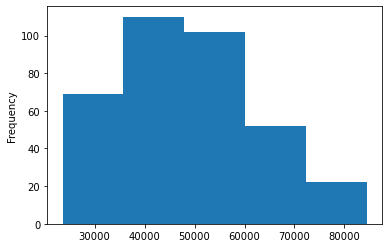

In [3]:
#Check if distribution of dependent variable conforms to normal distribution
df['price'].plot.hist(bins = 5)

<AxesSubplot:ylabel='Frequency'>

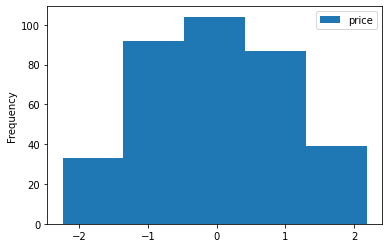

In [4]:
#Box-cox transformation for altering the distribution of dependent variable (price)
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

transformed_price = transformer.fit_transform(df['price'].values.reshape(-1, 1))

pd.DataFrame(transformed_price, columns=['price']).plot.hist(bins = 5)


In [5]:
df.head()

date                            category  quota  price  total_bids  \
0  2014-02-19  Cat A (Cars up to 1600cc and 97kW)    362  77201         700   
1  2014-03-05  Cat A (Cars up to 1600cc and 97kW)    365  76999         615   
2  2014-03-19  Cat A (Cars up to 1600cc and 97kW)    362  78602         577   
3  2014-04-09  Cat A (Cars up to 1600cc and 97kW)    367  77400         537   
4  2014-04-23  Cat A (Cars up to 1600cc and 97kW)    361  71335         513   

   success_bids  population  registration  deregistration  cpi_car  ...  \
0           358    341169.0         754.0          1104.0  114.830  ...   
1           356    340645.0         806.0          1330.0  116.761  ...   
2           360    340645.0         806.0          1330.0  116.761  ...   
3           360    340066.0         768.0          1347.0  115.245  ...   
4           357    340066.0         768.0          1347.0  115.245  ...   

   cpi_petrol  cpi_car_pct_change  cpi_transport_pct_change  \
0      94.412                 0.4                       0.6   
1      95.497                 1.7                       0.6   
2      95.497                 1.7                       0.6   
3      95.919                -1.3                       0.0   
4      95.919                -1.3                       0.0   

   cpi_petrol_pct_change  month  bid_quota_ratio  quota_pct_change  \
0                    0.0      2         1.933702          0.000000   
1                    1.1      3         1.684932          0.008287   
2                    1.1      3         1.593923         -0.008219   
3                    0.4      4         1.463215          0.013812   
4                    0.4      4         1.421053         -0.016349   

   price_pct_change  total_bids_pct_change  success_bids_pct_change  
0          0.078769              -0.026426                 0.005618  
1         -0.002617              -0.121429                -0.005587  
2          0.020818              -0.061789                 0.011236  
3         -0.015292              -0.069324                 0.000000  
4         -0.078359              -0.044693                -0.008333  

[5 rows x 21 columns]

In [6]:
#Let's try building a unified, cat A only and cat B only model!
cat_a = df.loc[df['category'] == 'Cat A (Cars up to 1600cc and 97kW)']
cat_b = df.loc[df['category'] == 'Cat B (Cars above 1600cc or 97kW)']

cat_a.head()

date                            category  quota  price  total_bids  \
0  2014-02-19  Cat A (Cars up to 1600cc and 97kW)    362  77201         700   
1  2014-03-05  Cat A (Cars up to 1600cc and 97kW)    365  76999         615   
2  2014-03-19  Cat A (Cars up to 1600cc and 97kW)    362  78602         577   
3  2014-04-09  Cat A (Cars up to 1600cc and 97kW)    367  77400         537   
4  2014-04-23  Cat A (Cars up to 1600cc and 97kW)    361  71335         513   

   success_bids  population  registration  deregistration  cpi_car  ...  \
0           358    341169.0         754.0          1104.0  114.830  ...   
1           356    340645.0         806.0          1330.0  116.761  ...   
2           360    340645.0         806.0          1330.0  116.761  ...   
3           360    340066.0         768.0          1347.0  115.245  ...   
4           357    340066.0         768.0          1347.0  115.245  ...   

   cpi_petrol  cpi_car_pct_change  cpi_transport_pct_change  \
0      94.412                 0.4                       0.6   
1      95.497                 1.7                       0.6   
2      95.497                 1.7                       0.6   
3      95.919                -1.3                       0.0   
4      95.919                -1.3                       0.0   

   cpi_petrol_pct_change  month  bid_quota_ratio  quota_pct_change  \
0                    0.0      2         1.933702          0.000000   
1                    1.1      3         1.684932          0.008287   
2                    1.1      3         1.593923         -0.008219   
3                    0.4      4         1.463215          0.013812   
4                    0.4      4         1.421053         -0.016349   

   price_pct_change  total_bids_pct_change  success_bids_pct_change  
0          0.078769              -0.026426                 0.005618  
1         -0.002617              -0.121429                -0.005587  
2          0.020818              -0.061789                 0.011236  
3         -0.015292              -0.069324                 0.000000  
4         -0.078359              -0.044693                -0.008333  

[5 rows x 21 columns]

In [7]:
#Specifying categorical and numerical features
categorical_unified_features = ['category', 'month']
categorical_features = ['month']

numerical_features = ['quota', 'total_bids', 'success_bids', 'population', 'registration', 'deregistration', \
                      'cpi_car', 'cpi_transport', 'cpi_petrol', 'cpi_car_pct_change', 'cpi_transport_pct_change', \
                      'cpi_petrol_pct_change', 'bid_quota_ratio', 'quota_pct_change', 'price_pct_change', \
                      'total_bids_pct_change', 'success_bids_pct_change']

numerical_features

['quota',
 'total_bids',
 'success_bids',
 'population',
 'registration',
 'deregistration',
 'cpi_car',
 'cpi_transport',
 'cpi_petrol',
 'cpi_car_pct_change',
 'cpi_transport_pct_change',
 'cpi_petrol_pct_change',
 'bid_quota_ratio',
 'quota_pct_change',
 'price_pct_change',
 'total_bids_pct_change',
 'success_bids_pct_change']

In [8]:
y_unified = df['price']
y_cat_a = cat_a['price']
y_cat_b = cat_b['price']

y_unified

0      77201
1      76999
2      78602
3      77400
4      71335
       ...  
350    59501
351    56001
352    61001
353    62600
354    68310
Name: price, Length: 355, dtype: int64

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

transformer = PowerTransformer()
scaler = MinMaxScaler()
encoder = OneHotEncoder()

#For the unified model, we embed one additonal categorical feature (category)
preprocess_unified = ColumnTransformer(
    transformers= [
        ('numerical', scaler, numerical_features),
        ('categorical', encoder, categorical_unified_features)
    ]
)

preprocess = ColumnTransformer(
    transformers= [
        ('numerical', scaler, numerical_features),
        ('categorical', encoder, categorical_features)
    ]
)

preprocess

ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                 ['quota', 'total_bids', 'success_bids',
                                  'population', 'registration',
                                  'deregistration', 'cpi_car', 'cpi_transport',
                                  'cpi_petrol', 'cpi_car_pct_change',
                                  'cpi_transport_pct_change',
                                  'cpi_petrol_pct_change', 'bid_quota_ratio',
                                  'quota_pct_change', 'price_pct_change',
                                  'total_bids_pct_change',
                                  'success_bids_pct_change']),
                                ('categorical', OneHotEncoder(), ['month'])])

In [10]:
#Check the input shapes of each data
print(df.shape)
print(cat_a.shape)
print(cat_b.shape)

y_unified.shape

(355, 21)
(177, 21)
(178, 21)


(355,)

## Feature Selection and Hyperparameter Tuning

Recursive Feature Elimination (RFE) is used for selecting the best features by eliminating features recursively until the best set of features are found. Gridsearch + k-Fold cross validation (5-folds) were also used to find the best parameters that is optimised for each ML algorithm.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Function to Perform GridSearch
def perform_gridsearch(pipeline, params, x, y, model_type):
    search = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    best_model = search.fit(x, y)
    print('{}: {}'.format(model_type, search.best_params_))
    
    cols = list(search.best_estimator_.named_steps['preprocess'].get_feature_names_out())
    try:
        selected = search.best_estimator_.named_steps['rfe'].support_
        ranking = search.best_estimator_.named_steps['rfe'].ranking_
        items = [list(i) for i in zip(selected, ranking)]
        print()
        print('Feature Selection and Importance')
        print(pd.DataFrame(data=items, index=cols, columns=['Selected', 'Rank']).sort_values(by='Rank', ascending=True))
    except Exception as e:
        scores = selected = search.best_estimator_.named_steps['kbest'].scores_
        print(pd.DataFrame(data=scores, index=cols, columns=['Scores']).sort_values(by='Scores', ascending=False))

    print()

## Model Evaluation and Cross Validation

We use Root Mean Squared Error (RMSE) to evaluate our regression model, we also apply k-Fold cross validation with shuffling to ensure that the model is trained on various subsets of the data, preventing overfitting. The data is splitted into 5-folds and the final MAE and RMSE metric is averaged out across all folds. 

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Function to perform K-Fold Cross Validation
def perform_kfold(pipeline, n_splits, x, y, model_type):
    kfold = KFold(n_splits=n_splits, random_state=0, shuffle=True)
    print()
    print(model_type)
    round = 1
    sum_mae = 0
    sum_rmse = 0
    for train, test in kfold.split(x):
        X_train, X_test = x.iloc[train], x.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        mae = mean_absolute_error(y_pred, y_test)
        rmse = np.sqrt(mean_squared_error(y_pred, y_test))
        sum_mae += mae
        sum_rmse += rmse
        print("Kfold Round {}: MAE {} RMSE {}".format(round, mae, rmse))
        round += 1

    print('Kfold Avg MAE: {} | RMSE: {}'.format(sum_mae/kfold.n_splits, sum_rmse/kfold.n_splits))

# Linear Models

Let's try to model the data using a simple linear regression model and their variants (LASSO, RIDGE and ElasticNet)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

reg = LinearRegression()

reg_transformer = TransformedTargetRegressor(
    regressor = reg,
    transformer = transformer
    
)

pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=reg)),
        ('reg', reg_transformer)
    ]
)

pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=reg)),
        ('reg', reg_transformer)
    ]
)

perform_kfold(pipeline=pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=pipe, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=pipe, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')



UNIFIED
Kfold Round 1: MAE 2899.954033925308 RMSE 3571.713989368243
Kfold Round 2: MAE 2794.671110575414 RMSE 3533.248384281823
Kfold Round 3: MAE 2641.3548736864677 RMSE 3410.020910887595
Kfold Round 4: MAE 2925.005425378115 RMSE 3612.6763792941
Kfold Round 5: MAE 3069.1306309124034 RMSE 5175.388848342281
Kfold Avg MAE: 2866.0232148955415 | RMSE: 3860.6097024348082

CAT A
Kfold Round 1: MAE 1823.8189964365365 RMSE 2339.1502283609166
Kfold Round 2: MAE 2232.2357828687996 RMSE 2746.2614633493963
Kfold Round 3: MAE 2343.3926771794154 RMSE 2805.3647675946404
Kfold Round 4: MAE 1782.1140475827924 RMSE 2308.2121638073418
Kfold Round 5: MAE 2360.500040866898 RMSE 2966.444830320272
Kfold Avg MAE: 2108.4123089868885 | RMSE: 2633.086690686513

CAT B
Kfold Round 1: MAE 1988.8597491142395 RMSE 2488.8796871333466
Kfold Round 2: MAE 2181.780565364703 RMSE 2666.6155166784947
Kfold Round 3: MAE 2645.8756485648187 RMSE 3182.859832798703
Kfold Round 4: MAE 3336.4621385330884 RMSE 7096.860385578614
Kfo

In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso

reg_transformer = TransformedTargetRegressor(
    regressor = Lasso(),
    transformer = transformer
    
)

lasso_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=Lasso())),
        ('reg', reg_transformer)
    ]
)


lasso_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=Lasso())),
        ('reg', reg_transformer)
    ]
)

params = {
    'rfe__estimator__alpha' : [0, 0.05, 0.1, 0.5, 1.0]
}

lasso_unified = perform_gridsearch(pipeline=lasso_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
lasso_cat_a = perform_gridsearch(pipeline=lasso_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
lasso_cat_b = perform_gridsearch(pipeline=lasso_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

UNIFIED: {'rfe__estimator__alpha': 0}

Feature Selection and Importance
                                                    Selected  Rank
numerical__quota                                        True     1
categorical__category_Cat A (Cars up to 1600cc ...      True     1
numerical__success_bids_pct_change                      True     1
numerical__price_pct_change                             True     1
numerical__quota_pct_change                             True     1
numerical__bid_quota_ratio                              True     1
numerical__cpi_transport_pct_change                     True     1
numerical__cpi_car_pct_change                           True     1
numerical__total_bids_pct_change                        True     1
numerical__cpi_transport                                True     1
numerical__cpi_car                                      True     1
numerical__deregistration                               True     1
numerical__success_bids                                 T

In [15]:
reg_transformer = TransformedTargetRegressor(
    regressor = Lasso(alpha=0),
    transformer = transformer
    
)

lasso_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=Lasso(alpha=0))),
        ('reg', reg_transformer)
    ]
)

lasso_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(Lasso(alpha=0))),
        ('reg', reg_transformer)
    ]
)

perform_kfold(pipeline=lasso_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=lasso_pipe, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=lasso_pipe, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: MAE 2883.415139639485 RMSE 3556.8338112746146
Kfold Round 2: MAE 2746.0043336139543 RMSE 3489.253846811712
Kfold Round 3: MAE 2644.657763172787 RMSE 3387.6529815291224
Kfold Round 4: MAE 2927.580887864971 RMSE 3613.7692979546164
Kfold Round 5: MAE 3047.8451859533748 RMSE 5180.090023002243
Kfold Avg MAE: 2849.9006620489145 | RMSE: 3845.519992114461

CAT A
Kfold Round 1: MAE 1806.7411062887213 RMSE 2329.192306849944
Kfold Round 2: MAE 2242.580966320109 RMSE 2732.6160770631955
Kfold Round 3: MAE 2364.0236916401673 RMSE 2830.9979899944897
Kfold Round 4: MAE 1814.7951947883594 RMSE 2365.6940623326773
Kfold Round 5: MAE 2667.4057602283356 RMSE 3280.9103403158692
Kfold Avg MAE: 2179.1093438531384 | RMSE: 2707.8821553112352

CAT B
Kfold Round 1: MAE 1932.8786081629853 RMSE 2488.422550519184
Kfold Round 2: MAE 2168.417275691935 RMSE 2654.870990223937
Kfold Round 3: MAE 2577.5553833841313 RMSE 3140.853446546983
Kfold Round 4: MAE 3300.4887679890985 RMSE 7076.028670494873


In [16]:
from sklearn.linear_model import Ridge

reg_transformer = TransformedTargetRegressor(
    regressor = Ridge(),
    transformer = transformer
    
)

ridge_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=Ridge())),
        ('reg', reg_transformer)
    ]
)

ridge_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=Ridge())),
        ('reg', reg_transformer)
    ]
)

params = {
    'rfe__estimator__alpha' : [0, 0.05, 0.1, 0.5, 1.0]
}

perform_gridsearch(pipeline=ridge_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=ridge_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=ridge_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

UNIFIED: {'rfe__estimator__alpha': 0}

Feature Selection and Importance
                                                    Selected  Rank
categorical__month_12                                   True     1
categorical__month_2                                    True     1
categorical__month_1                                    True     1
categorical__month_5                                    True     1
categorical__month_11                                   True     1
categorical__month_3                                    True     1
categorical__month_7                                    True     1
categorical__month_8                                    True     1
categorical__month_6                                    True     1
numerical__cpi_transport                                True     1
numerical__cpi_car                                      True     1
categorical__month_9                                    True     1
categorical__month_10                                   T

In [17]:
reg_transformer_unified = TransformedTargetRegressor(
    regressor = Ridge(alpha=1),
    transformer = transformer
    
)

reg_transformer_cat_a = TransformedTargetRegressor(
    regressor = Ridge(alpha=0),
    transformer = transformer
    
)

reg_transformer = TransformedTargetRegressor(
    regressor = Ridge(alpha=0),
    transformer = transformer
    
)

ridge_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(Ridge(alpha=1))),
        ('reg', reg_transformer_unified)
    ]
)

ridge_pipe_cat_a = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(Ridge(alpha=0))),
        ('reg', reg_transformer)
    ]
)

ridge_pipe_cat_b = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(Ridge(alpha=0))),
        ('reg', reg_transformer)
    ]
)

perform_kfold(pipeline=ridge_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=ridge_pipe_cat_a, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=ridge_pipe_cat_b, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: MAE 3701.7482373297385 RMSE 4414.573594769766
Kfold Round 2: MAE 3502.72004368444 RMSE 4547.248263456884
Kfold Round 3: MAE 3372.4660573723813 RMSE 4249.491617573808
Kfold Round 4: MAE 3712.0529625663653 RMSE 4757.644403792159
Kfold Round 5: MAE 3186.3594836484153 RMSE 4087.1899930660315
Kfold Avg MAE: 3495.069356920268 | RMSE: 4411.22957453173

CAT A
Kfold Round 1: MAE 1823.8189964364444 RMSE 2339.15022836086
Kfold Round 2: MAE 2232.2357828687764 RMSE 2746.261463349389
Kfold Round 3: MAE 2343.392677179409 RMSE 2805.364767594641
Kfold Round 4: MAE 1782.1140475828133 RMSE 2308.212163807364
Kfold Round 5: MAE 2360.5000408669257 RMSE 2966.444830320316
Kfold Avg MAE: 2108.4123089868735 | RMSE: 2633.0866906865144

CAT B
Kfold Round 1: MAE 1988.8597491142395 RMSE 2488.8796871333466
Kfold Round 2: MAE 2181.780565364671 RMSE 2666.615516678479
Kfold Round 3: MAE 2645.875648564533 RMSE 3182.859832798287
Kfold Round 4: MAE 3336.462138533056 RMSE 7096.860385578466
Kfold Rou

In [18]:
from sklearn.linear_model import ElasticNet

reg_transformer = TransformedTargetRegressor(
    regressor = ElasticNet(),
    transformer = transformer   
)

elastic_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=ElasticNet())),
        ('reg', reg_transformer)
    ]
        
)

elastic_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=ElasticNet())),
        ('reg', reg_transformer)
    ]
        
)

params = {
    'rfe__estimator__alpha' : [0, 0.05, 0.1, 0.5, 1.0],
    'rfe__estimator__l1_ratio' : [0, 0.05, 0.1, 0.5, 1.0]
}

perform_gridsearch(pipeline=elastic_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=elastic_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=elastic_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

UNIFIED: {'rfe__estimator__alpha': 0, 'rfe__estimator__l1_ratio': 0}

Feature Selection and Importance
                                                    Selected  Rank
numerical__quota                                        True     1
categorical__category_Cat A (Cars up to 1600cc ...      True     1
numerical__success_bids_pct_change                      True     1
numerical__price_pct_change                             True     1
numerical__quota_pct_change                             True     1
numerical__bid_quota_ratio                              True     1
numerical__cpi_transport_pct_change                     True     1
numerical__cpi_car_pct_change                           True     1
numerical__total_bids_pct_change                        True     1
numerical__cpi_transport                                True     1
numerical__cpi_car                                      True     1
numerical__deregistration                               True     1
numerical__success_bids   

In [19]:
reg_transformer = TransformedTargetRegressor(
    regressor = ElasticNet(alpha=0, l1_ratio=0),
    transformer = transformer   
)

elastic_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=ElasticNet(alpha=0, l1_ratio=0))),
        ('reg', reg_transformer)
    ]
        
)

elastic_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=ElasticNet(alpha=0, l1_ratio=0))),
        ('reg', reg_transformer)
    ]
        
)

perform_kfold(pipeline=elastic_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=elastic_pipe, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=elastic_pipe, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: MAE 2883.415139639485 RMSE 3556.8338112746146
Kfold Round 2: MAE 2746.0043336139543 RMSE 3489.253846811712
Kfold Round 3: MAE 2644.657763172787 RMSE 3387.6529815291224
Kfold Round 4: MAE 2927.580887864971 RMSE 3613.7692979546164
Kfold Round 5: MAE 3047.8451859533748 RMSE 5180.090023002243
Kfold Avg MAE: 2849.9006620489145 | RMSE: 3845.519992114461

CAT A
Kfold Round 1: MAE 1806.7411062887213 RMSE 2329.192306849944
Kfold Round 2: MAE 2242.580966320109 RMSE 2732.6160770631955
Kfold Round 3: MAE 2364.0236916401673 RMSE 2830.9979899944897
Kfold Round 4: MAE 1814.7951947883594 RMSE 2365.6940623326773
Kfold Round 5: MAE 2667.4057602283356 RMSE 3280.9103403158692
Kfold Avg MAE: 2179.1093438531384 | RMSE: 2707.8821553112352

CAT B
Kfold Round 1: MAE 1932.8786081629853 RMSE 2488.422550519184
Kfold Round 2: MAE 2168.417275691935 RMSE 2654.870990223937
Kfold Round 3: MAE 2577.5553833841313 RMSE 3140.853446546983
Kfold Round 4: MAE 3300.4887679890985 RMSE 7076.028670494873


# Tree-based Models

Decision tree-based models are great for explanability, let's try using them to model our regression problem

In [20]:
from sklearn.tree import DecisionTreeRegressor

reg_transformer = TransformedTargetRegressor(
    regressor = DecisionTreeRegressor(criterion='absolute_error', random_state=0),
    transformer = transformer   
)

dt_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=DecisionTreeRegressor(criterion='absolute_error', random_state=0))),
        ('reg', reg_transformer)
    ] 
)

dt_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=DecisionTreeRegressor(criterion='absolute_error', random_state=0))),
        ('reg', reg_transformer)
    ] 
)

params = {
    'rfe__estimator__max_depth' : [3, 6, 8, 10, 20],
    'rfe__estimator__min_samples_leaf' : [5, 10, 20, 50, 100]
}

perform_gridsearch(pipeline=dt_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=dt_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=dt_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED: {'rfe__estimator__max_depth': 3, 'rfe__estimator__min_samples_leaf': 5}

Feature Selection and Importance
                                                    Selected  Rank
numerical__quota                                        True     1
categorical__month_10                                   True     1
categorical__month_9                                    True     1
categorical__month_8                                    True     1
categorical__month_7                                    True     1
categorical__month_6                                    True     1
categorical__month_5                                    True     1
categorical__month_11                                   True     1
categorical__month_12                                   True     1
numerical__success_bids                                 True     1
numerical__population                                   True     1
numerical__registration                                 True     1
numerical__cpi

In [21]:
reg_transformer = TransformedTargetRegressor(
    regressor = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', random_state=0),
    transformer = transformer   
)

reg_transformer_cat_a = TransformedTargetRegressor(
    regressor = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', random_state=0),
    transformer = transformer   
)

reg_transformer_cat_b = TransformedTargetRegressor(
    regressor = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', random_state=0),
    transformer = transformer   
)

dt_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', \
                                                    random_state=0))),
        ('reg', reg_transformer)
    ]
        
)

dt_pipe_cat_a = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', \
                                                    random_state=0))),
        ('reg', reg_transformer_cat_a)
    ]
        
)

dt_pipe_cat_b = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', \
                                                    random_state=0))),
        ('reg', reg_transformer_cat_b)
    ]
        
)

perform_kfold(pipeline=dt_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=dt_pipe_cat_a, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=dt_pipe_cat_b, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: MAE 4819.782022651563 RMSE 6313.756111831229
Kfold Round 2: MAE 4312.209418483844 RMSE 5599.675543747081
Kfold Round 3: MAE 4712.77122663862 RMSE 6363.803545821555
Kfold Round 4: MAE 5106.633716740084 RMSE 6968.518134945688
Kfold Round 5: MAE 3884.584570578343 RMSE 5094.364236360902
Kfold Avg MAE: 4567.196191018491 | RMSE: 6068.023514541291

CAT A
Kfold Round 1: MAE 3545.350703273881 RMSE 4676.532120778403
Kfold Round 2: MAE 3932.2977026232224 RMSE 5182.009503008248
Kfold Round 3: MAE 3293.7363755430074 RMSE 4317.062783312658
Kfold Round 4: MAE 3353.8719407287867 RMSE 5262.560035545114
Kfold Round 5: MAE 2894.5606158362793 RMSE 3917.148874800314
Kfold Avg MAE: 3403.9634676010355 | RMSE: 4671.062663488948

CAT B
Kfold Round 1: MAE 3276.7190558264633 RMSE 4143.3423249539765
Kfold Round 2: MAE 4189.364566050313 RMSE 6009.652268258858
Kfold Round 3: MAE 3044.0787615121726 RMSE 4036.896876280673
Kfold Round 4: MAE 3552.0010081783103 RMSE 4766.079657205649
Kfold Round

In [22]:
from sklearn.ensemble import RandomForestRegressor

reg_transformer = TransformedTargetRegressor(
    regressor = RandomForestRegressor(n_estimators=10),
    transformer = transformer   
)

#Due to heavy computation, we are using n_estimators=10
rf_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=RandomForestRegressor(n_estimators=10, criterion='absolute_error', \
                                                    random_state=0))),
        ('reg', reg_transformer)
    ]
        
)

rf_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=RandomForestRegressor(n_estimators=10, criterion='absolute_error', \
                                                    random_state=0))),
        ('reg', reg_transformer)
    ]
        
)


params = {
    'rfe__estimator__max_depth' : [3, 6, 8, 10, 20],
    'rfe__estimator__min_samples_leaf' : [5, 10, 20, 50, 100]
}

perform_gridsearch(pipeline=rf_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=rf_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=rf_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

UNIFIED: {'rfe__estimator__max_depth': 3, 'rfe__estimator__min_samples_leaf': 5}

Feature Selection and Importance
                                                    Selected  Rank
numerical__quota                                        True     1
categorical__month_1                                    True     1
categorical__month_2                                    True     1
categorical__month_3                                    True     1
categorical__month_4                                    True     1
categorical__month_5                                    True     1
categorical__category_Cat B (Cars above 1600cc ...      True     1
numerical__cpi_petrol                                   True     1
numerical__cpi_car                                      True     1
numerical__deregistration                               True     1
numerical__registration                                 True     1
numerical__population                                   True     1
numerical__suc

In [23]:
reg_transformer_unified = TransformedTargetRegressor(
    regressor = RandomForestRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', random_state=0),
    transformer = transformer   
)

reg_transformer_cat_a = TransformedTargetRegressor(
    regressor = RandomForestRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', random_state=0),
    transformer = transformer   
)

reg_transformer_cat_b = TransformedTargetRegressor(
    regressor = RandomForestRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', random_state=0),
    transformer = transformer   
)

rf_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=RandomForestRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', \
                                                    random_state=0))),
        ('reg', reg_transformer)
    ]
        
)

rf_pipe_cat_a = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=RandomForestRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', \
                                                    random_state=0))),
        ('reg', reg_transformer)
    ]
        
)

rf_pipe_cat_b = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=RandomForestRegressor(max_depth=3, min_samples_leaf=5, criterion='absolute_error', \
                                                    random_state=0))),
        ('reg', reg_transformer)
    ]
        
)

perform_kfold(pipeline=rf_pipe, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=rf_pipe, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=rf_pipe, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: MAE 2840.8409391431537 RMSE 4033.407354095922
Kfold Round 2: MAE 2538.313566654616 RMSE 3335.446606828774
Kfold Round 3: MAE 2603.4410142195534 RMSE 3543.513188219242
Kfold Round 4: MAE 2652.525863645983 RMSE 3427.358871391776
Kfold Round 5: MAE 2026.2788016593436 RMSE 2719.3174053187404
Kfold Avg MAE: 2532.28003706453 | RMSE: 3411.8086851708913

CAT A
Kfold Round 1: MAE 2123.123871316431 RMSE 3071.8511322442077
Kfold Round 2: MAE 2068.5223372534583 RMSE 2650.1156733909284
Kfold Round 3: MAE 2004.098439723328 RMSE 2562.7833261062683
Kfold Round 4: MAE 2100.2140209918593 RMSE 2569.3203184112112
Kfold Round 5: MAE 2272.062925887013 RMSE 2896.6775411107383
Kfold Avg MAE: 2113.604319034418 | RMSE: 2750.149598252671

CAT B
Kfold Round 1: MAE 2363.6785128922984 RMSE 3206.608608268604
Kfold Round 2: MAE 2744.3238806301915 RMSE 3970.859101284873
Kfold Round 3: MAE 2056.7452327987494 RMSE 2754.8978074527986
Kfold Round 4: MAE 2429.685181713393 RMSE 3502.148681427282
Kfol

# Deep Learning

At last, we will apply deep learning (MLP) on the given dataset. The code blocks below may take very long to execute, run at your discretion!

In [44]:
import tensorflow as tf
tf.random.set_seed(0)
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

#Build function for scikit_learn Keras wrapper
def create_model(n_cols):
    num_layers = 10
    num_neurons = 10
    
    model = Sequential()

    #Input layer
    model.add(Dense(num_neurons, activation='relu', input_shape=(n_cols,)))
    
    #Add hidden layers
    for _ in range(0, num_layers):
        model.add(Dense(num_neurons, activation = 'relu'))
    
    #Add output layer
    model.add(Dense(1))
    
    #Compile model with Adam optimizer, L1/MAE for loss function
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics = ['mae', 'mse'])

    return model

In [45]:
#Function to perform K-Fold Cross Validation for MLP
def perform_kfold_mlp(model, epoch, batch_size, n_splits, x, y, model_type):
    kfold = KFold(n_splits=n_splits, random_state=0, shuffle=True)
    print()
    print(model_type)
    round = 1
    sum_mae = 0
    sum_rmse = 0
    for train, test in kfold.split(x):
        X_train, X_test = x[train], x[test]
        y_train, y_test = y[train], y[test]
        model.fit(X_train, y_train, epochs=epoch, batch_size =batch_size, verbose = 0, validation_data=(X_test, y_test))

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(transformer.inverse_transform(y_pred), transformer.inverse_transform(y_test))
        rmse = np.sqrt(mean_squared_error(transformer.inverse_transform(y_pred), transformer.inverse_transform(y_test)))
        sum_mae += mae
        sum_rmse += rmse
        print("Kfold Round {}: MAE {} | RMSE {}".format(round, mae, rmse))
        round += 1
        
        pd.DataFrame(
            data={'actual' : transformer.inverse_transform(y_test).flatten().tolist(),
                  'predicted' : transformer.inverse_transform(y_pred).flatten().tolist()},
            index=[x for x in range(0, y_pred.shape[0]) ]
        ).plot.line()
        
    

    print('Kfold Avg MAE: {} | RMSE: {}'.format(sum_mae/kfold.n_splits, sum_rmse/kfold.n_splits))

In [46]:
#UNIFIED Model
model = KerasRegressor(build_fn=create_model, verbose=1)

params = {
    'n_cols' : [preprocess_unified.fit_transform(df).shape[1]],
    'epochs' : [60, 80, 100],
    'batch_size' : [2, 4, 8]
}

#Due to heavy computation, we will not do grid search on network architecture (e.g. layers and neurons) =D
search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
search.fit(preprocess_unified.fit_transform(df), transformer.fit_transform(y_unified.to_numpy().reshape(-1, 1)))

2021-11-09 21:09:08.523902: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-09 21:09:08.524585: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-09 21:09:08.523903: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate

Epoch 1/80

236/236 [==============================] - 8s 34ms/step - loss: 0.8528 - mae: 0.8528 - mse: 1.0239
Epoch 2/80

236/236 [==============================] - 1s 3ms/step - loss: 0.8497 - mae: 0.8497 - mse: 1.0159
Epoch 3/80

116/236 [=============>................] - ETA: 0s - loss: 0.8680 - mae: 0.8680 - mse: 1.0622Epoch 1/100

144/236 [=================>............] - ETA: 0s - loss: 0.8781 - mae: 0.8781 - mse: 1.0591Epoch 1/80

180/236 [=====================>........] - ETA: 0s - loss: 0.8522 - mae: 0.8522 - mse: 1.0069Epoch 1/80

236/236 [==============================] - 1s 5ms/step - loss: 0.8385 - mae: 0.8385 - mse: 0.9885

160/236 [===================>..........] - ETA: 4s - loss: 0.8640 - mae: 0.8640 - mse: 1.0318Epoch 4/80

236/236 [==============================] - 10s 44ms/step - loss: 0.8441 - mae: 0.8441 - mse: 0.9983

 80/236 [=========>....................] - ETA: 0s - loss: 0.8781 - mae: 0.8781 - mse: 1.0588Epoch 2/100

237/237 [==============================]

237/237 [==============================] - 11s 47ms/step - loss: 0.9176 - mae: 0.9176 - mse: 1.1977
Epoch 2/80

236/236 [==============================] - 1s 5ms/step - loss: 0.7531 - mae: 0.7531 - mse: 0.8254

 80/237 [=========>....................] - ETA: 0s - loss: 0.8469 - mae: 0.8469 - mse: 1.0407Epoch 5/80

236/236 [==============================] - 1s 5ms/step - loss: 0.7552 - mae: 0.7552 - mse: 0.8238
Epoch 3/100

237/237 [==============================] - 1s 5ms/step - loss: 0.7250 - mae: 0.7250 - mse: 0.7708

 64/236 [=======>......................] - ETA: 0s - loss: 0.6586 - mae: 0.6586 - mse: 0.6380Epoch 3/80

237/237 [==============================] - 1s 4ms/step - loss: 0.9008 - mae: 0.9008 - mse: 1.1523
Epoch 3/80

236/236 [==============================] - 1s 5ms/step - loss: 0.6937 - mae: 0.6937 - mse: 0.7142
Epoch 6/80

 44/236 [====>.........................] - ETA: 0s - loss: 0.5942 - mae: 0.5942 - mse: 0.4987


236/236 [==============================] - 1s 6ms/step - loss: 0.6345 - mae: 0.6345 - mse: 0.6203

 88/236 [==========>...................] - ETA: 0s - loss: 0.5028 - mae: 0.5028 - mse: 0.3655Epoch 4/100

237/237 [==============================] - 1s 6ms/step - loss: 0.7234 - mae: 0.7234 - mse: 0.7682
Epoch 4/80

237/237 [==============================] - 1s 5ms/step - loss: 0.8124 - mae: 0.8124 - mse: 0.9674

 48/236 [=====>........................] - ETA: 1s - loss: 0.4993 - mae: 0.4993 - mse: 0.4097Epoch 4/80

236/236 [==============================] - 1s 4ms/step - loss: 0.6179 - mae: 0.6179 - mse: 0.6092
Epoch 7/80

236/236 [==============================] - 1s 4ms/step - loss: 0.5300 - mae: 0.5300 - mse: 0.4478

172/237 [====================>.........] - ETA: 0s - loss: 0.7598 - mae: 0.7598 - mse: 0.8724Epoch 5/100

237/237 [==============================] - 1s 5ms/step - loss: 0.7171 - mae: 0.7171 - mse: 0.7561
Epoch 5/80

237/237 [==============================] - 1s 6ms/step -

236/236 [==============================] - 1s 5ms/step - loss: 0.5492 - mae: 0.5492 - mse: 0.5384

 52/237 [=====>........................] - ETA: 0s - loss: 0.6895 - mae: 0.6895 - mse: 0.7457Epoch 8/80

236/236 [==============================] - 1s 5ms/step - loss: 0.4435 - mae: 0.4435 - mse: 0.3264
Epoch 6/100

237/237 [==============================] - 1s 5ms/step - loss: 0.6842 - mae: 0.6842 - mse: 0.7188
Epoch 6/80

237/237 [==============================] - 1s 5ms/step - loss: 0.7415 - mae: 0.7415 - mse: 0.8507

 52/237 [=====>........................] - ETA: 0s - loss: 0.5873 - mae: 0.5873 - mse: 0.5141Epoch 6/80

236/236 [==============================] - 1s 4ms/step - loss: 0.5154 - mae: 0.5154 - mse: 0.4959

140/236 [================>.............] - ETA: 0s - loss: 0.3890 - mae: 0.3890 - mse: 0.2464Epoch 9/80

236/236 [==============================] - 1s 4ms/step - loss: 0.3915 - mae: 0.3915 - mse: 0.2565

100/237 [===========>..................] - ETA: 0s - loss: 0.7434 - 

237/237 [==============================] - 1s 5ms/step - loss: 0.6039 - mae: 0.6039 - mse: 0.5801
Epoch 7/80

237/237 [==============================] - 1s 5ms/step - loss: 0.7287 - mae: 0.7287 - mse: 0.8281

 52/237 [=====>........................] - ETA: 0s - loss: 0.5752 - mae: 0.5752 - mse: 0.5451Epoch 7/80

236/236 [==============================] - 1s 6ms/step - loss: 0.4868 - mae: 0.4868 - mse: 0.4658
Epoch 10/80

236/236 [==============================] - 1s 5ms/step - loss: 0.3618 - mae: 0.3618 - mse: 0.2197

 32/236 [===>..........................] - ETA: 0s - loss: 0.5069 - mae: 0.5069 - mse: 0.4994Epoch 8/100

237/237 [==============================] - 1s 4ms/step - loss: 0.5623 - mae: 0.5623 - mse: 0.4997
Epoch 8/80

237/237 [==============================] - 1s 5ms/step - loss: 0.7274 - mae: 0.7274 - mse: 0.8217
Epoch 8/80



236/236 [==============================] - 1s 5ms/step - loss: 0.3339 - mae: 0.3339 - mse: 0.1738
Epoch 9/100

236/236 [==============================] - 1s 5ms/step - loss: 0.4673 - mae: 0.4673 - mse: 0.4400

124/237 [==============>...............] - ETA: 0s - loss: 0.5397 - mae: 0.5397 - mse: 0.4670Epoch 11/80

237/237 [==============================] - 1s 5ms/step - loss: 0.5291 - mae: 0.5291 - mse: 0.4473
Epoch 9/80

237/237 [==============================] - 1s 5ms/step - loss: 0.7185 - mae: 0.7186 - mse: 0.8152

200/236 [========================>.....] - ETA: 0s - loss: 0.4398 - mae: 0.4398 - mse: 0.4104Epoch 9/80

236/236 [==============================] - 1s 5ms/step - loss: 0.4334 - mae: 0.4334 - mse: 0.3944

 40/237 [====>.........................] - ETA: 0s - loss: 0.5677 - mae: 0.5677 - mse: 0.5794Epoch 12/80

236/236 [==============================] - 1s 6ms/step - loss: 0.3161 - mae: 0.3161 - mse: 0.1489

  8/236 [>.............................] - ETA: 2s - loss: 0.2222 

237/237 [==============================] - 1s 4ms/step - loss: 0.7009 - mae: 0.7009 - mse: 0.7826
Epoch 10/80

236/236 [==============================] - 1s 4ms/step - loss: 0.3532 - mae: 0.3532 - mse: 0.2580

104/237 [============>.................] - ETA: 0s - loss: 0.5103 - mae: 0.5103 - mse: 0.4515Epoch 13/80

236/236 [==============================] - 1s 5ms/step - loss: 0.2802 - mae: 0.2802 - mse: 0.1255

164/237 [===================>..........] - ETA: 0s - loss: 0.5091 - mae: 0.5091 - mse: 0.4296Epoch 11/100

237/237 [==============================] - 1s 5ms/step - loss: 0.4902 - mae: 0.4902 - mse: 0.4006

 88/236 [==========>...................] - ETA: 0s - loss: 0.2697 - mae: 0.2697 - mse: 0.1218Epoch 11/80

237/237 [==============================] - 1s 5ms/step - loss: 0.6874 - mae: 0.6874 - mse: 0.7612

160/236 [===================>..........] - ETA: 0s - loss: 0.2650 - mae: 0.2650 - mse: 0.1143Epoch 11/80

236/236 [==============================] - 1s 5ms/step - loss: 0.333

236/236 [==============================] - 1s 5ms/step - loss: 0.2708 - mae: 0.2708 - mse: 0.1142
Epoch 12/100

237/237 [==============================] - 1s 5ms/step - loss: 0.4699 - mae: 0.4699 - mse: 0.3680
Epoch 12/80

237/237 [==============================] - 1s 5ms/step - loss: 0.6893 - mae: 0.6893 - mse: 0.7773
Epoch 12/80

236/236 [==============================] - 1s 5ms/step - loss: 0.2368 - mae: 0.2368 - mse: 0.0960
Epoch 13/100

236/236 [==============================] - 1s 6ms/step - loss: 0.2841 - mae: 0.2841 - mse: 0.1454
Epoch 15/80

144/237 [=================>............] - ETA: 0s - loss: 0.6801 - mae: 0.6801 - mse: 0.7428


237/237 [==============================] - 1s 6ms/step - loss: 0.4581 - mae: 0.4581 - mse: 0.3418
Epoch 13/80

237/237 [==============================] - 1s 4ms/step - loss: 0.6845 - mae: 0.6845 - mse: 0.7498
Epoch 13/80

236/236 [==============================] - 1s 4ms/step - loss: 0.2632 - mae: 0.2632 - mse: 0.1147

236/236 [==============================] - 1s 5ms/step - loss: 0.2639 - mae: 0.2639 - mse: 0.1150

 44/237 [====>.........................] - ETA: 1s - loss: 0.5046 - mae: 0.5046 - mse: 0.3807Epoch 14/100

  4/236 [..............................] - ETA: 0s - loss: 0.1322 - mae: 0.1322 - mse: 0.0245Epoch 16/80

237/237 [==============================] - 1s 5ms/step - loss: 0.6634 - mae: 0.6634 - mse: 0.7219
Epoch 14/80

236/236 [==============================] - 1s 4ms/step - loss: 0.2376 - mae: 0.2376 - mse: 0.0935

237/237 [==============================] - 1s 6ms/step - loss: 0.4069 - mae: 0.4069 - mse: 0.2920
Epoch 14/80

  4/237 [..............................] - ETA

236/236 [==============================] - 1s 4ms/step - loss: 0.1981 - mae: 0.1981 - mse: 0.0650
Epoch 21/100

237/237 [==============================] - 1s 5ms/step - loss: 0.6337 - mae: 0.6337 - mse: 0.6805

237/237 [==============================] - 1s 5ms/step - loss: 0.2656 - mae: 0.2656 - mse: 0.1298
Epoch 20/80

168/236 [====================>.........] - ETA: 0s - loss: 0.1573 - mae: 0.1573 - mse: 0.0474Epoch 20/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1717 - mae: 0.1717 - mse: 0.0531
Epoch 23/80

237/237 [==============================] - 1s 3ms/step - loss: 0.2758 - mae: 0.2758 - mse: 0.1351
Epoch 21/80

236/236 [==============================] - 1s 4ms/step - loss: 0.2001 - mae: 0.2001 - mse: 0.0651

144/236 [=================>............] - ETA: 0s - loss: 0.1577 - mae: 0.1577 - mse: 0.0509Epoch 22/100

237/237 [==============================] - 1s 4ms/step - loss: 0.6203 - mae: 0.6203 - mse: 0.6719
Epoch 21/80

  4/237 [........................

236/236 [==============================] - 1s 4ms/step - loss: 0.1644 - mae: 0.1644 - mse: 0.0511

 76/236 [========>.....................] - ETA: 0s - loss: 0.1801 - mae: 0.1801 - mse: 0.0490Epoch 24/80

237/237 [==============================] - 1s 5ms/step - loss: 0.2741 - mae: 0.2741 - mse: 0.1255

172/236 [====================>.........] - ETA: 0s - loss: 0.1558 - mae: 0.1558 - mse: 0.0483Epoch 22/80

237/237 [==============================] - 1s 5ms/step - loss: 0.6197 - mae: 0.6197 - mse: 0.6577

 44/237 [====>.........................] - ETA: 0s - loss: 0.2241 - mae: 0.2241 - mse: 0.0966Epoch 22/80

236/236 [==============================] - 1s 6ms/step - loss: 0.1988 - mae: 0.1988 - mse: 0.0635

212/236 [=========================>....] - ETA: 0s - loss: 0.1595 - mae: 0.1595 - mse: 0.0493Epoch 23/100

236/236 [==============================] - 1s 5ms/step - loss: 0.1595 - mae: 0.1595 - mse: 0.0482

 60/236 [======>.......................] - ETA: 0s - loss: 0.2132 - mae: 0.2132 

236/236 [==============================] - 1s 4ms/step - loss: 0.2055 - mae: 0.2055 - mse: 0.0677

196/236 [=======================>......] - ETA: 0s - loss: 0.1622 - mae: 0.1622 - mse: 0.0454Epoch 24/100

237/237 [==============================] - 1s 5ms/step - loss: 0.6197 - mae: 0.6197 - mse: 0.6611

 24/236 [==>...........................] - ETA: 1s - loss: 0.1557 - mae: 0.1557 - mse: 0.0458Epoch 23/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1681 - mae: 0.1681 - mse: 0.0484
Epoch 26/80

237/237 [==============================] - 1s 4ms/step - loss: 0.2416 - mae: 0.2416 - mse: 0.1032
Epoch 24/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1913 - mae: 0.1913 - mse: 0.0626

208/236 [=========================>....] - ETA: 0s - loss: 0.1420 - mae: 0.1420 - mse: 0.0412Epoch 25/100

237/237 [==============================] - 1s 4ms/step - loss: 0.6487 - mae: 0.6487 - mse: 0.6827
Epoch 24/80

236/236 [==============================] - 1s 4ms/

237/237 [==============================] - 1s 5ms/step - loss: 0.2203 - mae: 0.2203 - mse: 0.0873

148/236 [=================>............] - ETA: 0s - loss: 0.1400 - mae: 0.1400 - mse: 0.0359Epoch 25/80

237/237 [==============================] - 1s 4ms/step - loss: 0.6072 - mae: 0.6072 - mse: 0.6343

 80/237 [=========>....................] - ETA: 0s - loss: 0.2212 - mae: 0.2212 - mse: 0.0835Epoch 25/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1610 - mae: 0.1610 - mse: 0.0485
Epoch 28/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1926 - mae: 0.1926 - mse: 0.0584

112/237 [=============>................] - ETA: 0s - loss: 0.2091 - mae: 0.2091 - mse: 0.0777Epoch 26/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2141 - mae: 0.2141 - mse: 0.0831
Epoch 26/80

237/237 [==============================] - 1s 5ms/step - loss: 0.6087 - mae: 0.6087 - mse: 0.6346
Epoch 26/80

236/236 [==============================] - 1s 5ms/s

236/236 [==============================] - 1s 4ms/step - loss: 0.1534 - mae: 0.1534 - mse: 0.0412
Epoch 30/80

237/237 [==============================] - 1s 4ms/step - loss: 0.5955 - mae: 0.5955 - mse: 0.6199
Epoch 27/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1760 - mae: 0.1760 - mse: 0.0499

136/237 [================>.............] - ETA: 0s - loss: 0.2281 - mae: 0.2281 - mse: 0.0910Epoch 28/100

237/237 [==============================] - 1s 5ms/step - loss: 0.2113 - mae: 0.2113 - mse: 0.0782
Epoch 28/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1554 - mae: 0.1554 - mse: 0.0471
Epoch 31/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1742 - mae: 0.1742 - mse: 0.0500

237/237 [==============================] - 1s 6ms/step - loss: 0.6030 - mae: 0.6030 - mse: 0.6187

 80/237 [=========>....................] - ETA: 0s - loss: 0.2129 - mae: 0.2129 - mse: 0.0864Epoch 28/80

108/237 [============>.................] - ETA

237/237 [==============================] - 1s 5ms/step - loss: 0.2212 - mae: 0.2212 - mse: 0.0869

236/236 [==============================] - 1s 5ms/step - loss: 0.1495 - mae: 0.1495 - mse: 0.0408
Epoch 32/80

220/236 [==========================>...] - ETA: 0s - loss: 0.1745 - mae: 0.1745 - mse: 0.0455Epoch 29/80

237/237 [==============================] - 1s 5ms/step - loss: 0.5349 - mae: 0.5349 - mse: 0.5139
Epoch 29/80

236/236 [==============================] - 1s 6ms/step - loss: 0.1798 - mae: 0.1798 - mse: 0.0484

 68/237 [=======>......................] - ETA: 1s - loss: 0.2555 - mae: 0.2555 - mse: 0.1095Epoch 30/100

236/236 [==============================] - 1s 5ms/step - loss: 0.1403 - mae: 0.1403 - mse: 0.0370
Epoch 33/80

237/237 [==============================] - 2s 7ms/step - loss: 0.1985 - mae: 0.1985 - mse: 0.0716

224/237 [===========================>..] - ETA: 0s - loss: 0.5259 - mae: 0.5259 - mse: 0.4994Epoch 30/80

237/237 [==============================] - 1s 5ms/s

236/236 [==============================] - 1s 6ms/step - loss: 0.1750 - mae: 0.1750 - mse: 0.0500

236/236 [==============================] - 2s 7ms/step - loss: 0.1485 - mae: 0.1485 - mse: 0.0385
Epoch 33/100

  4/236 [..............................] - ETA: 0s - loss: 0.0838 - mae: 0.0838 - mse: 0.0080Epoch 35/80

237/237 [==============================] - 1s 6ms/step - loss: 0.1939 - mae: 0.1939 - mse: 0.0672
Epoch 32/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1416 - mae: 0.1416 - mse: 0.0351

236/236 [==============================] - 1s 5ms/step - loss: 0.1722 - mae: 0.1722 - mse: 0.0498

228/237 [===========================>..] - ETA: 0s - loss: 0.2038 - mae: 0.2038 - mse: 0.0760Epoch 36/80

  4/236 [..............................] - ETA: 0s - loss: 0.1864 - mae: 0.1864 - mse: 0.0447Epoch 34/100

237/237 [==============================] - 2s 7ms/step - loss: 0.5139 - mae: 0.5139 - mse: 0.4512
Epoch 33/80

237/237 [==============================] - 1s 5ms/

236/236 [==============================] - 1s 5ms/step - loss: 0.1722 - mae: 0.1722 - mse: 0.0493
Epoch 46/100

236/236 [==============================] - 1s 5ms/step - loss: 0.1201 - mae: 0.1201 - mse: 0.0262
Epoch 48/80

237/237 [==============================] - 1s 5ms/step - loss: 0.3228 - mae: 0.3228 - mse: 0.1854
Epoch 45/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1636 - mae: 0.1636 - mse: 0.0436
Epoch 47/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1532 - mae: 0.1532 - mse: 0.0429
Epoch 45/80

180/236 [=====================>........] - ETA: 0s - loss: 0.1377 - mae: 0.1377 - mse: 0.0328


236/236 [==============================] - 1s 5ms/step - loss: 0.1428 - mae: 0.1428 - mse: 0.0353
Epoch 49/80

237/237 [==============================] - 1s 5ms/step - loss: 0.2859 - mae: 0.2859 - mse: 0.1623

232/236 [============================>.] - ETA: 0s - loss: 0.1560 - mae: 0.1560 - mse: 0.0390Epoch 46/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1561 - mae: 0.1561 - mse: 0.0390

 44/236 [====>.........................] - ETA: 0s - loss: 0.1497 - mae: 0.1497 - mse: 0.0311Epoch 48/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1713 - mae: 0.1713 - mse: 0.0514
Epoch 46/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1356 - mae: 0.1356 - mse: 0.0308

168/237 [====================>.........] - ETA: 0s - loss: 0.1456 - mae: 0.1456 - mse: 0.0378Epoch 50/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1533 - mae: 0.1533 - mse: 0.0405
Epoch 49/100

237/237 [==============================] - 1s 6ms/


 64/236 [=======>......................] - ETA: 0s - loss: 0.1392 - mae: 0.1392 - mse: 0.0348Epoch 47/80

237/237 [==============================] - 1s 5ms/step - loss: 0.1505 - mae: 0.1505 - mse: 0.0428
Epoch 47/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1380 - mae: 0.1380 - mse: 0.0352
Epoch 51/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1538 - mae: 0.1538 - mse: 0.0390

237/237 [==============================] - 1s 5ms/step - loss: 0.2712 - mae: 0.2712 - mse: 0.1416
Epoch 48/80

  4/237 [..............................] - ETA: 0s - loss: 0.2892 - mae: 0.2892 - mse: 0.1223Epoch 50/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1420 - mae: 0.1420 - mse: 0.0365
Epoch 48/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1189 - mae: 0.1189 - mse: 0.0270

224/236 [===========================>..] - ETA: 0s - loss: 0.1533 - mae: 0.1533 - mse: 0.0377Epoch 52/80

237/237 [=============================

Epoch 53/100

236/236 [==============================] - 1s 5ms/step - loss: 0.1207 - mae: 0.1207 - mse: 0.0279
Epoch 54/80

237/237 [==============================] - 1s 6ms/step - loss: 0.2465 - mae: 0.2465 - mse: 0.1202
Epoch 51/80

237/237 [==============================] - 1s 6ms/step - loss: 0.1410 - mae: 0.1410 - mse: 0.0352
Epoch 51/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1516 - mae: 0.1516 - mse: 0.0369
Epoch 54/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1229 - mae: 0.1229 - mse: 0.0269

 32/236 [===>..........................] - ETA: 1s - loss: 0.1468 - mae: 0.1468 - mse: 0.0367Epoch 55/80

237/237 [==============================] - 1s 5ms/step - loss: 0.2362 - mae: 0.2362 - mse: 0.1124

 68/236 [=======>......................] - ETA: 1s - loss: 0.1358 - mae: 0.1358 - mse: 0.0317Epoch 52/80

237/237 [==============================] - 1s 5ms/step - loss: 0.1450 - mae: 0.1450 - mse: 0.0367
Epoch 52/80

236/236 [===========

236/236 [==============================] - 1s 5ms/step - loss: 0.1227 - mae: 0.1227 - mse: 0.0272

140/237 [================>.............] - ETA: 0s - loss: 0.1308 - mae: 0.1308 - mse: 0.0300Epoch 56/80

237/237 [==============================] - 1s 5ms/step - loss: 0.2472 - mae: 0.2472 - mse: 0.1176

152/237 [==================>...........] - ETA: 0s - loss: 0.1330 - mae: 0.1330 - mse: 0.0304Epoch 53/80

237/237 [==============================] - 1s 5ms/step - loss: 0.1404 - mae: 0.1404 - mse: 0.0331

144/236 [=================>............] - ETA: 0s - loss: 0.1876 - mae: 0.1876 - mse: 0.0533Epoch 53/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1728 - mae: 0.1728 - mse: 0.0461

 96/237 [===========>..................] - ETA: 0s - loss: 0.1396 - mae: 0.1396 - mse: 0.0341Epoch 56/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1207 - mae: 0.1207 - mse: 0.0257

168/237 [====================>.........] - ETA: 0s - loss: 0.2562 - mae: 0.2562 

236/236 [==============================] - 1s 4ms/step - loss: 0.1188 - mae: 0.1188 - mse: 0.0273
Epoch 64/80

237/237 [==============================] - 1s 4ms/step - loss: 0.2169 - mae: 0.2169 - mse: 0.0919

148/237 [=================>............] - ETA: 0s - loss: 0.1130 - mae: 0.1130 - mse: 0.0239Epoch 61/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1440 - mae: 0.1440 - mse: 0.0353
Epoch 64/100

236/236 [==============================] - 1s 5ms/step - loss: 0.1492 - mae: 0.1492 - mse: 0.0364

237/237 [==============================] - 1s 5ms/step - loss: 0.1223 - mae: 0.1223 - mse: 0.0275
Epoch 65/80

  4/236 [..............................] - ETA: 0s - loss: 0.0929 - mae: 0.0929 - mse: 0.0154Epoch 61/80

237/237 [==============================] - 1s 5ms/step - loss: 0.2171 - mae: 0.2171 - mse: 0.0926
Epoch 62/80

100/236 [===========>..................] - ETA: 0s - loss: 0.1053 - mae: 0.1053 - mse: 0.0219


236/236 [==============================] - 1s 4ms/step - loss: 0.1429 - mae: 0.1429 - mse: 0.0341

180/237 [=====================>........] - ETA: 0s - loss: 0.1149 - mae: 0.1149 - mse: 0.0251Epoch 65/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1116 - mae: 0.1116 - mse: 0.0231
Epoch 66/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1153 - mae: 0.1153 - mse: 0.0258

 36/236 [===>..........................] - ETA: 1s - loss: 0.1477 - mae: 0.1477 - mse: 0.0318Epoch 62/80

237/237 [==============================] - 1s 5ms/step - loss: 0.2113 - mae: 0.2113 - mse: 0.0850
Epoch 63/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1526 - mae: 0.1526 - mse: 0.0376
Epoch 66/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1449 - mae: 0.1449 - mse: 0.0338

188/237 [======================>.......] - ETA: 0s - loss: 0.1569 - mae: 0.1569 - mse: 0.0407Epoch 67/80

237/237 [==============================] - 1s 4ms/

237/237 [==============================] - 1s 4ms/step - loss: 0.2242 - mae: 0.2243 - mse: 0.0930

140/237 [================>.............] - ETA: 0s - loss: 0.1206 - mae: 0.1206 - mse: 0.0252Epoch 64/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1419 - mae: 0.1419 - mse: 0.0338
Epoch 67/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1143 - mae: 0.1143 - mse: 0.0239
Epoch 68/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1230 - mae: 0.1230 - mse: 0.0271

 28/236 [==>...........................] - ETA: 0s - loss: 0.0860 - mae: 0.0860 - mse: 0.0117Epoch 64/80

237/237 [==============================] - 1s 4ms/step - loss: 0.2141 - mae: 0.2141 - mse: 0.0843

144/236 [=================>............] - ETA: 0s - loss: 0.1427 - mae: 0.1427 - mse: 0.0338Epoch 65/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1196 - mae: 0.1196 - mse: 0.0255
Epoch 69/80

236/236 [==============================] - 1s 5ms/s

236/236 [==============================] - 1s 3ms/step - loss: 0.1197 - mae: 0.1197 - mse: 0.0241
Epoch 70/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1457 - mae: 0.1457 - mse: 0.0362

 36/236 [===>..........................] - ETA: 0s - loss: 0.1118 - mae: 0.1118 - mse: 0.0263Epoch 69/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1324 - mae: 0.1324 - mse: 0.0297
Epoch 66/80

237/237 [==============================] - 1s 4ms/step - loss: 0.2077 - mae: 0.2077 - mse: 0.0784
Epoch 67/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1456 - mae: 0.1456 - mse: 0.0330
Epoch 70/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1117 - mae: 0.1117 - mse: 0.0232
Epoch 71/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1407 - mae: 0.1407 - mse: 0.0358
Epoch 67/80

216/237 [==========================>...] - ETA: 0s - loss: 0.2124 - mae: 0.2124 - mse: 0.0952


237/237 [==============================] - 1s 5ms/step - loss: 0.2095 - mae: 0.2095 - mse: 0.0925
Epoch 68/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1504 - mae: 0.1504 - mse: 0.0355
Epoch 71/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1181 - mae: 0.1181 - mse: 0.0256

172/237 [====================>.........] - ETA: 0s - loss: 0.1231 - mae: 0.1231 - mse: 0.0278Epoch 72/80

237/237 [==============================] - 1s 5ms/step - loss: 0.1223 - mae: 0.1223 - mse: 0.0270

152/236 [==================>...........] - ETA: 0s - loss: 0.1223 - mae: 0.1223 - mse: 0.0291Epoch 68/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1938 - mae: 0.1938 - mse: 0.0670
Epoch 69/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1168 - mae: 0.1168 - mse: 0.0251

212/236 [=========================>....] - ETA: 0s - loss: 0.1699 - mae: 0.1699 - mse: 0.0453Epoch 73/80

236/236 [==============================] - 1s 4ms/s

237/237 [==============================] - 1s 4ms/step - loss: 0.1163 - mae: 0.1163 - mse: 0.0248

220/237 [==========================>...] - ETA: 0s - loss: 0.2013 - mae: 0.2013 - mse: 0.0693Epoch 69/80

237/237 [==============================] - 1s 4ms/step - loss: 0.2039 - mae: 0.2039 - mse: 0.0714
Epoch 70/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1374 - mae: 0.1374 - mse: 0.0320

108/237 [============>.................] - ETA: 0s - loss: 0.1081 - mae: 0.1081 - mse: 0.0216Epoch 73/100

236/236 [==============================] - 1s 6ms/step - loss: 0.1133 - mae: 0.1133 - mse: 0.0223
Epoch 74/80

237/237 [==============================] - 1s 5ms/step - loss: 0.1079 - mae: 0.1079 - mse: 0.0223
Epoch 70/80

237/237 [==============================] - 1s 5ms/step - loss: 0.2156 - mae: 0.2156 - mse: 0.0827

140/236 [================>.............] - ETA: 0s - loss: 0.1092 - mae: 0.1092 - mse: 0.0217Epoch 71/80

236/236 [==============================] - 1s 4ms/s

237/237 [==============================] - 1s 5ms/step - loss: 0.1295 - mae: 0.1295 - mse: 0.0289

140/236 [================>.............] - ETA: 0s - loss: 0.1390 - mae: 0.1390 - mse: 0.0350Epoch 71/80

237/237 [==============================] - 1s 5ms/step - loss: 0.2053 - mae: 0.2053 - mse: 0.0714
Epoch 72/80

236/236 [==============================] - 1s 5ms/step - loss: 0.1524 - mae: 0.1524 - mse: 0.0387
Epoch 75/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1320 - mae: 0.1320 - mse: 0.0311

128/237 [===============>..............] - ETA: 0s - loss: 0.1348 - mae: 0.1348 - mse: 0.0297Epoch 76/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1360 - mae: 0.1360 - mse: 0.0309

 96/236 [===========>..................] - ETA: 0s - loss: 0.1286 - mae: 0.1286 - mse: 0.0308Epoch 72/80

237/237 [==============================] - 1s 5ms/step - loss: 0.1950 - mae: 0.1950 - mse: 0.0763
Epoch 73/80

236/236 [==============================] - 1s 4ms/s

236/236 [==============================] - 1s 4ms/step - loss: 0.1461 - mae: 0.1461 - mse: 0.0356
Epoch 79/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1818 - mae: 0.1818 - mse: 0.0527

216/236 [==========================>...] - ETA: 0s - loss: 0.1095 - mae: 0.1095 - mse: 0.0220Epoch 76/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1080 - mae: 0.1080 - mse: 0.0212
Epoch 80/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1122 - mae: 0.1122 - mse: 0.0223
Epoch 76/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1408 - mae: 0.1408 - mse: 0.0340

 68/237 [=======>......................] - ETA: 0s - loss: 0.1002 - mae: 0.1002 - mse: 0.0165Epoch 80/100

237/237 [==============================] - 1s 3ms/step - loss: 0.1815 - mae: 0.1815 - mse: 0.0539
Epoch 77/80

236/236 [==============================] - 1s 4ms/step - loss: 0.1068 - mae: 0.1068 - mse: 0.0200

237/237 [==============================] - 1s

236/236 [==============================] - 1s 2ms/step - loss: 0.1470 - mae: 0.1470 - mse: 0.0365
Epoch 91/100

236/236 [==============================] - 7s 28ms/step - loss: 0.1414 - mae: 0.1414 - mse: 0.0336
Epoch 92/100

236/236 [==============================] - 1s 2ms/step - loss: 0.1280 - mae: 0.1280 - mse: 0.0280
Epoch 93/100

236/236 [==============================] - 1s 2ms/step - loss: 0.1322 - mae: 0.1322 - mse: 0.0317
Epoch 94/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1438 - mae: 0.1438 - mse: 0.0354
Epoch 95/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1256 - mae: 0.1256 - mse: 0.0273
Epoch 96/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1190 - mae: 0.1190 - mse: 0.0252
Epoch 97/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1237 - mae: 0.1237 - mse: 0.0284
Epoch 98/100

 96/236 [===========>..................] - ETA: 0s - loss: 0.1027 - mae: 0.1027 - mse: 0.0205


236/236 [==============================] - 0s 2ms/step - loss: 0.1222 - mae: 0.1222 - mse: 0.0260
Epoch 99/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1303 - mae: 0.1303 - mse: 0.0290
Epoch 100/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1281 - mae: 0.1281 - mse: 0.0280

119/119 [==============================] - 1s 8ms/step
Epoch 1/100

237/237 [==============================] - 15s 63ms/step - loss: 0.7298 - mae: 0.7298 - mse: 0.7929
Epoch 2/100

237/237 [==============================] - 0s 2ms/step - loss: 0.7257 - mae: 0.7257 - mse: 0.7737
Epoch 3/100

237/237 [==============================] - 0s 2ms/step - loss: 0.7238 - mae: 0.7238 - mse: 0.7698
Epoch 4/100

237/237 [==============================] - 1s 3ms/step - loss: 0.7128 - mae: 0.7128 - mse: 0.7469
Epoch 5/100

 88/237 [==========>...................] - ETA: 0s - loss: 0.7556 - mae: 0.7556 - mse: 0.8224Epoch 1/120

 92/236 [==========>...................] - ETA: 22s - lo

237/237 [==============================] - 1s 3ms/step - loss: 0.5370 - mae: 0.5370 - mse: 0.4596

232/236 [============================>.] - ETA: 0s - loss: 0.8525 - mae: 0.8525 - mse: 1.0236Epoch 7/100

236/236 [==============================] - 1s 3ms/step - loss: 0.8524 - mae: 0.8524 - mse: 1.0232
Epoch 3/120

237/237 [==============================] - 1s 3ms/step - loss: 0.9112 - mae: 0.9112 - mse: 1.1769
Epoch 3/100

237/237 [==============================] - 1s 3ms/step - loss: 0.4946 - mae: 0.4946 - mse: 0.3789
Epoch 8/100

236/236 [==============================] - 1s 3ms/step - loss: 0.8504 - mae: 0.8504 - mse: 1.0181
Epoch 4/120

237/237 [==============================] - 1s 3ms/step - loss: 0.8811 - mae: 0.8811 - mse: 1.1033

 88/236 [==========>...................] - ETA: 0s - loss: 0.8385 - mae: 0.8385 - mse: 0.9625Epoch 4/100

236/236 [==============================] - 1s 3ms/step - loss: 0.8019 - mae: 0.8019 - mse: 0.8997
Epoch 5/120

237/237 [==========================

237/237 [==============================] - 1s 3ms/step - loss: 0.7994 - mae: 0.7994 - mse: 0.9356
Epoch 5/100

236/236 [==============================] - 1s 3ms/step - loss: 0.6831 - mae: 0.6831 - mse: 0.6849

216/237 [==========================>...] - ETA: 0s - loss: 0.4289 - mae: 0.4289 - mse: 0.3116Epoch 6/120

237/237 [==============================] - 1s 3ms/step - loss: 0.4305 - mae: 0.4305 - mse: 0.3152
Epoch 10/100

237/237 [==============================] - 1s 3ms/step - loss: 0.6580 - mae: 0.6580 - mse: 0.7023

116/236 [=============>................] - ETA: 0s - loss: 0.6895 - mae: 0.6895 - mse: 0.6742Epoch 6/100

236/236 [==============================] - 1s 4ms/step - loss: 0.6150 - mae: 0.6150 - mse: 0.5829
Epoch 7/120

237/237 [==============================] - 1s 4ms/step - loss: 0.3830 - mae: 0.3830 - mse: 0.2491
Epoch 11/100

237/237 [==============================] - 1s 4ms/step - loss: 0.5902 - mae: 0.5902 - mse: 0.5813
Epoch 7/100

236/236 [========================

237/237 [==============================] - 1s 4ms/step - loss: 0.4996 - mae: 0.4996 - mse: 0.3994

 76/237 [========>.....................] - ETA: 0s - loss: 0.2794 - mae: 0.2794 - mse: 0.1316Epoch 9/100

236/236 [==============================] - 1s 4ms/step - loss: 0.5086 - mae: 0.5086 - mse: 0.4384
Epoch 10/120

237/237 [==============================] - 1s 3ms/step - loss: 0.2960 - mae: 0.2960 - mse: 0.1301

 28/236 [==>...........................] - ETA: 0s - loss: 0.5133 - mae: 0.5133 - mse: 0.5061Epoch 14/100

237/237 [==============================] - 1s 3ms/step - loss: 0.4767 - mae: 0.4767 - mse: 0.3641
Epoch 10/100

236/236 [==============================] - 1s 3ms/step - loss: 0.4817 - mae: 0.4817 - mse: 0.4034

112/237 [=============>................] - ETA: 0s - loss: 0.4187 - mae: 0.4187 - mse: 0.2827Epoch 11/120

237/237 [==============================] - 1s 4ms/step - loss: 0.2717 - mae: 0.2717 - mse: 0.1250

 28/236 [==>...........................] - ETA: 1s - loss: 0

236/236 [==============================] - 1s 4ms/step - loss: 0.4180 - mae: 0.4180 - mse: 0.3092
Epoch 15/120

237/237 [==============================] - 1s 4ms/step - loss: 0.2144 - mae: 0.2144 - mse: 0.0833

 32/236 [===>..........................] - ETA: 0s - loss: 0.3619 - mae: 0.3619 - mse: 0.2744Epoch 19/100

237/237 [==============================] - 1s 4ms/step - loss: 0.3296 - mae: 0.3296 - mse: 0.1957

168/236 [====================>.........] - ETA: 0s - loss: 0.3782 - mae: 0.3782 - mse: 0.2696Epoch 15/100

236/236 [==============================] - 1s 4ms/step - loss: 0.4025 - mae: 0.4025 - mse: 0.2930

192/237 [=======================>......] - ETA: 0s - loss: 0.2120 - mae: 0.2120 - mse: 0.0867Epoch 16/120

237/237 [==============================] - 1s 4ms/step - loss: 0.2086 - mae: 0.2086 - mse: 0.0827
Epoch 20/100

237/237 [==============================] - 1s 4ms/step - loss: 0.3193 - mae: 0.3193 - mse: 0.1884

184/236 [======================>.......] - ETA: 0s - loss: 

236/236 [==============================] - 1s 5ms/step - loss: 0.3766 - mae: 0.3766 - mse: 0.2619
Epoch 18/120

237/237 [==============================] - 1s 4ms/step - loss: 0.2230 - mae: 0.2230 - mse: 0.0867
Epoch 22/100

237/237 [==============================] - 1s 5ms/step - loss: 0.2969 - mae: 0.2969 - mse: 0.1603

 92/237 [==========>...................] - ETA: 0s - loss: 0.1832 - mae: 0.1832 - mse: 0.0570Epoch 18/100

236/236 [==============================] - 1s 4ms/step - loss: 0.3538 - mae: 0.3538 - mse: 0.2353
Epoch 19/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1994 - mae: 0.1994 - mse: 0.0749
Epoch 23/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2746 - mae: 0.2746 - mse: 0.1517
Epoch 19/100

236/236 [==============================] - 1s 4ms/step - loss: 0.3318 - mae: 0.3318 - mse: 0.2179

212/237 [=========================>....] - ETA: 0s - loss: 0.1860 - mae: 0.1860 - mse: 0.0646Epoch 20/120

237/237 [===================

237/237 [==============================] - 1s 4ms/step - loss: 0.3186 - mae: 0.3186 - mse: 0.1700
Epoch 20/100

236/236 [==============================] - 1s 3ms/step - loss: 0.3246 - mae: 0.3246 - mse: 0.2045
Epoch 21/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1862 - mae: 0.1862 - mse: 0.0669
Epoch 25/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2942 - mae: 0.2942 - mse: 0.1570

208/237 [=========================>....] - ETA: 0s - loss: 0.1804 - mae: 0.1804 - mse: 0.0631Epoch 21/100

236/236 [==============================] - 1s 3ms/step - loss: 0.3150 - mae: 0.3150 - mse: 0.1905

 36/237 [===>..........................] - ETA: 0s - loss: 0.2217 - mae: 0.2217 - mse: 0.0831Epoch 22/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1863 - mae: 0.1863 - mse: 0.0670

 84/237 [=========>....................] - ETA: 0s - loss: 0.2557 - mae: 0.2557 - mse: 0.1136Epoch 26/100

237/237 [==============================] - 1s 

237/237 [==============================] - 1s 4ms/step - loss: 0.1928 - mae: 0.1928 - mse: 0.0700
Epoch 30/100

236/236 [==============================] - 1s 4ms/step - loss: 0.2768 - mae: 0.2768 - mse: 0.1429
Epoch 27/120

237/237 [==============================] - 1s 4ms/step - loss: 0.2315 - mae: 0.2315 - mse: 0.1051
Epoch 26/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1984 - mae: 0.1984 - mse: 0.0689

104/236 [============>.................] - ETA: 0s - loss: 0.2324 - mae: 0.2324 - mse: 0.0973Epoch 31/100

236/236 [==============================] - 1s 4ms/step - loss: 0.2694 - mae: 0.2694 - mse: 0.1351
Epoch 28/120

232/237 [============================>.] - ETA: 0s - loss: 0.2350 - mae: 0.2350 - mse: 0.1048


237/237 [==============================] - 1s 5ms/step - loss: 0.2318 - mae: 0.2318 - mse: 0.1028
Epoch 27/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1767 - mae: 0.1767 - mse: 0.0562
Epoch 32/100

236/236 [==============================] - 1s 4ms/step - loss: 0.2602 - mae: 0.2602 - mse: 0.1280
Epoch 29/120

237/237 [==============================] - 1s 4ms/step - loss: 0.2157 - mae: 0.2157 - mse: 0.0861

120/236 [==============>...............] - ETA: 0s - loss: 0.2649 - mae: 0.2649 - mse: 0.1309Epoch 28/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1725 - mae: 0.1725 - mse: 0.0557
Epoch 33/100

236/236 [==============================] - 1s 3ms/step - loss: 0.2512 - mae: 0.2512 - mse: 0.1224

 84/237 [=========>....................] - ETA: 0s - loss: 0.1611 - mae: 0.1611 - mse: 0.0511Epoch 30/120

237/237 [==============================] - 1s 3ms/step - loss: 0.2238 - mae: 0.2238 - mse: 0.0942
Epoch 29/100

237/237 [===================

237/237 [==============================] - 1s 4ms/step - loss: 0.2192 - mae: 0.2192 - mse: 0.0919

237/237 [==============================] - 1s 4ms/step - loss: 0.1688 - mae: 0.1688 - mse: 0.0551
Epoch 30/100

  4/237 [..............................] - ETA: 0s - loss: 0.1007 - mae: 0.1007 - mse: 0.0138Epoch 35/100

236/236 [==============================] - 1s 3ms/step - loss: 0.2707 - mae: 0.2707 - mse: 0.1259

 52/237 [=====>........................] - ETA: 0s - loss: 0.1373 - mae: 0.1373 - mse: 0.0437Epoch 32/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1696 - mae: 0.1696 - mse: 0.0570
Epoch 36/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2286 - mae: 0.2286 - mse: 0.0907
Epoch 31/100

236/236 [==============================] - 1s 4ms/step - loss: 0.2525 - mae: 0.2525 - mse: 0.1157

 72/237 [========>.....................] - ETA: 0s - loss: 0.1879 - mae: 0.1879 - mse: 0.0702Epoch 33/120

136/236 [================>.............] - ETA

237/237 [==============================] - 1s 4ms/step - loss: 0.1723 - mae: 0.1723 - mse: 0.0572

224/237 [===========================>..] - ETA: 0s - loss: 0.2201 - mae: 0.2201 - mse: 0.0865Epoch 37/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2227 - mae: 0.2227 - mse: 0.0884

160/236 [===================>..........] - ETA: 0s - loss: 0.2304 - mae: 0.2304 - mse: 0.0961Epoch 32/100

236/236 [==============================] - 1s 3ms/step - loss: 0.2380 - mae: 0.2380 - mse: 0.1054

 36/237 [===>..........................] - ETA: 0s - loss: 0.1737 - mae: 0.1737 - mse: 0.0459Epoch 34/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1791 - mae: 0.1791 - mse: 0.0598

224/237 [===========================>..] - ETA: 0s - loss: 0.2186 - mae: 0.2186 - mse: 0.0878Epoch 38/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2173 - mae: 0.2173 - mse: 0.0872
Epoch 33/100

236/236 [==============================] - 1s 5ms/step - loss: 0

237/237 [==============================] - 1s 5ms/step - loss: 0.1803 - mae: 0.1803 - mse: 0.0622

208/236 [=========================>....] - ETA: 0s - loss: 0.2291 - mae: 0.2291 - mse: 0.0942Epoch 35/100

236/236 [==============================] - 1s 4ms/step - loss: 0.2246 - mae: 0.2246 - mse: 0.0914

168/237 [====================>.........] - ETA: 0s - loss: 0.7163 - mae: 0.7163 - mse: 0.7449Epoch 37/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1699 - mae: 0.1699 - mse: 0.0531

 36/237 [===>..........................] - ETA: 1s - loss: 0.2822 - mae: 0.2822 - mse: 0.1272Epoch 40/100

237/237 [==============================] - 1s 5ms/step - loss: 0.7235 - mae: 0.7235 - mse: 0.7694
Epoch 3/120

236/236 [==============================] - 1s 4ms/step - loss: 0.2170 - mae: 0.2170 - mse: 0.0879

237/237 [==============================] - 1s 4ms/step - loss: 0.2047 - mae: 0.2047 - mse: 0.0730
Epoch 38/120

  4/236 [..............................] - ETA: 1s - loss: 0

236/236 [==============================] - 1s 3ms/step - loss: 0.2332 - mae: 0.2332 - mse: 0.0961

180/237 [=====================>........] - ETA: 0s - loss: 0.1754 - mae: 0.1754 - mse: 0.0564Epoch 39/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1775 - mae: 0.1775 - mse: 0.0592
Epoch 37/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1697 - mae: 0.1697 - mse: 0.0519
Epoch 42/100

237/237 [==============================] - 1s 4ms/step - loss: 0.6878 - mae: 0.6878 - mse: 0.7251
Epoch 5/120

236/236 [==============================] - 1s 4ms/step - loss: 0.2142 - mae: 0.2142 - mse: 0.0832

156/237 [==================>...........] - ETA: 0s - loss: 0.1543 - mae: 0.1543 - mse: 0.0439Epoch 40/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1897 - mae: 0.1897 - mse: 0.0752
Epoch 38/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1616 - mae: 0.1616 - mse: 0.0484

237/237 [==============================] -

237/237 [==============================] - 1s 4ms/step - loss: 0.1793 - mae: 0.1793 - mse: 0.0605

192/237 [=======================>......] - ETA: 0s - loss: 0.5377 - mae: 0.5377 - mse: 0.4280Epoch 40/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1557 - mae: 0.1557 - mse: 0.0467

 56/237 [======>.......................] - ETA: 0s - loss: 0.1523 - mae: 0.1523 - mse: 0.0358Epoch 45/100

237/237 [==============================] - 1s 4ms/step - loss: 0.5397 - mae: 0.5397 - mse: 0.4466

140/236 [================>.............] - ETA: 0s - loss: 0.1927 - mae: 0.1927 - mse: 0.0650Epoch 8/120

236/236 [==============================] - 1s 4ms/step - loss: 0.1990 - mae: 0.1990 - mse: 0.0720

124/237 [==============>...............] - ETA: 0s - loss: 0.5469 - mae: 0.5469 - mse: 0.4650Epoch 43/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1650 - mae: 0.1650 - mse: 0.0522

 72/236 [========>.....................] - ETA: 0s - loss: 0.1558 - mae: 0.155

237/237 [==============================] - 1s 4ms/step - loss: 0.1729 - mae: 0.1729 - mse: 0.0545

168/237 [====================>.........] - ETA: 0s - loss: 0.4906 - mae: 0.4906 - mse: 0.3533Epoch 42/100

237/237 [==============================] - 1s 4ms/step - loss: 0.4887 - mae: 0.4887 - mse: 0.3662

196/237 [=======================>......] - ETA: 0s - loss: 0.1723 - mae: 0.1723 - mse: 0.0539Epoch 10/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1661 - mae: 0.1661 - mse: 0.0507

156/236 [==================>...........] - ETA: 0s - loss: 0.1904 - mae: 0.1904 - mse: 0.0686Epoch 47/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1872 - mae: 0.1872 - mse: 0.0669
Epoch 45/120

237/237 [==============================] - 1s 5ms/step - loss: 0.2102 - mae: 0.2102 - mse: 0.0768
Epoch 43/100

237/237 [==============================] - 1s 4ms/step - loss: 0.5023 - mae: 0.5023 - mse: 0.3890
Epoch 11/120

237/237 [==============================] - 1s 

237/237 [==============================] - 1s 4ms/step - loss: 0.1671 - mae: 0.1671 - mse: 0.0505

140/236 [================>.............] - ETA: 0s - loss: 0.2018 - mae: 0.2018 - mse: 0.0729Epoch 45/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1555 - mae: 0.1555 - mse: 0.0460
Epoch 50/100

237/237 [==============================] - 1s 4ms/step - loss: 0.4215 - mae: 0.4215 - mse: 0.3003
Epoch 13/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1911 - mae: 0.1911 - mse: 0.0674

 92/237 [==========>...................] - ETA: 0s - loss: 0.1689 - mae: 0.1689 - mse: 0.0485Epoch 48/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1613 - mae: 0.1613 - mse: 0.0453
Epoch 46/100

237/237 [==============================] - 1s 4ms/step - loss: 0.4104 - mae: 0.4104 - mse: 0.2963

180/236 [=====================>........] - ETA: 0s - loss: 0.1720 - mae: 0.1720 - mse: 0.0576Epoch 14/120

237/237 [==============================] - 1s 

237/237 [==============================] - 1s 3ms/step - loss: 0.1817 - mae: 0.1817 - mse: 0.0550
Epoch 49/100

237/237 [==============================] - 1s 3ms/step - loss: 0.3498 - mae: 0.3498 - mse: 0.2272
Epoch 17/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1627 - mae: 0.1627 - mse: 0.0485
Epoch 54/100

236/236 [==============================] - 1s 3ms/step - loss: 0.1659 - mae: 0.1659 - mse: 0.0531

 76/237 [========>.....................] - ETA: 0s - loss: 0.2341 - mae: 0.2341 - mse: 0.1063Epoch 52/120

237/237 [==============================] - 1s 4ms/step - loss: 0.2019 - mae: 0.2019 - mse: 0.0661

200/237 [========================>.....] - ETA: 0s - loss: 0.1499 - mae: 0.1499 - mse: 0.0400Epoch 50/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2973 - mae: 0.2973 - mse: 0.1712
Epoch 18/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1516 - mae: 0.1516 - mse: 0.0412
Epoch 55/100

236/236 [===================

236/236 [==============================] - 1s 4ms/step - loss: 0.1650 - mae: 0.1650 - mse: 0.0515
Epoch 55/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1377 - mae: 0.1377 - mse: 0.0362
Epoch 58/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2772 - mae: 0.2772 - mse: 0.1461

212/237 [=========================>....] - ETA: 0s - loss: 0.1567 - mae: 0.1567 - mse: 0.0416Epoch 21/120

237/237 [==============================] - 1s 5ms/step - loss: 0.1583 - mae: 0.1583 - mse: 0.0440

 60/237 [======>.......................] - ETA: 0s - loss: 0.1685 - mae: 0.1685 - mse: 0.0537Epoch 53/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1854 - mae: 0.1854 - mse: 0.0574
Epoch 56/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1597 - mae: 0.1597 - mse: 0.0490

204/237 [========================>.....] - ETA: 0s - loss: 0.2603 - mae: 0.2603 - mse: 0.1330Epoch 59/100

237/237 [==============================] - 1s 

237/237 [==============================] - 1s 3ms/step - loss: 0.1422 - mae: 0.1422 - mse: 0.0389

220/237 [==========================>...] - ETA: 0s - loss: 0.2450 - mae: 0.2450 - mse: 0.1182Epoch 61/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2484 - mae: 0.2484 - mse: 0.1200

 12/237 [>.............................] - ETA: 1s - loss: 0.1286 - mae: 0.1286 - mse: 0.0378Epoch 24/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1532 - mae: 0.1532 - mse: 0.0416

 24/237 [==>...........................] - ETA: 0s - loss: 0.2748 - mae: 0.2748 - mse: 0.1722Epoch 56/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1463 - mae: 0.1463 - mse: 0.0420
Epoch 59/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1440 - mae: 0.1440 - mse: 0.0387

124/236 [==============>...............] - ETA: 0s - loss: 0.1558 - mae: 0.1558 - mse: 0.0481Epoch 62/100

237/237 [==============================] - 1s 4ms/step - loss: 0

236/236 [==============================] - 1s 4ms/step - loss: 0.1514 - mae: 0.1514 - mse: 0.0447

 80/237 [=========>....................] - ETA: 0s - loss: 0.2397 - mae: 0.2397 - mse: 0.1324Epoch 61/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1571 - mae: 0.1571 - mse: 0.0452

132/236 [===============>..............] - ETA: 0s - loss: 0.1605 - mae: 0.1605 - mse: 0.0464Epoch 64/100

237/237 [==============================] - 1s 3ms/step - loss: 0.1382 - mae: 0.1382 - mse: 0.0327
Epoch 59/100

237/237 [==============================] - 1s 3ms/step - loss: 0.2242 - mae: 0.2242 - mse: 0.1011
Epoch 27/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1567 - mae: 0.1567 - mse: 0.0452

 96/237 [===========>..................] - ETA: 0s - loss: 0.1745 - mae: 0.1745 - mse: 0.0522Epoch 62/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1481 - mae: 0.1481 - mse: 0.0400
Epoch 65/100

237/237 [==============================] - 1s 

236/236 [==============================] - 1s 4ms/step - loss: 0.1534 - mae: 0.1534 - mse: 0.0442

216/237 [==========================>...] - ETA: 0s - loss: 0.2132 - mae: 0.2132 - mse: 0.0899Epoch 65/120

237/237 [==============================] - 1s 5ms/step - loss: 0.2097 - mae: 0.2097 - mse: 0.0852
Epoch 30/120

237/237 [==============================] - 1s 5ms/step - loss: 0.1329 - mae: 0.1329 - mse: 0.0300

168/237 [====================>.........] - ETA: 0s - loss: 0.1280 - mae: 0.1280 - mse: 0.0323Epoch 62/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1406 - mae: 0.1406 - mse: 0.0362
Epoch 68/100

237/237 [==============================] - 1s 5ms/step - loss: 0.2256 - mae: 0.2256 - mse: 0.0947
Epoch 31/120

236/236 [==============================] - 1s 5ms/step - loss: 0.1447 - mae: 0.1447 - mse: 0.0384
Epoch 66/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1680 - mae: 0.1680 - mse: 0.0452

 52/236 [=====>........................] 

237/237 [==============================] - 1s 4ms/step - loss: 0.2359 - mae: 0.2359 - mse: 0.1010

104/237 [============>.................] - ETA: 0s - loss: 0.1557 - mae: 0.1557 - mse: 0.0456Epoch 32/120

236/236 [==============================] - 1s 4ms/step - loss: 0.1398 - mae: 0.1398 - mse: 0.0391

237/237 [==============================] - 1s 4ms/step - loss: 0.1434 - mae: 0.1434 - mse: 0.0342

120/237 [==============>...............] - ETA: 0s - loss: 0.1511 - mae: 0.1511 - mse: 0.0429Epoch 64/100

 32/237 [===>..........................] - ETA: 0s - loss: 0.0986 - mae: 0.0986 - mse: 0.0187Epoch 67/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1569 - mae: 0.1569 - mse: 0.0436

140/237 [================>.............] - ETA: 0s - loss: 0.1350 - mae: 0.1350 - mse: 0.0307Epoch 70/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1423 - mae: 0.1423 - mse: 0.0339

 96/237 [===========>..................] - ETA: 0s - loss: 0.2060 - mae: 0.20

237/237 [==============================] - 1s 4ms/step - loss: 0.1653 - mae: 0.1653 - mse: 0.0443
Epoch 66/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2070 - mae: 0.2070 - mse: 0.0800
Epoch 34/120

236/236 [==============================] - 1s 4ms/step - loss: 0.1437 - mae: 0.1437 - mse: 0.0404
Epoch 69/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1441 - mae: 0.1441 - mse: 0.0368

160/237 [===================>..........] - ETA: 0s - loss: 0.2189 - mae: 0.2189 - mse: 0.0972Epoch 72/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1363 - mae: 0.1363 - mse: 0.0319

 32/237 [===>..........................] - ETA: 1s - loss: 0.1559 - mae: 0.1559 - mse: 0.0408Epoch 67/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2178 - mae: 0.2178 - mse: 0.0914
Epoch 35/120

236/236 [==============================] - 1s 4ms/step - loss: 0.1329 - mae: 0.1329 - mse: 0.0354
Epoch 70/120

104/236 [============>......

237/237 [==============================] - 1s 5ms/step - loss: 0.1399 - mae: 0.1399 - mse: 0.0339

168/237 [====================>.........] - ETA: 0s - loss: 0.2062 - mae: 0.2062 - mse: 0.0769Epoch 73/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1293 - mae: 0.1293 - mse: 0.0294
Epoch 68/100

237/237 [==============================] - 1s 5ms/step - loss: 0.2086 - mae: 0.2086 - mse: 0.0806
Epoch 36/120

236/236 [==============================] - 1s 5ms/step - loss: 0.1537 - mae: 0.1537 - mse: 0.0420

 56/237 [======>.......................] - ETA: 0s - loss: 0.1906 - mae: 0.1906 - mse: 0.0613Epoch 71/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1421 - mae: 0.1421 - mse: 0.0370
Epoch 74/100

237/237 [==============================] - 1s 4ms/step - loss: 0.2036 - mae: 0.2036 - mse: 0.0781

237/237 [==============================] - 1s 4ms/step - loss: 0.1381 - mae: 0.1381 - mse: 0.0333
Epoch 69/100

  4/237 [..............................] 

237/237 [==============================] - 1s 4ms/step - loss: 0.1302 - mae: 0.1302 - mse: 0.0320
Epoch 75/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1329 - mae: 0.1329 - mse: 0.0302

180/236 [=====================>........] - ETA: 0s - loss: 0.1306 - mae: 0.1306 - mse: 0.0349Epoch 70/100

237/237 [==============================] - 1s 5ms/step - loss: 0.2170 - mae: 0.2170 - mse: 0.0835
Epoch 38/120

236/236 [==============================] - 1s 4ms/step - loss: 0.1303 - mae: 0.1303 - mse: 0.0341

 80/237 [=========>....................] - ETA: 0s - loss: 0.1068 - mae: 0.1068 - mse: 0.0196Epoch 73/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1250 - mae: 0.1250 - mse: 0.0294

180/237 [=====================>........] - ETA: 0s - loss: 0.2023 - mae: 0.2023 - mse: 0.0768Epoch 76/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1311 - mae: 0.1311 - mse: 0.0290
Epoch 71/100

237/237 [==============================] - 1s 

237/237 [==============================] - 1s 5ms/step - loss: 0.1305 - mae: 0.1305 - mse: 0.0296

237/237 [==============================] - 1s 6ms/step - loss: 0.1509 - mae: 0.1509 - mse: 0.0381
Epoch 77/100

  4/237 [..............................] - ETA: 0s - loss: 0.2031 - mae: 0.2031 - mse: 0.0599Epoch 72/100

237/237 [==============================] - 1s 6ms/step - loss: 0.2046 - mae: 0.2046 - mse: 0.0818

 28/237 [==>...........................] - ETA: 1s - loss: 0.1500 - mae: 0.1500 - mse: 0.0392Epoch 40/120

236/236 [==============================] - 1s 5ms/step - loss: 0.1345 - mae: 0.1345 - mse: 0.0339
Epoch 75/120

237/237 [==============================] - 1s 5ms/step - loss: 0.1588 - mae: 0.1588 - mse: 0.0451
Epoch 78/100

236/236 [==============================] - 1s 4ms/step - loss: 0.1305 - mae: 0.1305 - mse: 0.0322

 24/237 [==>...........................] - ETA: 0s - loss: 0.1493 - mae: 0.1493 - mse: 0.0353Epoch 76/120

237/237 [==============================] - 1s 

237/237 [==============================] - 1s 5ms/step - loss: 0.2004 - mae: 0.2004 - mse: 0.0765
Epoch 41/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1203 - mae: 0.1203 - mse: 0.0261

204/237 [========================>.....] - ETA: 0s - loss: 0.2044 - mae: 0.2044 - mse: 0.0778Epoch 79/100

237/237 [==============================] - 1s 6ms/step - loss: 0.2060 - mae: 0.2060 - mse: 0.0784
Epoch 42/120

237/237 [==============================] - 1s 6ms/step - loss: 0.1257 - mae: 0.1257 - mse: 0.0266

 72/237 [========>.....................] - ETA: 0s - loss: 0.1472 - mae: 0.1472 - mse: 0.0371Epoch 74/100

236/236 [==============================] - 2s 6ms/step - loss: 0.1318 - mae: 0.1318 - mse: 0.0329
Epoch 77/120

184/237 [======================>.......] - ETA: 0s - loss: 0.1412 - mae: 0.1412 - mse: 0.0349


237/237 [==============================] - 2s 7ms/step - loss: 0.1436 - mae: 0.1436 - mse: 0.0372

224/236 [===========================>..] - ETA: 0s - loss: 0.1266 - mae: 0.1266 - mse: 0.0329Epoch 80/100

236/236 [==============================] - 1s 5ms/step - loss: 0.1262 - mae: 0.1262 - mse: 0.0322

237/237 [==============================] - 1s 6ms/step - loss: 0.1923 - mae: 0.1923 - mse: 0.0751

 28/237 [==>...........................] - ETA: 0s - loss: 0.1689 - mae: 0.1689 - mse: 0.0397Epoch 78/120

216/237 [==========================>...] - ETA: 0s - loss: 0.1239 - mae: 0.1239 - mse: 0.0265Epoch 43/120

237/237 [==============================] - 1s 6ms/step - loss: 0.1242 - mae: 0.1242 - mse: 0.0262

 24/236 [==>...........................] - ETA: 0s - loss: 0.1452 - mae: 0.1452 - mse: 0.0373Epoch 75/100

236/236 [==============================] - 1s 5ms/step - loss: 0.1207 - mae: 0.1207 - mse: 0.0289
Epoch 79/120

237/237 [==============================] - 1s 5ms/step - loss: 0

236/236 [==============================] - 1s 5ms/step - loss: 0.1212 - mae: 0.1212 - mse: 0.0301
Epoch 90/120

237/237 [==============================] - 1s 6ms/step - loss: 0.1923 - mae: 0.1923 - mse: 0.0646
Epoch 55/120

237/237 [==============================] - 1s 5ms/step - loss: 0.1140 - mae: 0.1140 - mse: 0.0222

 68/236 [=======>......................] - ETA: 0s - loss: 0.1075 - mae: 0.1075 - mse: 0.0282Epoch 87/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1425 - mae: 0.1425 - mse: 0.0346
Epoch 92/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1724 - mae: 0.1724 - mse: 0.0584

168/237 [====================>.........] - ETA: 0s - loss: 0.1408 - mae: 0.1408 - mse: 0.0310Epoch 56/120

236/236 [==============================] - 1s 4ms/step - loss: 0.1174 - mae: 0.1174 - mse: 0.0284
Epoch 91/120

172/237 [====================>.........] - ETA: 0s - loss: 0.1424 - mae: 0.1424 - mse: 0.0315


237/237 [==============================] - 1s 4ms/step - loss: 0.1213 - mae: 0.1213 - mse: 0.0257
Epoch 88/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1388 - mae: 0.1388 - mse: 0.0307
Epoch 93/100

236/236 [==============================] - 1s 5ms/step - loss: 0.1187 - mae: 0.1187 - mse: 0.0292

237/237 [==============================] - 1s 5ms/step - loss: 0.1844 - mae: 0.1844 - mse: 0.0597

152/237 [==================>...........] - ETA: 0s - loss: 0.1066 - mae: 0.1066 - mse: 0.0191Epoch 92/120

  4/236 [..............................] - ETA: 0s - loss: 0.0545 - mae: 0.0545 - mse: 0.0040Epoch 57/120

237/237 [==============================] - 1s 5ms/step - loss: 0.1118 - mae: 0.1118 - mse: 0.0221
Epoch 89/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1327 - mae: 0.1327 - mse: 0.0291
Epoch 94/100



236/236 [==============================] - 1s 5ms/step - loss: 0.1239 - mae: 0.1239 - mse: 0.0314

196/237 [=======================>......] - ETA: 0s - loss: 0.1404 - mae: 0.1404 - mse: 0.0318Epoch 93/120

237/237 [==============================] - 1s 5ms/step - loss: 0.1818 - mae: 0.1818 - mse: 0.0580
Epoch 58/120

237/237 [==============================] - 1s 5ms/step - loss: 0.1348 - mae: 0.1348 - mse: 0.0293
Epoch 90/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1192 - mae: 0.1192 - mse: 0.0255

 28/237 [==>...........................] - ETA: 0s - loss: 0.1549 - mae: 0.1549 - mse: 0.0407Epoch 95/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1703 - mae: 0.1703 - mse: 0.0524
Epoch 59/120

236/236 [==============================] - 1s 5ms/step - loss: 0.1471 - mae: 0.1471 - mse: 0.0371
Epoch 94/120



237/237 [==============================] - 1s 4ms/step - loss: 0.1208 - mae: 0.1208 - mse: 0.0276
Epoch 91/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1486 - mae: 0.1486 - mse: 0.0348

 68/236 [=======>......................] - ETA: 0s - loss: 0.1356 - mae: 0.1356 - mse: 0.0299Epoch 96/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1572 - mae: 0.1572 - mse: 0.0468
Epoch 60/120

236/236 [==============================] - 1s 5ms/step - loss: 0.1289 - mae: 0.1289 - mse: 0.0309
Epoch 95/120

237/237 [==============================] - 1s 5ms/step - loss: 0.1318 - mae: 0.1318 - mse: 0.0290
Epoch 92/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1213 - mae: 0.1213 - mse: 0.0259
Epoch 97/100

172/237 [====================>.........] - ETA: 0s - loss: 0.1713 - mae: 0.1713 - mse: 0.0505


237/237 [==============================] - 1s 4ms/step - loss: 0.1702 - mae: 0.1702 - mse: 0.0515
Epoch 61/120

236/236 [==============================] - 1s 4ms/step - loss: 0.1256 - mae: 0.1256 - mse: 0.0294

204/237 [========================>.....] - ETA: 0s - loss: 0.1075 - mae: 0.1075 - mse: 0.0209Epoch 96/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1093 - mae: 0.1093 - mse: 0.0211
Epoch 93/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1194 - mae: 0.1194 - mse: 0.0251

 96/237 [===========>..................] - ETA: 0s - loss: 0.1620 - mae: 0.1620 - mse: 0.0463Epoch 98/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1527 - mae: 0.1527 - mse: 0.0417

152/237 [==================>...........] - ETA: 0s - loss: 0.1242 - mae: 0.1242 - mse: 0.0270Epoch 62/120

236/236 [==============================] - 1s 5ms/step - loss: 0.1195 - mae: 0.1195 - mse: 0.0283

204/237 [========================>.....] - ETA: 0s - loss: 

237/237 [==============================] - 1s 5ms/step - loss: 0.1760 - mae: 0.1760 - mse: 0.0555

216/236 [==========================>...] - ETA: 0s - loss: 0.1141 - mae: 0.1141 - mse: 0.0266Epoch 63/120

236/236 [==============================] - 1s 5ms/step - loss: 0.1116 - mae: 0.1116 - mse: 0.0254

192/237 [=======================>......] - ETA: 0s - loss: 0.1200 - mae: 0.1200 - mse: 0.0237Epoch 98/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1191 - mae: 0.1191 - mse: 0.0236

 20/236 [=>............................] - ETA: 1s - loss: 0.0771 - mae: 0.0771 - mse: 0.0112Epoch 100/100

237/237 [==============================] - 1s 5ms/step - loss: 0.1215 - mae: 0.1215 - mse: 0.0252
Epoch 95/100

172/236 [====================>.........] - ETA: 0s - loss: 0.1252 - mae: 0.1252 - mse: 0.0325


237/237 [==============================] - 1s 5ms/step - loss: 0.1607 - mae: 0.1607 - mse: 0.0464

236/236 [==============================] - 1s 4ms/step - loss: 0.1233 - mae: 0.1233 - mse: 0.0302
Epoch 99/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1218 - mae: 0.1218 - mse: 0.0263
Epoch 64/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1280 - mae: 0.1280 - mse: 0.0261
Epoch 96/100

236/236 [==============================] - 1s 3ms/step - loss: 0.1140 - mae: 0.1140 - mse: 0.0273

237/237 [==============================] - 1s 3ms/step - loss: 0.1557 - mae: 0.1557 - mse: 0.0471
Epoch 100/120

  4/236 [..............................] - ETA: 0s - loss: 0.0985 - mae: 0.0985 - mse: 0.0153Epoch 65/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1424 - mae: 0.1424 - mse: 0.0336
Epoch 97/100

184/236 [======================>.......] - ETA: 0s - loss: 0.1161 - mae: 0.1161 - mse: 0.0283


237/237 [==============================] - 1s 4ms/step - loss: 0.1499 - mae: 0.1499 - mse: 0.0416

160/237 [===================>..........] - ETA: 0s - loss: 0.1343 - mae: 0.1343 - mse: 0.0306Epoch 66/120

236/236 [==============================] - 1s 4ms/step - loss: 0.1126 - mae: 0.1126 - mse: 0.0273

168/237 [====================>.........] - ETA: 0s - loss: 0.1348 - mae: 0.1348 - mse: 0.0305Epoch 101/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1241 - mae: 0.1241 - mse: 0.0263
Epoch 98/100

237/237 [==============================] - 1s 3ms/step - loss: 0.1529 - mae: 0.1529 - mse: 0.0424

208/236 [=========================>....] - ETA: 0s - loss: 0.1133 - mae: 0.1133 - mse: 0.0269Epoch 67/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1100 - mae: 0.1100 - mse: 0.0261
Epoch 102/120

118/118 [==============================] - 2s 20ms/step

237/237 [==============================] - 1s 3ms/step - loss: 0.1223 - mae: 0.1223 - mse: 0.0243
E

Epoch 103/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1081 - mae: 0.1081 - mse: 0.0216
Epoch 100/100

237/237 [==============================] - 1s 3ms/step - loss: 0.1594 - mae: 0.1594 - mse: 0.0469
Epoch 69/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1305 - mae: 0.1305 - mse: 0.0316

184/237 [======================>.......] - ETA: 0s - loss: 0.1140 - mae: 0.1140 - mse: 0.0229Epoch 104/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1096 - mae: 0.1096 - mse: 0.0216

237/237 [==============================] - 1s 2ms/step - loss: 0.1518 - mae: 0.1518 - mse: 0.0416

184/236 [======================>.......] - ETA: 0s - loss: 0.1045 - mae: 0.1045 - mse: 0.0237Epoch 70/120

236/236 [==============================] - 1s 2ms/step - loss: 0.1102 - mae: 0.1102 - mse: 0.0259
Epoch 105/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1598 - mae: 0.1598 - mse: 0.0457
Epoch 71/120

 28/237 [==>...........

236/236 [==============================] - 1s 3ms/step - loss: 0.1125 - mae: 0.1125 - mse: 0.0264
Epoch 106/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1464 - mae: 0.1464 - mse: 0.0400

144/236 [=================>............] - ETA: 0s - loss: 0.1141 - mae: 0.1141 - mse: 0.0268Epoch 72/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1105 - mae: 0.1105 - mse: 0.0254
Epoch 107/120

118/118 [==============================] - 2s 16ms/step

237/237 [==============================] - 1s 3ms/step - loss: 0.1573 - mae: 0.1573 - mse: 0.0438
Epoch 73/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1089 - mae: 0.1089 - mse: 0.0248
Epoch 108/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1563 - mae: 0.1563 - mse: 0.0413
Epoch 74/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1172 - mae: 0.1172 - mse: 0.0279
Epoch 109/120

168/237 [====================>.........] - ETA: 0s - loss: 0.

237/237 [==============================] - 1s 3ms/step - loss: 0.1496 - mae: 0.1496 - mse: 0.0371
Epoch 75/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1219 - mae: 0.1219 - mse: 0.0286
Epoch 110/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1498 - mae: 0.1498 - mse: 0.0388
Epoch 76/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1261 - mae: 0.1261 - mse: 0.0319
Epoch 111/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1389 - mae: 0.1389 - mse: 0.0340

140/236 [================>.............] - ETA: 0s - loss: 0.1213 - mae: 0.1213 - mse: 0.0290Epoch 77/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1156 - mae: 0.1156 - mse: 0.0272
Epoch 112/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1451 - mae: 0.1451 - mse: 0.0382
Epoch 78/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1150 - mae: 0.1150 - mse: 0.0273

 56/237 [======>....

237/237 [==============================] - 1s 3ms/step - loss: 0.1411 - mae: 0.1411 - mse: 0.0369
Epoch 79/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1101 - mae: 0.1101 - mse: 0.0260
Epoch 114/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1557 - mae: 0.1557 - mse: 0.0432
Epoch 80/120

236/236 [==============================] - 1s 2ms/step - loss: 0.1137 - mae: 0.1137 - mse: 0.0263
Epoch 115/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1316 - mae: 0.1316 - mse: 0.0300
Epoch 81/120

236/236 [==============================] - 1s 2ms/step - loss: 0.1095 - mae: 0.1095 - mse: 0.0258

 56/237 [======>.......................] - ETA: 0s - loss: 0.1269 - mae: 0.1269 - mse: 0.0276Epoch 116/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1357 - mae: 0.1357 - mse: 0.0311
Epoch 82/120

236/236 [==============================] - 0s 2ms/step - loss: 0.1178 - mae: 0.1178 - mse: 0.0275
Epoch 117/120

 88/23

237/237 [==============================] - 1s 2ms/step - loss: 0.1322 - mae: 0.1322 - mse: 0.0314
Epoch 83/120

236/236 [==============================] - 1s 2ms/step - loss: 0.1103 - mae: 0.1103 - mse: 0.0249

 56/237 [======>.......................] - ETA: 0s - loss: 0.1717 - mae: 0.1717 - mse: 0.0428Epoch 118/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1535 - mae: 0.1535 - mse: 0.0374
Epoch 84/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1078 - mae: 0.1078 - mse: 0.0253
Epoch 119/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1347 - mae: 0.1347 - mse: 0.0312
Epoch 85/120

236/236 [==============================] - 1s 2ms/step - loss: 0.1123 - mae: 0.1123 - mse: 0.0255
Epoch 120/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1284 - mae: 0.1284 - mse: 0.0294

196/236 [=======================>......] - ETA: 0s - loss: 0.1098 - mae: 0.1098 - mse: 0.0252Epoch 86/120

236/236 [================

237/237 [==============================] - 0s 2ms/step - loss: 0.1493 - mae: 0.1493 - mse: 0.0364
Epoch 87/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1378 - mae: 0.1378 - mse: 0.0330
Epoch 88/120

119/119 [==============================] - 1s 9ms/step

237/237 [==============================] - 1s 3ms/step - loss: 0.1285 - mae: 0.1285 - mse: 0.0299
Epoch 89/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1481 - mae: 0.1481 - mse: 0.0377
Epoch 90/120

237/237 [==============================] - 1s 4ms/step - loss: 0.1354 - mae: 0.1354 - mse: 0.0311
Epoch 91/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1550 - mae: 0.1550 - mse: 0.0376
Epoch 92/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1452 - mae: 0.1452 - mse: 0.0386
Epoch 93/120

  4/237 [..............................] - ETA: 0s - loss: 0.1461 - mae: 0.1461 - mse: 0.0234


237/237 [==============================] - 1s 3ms/step - loss: 0.1381 - mae: 0.1381 - mse: 0.0326
Epoch 94/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1145 - mae: 0.1145 - mse: 0.0236
Epoch 95/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1226 - mae: 0.1226 - mse: 0.0254
Epoch 96/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1311 - mae: 0.1311 - mse: 0.0302
Epoch 97/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1192 - mae: 0.1192 - mse: 0.0254
Epoch 98/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1273 - mae: 0.1273 - mse: 0.0286
Epoch 99/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1202 - mae: 0.1202 - mse: 0.0249
Epoch 100/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1168 - mae: 0.1168 - mse: 0.0242
Epoch 101/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1146 - mae: 0.1146 - mse: 0.0239
Epoc

237/237 [==============================] - 1s 3ms/step - loss: 0.1167 - mae: 0.1167 - mse: 0.0231
Epoch 108/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1224 - mae: 0.1224 - mse: 0.0257
Epoch 109/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1147 - mae: 0.1147 - mse: 0.0214
Epoch 110/120

237/237 [==============================] - 1s 3ms/step - loss: 0.1218 - mae: 0.1218 - mse: 0.0252
Epoch 111/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1521 - mae: 0.1521 - mse: 0.0364
Epoch 112/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1538 - mae: 0.1538 - mse: 0.0436
Epoch 113/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1153 - mae: 0.1153 - mse: 0.0226
Epoch 114/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1197 - mae: 0.1197 - mse: 0.0244
Epoch 115/120

172/237 [====================>.........] - ETA: 0s - loss: 0.1135 - mae: 0.1135 - mse: 0.0218


237/237 [==============================] - 0s 2ms/step - loss: 0.1114 - mae: 0.1114 - mse: 0.0212
Epoch 116/120

124/237 [==============>...............] - ETA: 0s - loss: 0.1057 - mae: 0.1057 - mse: 0.0184Epoch 1/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1119 - mae: 0.1119 - mse: 0.0209
Epoch 117/120

237/237 [==============================] - 20s 84ms/step - loss: 0.9202 - mae: 0.9202 - mse: 1.2022
Epoch 2/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1107 - mae: 0.1107 - mse: 0.0220
Epoch 118/120

237/237 [==============================] - 1s 3ms/step - loss: 0.9112 - mae: 0.9112 - mse: 1.1808
Epoch 3/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1159 - mae: 0.1159 - mse: 0.0224

112/237 [=============>................] - ETA: 0s - loss: 0.8924 - mae: 0.8924 - mse: 1.1043Epoch 119/120

237/237 [==============================] - 1s 2ms/step - loss: 0.8212 - mae: 0.8212 - mse: 0.9666
Epoch 4/120

237/237 [====

220/237 [==========================>...] - ETA: 0s - loss: 0.5528 - mae: 0.5528 - mse: 0.4932Epoch 6/80

237/237 [==============================] - 1s 3ms/step - loss: 0.5671 - mae: 0.5671 - mse: 0.5093

120/236 [==============>...............] - ETA: 0s - loss: 0.3678 - mae: 0.3678 - mse: 0.2290Epoch 8/120

236/236 [==============================] - 0s 2ms/step - loss: 0.3929 - mae: 0.3929 - mse: 0.2471
Epoch 7/80

118/118 [==============================] - 2s 18ms/step

236/236 [==============================] - 0s 2ms/step - loss: 0.3096 - mae: 0.3096 - mse: 0.1579
Epoch 8/80

237/237 [==============================] - 1s 4ms/step - loss: 0.5680 - mae: 0.5680 - mse: 0.4991
Epoch 9/120

236/236 [==============================] - 0s 1ms/step - loss: 0.2648 - mae: 0.2648 - mse: 0.1220
Epoch 9/80

236/236 [==============================] - 0s 2ms/step - loss: 0.2326 - mae: 0.2326 - mse: 0.0925
Epoch 10/80

237/237 [==============================] - 1s 3ms/step - loss: 0.5349 - mae: 0.53

237/237 [==============================] - 1s 3ms/step - loss: 0.5271 - mae: 0.5271 - mse: 0.4643
Epoch 11/120

236/236 [==============================] - 0s 2ms/step - loss: 0.1992 - mae: 0.1992 - mse: 0.0686
Epoch 13/80

236/236 [==============================] - 0s 2ms/step - loss: 0.2190 - mae: 0.2190 - mse: 0.0751
Epoch 14/80

237/237 [==============================] - 1s 3ms/step - loss: 0.5258 - mae: 0.5258 - mse: 0.4491
Epoch 12/120

236/236 [==============================] - 0s 1ms/step - loss: 0.2111 - mae: 0.2111 - mse: 0.0788
Epoch 15/80

236/236 [==============================] - 0s 2ms/step - loss: 0.2070 - mae: 0.2070 - mse: 0.0688
Epoch 16/80

237/237 [==============================] - 1s 3ms/step - loss: 0.5031 - mae: 0.5031 - mse: 0.4213
Epoch 13/120

236/236 [==============================] - 0s 2ms/step - loss: 0.1966 - mae: 0.1966 - mse: 0.0675
Epoch 17/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1716 - mae: 0.1716 - mse: 0.0523
Epoch 18/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1864 - mae: 0.1864 - mse: 0.0595

 68/237 [=======>......................] - ETA: 0s - loss: 0.4484 - mae: 0.4484 - mse: 0.3567Epoch 19/80

236/236 [==============================] - 1s 2ms/step - loss: 0.1810 - mae: 0.1810 - mse: 0.0551
Epoch 20/80

237/237 [==============================] - 1s 4ms/step - loss: 0.4712 - mae: 0.4712 - mse: 0.3782

168/236 [====================>.........] - ETA: 0s - loss: 0.1665 - mae: 0.1665 - mse: 0.0480Epoch 15/120

236/236 [==============================] - 0s 2ms/step - loss: 0.1669 - mae: 0.1669 - mse: 0.0476
Epoch 21/80

236/236 [==============================] - 0s 1ms/step - loss: 0.1699 - mae: 0.1699 - mse: 0.0503

204/237 [========================>.....] - ETA: 0s - loss: 0.4306 - mae: 0.4306 - mse: 0.3227Epoch 22/80

237/237 [==============================] - 1s 3ms/step - loss: 0.4344 - mae: 0.4344 - mse: 0.3334
Epoch 16/120

236/236 [==============================] - 0s 1ms/

236/236 [==============================] - 0s 1ms/step - loss: 0.1699 - mae: 0.1699 - mse: 0.0486

 76/237 [========>.....................] - ETA: 0s - loss: 0.3356 - mae: 0.3356 - mse: 0.1956Epoch 33/80

237/237 [==============================] - 1s 3ms/step - loss: 0.3168 - mae: 0.3168 - mse: 0.1897

236/236 [==============================] - 0s 2ms/step - loss: 0.1583 - mae: 0.1583 - mse: 0.0433
Epoch 34/80

  8/236 [>.............................] - ETA: 0s - loss: 0.1192 - mae: 0.1192 - mse: 0.0199Epoch 1/80

  8/237 [>.............................] - ETA: 10:37 - loss: 0.7195 - mae: 0.7195 - mse: 0.6433Epoch 22/120

237/237 [==============================] - 22s 95ms/step - loss: 0.7262 - mae: 0.7262 - mse: 0.7702
Epoch 2/80

236/236 [==============================] - 0s 1ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0401

140/237 [================>.............] - ETA: 0s - loss: 0.2947 - mae: 0.2947 - mse: 0.1544Epoch 35/80

237/237 [==============================] - 0s 2ms/ste

237/237 [==============================] - 1s 3ms/step - loss: 0.2757 - mae: 0.2757 - mse: 0.1506
Epoch 24/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1529 - mae: 0.1529 - mse: 0.0415
Epoch 38/80

237/237 [==============================] - 0s 2ms/step - loss: 0.7247 - mae: 0.7247 - mse: 0.7720
Epoch 5/80

237/237 [==============================] - 0s 1ms/step - loss: 0.7218 - mae: 0.7218 - mse: 0.7639
Epoch 6/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1366 - mae: 0.1366 - mse: 0.0347

120/237 [==============>...............] - ETA: 0s - loss: 0.2822 - mae: 0.2822 - mse: 0.1547Epoch 39/80

237/237 [==============================] - 1s 2ms/step - loss: 0.7011 - mae: 0.7011 - mse: 0.7258
Epoch 7/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1466 - mae: 0.1466 - mse: 0.0372
Epoch 40/80

237/237 [==============================] - 1s 4ms/step - loss: 0.2727 - mae: 0.2727 - mse: 0.1386
Epoch 25/120

236/236 [==========

236/236 [==============================] - 0s 1ms/step - loss: 0.1332 - mae: 0.1332 - mse: 0.0322
Epoch 43/80

237/237 [==============================] - 0s 2ms/step - loss: 0.5168 - mae: 0.5168 - mse: 0.4592
Epoch 10/80

237/237 [==============================] - 0s 2ms/step - loss: 0.4881 - mae: 0.4881 - mse: 0.4184

236/236 [==============================] - 0s 2ms/step - loss: 0.1255 - mae: 0.1255 - mse: 0.0298
Epoch 44/80

  8/236 [>.............................] - ETA: 0s - loss: 0.0962 - mae: 0.0962 - mse: 0.0126Epoch 11/80

237/237 [==============================] - 1s 4ms/step - loss: 0.2544 - mae: 0.2544 - mse: 0.1222
Epoch 27/120

237/237 [==============================] - 0s 2ms/step - loss: 0.4481 - mae: 0.4481 - mse: 0.3642
Epoch 12/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1508 - mae: 0.1508 - mse: 0.0386
Epoch 45/80

237/237 [==============================] - 0s 2ms/step - loss: 0.4018 - mae: 0.4018 - mse: 0.2978

160/236 [===================>

236/236 [==============================] - 1s 2ms/step - loss: 0.1380 - mae: 0.1380 - mse: 0.0345
Epoch 47/80

237/237 [==============================] - 1s 3ms/step - loss: 0.2454 - mae: 0.2454 - mse: 0.1211

232/237 [============================>.] - ETA: 0s - loss: 0.3378 - mae: 0.3378 - mse: 0.2194Epoch 29/120

237/237 [==============================] - 0s 1ms/step - loss: 0.3338 - mae: 0.3338 - mse: 0.2160

168/236 [====================>.........] - ETA: 0s - loss: 0.1487 - mae: 0.1487 - mse: 0.0370Epoch 15/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1418 - mae: 0.1418 - mse: 0.0337

 88/237 [==========>...................] - ETA: 0s - loss: 0.2794 - mae: 0.2794 - mse: 0.1719Epoch 48/80

237/237 [==============================] - 0s 2ms/step - loss: 0.3077 - mae: 0.3077 - mse: 0.1986

132/237 [===============>..............] - ETA: 0s - loss: 0.2389 - mae: 0.2389 - mse: 0.1094Epoch 16/80

236/236 [==============================] - 0s 2ms/step - loss: 0.125

236/236 [==============================] - 0s 2ms/step - loss: 0.1350 - mae: 0.1350 - mse: 0.0331
Epoch 63/80

237/237 [==============================] - 1s 3ms/step - loss: 0.2060 - mae: 0.2060 - mse: 0.0747
Epoch 37/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1644 - mae: 0.1644 - mse: 0.0471

 80/237 [=========>....................] - ETA: 0s - loss: 0.2366 - mae: 0.2366 - mse: 0.1008Epoch 31/80

236/236 [==============================] - 1s 2ms/step - loss: 0.1253 - mae: 0.1253 - mse: 0.0280
Epoch 64/80

237/237 [==============================] - 1s 2ms/step - loss: 0.1673 - mae: 0.1673 - mse: 0.0480
Epoch 32/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1308 - mae: 0.1308 - mse: 0.0288
Epoch 65/80

237/237 [==============================] - 1s 5ms/step - loss: 0.1990 - mae: 0.1990 - mse: 0.0710

 64/236 [=======>......................] - ETA: 0s - loss: 0.1173 - mae: 0.1173 - mse: 0.0294Epoch 38/120

237/237 [========================

236/236 [==============================] - 0s 2ms/step - loss: 0.1097 - mae: 0.1097 - mse: 0.0241
Epoch 73/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1715 - mae: 0.1715 - mse: 0.0533
Epoch 42/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1507 - mae: 0.1507 - mse: 0.0369
Epoch 41/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1212 - mae: 0.1212 - mse: 0.0268
Epoch 74/80

237/237 [==============================] - 0s 2ms/step - loss: 0.1357 - mae: 0.1357 - mse: 0.0315
Epoch 42/80

236/236 [==============================] - 0s 2ms/step - loss: 0.1243 - mae: 0.1243 - mse: 0.0282
Epoch 75/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1886 - mae: 0.1886 - mse: 0.0635

136/237 [================>.............] - ETA: 0s - loss: 0.1276 - mae: 0.1276 - mse: 0.0284Epoch 43/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1291 - mae: 0.1291 - mse: 0.0288
Epoch 43/80

236/236 [=======

237/237 [==============================] - 0s 988us/step - loss: 0.1196 - mae: 0.1196 - mse: 0.0252
Epoch 52/80

237/237 [==============================] - 1s 2ms/step - loss: 0.1652 - mae: 0.1652 - mse: 0.0509
Epoch 48/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1112 - mae: 0.1112 - mse: 0.0211
Epoch 53/80

119/119 [==============================] - 1s 11ms/step

237/237 [==============================] - 0s 1ms/step - loss: 0.1157 - mae: 0.1157 - mse: 0.0224

136/237 [================>.............] - ETA: 0s - loss: 0.1645 - mae: 0.1645 - mse: 0.0548Epoch 54/80

237/237 [==============================] - 0s 1ms/step - loss: 0.1087 - mae: 0.1087 - mse: 0.0208
Epoch 55/80

237/237 [==============================] - 1s 3ms/step - loss: 0.1596 - mae: 0.1596 - mse: 0.0489
Epoch 49/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1208 - mae: 0.1208 - mse: 0.0242
Epoch 56/80

237/237 [==============================] - 1s 3ms/step - loss: 0.149

237/237 [==============================] - 0s 2ms/step - loss: 0.4749 - mae: 0.4749 - mse: 0.4759
Epoch 18/80

237/237 [==============================] - 0s 1ms/step - loss: 0.4696 - mae: 0.4696 - mse: 0.4651

208/237 [=========================>....] - ETA: 0s - loss: 0.1636 - mae: 0.1636 - mse: 0.0460Epoch 19/80

237/237 [==============================] - 1s 3ms/step - loss: 0.1575 - mae: 0.1575 - mse: 0.0429
Epoch 69/120

237/237 [==============================] - 0s 1ms/step - loss: 0.4555 - mae: 0.4555 - mse: 0.4449

108/237 [============>.................] - ETA: 0s - loss: 0.1439 - mae: 0.1439 - mse: 0.0403Epoch 20/80

237/237 [==============================] - 0s 2ms/step - loss: 0.4572 - mae: 0.4572 - mse: 0.4363
Epoch 21/80

237/237 [==============================] - 1s 3ms/step - loss: 0.1385 - mae: 0.1385 - mse: 0.0356
Epoch 70/120

237/237 [==============================] - 0s 1ms/step - loss: 0.4652 - mae: 0.4652 - mse: 0.4352
Epoch 22/80

237/237 [========================

237/237 [==============================] - 0s 939us/step - loss: 0.3803 - mae: 0.3803 - mse: 0.3262

184/237 [======================>.......] - ETA: 0s - loss: 0.1688 - mae: 0.1688 - mse: 0.0502Epoch 33/80

237/237 [==============================] - 0s 2ms/step - loss: 0.1675 - mae: 0.1675 - mse: 0.0489

 96/237 [===========>..................] - ETA: 0s - loss: 0.3578 - mae: 0.3578 - mse: 0.2698Epoch 76/120

237/237 [==============================] - 0s 1ms/step - loss: 0.3727 - mae: 0.3727 - mse: 0.3179
Epoch 34/80

237/237 [==============================] - 0s 921us/step - loss: 0.3663 - mae: 0.3663 - mse: 0.3106
Epoch 35/80

237/237 [==============================] - 0s 2ms/step - loss: 0.1826 - mae: 0.1826 - mse: 0.0532
Epoch 77/120

237/237 [==============================] - 0s 1ms/step - loss: 0.3631 - mae: 0.3631 - mse: 0.3059
Epoch 36/80

237/237 [==============================] - 0s 973us/step - loss: 0.3569 - mae: 0.3569 - mse: 0.2969
Epoch 37/80

237/237 [==================

237/237 [==============================] - 0s 1ms/step - loss: 0.3281 - mae: 0.3281 - mse: 0.2617
Epoch 44/80

237/237 [==============================] - 0s 985us/step - loss: 0.3498 - mae: 0.3498 - mse: 0.2678
Epoch 45/80

237/237 [==============================] - 0s 2ms/step - loss: 0.1388 - mae: 0.1388 - mse: 0.0359
Epoch 82/120

237/237 [==============================] - 0s 1ms/step - loss: 0.3401 - mae: 0.3401 - mse: 0.2583
Epoch 46/80

237/237 [==============================] - 0s 1ms/step - loss: 0.3257 - mae: 0.3257 - mse: 0.2528

192/237 [=======================>......] - ETA: 0s - loss: 0.1320 - mae: 0.1320 - mse: 0.0320Epoch 47/80

237/237 [==============================] - 0s 2ms/step - loss: 0.1300 - mae: 0.1300 - mse: 0.0313
Epoch 83/120

237/237 [==============================] - 0s 997us/step - loss: 0.3223 - mae: 0.3223 - mse: 0.2471
Epoch 48/80

237/237 [==============================] - 0s 1ms/step - loss: 0.3229 - mae: 0.3229 - mse: 0.2474
Epoch 49/80

237/237 [===

237/237 [==============================] - 0s 2ms/step - loss: 0.2683 - mae: 0.2683 - mse: 0.1804
Epoch 65/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1176 - mae: 0.1176 - mse: 0.0260
Epoch 92/120

237/237 [==============================] - 0s 2ms/step - loss: 0.2662 - mae: 0.2662 - mse: 0.1773

 28/237 [==>...........................] - ETA: 0s - loss: 0.1088 - mae: 0.1088 - mse: 0.0252    Epoch 66/80

237/237 [==============================] - 0s 2ms/step - loss: 0.2592 - mae: 0.2592 - mse: 0.1729
Epoch 67/80

237/237 [==============================] - 1s 4ms/step - loss: 0.1314 - mae: 0.1314 - mse: 0.0315

237/237 [==============================] - 0s 2ms/step - loss: 0.2681 - mae: 0.2681 - mse: 0.1725
Epoch 93/120

  4/237 [..............................] - ETA: 0s - loss: 0.2121 - mae: 0.2121 - mse: 0.0555Epoch 68/80

237/237 [==============================] - 0s 2ms/step - loss: 0.2427 - mae: 0.2427 - mse: 0.1523
Epoch 69/80

237/237 [====================

237/237 [==============================] - 0s 1ms/step - loss: 0.2230 - mae: 0.2230 - mse: 0.1231
Epoch 73/80

164/237 [===================>..........] - ETA: 0s - loss: 0.1211 - mae: 0.1211 - mse: 0.0273Epoch 1/100

237/237 [==============================] - 0s 2ms/step - loss: 0.2619 - mae: 0.2619 - mse: 0.1423
Epoch 74/80

237/237 [==============================] - 1s 3ms/step - loss: 0.1174 - mae: 0.1174 - mse: 0.0252
Epoch 96/120

236/236 [==============================] - 20s 85ms/step - loss: 0.8526 - mae: 0.8526 - mse: 1.0229

 28/237 [==>...........................] - ETA: 0s - loss: 0.1178 - mae: 0.1178 - mse: 0.0245Epoch 2/100

237/237 [==============================] - 0s 2ms/step - loss: 0.2569 - mae: 0.2569 - mse: 0.1391
Epoch 75/80

236/236 [==============================] - 0s 2ms/step - loss: 0.8516 - mae: 0.8516 - mse: 1.0210
Epoch 3/100

237/237 [==============================] - 0s 1ms/step - loss: 0.2257 - mae: 0.2257 - mse: 0.1230
Epoch 76/80

237/237 [===========

237/237 [==============================] - 1s 2ms/step - loss: 0.2275 - mae: 0.2275 - mse: 0.1171

236/236 [==============================] - 1s 2ms/step - loss: 0.4142 - mae: 0.4142 - mse: 0.2600

124/237 [==============>...............] - ETA: 0s - loss: 0.1099 - mae: 0.1099 - mse: 0.0219Epoch 9/100

236/236 [==============================] - 0s 1ms/step - loss: 0.3512 - mae: 0.3512 - mse: 0.1918

236/237 [============================>.] - ETA: 0s - loss: 0.1178 - mae: 0.1178 - mse: 0.0252Epoch 10/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1183 - mae: 0.1183 - mse: 0.0253
Epoch 100/120

236/236 [==============================] - 0s 2ms/step - loss: 0.2851 - mae: 0.2851 - mse: 0.1263
Epoch 11/100

236/236 [==============================] - 0s 1ms/step - loss: 0.2742 - mae: 0.2742 - mse: 0.1233
Epoch 12/100

237/237 [==============================] - 1s 3ms/step - loss: 0.1211 - mae: 0.1211 - mse: 0.0257
Epoch 101/120

236/236 [==============================]

236/236 [==============================] - 1s 2ms/step - loss: 0.1455 - mae: 0.1455 - mse: 0.0369
Epoch 52/100

237/237 [==============================] - 1s 4ms/step - loss: 0.1125 - mae: 0.1125 - mse: 0.0211

237/237 [==============================] - 0s 2ms/step - loss: 0.2595 - mae: 0.2595 - mse: 0.1212
Epoch 17/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1480 - mae: 0.1480 - mse: 0.0368
Epoch 53/100

237/237 [==============================] - 0s 1ms/step - loss: 0.2287 - mae: 0.2287 - mse: 0.0999
Epoch 18/100

236/236 [==============================] - 0s 1ms/step - loss: 0.1423 - mae: 0.1423 - mse: 0.0360

 64/237 [=======>......................] - ETA: 0s - loss: 0.2038 - mae: 0.2038 - mse: 0.0827Epoch 54/100

237/237 [==============================] - 0s 2ms/step - loss: 0.2329 - mae: 0.2329 - mse: 0.1023

176/236 [=====================>........] - ETA: 0s - loss: 0.1522 - mae: 0.1522 - mse: 0.0404Epoch 19/100

236/236 [==============================] 

237/237 [==============================] - 0s 1ms/step - loss: 0.1917 - mae: 0.1917 - mse: 0.0685
Epoch 26/100

236/236 [==============================] - 0s 1ms/step - loss: 0.1334 - mae: 0.1334 - mse: 0.0304

144/237 [=================>............] - ETA: 0s - loss: 0.1787 - mae: 0.1787 - mse: 0.0606Epoch 62/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1863 - mae: 0.1863 - mse: 0.0666

 56/236 [======>.......................] - ETA: 0s - loss: 0.1055 - mae: 0.1055 - mse: 0.0201Epoch 27/100

236/236 [==============================] - 0s 1ms/step - loss: 0.1371 - mae: 0.1371 - mse: 0.0315
Epoch 63/100

237/237 [==============================] - 0s 2ms/step - loss: 0.1907 - mae: 0.1907 - mse: 0.0658
Epoch 28/100

236/236 [==============================] - 0s 1ms/step - loss: 0.1361 - mae: 0.1361 - mse: 0.0317

152/237 [==================>...........] - ETA: 0s - loss: 0.1709 - mae: 0.1709 - mse: 0.0533Epoch 64/100

237/237 [==============================] - 0s 

236/236 [==============================] - 0s 1ms/step - loss: 0.1209 - mae: 0.1209 - mse: 0.0245
Epoch 86/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1429 - mae: 0.1429 - mse: 0.0361
Epoch 51/100

236/236 [==============================] - 0s 998us/step - loss: 0.1154 - mae: 0.1154 - mse: 0.0222
Epoch 87/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1553 - mae: 0.1553 - mse: 0.0419
Epoch 52/100

236/236 [==============================] - 0s 1ms/step - loss: 0.1194 - mae: 0.1194 - mse: 0.0228
Epoch 88/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1373 - mae: 0.1373 - mse: 0.0351
Epoch 53/100

236/236 [==============================] - 0s 1ms/step - loss: 0.1326 - mae: 0.1326 - mse: 0.0291
Epoch 89/100

237/237 [==============================] - 0s 975us/step - loss: 0.1244 - mae: 0.1244 - mse: 0.0294
Epoch 54/100

236/236 [==============================] - 0s 1ms/step - loss: 0.1212 - mae: 0.1212 - mse: 0.0248
Ep

237/237 [==============================] - 0s 1ms/step - loss: 0.1237 - mae: 0.1237 - mse: 0.0286
Epoch 71/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1162 - mae: 0.1162 - mse: 0.0243
Epoch 72/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1161 - mae: 0.1161 - mse: 0.0248
Epoch 73/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1124 - mae: 0.1124 - mse: 0.0245
Epoch 74/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1316 - mae: 0.1316 - mse: 0.0290
Epoch 75/100

 56/237 [======>.......................] - ETA: 0s - loss: 0.1237 - mae: 0.1237 - mse: 0.0237Epoch 1/100

237/237 [==============================] - 0s 2ms/step - loss: 0.1239 - mae: 0.1239 - mse: 0.0268

237/237 [==============================] - 19s 82ms/step - loss: 0.9121 - mae: 0.9121 - mse: 1.1871
Epoch 76/100

  8/237 [>.............................] - ETA: 0s - loss: 0.0857 - mae: 0.0857 - mse: 0.0136Epoch 2/100

237/237 [======

237/237 [==============================] - 0s 1ms/step - loss: 0.1083 - mae: 0.1083 - mse: 0.0218

237/237 [==============================] - 0s 988us/step - loss: 0.5376 - mae: 0.5376 - mse: 0.5454
Epoch 88/100

  8/237 [>.............................] - ETA: 0s - loss: 0.0842 - mae: 0.0842 - mse: 0.0090Epoch 14/100

237/237 [==============================] - 0s 965us/step - loss: 0.1083 - mae: 0.1083 - mse: 0.0220

237/237 [==============================] - 0s 973us/step - loss: 0.5132 - mae: 0.5132 - mse: 0.5220
Epoch 89/100

  8/237 [>.............................] - ETA: 0s - loss: 0.0566 - mae: 0.0566 - mse: 0.0049Epoch 15/100

237/237 [==============================] - 0s 960us/step - loss: 0.5210 - mae: 0.5210 - mse: 0.5280
Epoch 16/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1088 - mae: 0.1088 - mse: 0.0227
Epoch 90/100

237/237 [==============================] - 0s 959us/step - loss: 0.5094 - mae: 0.5094 - mse: 0.5099

224/237 [======================

237/237 [==============================] - 0s 1ms/step - loss: 0.4481 - mae: 0.4481 - mse: 0.4297

208/237 [=========================>....] - ETA: 0s - loss: 0.0949 - mae: 0.0949 - mse: 0.0180Epoch 24/100

237/237 [==============================] - 0s 1ms/step - loss: 0.0972 - mae: 0.0972 - mse: 0.0183
Epoch 98/100

237/237 [==============================] - 0s 1ms/step - loss: 0.4419 - mae: 0.4419 - mse: 0.4115
Epoch 25/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1137 - mae: 0.1137 - mse: 0.0227
Epoch 99/100

237/237 [==============================] - 0s 1ms/step - loss: 0.4399 - mae: 0.4399 - mse: 0.3963
Epoch 26/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1005 - mae: 0.1005 - mse: 0.0185
Epoch 100/100

237/237 [==============================] - 0s 969us/step - loss: 0.4236 - mae: 0.4236 - mse: 0.3715
Epoch 27/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1128 - mae: 0.1128 - mse: 0.0216

237/237 [===========

236/236 [==============================] - 0s 1ms/step - loss: 0.3983 - mae: 0.3983 - mse: 0.2500
Epoch 9/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1962 - mae: 0.1962 - mse: 0.0821
Epoch 44/100

236/236 [==============================] - 0s 969us/step - loss: 0.3747 - mae: 0.3747 - mse: 0.2128
Epoch 10/120

237/237 [==============================] - 0s 931us/step - loss: 0.2014 - mae: 0.2014 - mse: 0.0820
Epoch 45/100

236/236 [==============================] - 0s 974us/step - loss: 0.3520 - mae: 0.3520 - mse: 0.1913
Epoch 11/120

237/237 [==============================] - 0s 984us/step - loss: 0.1952 - mae: 0.1952 - mse: 0.0738
Epoch 46/100

236/236 [==============================] - 0s 991us/step - loss: 0.3149 - mae: 0.3149 - mse: 0.1574
Epoch 12/120

237/237 [==============================] - 0s 944us/step - loss: 0.2132 - mae: 0.2132 - mse: 0.0826
Epoch 47/100

236/236 [==============================] - 0s 937us/step - loss: 0.2867 - mae: 0.2867 - mse: 

236/236 [==============================] - 0s 1ms/step - loss: 0.2354 - mae: 0.2354 - mse: 0.0935
Epoch 18/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1806 - mae: 0.1806 - mse: 0.0639
Epoch 53/100

236/236 [==============================] - 0s 1ms/step - loss: 0.2174 - mae: 0.2174 - mse: 0.0796
Epoch 19/120

237/237 [==============================] - 0s 1ms/step - loss: 0.2143 - mae: 0.2143 - mse: 0.0837
Epoch 54/100

236/236 [==============================] - 0s 1ms/step - loss: 0.2171 - mae: 0.2171 - mse: 0.0784
Epoch 20/120

237/237 [==============================] - 0s 983us/step - loss: 0.1716 - mae: 0.1716 - mse: 0.0556
Epoch 55/100

236/236 [==============================] - 0s 1ms/step - loss: 0.2169 - mae: 0.2169 - mse: 0.0778
Epoch 21/120

237/237 [==============================] - 0s 995us/step - loss: 0.1674 - mae: 0.1674 - mse: 0.0573
Epoch 56/100

236/236 [==============================] - 0s 1ms/step - loss: 0.2261 - mae: 0.2261 - mse: 0.0789

2

236/236 [==============================] - 0s 1ms/step - loss: 0.1864 - mae: 0.1864 - mse: 0.0571

237/237 [==============================] - 0s 1ms/step - loss: 0.1729 - mae: 0.1729 - mse: 0.0540
Epoch 61/100

  8/237 [>.............................] - ETA: 0s - loss: 0.1079 - mae: 0.1079 - mse: 0.0256Epoch 26/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1717 - mae: 0.1717 - mse: 0.0533

236/236 [==============================] - 0s 1ms/step - loss: 0.1919 - mae: 0.1919 - mse: 0.0608
Epoch 62/100

  8/237 [>.............................] - ETA: 0s - loss: 0.0846 - mae: 0.0846 - mse: 0.0136Epoch 27/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1961 - mae: 0.1961 - mse: 0.0654

237/237 [==============================] - 0s 1ms/step - loss: 0.1414 - mae: 0.1414 - mse: 0.0423
Epoch 28/120

  8/236 [>.............................] - ETA: 0s - loss: 0.2377 - mae: 0.2377 - mse: 0.0903Epoch 63/100

237/237 [==============================] - 0s 

237/237 [==============================] - 0s 2ms/step - loss: 0.1471 - mae: 0.1471 - mse: 0.0382

224/236 [===========================>..] - ETA: 0s - loss: 0.1685 - mae: 0.1685 - mse: 0.0485Epoch 69/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1659 - mae: 0.1659 - mse: 0.0471
Epoch 34/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1315 - mae: 0.1315 - mse: 0.0333

236/236 [==============================] - 0s 1ms/step - loss: 0.1657 - mae: 0.1657 - mse: 0.0457
Epoch 70/100

  8/237 [>.............................] - ETA: 0s - loss: 0.1499 - mae: 0.1499 - mse: 0.0349Epoch 35/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1611 - mae: 0.1611 - mse: 0.0441

192/237 [=======================>......] - ETA: 0s - loss: 0.1286 - mae: 0.1286 - mse: 0.0290Epoch 36/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1314 - mae: 0.1314 - mse: 0.0321
Epoch 71/100

236/236 [==============================] - 0s 

236/236 [==============================] - 0s 1ms/step - loss: 0.1533 - mae: 0.1533 - mse: 0.0412

208/237 [=========================>....] - ETA: 0s - loss: 0.1287 - mae: 0.1287 - mse: 0.0293Epoch 40/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1327 - mae: 0.1327 - mse: 0.0317
Epoch 75/100

236/236 [==============================] - 0s 1ms/step - loss: 0.1390 - mae: 0.1390 - mse: 0.0341

152/237 [==================>...........] - ETA: 0s - loss: 0.1405 - mae: 0.1405 - mse: 0.0345Epoch 41/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1322 - mae: 0.1322 - mse: 0.0327
Epoch 76/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1269 - mae: 0.1269 - mse: 0.0293

224/236 [===========================>..] - ETA: 0s - loss: 0.1515 - mae: 0.1515 - mse: 0.0387Epoch 77/100

236/236 [==============================] - 0s 2ms/step - loss: 0.1514 - mae: 0.1514 - mse: 0.0384
Epoch 42/120

236/236 [==============================] - 0s 

236/236 [==============================] - 0s 1ms/step - loss: 0.1255 - mae: 0.1255 - mse: 0.0293
Epoch 57/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1276 - mae: 0.1276 - mse: 0.0282
Epoch 92/100

237/237 [==============================] - 0s 1ms/step - loss: 0.5698 - mae: 0.5698 - mse: 0.5214
Epoch 10/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1350 - mae: 0.1350 - mse: 0.0344
Epoch 58/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1078 - mae: 0.1078 - mse: 0.0214

136/237 [================>.............] - ETA: 0s - loss: 0.4835 - mae: 0.4835 - mse: 0.3957Epoch 93/100

237/237 [==============================] - 0s 1ms/step - loss: 0.5315 - mae: 0.5315 - mse: 0.4540

104/237 [============>.................] - ETA: 0s - loss: 0.0965 - mae: 0.0965 - mse: 0.0203Epoch 11/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1321 - mae: 0.1321 - mse: 0.0321

232/237 [============================>.] 

236/236 [==============================] - 0s 2ms/step - loss: 0.1273 - mae: 0.1273 - mse: 0.0288
Epoch 70/120

237/237 [==============================] - 0s 2ms/step - loss: 0.3122 - mae: 0.3122 - mse: 0.1845
Epoch 23/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1180 - mae: 0.1180 - mse: 0.0250
Epoch 71/120

118/118 [==============================] - 1s 12ms/step

237/237 [==============================] - 0s 1ms/step - loss: 0.2989 - mae: 0.2989 - mse: 0.1641
Epoch 24/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1184 - mae: 0.1184 - mse: 0.0255
Epoch 72/120

237/237 [==============================] - 0s 1ms/step - loss: 0.2859 - mae: 0.2859 - mse: 0.1631
Epoch 25/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1358 - mae: 0.1358 - mse: 0.0335
Epoch 73/120

237/237 [==============================] - 0s 2ms/step - loss: 0.2800 - mae: 0.2800 - mse: 0.1516
Epoch 26/120

236/236 [==============================] - 0s 1

236/236 [==============================] - 0s 2ms/step - loss: 0.1148 - mae: 0.1148 - mse: 0.0242
Epoch 83/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1880 - mae: 0.1880 - mse: 0.0669
Epoch 36/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1082 - mae: 0.1082 - mse: 0.0211

128/237 [===============>..............] - ETA: 0s - loss: 0.1848 - mae: 0.1848 - mse: 0.0663Epoch 84/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1879 - mae: 0.1879 - mse: 0.0660
Epoch 37/120

236/236 [==============================] - 0s 2ms/step - loss: 0.1237 - mae: 0.1237 - mse: 0.0263

128/237 [===============>..............] - ETA: 0s - loss: 0.1933 - mae: 0.1933 - mse: 0.0672Epoch 85/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1996 - mae: 0.1996 - mse: 0.0703

184/236 [======================>.......] - ETA: 0s - loss: 0.1174 - mae: 0.1174 - mse: 0.0262Epoch 38/120

236/236 [==============================] - 0s 

236/236 [==============================] - 0s 2ms/step - loss: 0.1001 - mae: 0.1001 - mse: 0.0183
Epoch 94/120

237/237 [==============================] - 0s 2ms/step - loss: 0.6241 - mae: 0.6241 - mse: 0.5783

208/237 [=========================>....] - ETA: 0s - loss: 0.1657 - mae: 0.1657 - mse: 0.0479Epoch 7/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1654 - mae: 0.1654 - mse: 0.0478
Epoch 47/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1173 - mae: 0.1173 - mse: 0.0248
Epoch 95/120

237/237 [==============================] - 0s 1ms/step - loss: 0.5770 - mae: 0.5770 - mse: 0.4979

237/237 [==============================] - 0s 1ms/step - loss: 0.1664 - mae: 0.1664 - mse: 0.0461
Epoch 8/120

  8/237 [>.............................] - ETA: 0s - loss: 0.5541 - mae: 0.5541 - mse: 0.4461Epoch 48/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1104 - mae: 0.1104 - mse: 0.0210
Epoch 96/120

237/237 [=====================

  8/237 [>.............................] - ETA: 0s - loss: 0.1877 - mae: 0.1877 - mse: 0.0551Epoch 12/120

236/236 [==============================] - 0s 2ms/step - loss: 0.0977 - mae: 0.0977 - mse: 0.0172

128/237 [===============>..............] - ETA: 0s - loss: 0.1417 - mae: 0.1417 - mse: 0.0333Epoch 100/120

237/237 [==============================] - 0s 2ms/step - loss: 0.3366 - mae: 0.3366 - mse: 0.1833

232/237 [============================>.] - ETA: 0s - loss: 0.1378 - mae: 0.1378 - mse: 0.0330Epoch 13/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1364 - mae: 0.1364 - mse: 0.0325
Epoch 53/120

236/236 [==============================] - 1s 3ms/step - loss: 0.1068 - mae: 0.1068 - mse: 0.0191
Epoch 101/120

237/237 [==============================] - 1s 2ms/step - loss: 0.3552 - mae: 0.3552 - mse: 0.1904

224/237 [===========================>..] - ETA: 0s - loss: 0.1413 - mae: 0.1413 - mse: 0.0359Epoch 14/120

237/237 [==============================] - 1s 2ms

237/237 [==============================] - 1s 2ms/step - loss: 0.1347 - mae: 0.1347 - mse: 0.0327
Epoch 56/120

236/236 [==============================] - 0s 2ms/step - loss: 0.1057 - mae: 0.1057 - mse: 0.0201
Epoch 104/120

237/237 [==============================] - 1s 2ms/step - loss: 0.2532 - mae: 0.2532 - mse: 0.1083
Epoch 17/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1476 - mae: 0.1476 - mse: 0.0404

236/236 [==============================] - 1s 2ms/step - loss: 0.1075 - mae: 0.1075 - mse: 0.0199

 72/237 [========>.....................] - ETA: 0s - loss: 0.2402 - mae: 0.2402 - mse: 0.0881Epoch 57/120

 80/237 [=========>....................] - ETA: 0s - loss: 0.2369 - mae: 0.2369 - mse: 0.0876Epoch 105/120

237/237 [==============================] - 0s 2ms/step - loss: 0.2489 - mae: 0.2489 - mse: 0.1034

136/237 [================>.............] - ETA: 0s - loss: 0.1271 - mae: 0.1271 - mse: 0.0279Epoch 18/120

237/237 [==============================] - 0

237/237 [==============================] - 1s 2ms/step - loss: 0.2260 - mae: 0.2260 - mse: 0.0860

236/236 [==============================] - 1s 2ms/step - loss: 0.0911 - mae: 0.0911 - mse: 0.0156
Epoch 109/120

  8/236 [>.............................] - ETA: 0s - loss: 0.1673 - mae: 0.1673 - mse: 0.0522Epoch 22/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1342 - mae: 0.1342 - mse: 0.0310

 56/236 [======>.......................] - ETA: 0s - loss: 0.1150 - mae: 0.1150 - mse: 0.0216Epoch 62/120

236/236 [==============================] - 0s 2ms/step - loss: 0.1016 - mae: 0.1016 - mse: 0.0182
Epoch 110/120

237/237 [==============================] - 0s 2ms/step - loss: 0.2212 - mae: 0.2212 - mse: 0.0853
Epoch 23/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1246 - mae: 0.1246 - mse: 0.0296

 56/237 [======>.......................] - ETA: 0s - loss: 0.2508 - mae: 0.2508 - mse: 0.0933Epoch 63/120

237/237 [==============================] - 0

237/237 [==============================] - 1s 3ms/step - loss: 0.1258 - mae: 0.1258 - mse: 0.0285
Epoch 70/120

236/236 [==============================] - 1s 3ms/step - loss: 0.0950 - mae: 0.0950 - mse: 0.0164
Epoch 118/120

237/237 [==============================] - 1s 2ms/step - loss: 0.2085 - mae: 0.2085 - mse: 0.0724
Epoch 31/120

237/237 [==============================] - 1s 2ms/step - loss: 0.1159 - mae: 0.1159 - mse: 0.0256
Epoch 71/120

237/237 [==============================] - 1s 2ms/step - loss: 0.2400 - mae: 0.2400 - mse: 0.0946

236/236 [==============================] - 1s 2ms/step - loss: 0.0900 - mae: 0.0900 - mse: 0.0148

224/237 [===========================>..] - ETA: 0s - loss: 0.1157 - mae: 0.1157 - mse: 0.0254Epoch 32/120

  8/237 [>.............................] - ETA: 0s - loss: 0.2981 - mae: 0.2981 - mse: 0.1595Epoch 119/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1160 - mae: 0.1160 - mse: 0.0253

 64/236 [=======>......................

237/237 [==============================] - 0s 1ms/step - loss: 0.1359 - mae: 0.1359 - mse: 0.0328
Epoch 76/120

237/237 [==============================] - 0s 1ms/step - loss: 0.2204 - mae: 0.2204 - mse: 0.0809
Epoch 37/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1178 - mae: 0.1178 - mse: 0.0265

 56/237 [======>.......................] - ETA: 0s - loss: 0.1964 - mae: 0.1964 - mse: 0.0722Epoch 77/120

237/237 [==============================] - 0s 2ms/step - loss: 0.2073 - mae: 0.2073 - mse: 0.0769

184/237 [======================>.......] - ETA: 0s - loss: 0.1201 - mae: 0.1201 - mse: 0.0276Epoch 38/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1212 - mae: 0.1212 - mse: 0.0272
Epoch 78/120

237/237 [==============================] - 0s 2ms/step - loss: 0.2080 - mae: 0.2080 - mse: 0.0756
Epoch 39/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1282 - mae: 0.1282 - mse: 0.0289
Epoch 79/120

237/237 [===================

237/237 [==============================] - 0s 2ms/step - loss: 0.1062 - mae: 0.1062 - mse: 0.0224
Epoch 90/120

237/237 [==============================] - 0s 1ms/step - loss: 0.2068 - mae: 0.2068 - mse: 0.0685
Epoch 51/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1351 - mae: 0.1351 - mse: 0.0340
Epoch 91/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1706 - mae: 0.1706 - mse: 0.0516
Epoch 52/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1670 - mae: 0.1670 - mse: 0.0494
Epoch 53/120

237/237 [==============================] - 0s 2ms/step - loss: 0.1256 - mae: 0.1256 - mse: 0.0285
Epoch 92/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1643 - mae: 0.1643 - mse: 0.0483
Epoch 54/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1024 - mae: 0.1024 - mse: 0.0216
Epoch 93/120

237/237 [==============================] - 0s 1ms/step - loss: 0.1707 - mae: 0.1707 - mse: 0.0508

237/2

236/236 [==============================] - 0s 555us/step - loss: 0.4383 - mae: 0.4383 - mse: 0.2994
Epoch 9/80

236/236 [==============================] - 0s 660us/step - loss: 0.3615 - mae: 0.3615 - mse: 0.2120
Epoch 10/80

237/237 [==============================] - 0s 1ms/step - loss: 0.1403 - mae: 0.1403 - mse: 0.0352
Epoch 87/120

236/236 [==============================] - 0s 785us/step - loss: 0.3620 - mae: 0.3620 - mse: 0.1979
Epoch 11/80

237/237 [==============================] - 0s 1ms/step - loss: 0.1552 - mae: 0.1552 - mse: 0.0435

224/236 [===========================>..] - ETA: 0s - loss: 0.3187 - mae: 0.3187 - mse: 0.1631Epoch 88/120

236/236 [==============================] - 0s 493us/step - loss: 0.3202 - mae: 0.3202 - mse: 0.1648
Epoch 12/80

236/236 [==============================] - 0s 491us/step - loss: 0.2992 - mae: 0.2992 - mse: 0.1402
Epoch 13/80

237/237 [==============================] - 0s 971us/step - loss: 0.1405 - mae: 0.1405 - mse: 0.0357
Epoch 89/120

236/

236/236 [==============================] - 0s 489us/step - loss: 0.2281 - mae: 0.2281 - mse: 0.0877

216/237 [==========================>...] - ETA: 0s - loss: 0.1410 - mae: 0.1410 - mse: 0.0361Epoch 22/80

237/237 [==============================] - 0s 1ms/step - loss: 0.1378 - mae: 0.1378 - mse: 0.0344
Epoch 93/120

236/236 [==============================] - 0s 596us/step - loss: 0.2292 - mae: 0.2292 - mse: 0.0867
Epoch 23/80

236/236 [==============================] - 0s 428us/step - loss: 0.2235 - mae: 0.2235 - mse: 0.0840

208/237 [=========================>....] - ETA: 0s - loss: 0.1364 - mae: 0.1364 - mse: 0.0328Epoch 24/80

237/237 [==============================] - 0s 1ms/step - loss: 0.1337 - mae: 0.1337 - mse: 0.0321
Epoch 94/120

236/236 [==============================] - 0s 557us/step - loss: 0.2305 - mae: 0.2305 - mse: 0.0862
Epoch 25/80

236/236 [==============================] - 0s 507us/step - loss: 0.2087 - mae: 0.2087 - mse: 0.0762
Epoch 26/80

237/237 [==============

236/236 [==============================] - 0s 839us/step - loss: 0.1783 - mae: 0.1783 - mse: 0.0543
Epoch 99/120

  8/237 [>.............................] - ETA: 0s - loss: 0.1781 - mae: 0.1781 - mse: 0.0481Epoch 34/80

236/236 [==============================] - 0s 639us/step - loss: 0.1784 - mae: 0.1784 - mse: 0.0562

120/237 [==============>...............] - ETA: 0s - loss: 0.1311 - mae: 0.1311 - mse: 0.0314Epoch 35/80

236/236 [==============================] - 0s 721us/step - loss: 0.1822 - mae: 0.1822 - mse: 0.0580
Epoch 36/80

237/237 [==============================] - 0s 2ms/step - loss: 0.1324 - mae: 0.1324 - mse: 0.0334
Epoch 100/120

236/236 [==============================] - 0s 890us/step - loss: 0.2260 - mae: 0.2260 - mse: 0.0768
Epoch 37/80

237/237 [==============================] - 0s 1ms/step - loss: 0.1668 - mae: 0.1668 - mse: 0.0458

236/236 [==============================] - 0s 647us/step - loss: 0.1866 - mae: 0.1866 - mse: 0.0587
Epoch 101/120

  8/237 [>..........

237/237 [==============================] - 0s 1ms/step - loss: 0.1428 - mae: 0.1428 - mse: 0.0364
Epoch 78/80

236/236 [==============================] - 0s 815us/step - loss: 0.1377 - mae: 0.1377 - mse: 0.0329
Epoch 79/80

236/236 [==============================] - 0s 675us/step - loss: 0.1432 - mae: 0.1432 - mse: 0.0340
Epoch 80/80

236/236 [==============================] - 0s 569us/step - loss: 0.1454 - mae: 0.1454 - mse: 0.0352

118/118 [==============================] - 1s 5ms/step

119/119 [==============================] - 1s 5ms/step
Epoch 1/80

237/237 [==============================] - 20s 83ms/step - loss: 0.7250 - mae: 0.7250 - mse: 0.7698
Epoch 2/80

237/237 [==============================] - 0s 483us/step - loss: 0.7247 - mae: 0.7247 - mse: 0.7698
Epoch 3/80

237/237 [==============================] - 0s 521us/step - loss: 0.7247 - mae: 0.7247 - mse: 0.7702
Epoch 4/80

237/237 [==============================] - 0s 1ms/step - loss: 0.7246 - mae: 0.7246 - mse: 0.7702
Epoch

237/237 [==============================] - 0s 499us/step - loss: 0.1583 - mae: 0.1583 - mse: 0.0542
Epoch 41/80

237/237 [==============================] - 0s 462us/step - loss: 0.1781 - mae: 0.1781 - mse: 0.0598
Epoch 42/80

237/237 [==============================] - 0s 480us/step - loss: 0.1554 - mae: 0.1554 - mse: 0.0510
Epoch 43/80

237/237 [==============================] - 0s 461us/step - loss: 0.1593 - mae: 0.1593 - mse: 0.0499
Epoch 44/80

237/237 [==============================] - 0s 484us/step - loss: 0.1475 - mae: 0.1475 - mse: 0.0457
Epoch 45/80

237/237 [==============================] - 0s 469us/step - loss: 0.1466 - mae: 0.1466 - mse: 0.0470
Epoch 46/80

237/237 [==============================] - 0s 476us/step - loss: 0.1477 - mae: 0.1477 - mse: 0.0463
Epoch 47/80

237/237 [==============================] - 0s 473us/step - loss: 0.1398 - mae: 0.1398 - mse: 0.0429
Epoch 48/80

237/237 [==============================] - 0s 486us/step - loss: 0.1448 - mae: 0.1448 - mse: 0.0

237/237 [==============================] - 0s 738us/step - loss: 0.1223 - mae: 0.1223 - mse: 0.0319
Epoch 68/80

237/237 [==============================] - 0s 763us/step - loss: 0.1142 - mae: 0.1142 - mse: 0.0306
Epoch 69/80

237/237 [==============================] - 0s 416us/step - loss: 0.1182 - mae: 0.1182 - mse: 0.0301
Epoch 70/80

237/237 [==============================] - 0s 838us/step - loss: 0.1119 - mae: 0.1119 - mse: 0.0292
Epoch 71/80

237/237 [==============================] - 0s 702us/step - loss: 0.1211 - mae: 0.1211 - mse: 0.0311
Epoch 72/80

237/237 [==============================] - 0s 828us/step - loss: 0.1259 - mae: 0.1259 - mse: 0.0317
Epoch 73/80

237/237 [==============================] - 0s 796us/step - loss: 0.1190 - mae: 0.1190 - mse: 0.0289
Epoch 74/80

237/237 [==============================] - 0s 618us/step - loss: 0.1106 - mae: 0.1106 - mse: 0.0273
Epoch 75/80

237/237 [==============================] - 0s 542us/step - loss: 0.1138 - mae: 0.1138 - mse: 0.0

237/237 [==============================] - 0s 461us/step - loss: 0.2876 - mae: 0.2876 - mse: 0.1484
Epoch 22/80

237/237 [==============================] - 0s 474us/step - loss: 0.2975 - mae: 0.2975 - mse: 0.1623
Epoch 23/80

237/237 [==============================] - 0s 460us/step - loss: 0.2645 - mae: 0.2645 - mse: 0.1184
Epoch 24/80

237/237 [==============================] - 0s 420us/step - loss: 0.2520 - mae: 0.2520 - mse: 0.1125
Epoch 25/80

237/237 [==============================] - 0s 482us/step - loss: 0.2332 - mae: 0.2332 - mse: 0.0904
Epoch 26/80

237/237 [==============================] - 0s 439us/step - loss: 0.2227 - mae: 0.2227 - mse: 0.0873
Epoch 27/80

237/237 [==============================] - 0s 463us/step - loss: 0.2246 - mae: 0.2246 - mse: 0.0854
Epoch 28/80

237/237 [==============================] - 0s 437us/step - loss: 0.2081 - mae: 0.2081 - mse: 0.0733
Epoch 29/80

237/237 [==============================] - 0s 455us/step - loss: 0.1977 - mae: 0.1977 - mse: 0.0

237/237 [==============================] - 0s 517us/step - loss: 0.1548 - mae: 0.1548 - mse: 0.0401
Epoch 49/80

237/237 [==============================] - 0s 584us/step - loss: 0.1520 - mae: 0.1520 - mse: 0.0398
Epoch 50/80

237/237 [==============================] - 0s 656us/step - loss: 0.1479 - mae: 0.1479 - mse: 0.0371
Epoch 51/80

237/237 [==============================] - 0s 654us/step - loss: 0.1498 - mae: 0.1498 - mse: 0.0393
Epoch 52/80

237/237 [==============================] - 0s 559us/step - loss: 0.1396 - mae: 0.1396 - mse: 0.0346
Epoch 53/80

237/237 [==============================] - 0s 587us/step - loss: 0.1450 - mae: 0.1450 - mse: 0.0363
Epoch 54/80

237/237 [==============================] - 0s 536us/step - loss: 0.1417 - mae: 0.1417 - mse: 0.0366
Epoch 55/80

237/237 [==============================] - 0s 584us/step - loss: 0.1385 - mae: 0.1385 - mse: 0.0345
Epoch 56/80

237/237 [==============================] - 0s 506us/step - loss: 0.1621 - mae: 0.1621 - mse: 0.0

236/236 [==============================] - 0s 571us/step - loss: 0.8519 - mae: 0.8519 - mse: 1.0219
Epoch 5/100

237/237 [==============================] - 0s 715us/step - loss: 0.1255 - mae: 0.1255 - mse: 0.0287
Epoch 68/80

236/236 [==============================] - 0s 862us/step - loss: 0.8521 - mae: 0.8521 - mse: 1.0218
Epoch 6/100

237/237 [==============================] - 0s 906us/step - loss: 0.1236 - mae: 0.1236 - mse: 0.0272
Epoch 69/80

160/236 [===================>..........] - ETA: 0s - loss: 0.8919 - mae: 0.8919 - mse: 1.0837Epoch 1/100

237/237 [==============================] - 15s 65ms/step - loss: 0.7249 - mae: 0.7249 - mse: 0.7700

236/236 [==============================] - 0s 1ms/step - loss: 0.8517 - mae: 0.8517 - mse: 1.0211
Epoch 2/100

 16/237 [=>............................] - ETA: 0s - loss: 0.6706 - mae: 0.6706 - mse: 0.6140Epoch 7/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1288 - mae: 0.1288 - mse: 0.0295

 96/236 [===========>....

237/237 [==============================] - 0s 1ms/step - loss: 0.5692 - mae: 0.5692 - mse: 0.5427

192/236 [=======================>......] - ETA: 0s - loss: 0.4325 - mae: 0.4325 - mse: 0.3141Epoch 11/100

236/236 [==============================] - 0s 1ms/step - loss: 0.4194 - mae: 0.4194 - mse: 0.2906
Epoch 16/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1191 - mae: 0.1191 - mse: 0.0260
Epoch 79/80

237/237 [==============================] - 0s 1ms/step - loss: 0.5476 - mae: 0.5476 - mse: 0.4937

 96/237 [===========>..................] - ETA: 0s - loss: 0.1105 - mae: 0.1105 - mse: 0.0234Epoch 12/100

236/236 [==============================] - 0s 1ms/step - loss: 0.3589 - mae: 0.3589 - mse: 0.2051
Epoch 17/100

237/237 [==============================] - 0s 1ms/step - loss: 0.1218 - mae: 0.1218 - mse: 0.0267

 96/236 [===========>..................] - ETA: 0s - loss: 0.2944 - mae: 0.2944 - mse: 0.1350Epoch 80/80

236/236 [==============================] - 0s 68

237/237 [==============================] - 0s 816us/step - loss: 0.2070 - mae: 0.2070 - mse: 0.0804
Epoch 28/100

236/236 [==============================] - 0s 972us/step - loss: 0.1622 - mae: 0.1622 - mse: 0.0470
Epoch 34/100

237/237 [==============================] - 0s 793us/step - loss: 0.2022 - mae: 0.2022 - mse: 0.0808
Epoch 29/100

237/237 [==============================] - 0s 527us/step - loss: 0.1988 - mae: 0.1988 - mse: 0.0784

236/236 [==============================] - 0s 841us/step - loss: 0.1703 - mae: 0.1703 - mse: 0.0513
Epoch 35/100

 16/236 [=>............................] - ETA: 0s - loss: 0.1904 - mae: 0.1904 - mse: 0.0771Epoch 30/100

236/236 [==============================] - 0s 688us/step - loss: 0.1559 - mae: 0.1559 - mse: 0.0435
Epoch 36/100

237/237 [==============================] - 0s 891us/step - loss: 0.1931 - mae: 0.1931 - mse: 0.0733
Epoch 31/100

237/237 [==============================] - 0s 640us/step - loss: 0.1965 - mae: 0.1965 - mse: 0.0729

224/236

236/236 [==============================] - 0s 576us/step - loss: 0.1148 - mae: 0.1148 - mse: 0.0277
Epoch 99/100

237/237 [==============================] - 0s 707us/step - loss: 0.1502 - mae: 0.1502 - mse: 0.0435
Epoch 94/100

236/236 [==============================] - 0s 618us/step - loss: 0.1197 - mae: 0.1197 - mse: 0.0283
Epoch 100/100

237/237 [==============================] - 0s 610us/step - loss: 0.1423 - mae: 0.1423 - mse: 0.0417
Epoch 95/100

236/236 [==============================] - 0s 670us/step - loss: 0.1121 - mae: 0.1121 - mse: 0.0254

237/237 [==============================] - 0s 641us/step - loss: 0.1284 - mae: 0.1284 - mse: 0.0369
Epoch 96/100

237/237 [==============================] - 0s 475us/step - loss: 0.1272 - mae: 0.1272 - mse: 0.0374
Epoch 97/100

237/237 [==============================] - 0s 479us/step - loss: 0.1285 - mae: 0.1285 - mse: 0.0373
Epoch 98/100

237/237 [==============================] - 0s 516us/step - loss: 0.1423 - mae: 0.1423 - mse: 0.0404


237/237 [==============================] - 0s 628us/step - loss: 0.3856 - mae: 0.3856 - mse: 0.2566
Epoch 15/100

237/237 [==============================] - 0s 922us/step - loss: 0.3387 - mae: 0.3387 - mse: 0.2159
Epoch 16/100

237/237 [==============================] - 0s 610us/step - loss: 0.3053 - mae: 0.3053 - mse: 0.1795
Epoch 17/100

237/237 [==============================] - 0s 842us/step - loss: 0.3054 - mae: 0.3054 - mse: 0.1678
Epoch 18/100

237/237 [==============================] - 0s 817us/step - loss: 0.3130 - mae: 0.3130 - mse: 0.1670
Epoch 19/100

237/237 [==============================] - 0s 527us/step - loss: 0.3481 - mae: 0.3481 - mse: 0.1894
Epoch 20/100

237/237 [==============================] - 0s 842us/step - loss: 0.2851 - mae: 0.2851 - mse: 0.1347
Epoch 21/100

237/237 [==============================] - 0s 719us/step - loss: 0.2637 - mae: 0.2637 - mse: 0.1205
Epoch 22/100

237/237 [==============================] - 0s 729us/step - loss: 0.2501 - mae: 0.2501 - 

237/237 [==============================] - 0s 511us/step - loss: 0.1671 - mae: 0.1671 - mse: 0.0540
Epoch 45/100

237/237 [==============================] - 0s 473us/step - loss: 0.1622 - mae: 0.1622 - mse: 0.0512
Epoch 46/100

237/237 [==============================] - 0s 492us/step - loss: 0.1594 - mae: 0.1594 - mse: 0.0498
Epoch 47/100

237/237 [==============================] - 0s 465us/step - loss: 0.1654 - mae: 0.1654 - mse: 0.0524
Epoch 48/100

237/237 [==============================] - 0s 480us/step - loss: 0.1539 - mae: 0.1539 - mse: 0.0491
Epoch 49/100

237/237 [==============================] - 0s 470us/step - loss: 0.1699 - mae: 0.1699 - mse: 0.0526
Epoch 50/100

237/237 [==============================] - 0s 462us/step - loss: 0.1608 - mae: 0.1608 - mse: 0.0492
Epoch 51/100

237/237 [==============================] - 0s 444us/step - loss: 0.1618 - mae: 0.1618 - mse: 0.0504
Epoch 52/100

237/237 [==============================] - 0s 462us/step - loss: 0.1685 - mae: 0.1685 - 

237/237 [==============================] - 0s 460us/step - loss: 0.1291 - mae: 0.1291 - mse: 0.0355
Epoch 73/100

237/237 [==============================] - 0s 483us/step - loss: 0.1324 - mae: 0.1324 - mse: 0.0364
Epoch 74/100

237/237 [==============================] - 0s 454us/step - loss: 0.1306 - mae: 0.1306 - mse: 0.0356
Epoch 75/100

237/237 [==============================] - 0s 436us/step - loss: 0.1305 - mae: 0.1305 - mse: 0.0353
Epoch 76/100

237/237 [==============================] - 0s 440us/step - loss: 0.1351 - mae: 0.1351 - mse: 0.0371
Epoch 77/100

237/237 [==============================] - 0s 546us/step - loss: 0.1337 - mae: 0.1337 - mse: 0.0365
Epoch 78/100

237/237 [==============================] - 0s 465us/step - loss: 0.1341 - mae: 0.1341 - mse: 0.0362
Epoch 79/100

144/237 [=================>............] - ETA: 0s - loss: 0.1503 - mae: 0.1503 - mse: 0.0395Epoch 1/120

237/237 [==============================] - 0s 508us/step - loss: 0.1441 - mae: 0.1441 - mse: 0.0

236/236 [==============================] - 0s 533us/step - loss: 0.1829 - mae: 0.1829 - mse: 0.0548
Epoch 34/120

236/236 [==============================] - 0s 682us/step - loss: 0.1718 - mae: 0.1718 - mse: 0.0500
Epoch 35/120

236/236 [==============================] - 0s 802us/step - loss: 0.1839 - mae: 0.1839 - mse: 0.0568
Epoch 36/120

236/236 [==============================] - 0s 634us/step - loss: 0.1851 - mae: 0.1851 - mse: 0.0581
Epoch 37/120

236/236 [==============================] - 0s 617us/step - loss: 0.1822 - mae: 0.1822 - mse: 0.0537
Epoch 38/120

236/236 [==============================] - 0s 765us/step - loss: 0.1671 - mae: 0.1671 - mse: 0.0457
Epoch 39/120

236/236 [==============================] - 0s 713us/step - loss: 0.1662 - mae: 0.1662 - mse: 0.0465
Epoch 40/120

236/236 [==============================] - 0s 593us/step - loss: 0.1632 - mae: 0.1632 - mse: 0.0454
Epoch 41/120

236/236 [==============================] - 0s 662us/step - loss: 0.1607 - mae: 0.1607 - 

236/236 [==============================] - 0s 454us/step - loss: 0.1519 - mae: 0.1519 - mse: 0.0398
Epoch 59/120

236/236 [==============================] - 0s 412us/step - loss: 0.1507 - mae: 0.1507 - mse: 0.0381
Epoch 60/120

236/236 [==============================] - 0s 463us/step - loss: 0.1549 - mae: 0.1549 - mse: 0.0404
Epoch 61/120

 16/236 [=>............................] - ETA: 0s - loss: 0.1194 - mae: 0.1194 - mse: 0.0194Epoch 1/120

237/237 [==============================] - 13s 53ms/step - loss: 0.7234 - mae: 0.7234 - mse: 0.7695
Epoch 2/120

236/236 [==============================] - 0s 735us/step - loss: 0.1579 - mae: 0.1579 - mse: 0.0435
Epoch 62/120

237/237 [==============================] - 0s 403us/step - loss: 0.7170 - mae: 0.7170 - mse: 0.7526
Epoch 3/120

237/237 [==============================] - 0s 381us/step - loss: 0.7018 - mae: 0.7018 - mse: 0.7218
Epoch 4/120

236/236 [==============================] - 0s 754us/step - loss: 0.1453 - mae: 0.1453 - mse: 0.0375

237/237 [==============================] - 0s 801us/step - loss: 0.5264 - mae: 0.5264 - mse: 0.4514

176/237 [=====================>........] - ETA: 0s - loss: 0.8884 - mae: 0.8884 - mse: 1.1421Epoch 13/120

236/236 [==============================] - 0s 645us/step - loss: 0.1346 - mae: 0.1346 - mse: 0.0334
Epoch 72/120

237/237 [==============================] - 0s 718us/step - loss: 0.9177 - mae: 0.9177 - mse: 1.1987
Epoch 7/120

237/237 [==============================] - 0s 703us/step - loss: 0.5151 - mae: 0.5151 - mse: 0.4319

176/237 [=====================>........] - ETA: 0s - loss: 0.9389 - mae: 0.9389 - mse: 1.2394Epoch 14/120

236/236 [==============================] - 0s 670us/step - loss: 0.1312 - mae: 0.1312 - mse: 0.0302
Epoch 73/120

237/237 [==============================] - 0s 672us/step - loss: 0.9173 - mae: 0.9173 - mse: 1.1977
Epoch 8/120

237/237 [==============================] - 0s 578us/step - loss: 0.5113 - mae: 0.5113 - mse: 0.4212
Epoch 15/120

237/237 [=======

237/237 [==============================] - 0s 391us/step - loss: 0.1767 - mae: 0.1767 - mse: 0.0535
Epoch 43/120

 16/237 [=>............................] - ETA: 1s - loss: 0.5967 - mae: 0.5967 - mse: 0.4762Epoch 51/120

236/236 [==============================] - 0s 751us/step - loss: 0.1106 - mae: 0.1106 - mse: 0.0234
Epoch 110/120

237/237 [==============================] - 0s 820us/step - loss: 0.9116 - mae: 0.9116 - mse: 1.1892
Epoch 44/120

237/237 [==============================] - 0s 912us/step - loss: 0.1731 - mae: 0.1731 - mse: 0.0509
Epoch 52/120

236/236 [==============================] - 0s 1ms/step - loss: 0.1193 - mae: 0.1193 - mse: 0.0261
Epoch 111/120

237/237 [==============================] - 0s 845us/step - loss: 0.9116 - mae: 0.9116 - mse: 1.1894

112/237 [=============>................] - ETA: 0s - loss: 0.1391 - mae: 0.1391 - mse: 0.0370Epoch 45/120

237/237 [==============================] - 0s 872us/step - loss: 0.1629 - mae: 0.1629 - mse: 0.0486
Epoch 53/120

2

237/237 [==============================] - 0s 534us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1910
Epoch 62/120

237/237 [==============================] - 0s 486us/step - loss: 0.1430 - mae: 0.1430 - mse: 0.0375
Epoch 70/120

237/237 [==============================] - 0s 479us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1910
Epoch 63/120

237/237 [==============================] - 0s 522us/step - loss: 0.1398 - mae: 0.1398 - mse: 0.0362
Epoch 71/120

119/119 [==============================] - 1s 10ms/step

237/237 [==============================] - 0s 520us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1911

237/237 [==============================] - 0s 454us/step - loss: 0.1769 - mae: 0.1769 - mse: 0.0520
Epoch 64/120

 16/237 [=>............................] - ETA: 0s - loss: 0.9458 - mae: 0.9458 - mse: 1.2464Epoch 72/120

237/237 [==============================] - 0s 475us/step - loss: 0.1424 - mae: 0.1424 - mse: 0.0347

237/237 [==============================] - 0s 518us/step - loss:

237/237 [==============================] - 0s 567us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1915
Epoch 74/120

237/237 [==============================] - 0s 544us/step - loss: 0.1221 - mae: 0.1221 - mse: 0.0288
Epoch 82/120

237/237 [==============================] - 0s 498us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1915

237/237 [==============================] - 0s 489us/step - loss: 0.1280 - mae: 0.1280 - mse: 0.0314
Epoch 75/120

 16/237 [=>............................] - ETA: 0s - loss: 0.8995 - mae: 0.8995 - mse: 1.1754Epoch 83/120

237/237 [==============================] - 0s 774us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1915
Epoch 76/120

237/237 [==============================] - 0s 988us/step - loss: 0.1118 - mae: 0.1118 - mse: 0.0269

 64/237 [=======>......................] - ETA: 0s - loss: 1.0378 - mae: 1.0378 - mse: 1.5024Epoch 84/120

237/237 [==============================] - 0s 949us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1915

237/237 [==================

237/237 [==============================] - 0s 619us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1919

237/237 [==============================] - 0s 435us/step - loss: 0.1045 - mae: 0.1045 - mse: 0.0238
Epoch 86/120

 16/237 [=>............................] - ETA: 0s - loss: 0.9378 - mae: 0.9378 - mse: 1.1024Epoch 94/120

237/237 [==============================] - 0s 489us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1918

237/237 [==============================] - 0s 494us/step - loss: 0.1329 - mae: 0.1329 - mse: 0.0318
Epoch 95/120

 16/237 [=>............................] - ETA: 0s - loss: 0.2212 - mae: 0.2212 - mse: 0.0693Epoch 87/120

237/237 [==============================] - 0s 877us/step - loss: 0.9107 - mae: 0.9107 - mse: 1.1918

208/237 [=========================>....] - ETA: 0s - loss: 0.1391 - mae: 0.1391 - mse: 0.0359Epoch 88/120

237/237 [==============================] - 0s 983us/step - loss: 0.1396 - mae: 0.1396 - mse: 0.0361
Epoch 96/120

237/237 [=========================

237/237 [==============================] - 0s 570us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1921

192/237 [=======================>......] - ETA: 0s - loss: 0.0982 - mae: 0.0982 - mse: 0.0207Epoch 112/120

237/237 [==============================] - 0s 633us/step - loss: 0.0967 - mae: 0.0967 - mse: 0.0194
Epoch 120/120

237/237 [==============================] - 0s 603us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1922

208/237 [=========================>....] - ETA: 0s - loss: 0.0984 - mae: 0.0984 - mse: 0.0182Epoch 113/120

237/237 [==============================] - 0s 541us/step - loss: 0.1061 - mae: 0.1061 - mse: 0.0219

237/237 [==============================] - 0s 449us/step - loss: 0.9107 - mae: 0.9107 - mse: 1.1920
Epoch 114/120

237/237 [==============================] - 0s 410us/step - loss: 0.9108 - mae: 0.9108 - mse: 1.1921
Epoch 115/120

237/237 [==============================] - 0s 362us/step - loss: 0.9107 - mae: 0.9107 - mse: 1.1921
Epoch 116/120

237/237 [============

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f96a5881cd0>,
             n_jobs=-1,
             param_grid={'batch_size': [4, 8, 16], 'epochs': [80, 100, 120],
                         'n_cols': [31]},
             scoring='neg_mean_absolute_error')

In [47]:
print('UNIFIED')
print(search.best_params_)
print(search.best_score_)

UNIFIED
{'batch_size': 4, 'epochs': 80, 'n_cols': 31}
-0.7655561576513304



UNIFIED
Kfold Round 1: MAE 2367.360695422541 | RMSE 3054.947688391348
Kfold Round 2: MAE 1678.3219630281703 | RMSE 2282.895819519994
Kfold Round 3: MAE 1437.407735475353 | RMSE 1891.074607777649
Kfold Round 4: MAE 1593.3466109155088 | RMSE 1997.7384132908016
Kfold Round 5: MAE 1442.904186839783 | RMSE 1930.1960549796142
Kfold Avg MAE: 1703.8682383362714 | RMSE: 2231.3705167918815


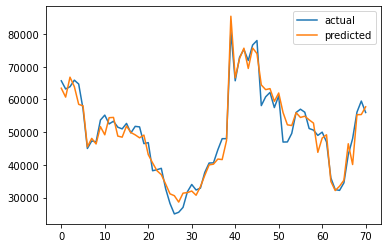

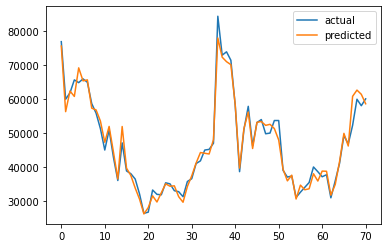

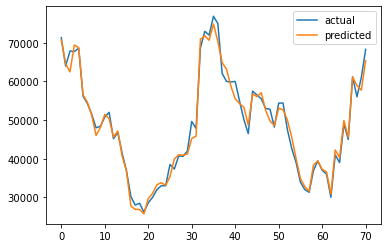

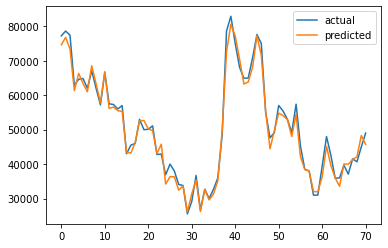

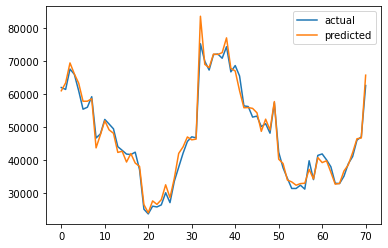

In [59]:
#Train and evaluate unified model with best parameters
model = create_model(preprocess_unified.fit_transform(df).shape[1])
perform_kfold_mlp(model=model, epoch=80, batch_size=4, n_splits=5, x=preprocess_unified.fit_transform(df), \
                  y=transformer.fit_transform(y_unified.to_numpy().reshape(-1, 1)), model_type='UNIFIED')

In [48]:
#CAT A Model
model = KerasRegressor(build_fn=create_model, verbose=1)

params = {
    'n_cols' : [preprocess.fit_transform(cat_a).shape[1]],
    'epochs' : [40, 60, 80],
    'batch_size' : [2, 4, 8]
}

#Due to heavy computation, we will not do grid search on network architecture (e.g. layers and neurons) =D
search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
search.fit(preprocess.fit_transform(cat_a), transformer.fit_transform(y_cat_a.to_numpy().reshape(-1, 1)))

Epoch 1/40

 72/118 [=================>............] - ETA: 5s - loss: 0.6681 - mae: 0.6681 - mse: 0.6853Epoch 1/40

118/118 [==============================] - 9s 78ms/step - loss: 0.7076 - mae: 0.7076 - mse: 0.7486
Epoch 2/40

 62/118 [==============>...............] - ETA: 8s - loss: 0.7836 - mae: 0.7836 - mse: 0.9349 Epoch 1/40

  2/118 [..............................] - ETA: 8:48 - loss: 1.2050 - mae: 1.2050 - mse: 1.4993Epoch 1/60

118/118 [==============================] - 10s 82ms/step - loss: 0.8200 - mae: 0.8200 - mse: 0.9948
Epoch 2/40

118/118 [==============================] - 10s 83ms/step - loss: 0.9212 - mae: 0.9212 - mse: 1.1402
Epoch 2/40

118/118 [==============================] - 1s 7ms/step - loss: 0.6617 - mae: 0.6617 - mse: 0.6447

 68/118 [================>.............] - ETA: 0s - loss: 0.7550 - mae: 0.7550 - mse: 0.8955Epoch 3/40

118/118 [==============================] - 10s 85ms/step - loss: 0.7137 - mae: 0.7137 - mse: 0.7679
Epoch 2/60

118/118 [==========

118/118 [==============================] - 1s 10ms/step - loss: 0.5822 - mae: 0.5822 - mse: 0.4681
Epoch 6/40

118/118 [==============================] - 1s 10ms/step - loss: 0.6776 - mae: 0.6776 - mse: 0.6871

118/118 [==============================] - 1s 10ms/step - loss: 0.6340 - mae: 0.6340 - mse: 0.5396
Epoch 5/60

 46/118 [==========>...................] - ETA: 0s - loss: 0.6189 - mae: 0.6189 - mse: 0.5297Epoch 5/40

118/118 [==============================] - 1s 9ms/step - loss: 0.5417 - mae: 0.5417 - mse: 0.5553
Epoch 6/40

118/118 [==============================] - 1s 9ms/step - loss: 0.5506 - mae: 0.5506 - mse: 0.4387

 70/118 [================>.............] - ETA: 0s - loss: 0.5174 - mae: 0.5174 - mse: 0.5325Epoch 7/40

118/118 [==============================] - 1s 9ms/step - loss: 0.6132 - mae: 0.6132 - mse: 0.5199

118/118 [==============================] - 1s 9ms/step - loss: 0.4833 - mae: 0.4833 - mse: 0.3455
Epoch 6/60

  2/118 [..............................] - ETA: 0s

118/118 [==============================] - 1s 9ms/step - loss: 0.4670 - mae: 0.4670 - mse: 0.3235

 92/118 [======================>.......] - ETA: 0s - loss: 0.4682 - mae: 0.4682 - mse: 0.3357Epoch 8/40

118/118 [==============================] - 1s 9ms/step - loss: 0.5853 - mae: 0.5853 - mse: 0.4808

118/118 [==============================] - 1s 10ms/step - loss: 0.4509 - mae: 0.4509 - mse: 0.3148
Epoch 7/60

  2/118 [..............................] - ETA: 8s - loss: 0.3751 - mae: 0.3751 - mse: 0.2580Epoch 7/40

118/118 [==============================] - 1s 10ms/step - loss: 0.4387 - mae: 0.4387 - mse: 0.4088
Epoch 8/40

118/118 [==============================] - 1s 10ms/step - loss: 0.3865 - mae: 0.3865 - mse: 0.2317
Epoch 9/40

118/118 [==============================] - 1s 11ms/step - loss: 0.5389 - mae: 0.5389 - mse: 0.4346

 96/118 [=======================>......] - ETA: 0s - loss: 0.4245 - mae: 0.4245 - mse: 0.3817Epoch 8/60

118/118 [==============================] - 1s 11ms/ste

118/118 [==============================] - 1s 9ms/step - loss: 0.3458 - mae: 0.3458 - mse: 0.1855

 72/118 [=================>............] - ETA: 0s - loss: 0.4267 - mae: 0.4267 - mse: 0.3869Epoch 10/40

118/118 [==============================] - 1s 9ms/step - loss: 0.3267 - mae: 0.3267 - mse: 0.1783

118/118 [==============================] - 1s 10ms/step - loss: 0.5101 - mae: 0.5101 - mse: 0.3714
Epoch 9/60

 56/118 [=============>................] - ETA: 0s - loss: 0.3636 - mae: 0.3636 - mse: 0.2099Epoch 9/40

118/118 [==============================] - 1s 11ms/step - loss: 0.4030 - mae: 0.4030 - mse: 0.3430
Epoch 10/40

118/118 [==============================] - 1s 10ms/step - loss: 0.3363 - mae: 0.3363 - mse: 0.1756
Epoch 11/40

118/118 [==============================] - 1s 9ms/step - loss: 0.3252 - mae: 0.3252 - mse: 0.1776

118/118 [==============================] - 1s 9ms/step - loss: 0.4185 - mae: 0.4185 - mse: 0.2670
Epoch 10/40

  2/118 [..............................] - ETA

118/118 [==============================] - 1s 9ms/step - loss: 0.3474 - mae: 0.3474 - mse: 0.1826
Epoch 12/40

118/118 [==============================] - 1s 8ms/step - loss: 0.3353 - mae: 0.3353 - mse: 0.1856
Epoch 11/40

118/118 [==============================] - 1s 9ms/step - loss: 0.3727 - mae: 0.3727 - mse: 0.2991

 80/118 [===================>..........] - ETA: 0s - loss: 0.3002 - mae: 0.3002 - mse: 0.1256Epoch 12/40

118/118 [==============================] - 1s 11ms/step - loss: 0.3888 - mae: 0.3888 - mse: 0.2237
Epoch 11/60

118/118 [==============================] - 1s 8ms/step - loss: 0.3174 - mae: 0.3174 - mse: 0.1496
Epoch 13/40

118/118 [==============================] - 1s 9ms/step - loss: 0.3385 - mae: 0.3385 - mse: 0.1860

 52/118 [============>.................] - ETA: 0s - loss: 0.2584 - mae: 0.2584 - mse: 0.0975Epoch 12/40

118/118 [==============================] - 1s 9ms/step - loss: 0.3423 - mae: 0.3423 - mse: 0.2734
Epoch 13/40

 24/118 [=====>...................

118/118 [==============================] - 1s 9ms/step - loss: 0.3524 - mae: 0.3524 - mse: 0.1878

 90/118 [=====================>........] - ETA: 0s - loss: 0.2908 - mae: 0.2908 - mse: 0.1398Epoch 12/60

118/118 [==============================] - 1s 8ms/step - loss: 0.2855 - mae: 0.2855 - mse: 0.1338
Epoch 14/40

118/118 [==============================] - 1s 9ms/step - loss: 0.2819 - mae: 0.2819 - mse: 0.1303
Epoch 13/40

118/118 [==============================] - 1s 9ms/step - loss: 0.3395 - mae: 0.3395 - mse: 0.2607

 38/118 [========>.....................] - ETA: 0s - loss: 0.2511 - mae: 0.2511 - mse: 0.0981Epoch 14/40

118/118 [==============================] - 1s 11ms/step - loss: 0.3518 - mae: 0.3518 - mse: 0.1763
Epoch 13/60

118/118 [==============================] - 1s 10ms/step - loss: 0.2823 - mae: 0.2823 - mse: 0.1266

 14/118 [==>...........................] - ETA: 0s - loss: 0.2753 - mae: 0.2753 - mse: 0.1110Epoch 15/40

118/118 [==============================] - 1s 9ms/

118/118 [==============================] - 1s 10ms/step - loss: 0.2444 - mae: 0.2444 - mse: 0.1041

 64/118 [===============>..............] - ETA: 0s - loss: 0.2833 - mae: 0.2833 - mse: 0.1209Epoch 15/40

118/118 [==============================] - 1s 9ms/step - loss: 0.3252 - mae: 0.3252 - mse: 0.2391
Epoch 16/40

118/118 [==============================] - 1s 11ms/step - loss: 0.2765 - mae: 0.2765 - mse: 0.1178
Epoch 17/40

118/118 [==============================] - 1s 11ms/step - loss: 0.3166 - mae: 0.3166 - mse: 0.1514
Epoch 15/60

118/118 [==============================] - 1s 10ms/step - loss: 0.2709 - mae: 0.2709 - mse: 0.1176
Epoch 16/40

 62/118 [==============>...............] - ETA: 0s - loss: 0.2641 - mae: 0.2641 - mse: 0.1212


118/118 [==============================] - 1s 10ms/step - loss: 0.3091 - mae: 0.3091 - mse: 0.2220
Epoch 17/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2680 - mae: 0.2680 - mse: 0.1134

118/118 [==============================] - 1s 10ms/step - loss: 0.2931 - mae: 0.2931 - mse: 0.1352
Epoch 18/40

 26/118 [=====>........................] - ETA: 1s - loss: 0.2188 - mae: 0.2188 - mse: 0.0894Epoch 16/60

118/118 [==============================] - 1s 10ms/step - loss: 0.2364 - mae: 0.2364 - mse: 0.0938

 52/118 [============>.................] - ETA: 0s - loss: 0.3394 - mae: 0.3394 - mse: 0.1671Epoch 17/40

118/118 [==============================] - 1s 10ms/step - loss: 0.3033 - mae: 0.3033 - mse: 0.2085
Epoch 18/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2981 - mae: 0.2981 - mse: 0.1353
Epoch 17/60



118/118 [==============================] - 1s 10ms/step - loss: 0.2806 - mae: 0.2806 - mse: 0.1302

 10/118 [=>............................] - ETA: 0s - loss: 0.2308 - mae: 0.2308 - mse: 0.0736Epoch 19/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2247 - mae: 0.2247 - mse: 0.0905

 48/118 [===========>..................] - ETA: 0s - loss: 0.2445 - mae: 0.2445 - mse: 0.0886Epoch 18/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2948 - mae: 0.2948 - mse: 0.1990
Epoch 19/40

118/118 [==============================] - 1s 9ms/step - loss: 0.2845 - mae: 0.2845 - mse: 0.1208

 82/118 [===================>..........] - ETA: 0s - loss: 0.2268 - mae: 0.2268 - mse: 0.0907Epoch 18/60

118/118 [==============================] - 1s 9ms/step - loss: 0.2452 - mae: 0.2452 - mse: 0.0987
Epoch 20/40

118/118 [==============================] - 1s 8ms/step - loss: 0.2061 - mae: 0.2061 - mse: 0.0766

 32/118 [=======>......................] - ETA: 0s - loss: 0.

118/118 [==============================] - 1s 7ms/step - loss: 0.2846 - mae: 0.2846 - mse: 0.1812

118/118 [==============================] - 1s 8ms/step - loss: 0.2942 - mae: 0.2942 - mse: 0.1282

 98/118 [=======================>......] - ETA: 0s - loss: 0.2511 - mae: 0.2511 - mse: 0.1007Epoch 19/60

 74/118 [=================>............] - ETA: 0s - loss: 0.2149 - mae: 0.2149 - mse: 0.0745Epoch 20/40

118/118 [==============================] - 1s 9ms/step - loss: 0.2689 - mae: 0.2689 - mse: 0.1124
Epoch 21/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2133 - mae: 0.2133 - mse: 0.0734
Epoch 20/40

118/118 [==============================] - 1s 9ms/step - loss: 0.2910 - mae: 0.2910 - mse: 0.1782
Epoch 21/40

118/118 [==============================] - 1s 9ms/step - loss: 0.2729 - mae: 0.2729 - mse: 0.1115

 72/118 [=================>............] - ETA: 0s - loss: 0.1945 - mae: 0.1945 - mse: 0.0615Epoch 20/60

118/118 [==============================] - 1s 10ms/

118/118 [==============================] - 1s 10ms/step - loss: 0.2476 - mae: 0.2476 - mse: 0.0951
Epoch 23/40

118/118 [==============================] - 1s 9ms/step - loss: 0.1994 - mae: 0.1994 - mse: 0.0633

 66/118 [===============>..............] - ETA: 0s - loss: 0.2741 - mae: 0.2741 - mse: 0.1215Epoch 22/40

118/118 [==============================] - 1s 8ms/step - loss: 0.2594 - mae: 0.2594 - mse: 0.1045

114/118 [===========================>..] - ETA: 0s - loss: 0.2828 - mae: 0.2828 - mse: 0.1755Epoch 22/60

118/118 [==============================] - 1s 9ms/step - loss: 0.2842 - mae: 0.2842 - mse: 0.1742
Epoch 23/40

118/118 [==============================] - 1s 9ms/step - loss: 0.2639 - mae: 0.2639 - mse: 0.1141
Epoch 24/40

118/118 [==============================] - 1s 9ms/step - loss: 0.1892 - mae: 0.1892 - mse: 0.0586
Epoch 23/40

118/118 [==============================] - 1s 9ms/step - loss: 0.3050 - mae: 0.3050 - mse: 0.1873

118/118 [==============================] - 1s 

118/118 [==============================] - 1s 9ms/step - loss: 0.2217 - mae: 0.2217 - mse: 0.0846
Epoch 25/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2526 - mae: 0.2526 - mse: 0.0972

 32/118 [=======>......................] - ETA: 1s - loss: 0.2726 - mae: 0.2726 - mse: 0.1074Epoch 25/60

118/118 [==============================] - 1s 9ms/step - loss: 0.2738 - mae: 0.2738 - mse: 0.1649

 12/118 [==>...........................] - ETA: 1s - loss: 0.1973 - mae: 0.1973 - mse: 0.0613Epoch 26/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2473 - mae: 0.2473 - mse: 0.0946

 36/118 [========>.....................] - ETA: 0s - loss: 0.2112 - mae: 0.2112 - mse: 0.0654Epoch 27/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2176 - mae: 0.2176 - mse: 0.0749

 54/118 [============>.................] - ETA: 0s - loss: 0.2760 - mae: 0.2760 - mse: 0.1497Epoch 26/40

118/118 [==============================] - 1s 9ms/step - loss: 0.2

118/118 [==============================] - 1s 10ms/step - loss: 0.2316 - mae: 0.2316 - mse: 0.0800

 12/118 [==>...........................] - ETA: 0s - loss: 0.2024 - mae: 0.2024 - mse: 0.0671Epoch 29/40

118/118 [==============================] - 1s 8ms/step - loss: 0.2248 - mae: 0.2248 - mse: 0.0782

 52/118 [============>.................] - ETA: 0s - loss: 0.2398 - mae: 0.2398 - mse: 0.0888Epoch 28/60

118/118 [==============================] - 1s 8ms/step - loss: 0.2314 - mae: 0.2314 - mse: 0.1043
Epoch 29/40

118/118 [==============================] - 1s 8ms/step - loss: 0.2376 - mae: 0.2376 - mse: 0.0889
Epoch 30/40

118/118 [==============================] - 1s 9ms/step - loss: 0.1646 - mae: 0.1646 - mse: 0.0443
Epoch 29/40

118/118 [==============================] - 1s 7ms/step - loss: 0.2180 - mae: 0.2180 - mse: 0.0752

 84/118 [====================>.........] - ETA: 0s - loss: 0.1990 - mae: 0.1990 - mse: 0.0822Epoch 29/60

118/118 [==============================] - 1s 9ms/s

118/118 [==============================] - 1s 9ms/step - loss: 0.2089 - mae: 0.2089 - mse: 0.0769

 92/118 [======================>.......] - ETA: 0s - loss: 0.2054 - mae: 0.2054 - mse: 0.0750Epoch 31/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2067 - mae: 0.2067 - mse: 0.0642
Epoch 30/40

118/118 [==============================] - 1s 10ms/step - loss: 0.1978 - mae: 0.1978 - mse: 0.0682

 52/118 [============>.................] - ETA: 0s - loss: 0.3214 - mae: 0.3214 - mse: 0.1352Epoch 30/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1950 - mae: 0.1950 - mse: 0.0643

 76/118 [==================>...........] - ETA: 0s - loss: 0.2911 - mae: 0.2911 - mse: 0.1161Epoch 31/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2146 - mae: 0.2146 - mse: 0.0782

 32/118 [=======>......................] - ETA: 1s - loss: 0.1806 - mae: 0.1806 - mse: 0.0571Epoch 32/40

118/118 [==============================] - 1s 10ms/step - loss: 0

118/118 [==============================] - 1s 11ms/step - loss: 0.2088 - mae: 0.2088 - mse: 0.0670
Epoch 34/40

118/118 [==============================] - 1s 8ms/step - loss: 0.2187 - mae: 0.2187 - mse: 0.0772
Epoch 34/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1759 - mae: 0.1759 - mse: 0.0523

100/118 [========================>.....] - ETA: 0s - loss: 0.2096 - mae: 0.2096 - mse: 0.0741Epoch 34/40

118/118 [==============================] - 1s 11ms/step - loss: 0.2103 - mae: 0.2103 - mse: 0.0726
Epoch 35/40

118/118 [==============================] - 1s 10ms/step - loss: 0.1815 - mae: 0.1815 - mse: 0.0541
Epoch 35/40

118/118 [==============================] - 1s 10ms/step - loss: 0.1527 - mae: 0.1527 - mse: 0.0400
Epoch 35/40

118/118 [==============================] - 1s 11ms/step - loss: 0.1934 - mae: 0.1934 - mse: 0.0624
Epoch 35/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1943 - mae: 0.1943 - mse: 0.0697
Epoch 36/40

118/118 [==

118/118 [==============================] - 1s 11ms/step - loss: 0.1360 - mae: 0.1360 - mse: 0.0334

104/118 [=========================>....] - ETA: 0s - loss: 0.2066 - mae: 0.2066 - mse: 0.0695Epoch 36/40

118/118 [==============================] - 1s 10ms/step - loss: 0.2053 - mae: 0.2053 - mse: 0.0675

 52/118 [============>.................] - ETA: 0s - loss: 0.1807 - mae: 0.1807 - mse: 0.0562Epoch 37/40

118/118 [==============================] - 1s 10ms/step - loss: 0.1508 - mae: 0.1508 - mse: 0.0366
Epoch 37/40

118/118 [==============================] - 1s 10ms/step - loss: 0.1806 - mae: 0.1806 - mse: 0.0566

 62/118 [==============>...............] - ETA: 0s - loss: 0.2124 - mae: 0.2124 - mse: 0.0825Epoch 37/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1615 - mae: 0.1615 - mse: 0.0429

108/118 [==========================>...] - ETA: 0s - loss: 0.2065 - mae: 0.2065 - mse: 0.0720Epoch 37/40

118/118 [==============================] - 1s 9ms/step - loss: 0

 62/118 [==============>...............] - ETA: 0s - loss: 0.2033 - mae: 0.2033 - mse: 0.0734Epoch 39/40

118/118 [==============================] - 1s 9ms/step - loss: 0.1795 - mae: 0.1795 - mse: 0.0607

 44/118 [==========>...................] - ETA: 0s - loss: 0.2107 - mae: 0.2107 - mse: 0.0834Epoch 39/40

118/118 [==============================] - 1s 9ms/step - loss: 0.1763 - mae: 0.1763 - mse: 0.0552

 54/118 [============>.................] - ETA: 0s - loss: 0.1313 - mae: 0.1313 - mse: 0.0260Epoch 39/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1979 - mae: 0.1979 - mse: 0.0672

 50/118 [===========>..................] - ETA: 0s - loss: 0.1605 - mae: 0.1605 - mse: 0.0425Epoch 40/40

118/118 [==============================] - 1s 10ms/step - loss: 0.1256 - mae: 0.1256 - mse: 0.0280
Epoch 39/40

118/118 [==============================] - 1s 9ms/step - loss: 0.1562 - mae: 0.1562 - mse: 0.0413
Epoch 40/40

118/118 [==============================] - 1s 9ms/step -

118/118 [==============================] - 1s 6ms/step - loss: 0.1622 - mae: 0.1622 - mse: 0.0467
Epoch 45/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1514 - mae: 0.1514 - mse: 0.0420
Epoch 46/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1717 - mae: 0.1717 - mse: 0.0470
Epoch 47/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1498 - mae: 0.1498 - mse: 0.0390
Epoch 48/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1363 - mae: 0.1363 - mse: 0.0361
Epoch 49/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1493 - mae: 0.1493 - mse: 0.0428
Epoch 50/60

118/118 [==============================] - 1s 5ms/step - loss: 0.1434 - mae: 0.1434 - mse: 0.0358
Epoch 51/60

118/118 [==============================] - 0s 4ms/step - loss: 0.1498 - mae: 0.1498 - mse: 0.0408
Epoch 52/60

118/118 [==============================] - 1s 4ms/step - loss: 0.1522 - mae: 0.1522 - mse: 0.0386
Epoch 53/60

1

118/118 [==============================] - 0s 4ms/step - loss: 0.1547 - mae: 0.1547 - mse: 0.0403
Epoch 60/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1290 - mae: 0.1290 - mse: 0.0297

59/59 [==============================] - 1s 21ms/step
Epoch 1/60

 80/118 [===================>..........] - ETA: 5s - loss: 0.9367 - mae: 0.9367 - mse: 1.1756Epoch 1/80

106/118 [=========================>....] - ETA: 1s - loss: 0.9382 - mae: 0.9382 - mse: 1.1681Epoch 1/60

118/118 [==============================] - 12s 105ms/step - loss: 0.9267 - mae: 0.9267 - mse: 1.1483
Epoch 2/60

118/118 [==============================] - 12s 104ms/step - loss: 0.7061 - mae: 0.7061 - mse: 0.7461

 88/118 [=====================>........] - ETA: 4s - loss: 0.8128 - mae: 0.8128 - mse: 0.9691Epoch 2/80

118/118 [==============================] - 13s 110ms/step - loss: 0.7684 - mae: 0.7684 - mse: 0.8722
Epoch 2/60

118/118 [==============================] - 1s 8ms/step - loss: 0.9153 - mae: 0.91

118/118 [==============================] - 1s 8ms/step - loss: 0.6498 - mae: 0.6498 - mse: 0.5957

 84/118 [====================>.........] - ETA: 0s - loss: 0.7142 - mae: 0.7142 - mse: 0.8146Epoch 3/80

118/118 [==============================] - 1s 8ms/step - loss: 0.6778 - mae: 0.6778 - mse: 0.7890
Epoch 3/60

118/118 [==============================] - 1s 8ms/step - loss: 0.8181 - mae: 0.8181 - mse: 0.9537

 18/118 [===>..........................] - ETA: 1s - loss: 0.7567 - mae: 0.7567 - mse: 1.0277Epoch 4/60

118/118 [==============================] - 1s 8ms/step - loss: 0.6181 - mae: 0.6181 - mse: 0.5196

 62/118 [==============>...............] - ETA: 0s - loss: 0.7532 - mae: 0.7532 - mse: 0.8854Epoch 4/80

118/118 [==============================] - 1s 7ms/step - loss: 0.5906 - mae: 0.5906 - mse: 0.6707
Epoch 4/60

118/118 [==============================] - 1s 7ms/step - loss: 0.6681 - mae: 0.6681 - mse: 0.7195
Epoch 5/60

 84/118 [====================>.........] - ETA: 0s - loss:

118/118 [==============================] - 1s 7ms/step - loss: 0.5930 - mae: 0.5930 - mse: 0.4929
Epoch 5/80

118/118 [==============================] - 1s 7ms/step - loss: 0.5436 - mae: 0.5436 - mse: 0.5799
Epoch 5/60

118/118 [==============================] - 1s 7ms/step - loss: 0.5578 - mae: 0.5578 - mse: 0.5029
Epoch 6/60

118/118 [==============================] - 1s 9ms/step - loss: 0.5703 - mae: 0.5703 - mse: 0.4649
Epoch 6/80

118/118 [==============================] - 1s 10ms/step - loss: 0.5216 - mae: 0.5216 - mse: 0.5293
Epoch 6/60

118/118 [==============================] - 1s 9ms/step - loss: 0.4740 - mae: 0.4740 - mse: 0.3663

 14/118 [==>...........................] - ETA: 0s - loss: 0.3481 - mae: 0.3481 - mse: 0.1928Epoch 7/60

 92/118 [======================>.......] - ETA: 0s - loss: 0.5551 - mae: 0.5551 - mse: 0.4301


118/118 [==============================] - 1s 8ms/step - loss: 0.5318 - mae: 0.5318 - mse: 0.4105

 78/118 [==================>...........] - ETA: 0s - loss: 0.3587 - mae: 0.3587 - mse: 0.2015Epoch 7/80

118/118 [==============================] - 1s 9ms/step - loss: 0.5153 - mae: 0.5153 - mse: 0.4897
Epoch 7/60

118/118 [==============================] - 1s 9ms/step - loss: 0.4010 - mae: 0.4010 - mse: 0.2697

 58/118 [=============>................] - ETA: 0s - loss: 0.5176 - mae: 0.5176 - mse: 0.3656Epoch 8/60

118/118 [==============================] - 1s 9ms/step - loss: 0.4974 - mae: 0.4974 - mse: 0.3620

 68/118 [================>.............] - ETA: 0s - loss: 0.5294 - mae: 0.5294 - mse: 0.5200Epoch 8/80

118/118 [==============================] - 1s 9ms/step - loss: 0.5056 - mae: 0.5056 - mse: 0.4863

114/118 [===========================>..] - ETA: 0s - loss: 0.3353 - mae: 0.3353 - mse: 0.1950Epoch 8/60

118/118 [==============================] - 1s 9ms/step - loss: 0.3416 - ma

118/118 [==============================] - 1s 7ms/step - loss: 0.3844 - mae: 0.3844 - mse: 0.2397
Epoch 11/80

118/118 [==============================] - 1s 9ms/step - loss: 0.4762 - mae: 0.4762 - mse: 0.4615
Epoch 11/60

118/118 [==============================] - 1s 8ms/step - loss: 0.2808 - mae: 0.2808 - mse: 0.1385
Epoch 12/60

118/118 [==============================] - 1s 8ms/step - loss: 0.3780 - mae: 0.3780 - mse: 0.2353
Epoch 12/80

118/118 [==============================] - 1s 7ms/step - loss: 0.4414 - mae: 0.4414 - mse: 0.3901
Epoch 12/60

 12/118 [==>...........................] - ETA: 1s - loss: 0.3287 - mae: 0.3287 - mse: 0.3282


118/118 [==============================] - 1s 8ms/step - loss: 0.2585 - mae: 0.2585 - mse: 0.1307

 18/118 [===>..........................] - ETA: 1s - loss: 0.3975 - mae: 0.3975 - mse: 0.4550Epoch 13/60

118/118 [==============================] - 1s 8ms/step - loss: 0.3347 - mae: 0.3347 - mse: 0.1876
Epoch 13/80

118/118 [==============================] - 1s 8ms/step - loss: 0.4460 - mae: 0.4460 - mse: 0.3971

 78/118 [==================>...........] - ETA: 0s - loss: 0.3126 - mae: 0.3126 - mse: 0.1904Epoch 13/60

118/118 [==============================] - 1s 9ms/step - loss: 0.2795 - mae: 0.2795 - mse: 0.1307

 94/118 [======================>.......] - ETA: 0s - loss: 0.3276 - mae: 0.3276 - mse: 0.1975Epoch 14/60

118/118 [==============================] - 1s 7ms/step - loss: 0.3275 - mae: 0.3275 - mse: 0.1902
Epoch 14/80

118/118 [==============================] - 1s 8ms/step - loss: 0.4197 - mae: 0.4197 - mse: 0.3476
Epoch 14/60

 56/118 [=============>................] - ETA: 0s -

118/118 [==============================] - 1s 8ms/step - loss: 0.2525 - mae: 0.2525 - mse: 0.1156
Epoch 15/60

118/118 [==============================] - 1s 8ms/step - loss: 0.3142 - mae: 0.3142 - mse: 0.1725

 66/118 [===============>..............] - ETA: 0s - loss: 0.4405 - mae: 0.4405 - mse: 0.4200Epoch 15/80

118/118 [==============================] - 1s 7ms/step - loss: 0.3875 - mae: 0.3875 - mse: 0.3211
Epoch 15/60

118/118 [==============================] - 1s 7ms/step - loss: 0.2454 - mae: 0.2454 - mse: 0.1126
Epoch 16/60

118/118 [==============================] - 1s 7ms/step - loss: 0.2972 - mae: 0.2972 - mse: 0.1543

 44/118 [==========>...................] - ETA: 0s - loss: 0.3038 - mae: 0.3038 - mse: 0.1450Epoch 16/80

118/118 [==============================] - 1s 7ms/step - loss: 0.3455 - mae: 0.3455 - mse: 0.2588

106/118 [=========================>....] - ETA: 0s - loss: 0.2586 - mae: 0.2586 - mse: 0.1216Epoch 16/60

118/118 [==============================] - 1s 7ms/st

118/118 [==============================] - 1s 9ms/step - loss: 0.2494 - mae: 0.2494 - mse: 0.1144

 82/118 [===================>..........] - ETA: 0s - loss: 0.2733 - mae: 0.2733 - mse: 0.1339Epoch 19/60

118/118 [==============================] - 1s 7ms/step - loss: 0.2457 - mae: 0.2457 - mse: 0.1096

 32/118 [=======>......................] - ETA: 0s - loss: 0.2584 - mae: 0.2584 - mse: 0.1459Epoch 19/80

118/118 [==============================] - 1s 9ms/step - loss: 0.2318 - mae: 0.2318 - mse: 0.1019

118/118 [==============================] - 1s 8ms/step - loss: 0.2449 - mae: 0.2449 - mse: 0.1102
Epoch 19/60

 86/118 [====================>.........] - ETA: 0s - loss: 0.2231 - mae: 0.2231 - mse: 0.0974Epoch 20/60

118/118 [==============================] - 1s 8ms/step - loss: 0.2292 - mae: 0.2292 - mse: 0.0927

 58/118 [=============>................] - ETA: 0s - loss: 0.2477 - mae: 0.2477 - mse: 0.1020Epoch 20/80

 90/118 [=====================>........] - ETA: 0s - loss: 0.2224 - m

118/118 [==============================] - 1s 7ms/step - loss: 0.2252 - mae: 0.2252 - mse: 0.0910
Epoch 20/60

118/118 [==============================] - 1s 7ms/step - loss: 0.2258 - mae: 0.2258 - mse: 0.1029
Epoch 21/60

118/118 [==============================] - 1s 7ms/step - loss: 0.2390 - mae: 0.2390 - mse: 0.0940
Epoch 21/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1954 - mae: 0.1954 - mse: 0.0680

108/118 [==========================>...] - ETA: 0s - loss: 0.2190 - mae: 0.2190 - mse: 0.0931Epoch 21/60

118/118 [==============================] - 1s 8ms/step - loss: 0.2294 - mae: 0.2294 - mse: 0.1006
Epoch 22/60

118/118 [==============================] - 1s 7ms/step - loss: 0.2171 - mae: 0.2171 - mse: 0.0834

 42/118 [=========>....................] - ETA: 0s - loss: 0.1675 - mae: 0.1675 - mse: 0.0489Epoch 22/80

118/118 [==============================] - 1s 8ms/step - loss: 0.2264 - mae: 0.2264 - mse: 0.0814
Epoch 22/60

  2/118 [..........................

118/118 [==============================] - 1s 8ms/step - loss: 0.2238 - mae: 0.2238 - mse: 0.0999
Epoch 23/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1923 - mae: 0.1923 - mse: 0.0644

 34/118 [=======>......................] - ETA: 0s - loss: 0.1768 - mae: 0.1768 - mse: 0.0503Epoch 23/80

 24/118 [=====>........................] - ETA: 0s - loss: 0.1711 - mae: 0.1711 - mse: 0.0417Epoch 1/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1911 - mae: 0.1911 - mse: 0.0606

 88/118 [=====================>........] - ETA: 0s - loss: 0.2068 - mae: 0.2068 - mse: 0.0748Epoch 23/60

118/118 [==============================] - 1s 10ms/step - loss: 0.2186 - mae: 0.2186 - mse: 0.0849

 22/118 [====>.........................] - ETA: 1s - loss: 0.1683 - mae: 0.1683 - mse: 0.0456Epoch 24/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1926 - mae: 0.1926 - mse: 0.0696

 30/118 [======>.......................] - ETA: 0s - loss: 0.2326 - 

118/118 [==============================] - 1s 9ms/step - loss: 0.1997 - mae: 0.1997 - mse: 0.0666
Epoch 24/60

118/118 [==============================] - 1s 10ms/step - loss: 0.2025 - mae: 0.2025 - mse: 0.0752
Epoch 25/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1745 - mae: 0.1745 - mse: 0.0542

108/118 [==========================>...] - ETA: 0s - loss: 0.9240 - mae: 0.9240 - mse: 1.1621Epoch 25/80

118/118 [==============================] - 1s 8ms/step - loss: 0.9086 - mae: 0.9086 - mse: 1.1233
Epoch 3/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1665 - mae: 0.1665 - mse: 0.0474
Epoch 25/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1884 - mae: 0.1884 - mse: 0.0663

 84/118 [====================>.........] - ETA: 0s - loss: 0.9401 - mae: 0.9401 - mse: 1.1857Epoch 26/60

  2/118 [..............................] - ETA: 0s - loss: 0.0952 - mae: 0.0952 - mse: 0.0092


118/118 [==============================] - 1s 8ms/step - loss: 0.8898 - mae: 0.8898 - mse: 1.0870
Epoch 4/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1757 - mae: 0.1757 - mse: 0.0564
Epoch 26/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1619 - mae: 0.1619 - mse: 0.0461

 50/118 [===========>..................] - ETA: 0s - loss: 0.8478 - mae: 0.8478 - mse: 0.9500Epoch 26/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1935 - mae: 0.1935 - mse: 0.0649

 84/118 [====================>.........] - ETA: 0s - loss: 0.1655 - mae: 0.1655 - mse: 0.0498Epoch 27/60

118/118 [==============================] - 1s 10ms/step - loss: 0.8168 - mae: 0.8168 - mse: 0.9632
Epoch 5/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1658 - mae: 0.1658 - mse: 0.0499
Epoch 27/80

 18/118 [===>..........................] - ETA: 2s - loss: 0.1751 - mae: 0.1751 - mse: 0.0560


118/118 [==============================] - 1s 10ms/step - loss: 0.1489 - mae: 0.1489 - mse: 0.0365

 44/118 [==========>...................] - ETA: 0s - loss: 0.5909 - mae: 0.5909 - mse: 0.5729Epoch 27/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1799 - mae: 0.1799 - mse: 0.0583

 98/118 [=======================>......] - ETA: 0s - loss: 0.1519 - mae: 0.1519 - mse: 0.0481Epoch 28/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1472 - mae: 0.1472 - mse: 0.0442
Epoch 28/80

118/118 [==============================] - 1s 10ms/step - loss: 0.6512 - mae: 0.6512 - mse: 0.6725

 28/118 [======>.......................] - ETA: 0s - loss: 0.1536 - mae: 0.1536 - mse: 0.0424Epoch 6/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1534 - mae: 0.1534 - mse: 0.0416
Epoch 28/60

 70/118 [================>.............] - ETA: 0s - loss: 0.1498 - mae: 0.1498 - mse: 0.0385


118/118 [==============================] - 1s 10ms/step - loss: 0.1587 - mae: 0.1587 - mse: 0.0475

108/118 [==========================>...] - ETA: 0s - loss: 0.5335 - mae: 0.5335 - mse: 0.4670Epoch 29/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1618 - mae: 0.1618 - mse: 0.0468

110/118 [==========================>...] - ETA: 0s - loss: 0.5277 - mae: 0.5277 - mse: 0.4597Epoch 29/80

118/118 [==============================] - 1s 10ms/step - loss: 0.5427 - mae: 0.5427 - mse: 0.4921
Epoch 7/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1445 - mae: 0.1445 - mse: 0.0342
Epoch 29/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1685 - mae: 0.1685 - mse: 0.0528
Epoch 30/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1498 - mae: 0.1498 - mse: 0.0443

 78/118 [==================>...........] - ETA: 0s - loss: 0.1462 - mae: 0.1462 - mse: 0.0348Epoch 30/80



118/118 [==============================] - 1s 9ms/step - loss: 0.4388 - mae: 0.4388 - mse: 0.3250
Epoch 8/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1382 - mae: 0.1382 - mse: 0.0330

 50/118 [===========>..................] - ETA: 0s - loss: 0.1111 - mae: 0.1111 - mse: 0.0278Epoch 30/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1552 - mae: 0.1552 - mse: 0.0455
Epoch 31/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1317 - mae: 0.1317 - mse: 0.0379
Epoch 31/80

118/118 [==============================] - 1s 9ms/step - loss: 0.3750 - mae: 0.3750 - mse: 0.2296

 54/118 [============>.................] - ETA: 0s - loss: 0.1458 - mae: 0.1458 - mse: 0.0420Epoch 9/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1542 - mae: 0.1542 - mse: 0.0417
Epoch 31/60

 52/118 [============>.................] - ETA: 0s - loss: 0.1280 - mae: 0.1280 - mse: 0.0357


118/118 [==============================] - 1s 9ms/step - loss: 0.1554 - mae: 0.1554 - mse: 0.0459
Epoch 32/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1274 - mae: 0.1274 - mse: 0.0339

102/118 [========================>.....] - ETA: 0s - loss: 0.3224 - mae: 0.3224 - mse: 0.1551Epoch 32/80

118/118 [==============================] - 1s 9ms/step - loss: 0.3220 - mae: 0.3220 - mse: 0.1600
Epoch 10/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1269 - mae: 0.1269 - mse: 0.0279

 22/118 [====>.........................] - ETA: 1s - loss: 0.3184 - mae: 0.3184 - mse: 0.1399Epoch 32/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1595 - mae: 0.1595 - mse: 0.0468
Epoch 33/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1289 - mae: 0.1289 - mse: 0.0319
Epoch 33/80

 82/118 [===================>..........] - ETA: 0s - loss: 0.1598 - mae: 0.1598 - mse: 0.0481


118/118 [==============================] - 1s 9ms/step - loss: 0.2924 - mae: 0.2924 - mse: 0.1340
Epoch 11/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1458 - mae: 0.1458 - mse: 0.0406
Epoch 33/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1540 - mae: 0.1540 - mse: 0.0457

 86/118 [====================>.........] - ETA: 0s - loss: 0.1327 - mae: 0.1327 - mse: 0.0320Epoch 34/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1320 - mae: 0.1320 - mse: 0.0323

 92/118 [======================>.......] - ETA: 0s - loss: 0.2634 - mae: 0.2634 - mse: 0.1147Epoch 34/80

118/118 [==============================] - 1s 10ms/step - loss: 0.2593 - mae: 0.2593 - mse: 0.1082

112/118 [===========================>..] - ETA: 0s - loss: 0.1205 - mae: 0.1205 - mse: 0.0252Epoch 12/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1187 - mae: 0.1187 - mse: 0.0244
Epoch 34/60

 40/118 [=========>....................] - ETA: 0s

118/118 [==============================] - 1s 11ms/step - loss: 0.1519 - mae: 0.1519 - mse: 0.0446
Epoch 35/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1383 - mae: 0.1383 - mse: 0.0372

100/118 [========================>.....] - ETA: 0s - loss: 0.2248 - mae: 0.2248 - mse: 0.0836Epoch 35/80

118/118 [==============================] - 1s 9ms/step - loss: 0.2358 - mae: 0.2358 - mse: 0.0920
Epoch 13/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1159 - mae: 0.1159 - mse: 0.0229
Epoch 35/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1690 - mae: 0.1690 - mse: 0.0475
Epoch 36/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1349 - mae: 0.1349 - mse: 0.0335
Epoch 36/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1729 - mae: 0.1729 - mse: 0.0461
Epoch 36/60

  2/118 [..............................] - ETA: 0s - loss: 0.1868 - mae: 0.1868 - mse: 0.0589


118/118 [==============================] - 2s 13ms/step - loss: 0.2217 - mae: 0.2217 - mse: 0.0824
Epoch 14/80

118/118 [==============================] - 1s 12ms/step - loss: 0.1536 - mae: 0.1536 - mse: 0.0415

 82/118 [===================>..........] - ETA: 0s - loss: 0.1035 - mae: 0.1035 - mse: 0.0227Epoch 37/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1187 - mae: 0.1187 - mse: 0.0270
Epoch 37/80

118/118 [==============================] - 1s 12ms/step - loss: 0.1474 - mae: 0.1474 - mse: 0.0364

118/118 [==============================] - 1s 11ms/step - loss: 0.2091 - mae: 0.2091 - mse: 0.0757
Epoch 15/80

 76/118 [==================>...........] - ETA: 0s - loss: 0.1498 - mae: 0.1498 - mse: 0.0411Epoch 37/60

 76/118 [==================>...........] - ETA: 0s - loss: 0.1464 - mae: 0.1464 - mse: 0.0368


118/118 [==============================] - 1s 11ms/step - loss: 0.1700 - mae: 0.1700 - mse: 0.0483
Epoch 38/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1280 - mae: 0.1280 - mse: 0.0296

 82/118 [===================>..........] - ETA: 0s - loss: 0.2043 - mae: 0.2043 - mse: 0.0658Epoch 38/80

118/118 [==============================] - 1s 11ms/step - loss: 0.1682 - mae: 0.1682 - mse: 0.0490
Epoch 38/60

118/118 [==============================] - 1s 11ms/step - loss: 0.2011 - mae: 0.2011 - mse: 0.0683
Epoch 16/80

118/118 [==============================] - 1s 11ms/step - loss: 0.1578 - mae: 0.1578 - mse: 0.0425
Epoch 39/60

104/118 [=========================>....] - ETA: 0s - loss: 0.1191 - mae: 0.1191 - mse: 0.0252


118/118 [==============================] - 2s 13ms/step - loss: 0.1203 - mae: 0.1203 - mse: 0.0252
Epoch 39/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1164 - mae: 0.1164 - mse: 0.0224
Epoch 39/60

118/118 [==============================] - 1s 11ms/step - loss: 0.2044 - mae: 0.2044 - mse: 0.0715
Epoch 17/80

118/118 [==============================] - 1s 12ms/step - loss: 0.1430 - mae: 0.1430 - mse: 0.0394
Epoch 40/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1135 - mae: 0.1135 - mse: 0.0224
Epoch 40/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1217 - mae: 0.1217 - mse: 0.0276
Epoch 40/80

118/118 [==============================] - 1s 11ms/step - loss: 0.1979 - mae: 0.1979 - mse: 0.0744

 70/118 [================>.............] - ETA: 0s - loss: 0.1787 - mae: 0.1787 - mse: 0.0562Epoch 18/80

 36/118 [========>.....................] - ETA: 0s - loss: 0.2026 - mae: 0.2026 - mse: 0.0808


118/118 [==============================] - 1s 12ms/step - loss: 0.1836 - mae: 0.1836 - mse: 0.0553
Epoch 41/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1127 - mae: 0.1127 - mse: 0.0232
Epoch 41/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1155 - mae: 0.1155 - mse: 0.0242

 12/118 [==>...........................] - ETA: 0s - loss: 0.1239 - mae: 0.1239 - mse: 0.0271Epoch 41/80

118/118 [==============================] - 1s 12ms/step - loss: 0.1648 - mae: 0.1648 - mse: 0.0545

 26/118 [=====>........................] - ETA: 0s - loss: 0.1235 - mae: 0.1235 - mse: 0.0284Epoch 19/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1687 - mae: 0.1687 - mse: 0.0509

 80/118 [===================>..........] - ETA: 0s - loss: 0.1256 - mae: 0.1256 - mse: 0.0276Epoch 42/60

 72/118 [=================>............] - ETA: 0s - loss: 0.1701 - mae: 0.1701 - mse: 0.0533


118/118 [==============================] - 1s 9ms/step - loss: 0.1184 - mae: 0.1184 - mse: 0.0242

108/118 [==========================>...] - ETA: 0s - loss: 0.1157 - mae: 0.1157 - mse: 0.0249Epoch 42/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1102 - mae: 0.1102 - mse: 0.0232

 48/118 [===========>..................] - ETA: 0s - loss: 0.1968 - mae: 0.1968 - mse: 0.0622Epoch 42/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1789 - mae: 0.1789 - mse: 0.0599

 26/118 [=====>........................] - ETA: 0s - loss: 0.1401 - mae: 0.1401 - mse: 0.0378Epoch 20/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1573 - mae: 0.1573 - mse: 0.0447

 82/118 [===================>..........] - ETA: 0s - loss: 0.1449 - mae: 0.1449 - mse: 0.0341Epoch 43/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1127 - mae: 0.1127 - mse: 0.0242
Epoch 43/80

118/118 [==============================] - 1s 11ms/step - loss: 0.

118/118 [==============================] - 1s 11ms/step - loss: 0.1399 - mae: 0.1399 - mse: 0.0375

 38/118 [========>.....................] - ETA: 1s - loss: 0.1713 - mae: 0.1713 - mse: 0.0567Epoch 44/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1209 - mae: 0.1209 - mse: 0.0242
Epoch 44/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1072 - mae: 0.1072 - mse: 0.0213

 84/118 [====================>.........] - ETA: 0s - loss: 0.1796 - mae: 0.1796 - mse: 0.0583Epoch 44/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1663 - mae: 0.1663 - mse: 0.0509
Epoch 22/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1369 - mae: 0.1369 - mse: 0.0358
Epoch 45/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1095 - mae: 0.1095 - mse: 0.0209

 80/118 [===================>..........] - ETA: 0s - loss: 0.1873 - mae: 0.1873 - mse: 0.0580Epoch 45/80

118/118 [==============================] - 1s 

118/118 [==============================] - 1s 10ms/step - loss: 0.1378 - mae: 0.1378 - mse: 0.0384

 48/118 [===========>..................] - ETA: 0s - loss: 0.1858 - mae: 0.1858 - mse: 0.0683Epoch 46/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1108 - mae: 0.1108 - mse: 0.0213
Epoch 46/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1182 - mae: 0.1182 - mse: 0.0262

 42/118 [=========>....................] - ETA: 0s - loss: 0.1465 - mae: 0.1465 - mse: 0.0327Epoch 46/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1739 - mae: 0.1739 - mse: 0.0556
Epoch 24/80

118/118 [==============================] - 1s 10ms/step - loss: 0.1434 - mae: 0.1434 - mse: 0.0370
Epoch 47/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1148 - mae: 0.1148 - mse: 0.0240
Epoch 47/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1249 - mae: 0.1249 - mse: 0.0270
Epoch 47/60

118/118 [=======================

118/118 [==============================] - 1s 11ms/step - loss: 0.1403 - mae: 0.1403 - mse: 0.0360
Epoch 49/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1224 - mae: 0.1224 - mse: 0.0249
Epoch 49/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1130 - mae: 0.1130 - mse: 0.0213

 16/118 [===>..........................] - ETA: 0s - loss: 0.1024 - mae: 0.1024 - mse: 0.0217Epoch 49/60

118/118 [==============================] - 1s 9ms/step - loss: 0.1437 - mae: 0.1437 - mse: 0.0384

 54/118 [============>.................] - ETA: 0s - loss: 0.1056 - mae: 0.1056 - mse: 0.0202Epoch 27/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1480 - mae: 0.1480 - mse: 0.0379

106/118 [=========================>....] - ETA: 0s - loss: 0.0992 - mae: 0.0992 - mse: 0.0185Epoch 50/60

118/118 [==============================] - 1s 8ms/step - loss: 0.0999 - mae: 0.0999 - mse: 0.0164
Epoch 50/60

118/118 [==============================] - 1s 9ms/

118/118 [==============================] - 1s 10ms/step - loss: 0.1425 - mae: 0.1425 - mse: 0.0375

114/118 [===========================>..] - ETA: 0s - loss: 0.1109 - mae: 0.1109 - mse: 0.0197Epoch 38/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1124 - mae: 0.1124 - mse: 0.0202

118/118 [==============================] - 1s 11ms/step - loss: 0.1040 - mae: 0.1040 - mse: 0.0181

118/118 [==============================] - 1s 10ms/step - loss: 0.1304 - mae: 0.1304 - mse: 0.0293
Epoch 61/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1418 - mae: 0.1418 - mse: 0.0346
Epoch 39/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1087 - mae: 0.1087 - mse: 0.0185
Epoch 62/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1238 - mae: 0.1238 - mse: 0.0298
Epoch 40/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1117 - mae: 0.1117 - mse: 0.0196
Epoch 63/80

118/118 [==============================

118/118 [==============================] - 1s 6ms/step - loss: 0.1000 - mae: 0.1000 - mse: 0.0203
Epoch 64/80

59/59 [==============================] - 2s 36ms/step

59/59 [==============================] - 2s 35ms/step

118/118 [==============================] - 1s 7ms/step - loss: 0.1348 - mae: 0.1348 - mse: 0.0317

106/118 [=========================>....] - ETA: 0s - loss: 0.1002 - mae: 0.1002 - mse: 0.0172Epoch 42/80

118/118 [==============================] - 1s 7ms/step - loss: 0.0955 - mae: 0.0955 - mse: 0.0161
Epoch 65/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1328 - mae: 0.1328 - mse: 0.0323
Epoch 43/80

118/118 [==============================] - 1s 6ms/step - loss: 0.0871 - mae: 0.0871 - mse: 0.0130
Epoch 66/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1231 - mae: 0.1231 - mse: 0.0324
Epoch 44/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1106 - mae: 0.1106 - mse: 0.0214
Epoch 67/80

  6/118 [>.........

118/118 [==============================] - 1s 7ms/step - loss: 0.1519 - mae: 0.1519 - mse: 0.0377
Epoch 45/80

118/118 [==============================] - 1s 7ms/step - loss: 0.0950 - mae: 0.0950 - mse: 0.0162
Epoch 68/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1166 - mae: 0.1166 - mse: 0.0260

112/118 [===========================>..] - ETA: 0s - loss: 0.0893 - mae: 0.0893 - mse: 0.0137Epoch 46/80

118/118 [==============================] - 1s 6ms/step - loss: 0.0894 - mae: 0.0894 - mse: 0.0135
Epoch 69/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1171 - mae: 0.1171 - mse: 0.0263
Epoch 47/80

118/118 [==============================] - 1s 5ms/step - loss: 0.0872 - mae: 0.0872 - mse: 0.0135
Epoch 70/80

 62/118 [==============>...............] - ETA: 0s - loss: 0.0857 - mae: 0.0857 - mse: 0.0144


118/118 [==============================] - 1s 6ms/step - loss: 0.0918 - mae: 0.0918 - mse: 0.0151

118/118 [==============================] - 1s 6ms/step - loss: 0.1243 - mae: 0.1243 - mse: 0.0303
Epoch 48/80

  2/118 [..............................] - ETA: 0s - loss: 0.0738 - mae: 0.0738 - mse: 0.0074Epoch 71/80

118/118 [==============================] - 1s 6ms/step - loss: 0.0951 - mae: 0.0951 - mse: 0.0163

118/118 [==============================] - 1s 6ms/step - loss: 0.1065 - mae: 0.1065 - mse: 0.0226
Epoch 72/80

  2/118 [..............................] - ETA: 1s - loss: 0.1301 - mae: 0.1301 - mse: 0.0189Epoch 49/80

118/118 [==============================] - 1s 6ms/step - loss: 0.0889 - mae: 0.0889 - mse: 0.0132
Epoch 73/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1138 - mae: 0.1138 - mse: 0.0262
Epoch 50/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1378 - mae: 0.1378 - mse: 0.0334
Epoch 51/80

  2/118 [..........................

118/118 [==============================] - 1s 6ms/step - loss: 0.0888 - mae: 0.0888 - mse: 0.0145

 10/118 [=>............................] - ETA: 1s - loss: 0.1354 - mae: 0.1354 - mse: 0.0386    Epoch 74/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1146 - mae: 0.1146 - mse: 0.0261
Epoch 52/80

118/118 [==============================] - 1s 6ms/step - loss: 0.0862 - mae: 0.0862 - mse: 0.0123
Epoch 75/80

118/118 [==============================] - 1s 6ms/step - loss: 0.0879 - mae: 0.0879 - mse: 0.0135

118/118 [==============================] - 1s 6ms/step - loss: 0.1130 - mae: 0.1130 - mse: 0.0259
Epoch 76/80

  2/118 [..............................] - ETA: 0s - loss: 0.0470 - mae: 0.0470 - mse: 0.0038Epoch 53/80

118/118 [==============================] - 1s 6ms/step - loss: 0.0920 - mae: 0.0920 - mse: 0.0152
Epoch 77/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1144 - mae: 0.1144 - mse: 0.0266
Epoch 54/80

 44/118 [==========>...........

118/118 [==============================] - 1s 5ms/step - loss: 0.1304 - mae: 0.1304 - mse: 0.0317
Epoch 55/80

118/118 [==============================] - 1s 6ms/step - loss: 0.0934 - mae: 0.0934 - mse: 0.0152
Epoch 78/80

118/118 [==============================] - 1s 5ms/step - loss: 0.0829 - mae: 0.0829 - mse: 0.0123

118/118 [==============================] - 1s 5ms/step - loss: 0.1086 - mae: 0.1086 - mse: 0.0243
Epoch 79/80

  2/118 [..............................] - ETA: 0s - loss: 0.2381 - mae: 0.2381 - mse: 0.0677Epoch 56/80

118/118 [==============================] - 0s 4ms/step - loss: 0.0809 - mae: 0.0809 - mse: 0.0123

118/118 [==============================] - 0s 4ms/step - loss: 0.1089 - mae: 0.1089 - mse: 0.0230
Epoch 80/80

  2/118 [..............................] - ETA: 0s - loss: 0.2420 - mae: 0.2420 - mse: 0.0669Epoch 57/80

118/118 [==============================] - 1s 4ms/step - loss: 0.1118 - mae: 0.1118 - mse: 0.0240

118/118 [==============================] - 1s 4

118/118 [==============================] - 0s 4ms/step - loss: 0.1099 - mae: 0.1099 - mse: 0.0235
Epoch 59/80

59/59 [==============================] - 1s 12ms/step

118/118 [==============================] - 1s 5ms/step - loss: 0.1200 - mae: 0.1200 - mse: 0.0264
Epoch 60/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1008 - mae: 0.1008 - mse: 0.0227
Epoch 61/80

118/118 [==============================] - 1s 4ms/step - loss: 0.1140 - mae: 0.1140 - mse: 0.0229
Epoch 62/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1184 - mae: 0.1184 - mse: 0.0265
Epoch 63/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1122 - mae: 0.1122 - mse: 0.0238
Epoch 64/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1181 - mae: 0.1181 - mse: 0.0268
Epoch 65/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1075 - mae: 0.1075 - mse: 0.0218
Epoch 66/80

118/118 [==============================] - 1s 6ms/step - 

118/118 [==============================] - 1s 6ms/step - loss: 0.1086 - mae: 0.1086 - mse: 0.0213
Epoch 68/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1094 - mae: 0.1094 - mse: 0.0223
Epoch 69/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1075 - mae: 0.1075 - mse: 0.0208
Epoch 70/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1045 - mae: 0.1045 - mse: 0.0227
Epoch 71/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1084 - mae: 0.1084 - mse: 0.0238
Epoch 72/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1015 - mae: 0.1015 - mse: 0.0205
Epoch 73/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1028 - mae: 0.1028 - mse: 0.0213
Epoch 74/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1116 - mae: 0.1116 - mse: 0.0222
Epoch 75/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1016 - mae: 0.1016 - mse: 0.0203
Epoch 76/80

1

118/118 [==============================] - 0s 2ms/step - loss: 0.6394 - mae: 0.6394 - mse: 0.5672
Epoch 5/40

59/59 [==============================] - 1s 18ms/step

118/118 [==============================] - 0s 4ms/step - loss: 0.7761 - mae: 0.7761 - mse: 0.9071

100/118 [========================>.....] - ETA: 0s - loss: 0.6125 - mae: 0.6125 - mse: 0.5178Epoch 3/80

118/118 [==============================] - 0s 2ms/step - loss: 0.6299 - mae: 0.6299 - mse: 0.5483
Epoch 6/40

118/118 [==============================] - 0s 2ms/step - loss: 0.6244 - mae: 0.6244 - mse: 0.5342
Epoch 7/40

118/118 [==============================] - 0s 4ms/step - loss: 0.6277 - mae: 0.6277 - mse: 0.7186
Epoch 4/80

118/118 [==============================] - 0s 2ms/step - loss: 0.6295 - mae: 0.6295 - mse: 0.5402
Epoch 8/40

118/118 [==============================] - 0s 2ms/step - loss: 0.6187 - mae: 0.6187 - mse: 0.5237
Epoch 9/40

118/118 [==============================] - 0s 4ms/step - loss: 0.5412 - mae: 0.54

118/118 [==============================] - 0s 3ms/step - loss: 0.5338 - mae: 0.5338 - mse: 0.4071

 10/118 [=>............................] - ETA: 0s - loss: 0.5954 - mae: 0.5954 - mse: 0.7344Epoch 12/40

118/118 [==============================] - 0s 3ms/step - loss: 0.4780 - mae: 0.4780 - mse: 0.3481
Epoch 13/40

118/118 [==============================] - 1s 6ms/step - loss: 0.5134 - mae: 0.5134 - mse: 0.5141

118/118 [==============================] - 0s 3ms/step - loss: 0.3913 - mae: 0.3913 - mse: 0.2294
Epoch 7/80

  2/118 [..............................] - ETA: 0s - loss: 0.2664 - mae: 0.2664 - mse: 0.0887Epoch 14/40

118/118 [==============================] - 0s 3ms/step - loss: 0.3501 - mae: 0.3501 - mse: 0.1911

 72/118 [=================>............] - ETA: 0s - loss: 0.5228 - mae: 0.5228 - mse: 0.5544Epoch 15/40

118/118 [==============================] - 1s 6ms/step - loss: 0.4904 - mae: 0.4904 - mse: 0.4801
Epoch 8/80

118/118 [==============================] - 0s 3ms/step

118/118 [==============================] - 0s 3ms/step - loss: 0.3437 - mae: 0.3437 - mse: 0.1755
Epoch 19/40

118/118 [==============================] - 0s 3ms/step - loss: 0.2893 - mae: 0.2893 - mse: 0.1366

118/118 [==============================] - 1s 6ms/step - loss: 0.4734 - mae: 0.4734 - mse: 0.4568
Epoch 10/80

  2/118 [..............................] - ETA: 0s - loss: 0.1123 - mae: 0.1123 - mse: 0.0220Epoch 20/40

118/118 [==============================] - 0s 3ms/step - loss: 0.2720 - mae: 0.2720 - mse: 0.1188
Epoch 21/40

118/118 [==============================] - 0s 3ms/step - loss: 0.2636 - mae: 0.2636 - mse: 0.1131
Epoch 22/40

118/118 [==============================] - 1s 6ms/step - loss: 0.4684 - mae: 0.4684 - mse: 0.4575
Epoch 11/80

118/118 [==============================] - 0s 4ms/step - loss: 0.2697 - mae: 0.2697 - mse: 0.1122
Epoch 23/40

118/118 [==============================] - 0s 3ms/step - loss: 0.2614 - mae: 0.2614 - mse: 0.1011
Epoch 24/40

118/118 [=========

118/118 [==============================] - 0s 4ms/step - loss: 0.2228 - mae: 0.2228 - mse: 0.0793
Epoch 26/40

118/118 [==============================] - 0s 2ms/step - loss: 0.2324 - mae: 0.2324 - mse: 0.0844
Epoch 27/40

118/118 [==============================] - 0s 2ms/step - loss: 0.2610 - mae: 0.2610 - mse: 0.1052

 98/118 [=======================>......] - ETA: 0s - loss: 0.4136 - mae: 0.4136 - mse: 0.4066Epoch 28/40

118/118 [==============================] - 1s 6ms/step - loss: 0.4083 - mae: 0.4083 - mse: 0.3781

  8/118 [=>............................] - ETA: 1s - loss: 0.2628 - mae: 0.2628 - mse: 0.1133Epoch 14/80

118/118 [==============================] - 0s 3ms/step - loss: 0.2333 - mae: 0.2333 - mse: 0.0862
Epoch 29/40

118/118 [==============================] - 0s 2ms/step - loss: 0.2221 - mae: 0.2221 - mse: 0.0777
Epoch 30/40

118/118 [==============================] - 1s 5ms/step - loss: 0.3823 - mae: 0.3823 - mse: 0.3447
Epoch 15/80

118/118 [==========================

118/118 [==============================] - 0s 2ms/step - loss: 0.1932 - mae: 0.1932 - mse: 0.0622
Epoch 34/40

118/118 [==============================] - 1s 4ms/step - loss: 0.3376 - mae: 0.3376 - mse: 0.2588
Epoch 17/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1926 - mae: 0.1926 - mse: 0.0616

 40/118 [=========>....................] - ETA: 0s - loss: 0.3545 - mae: 0.3545 - mse: 0.2952Epoch 35/40

118/118 [==============================] - 0s 2ms/step - loss: 0.2190 - mae: 0.2190 - mse: 0.0790
Epoch 36/40

118/118 [==============================] - 1s 4ms/step - loss: 0.3467 - mae: 0.3467 - mse: 0.2575
Epoch 18/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1812 - mae: 0.1812 - mse: 0.0553
Epoch 1/40

  4/118 [>.............................] - ETA: 7:07 - loss: 0.6114 - mae: 0.6114 - mse: 0.7038Epoch 37/40

118/118 [==============================] - 15s 129ms/step - loss: 0.9274 - mae: 0.9274 - mse: 1.1495
Epoch 2/40

118/118 [===========

118/118 [==============================] - 0s 3ms/step - loss: 0.1815 - mae: 0.1815 - mse: 0.0541

 44/118 [==========>...................] - ETA: 0s - loss: 0.8739 - mae: 0.8739 - mse: 0.9877Epoch 40/40

118/118 [==============================] - 1s 6ms/step - loss: 0.2915 - mae: 0.2915 - mse: 0.1717
Epoch 20/80

118/118 [==============================] - 0s 3ms/step - loss: 0.9010 - mae: 0.9010 - mse: 1.1007
Epoch 5/40

118/118 [==============================] - 0s 2ms/step - loss: 0.2015 - mae: 0.2015 - mse: 0.0694

118/118 [==============================] - 0s 3ms/step - loss: 0.8545 - mae: 0.8545 - mse: 0.9963
Epoch 6/40

118/118 [==============================] - 1s 5ms/step - loss: 0.2653 - mae: 0.2653 - mse: 0.1522
Epoch 21/80

118/118 [==============================] - 0s 2ms/step - loss: 0.6766 - mae: 0.6766 - mse: 0.7195
Epoch 7/40

118/118 [==============================] - 0s 2ms/step - loss: 0.5835 - mae: 0.5835 - mse: 0.5629
Epoch 8/40

118/118 [=========================

118/118 [==============================] - 0s 2ms/step - loss: 0.4877 - mae: 0.4877 - mse: 0.4289
Epoch 11/40

118/118 [==============================] - 0s 2ms/step - loss: 0.4531 - mae: 0.4531 - mse: 0.3823
Epoch 12/40

118/118 [==============================] - 1s 6ms/step - loss: 0.2103 - mae: 0.2103 - mse: 0.0730
Epoch 24/80

118/118 [==============================] - 0s 4ms/step - loss: 0.4684 - mae: 0.4684 - mse: 0.3854
Epoch 13/40

118/118 [==============================] - 0s 3ms/step - loss: 0.3999 - mae: 0.3999 - mse: 0.3173

 94/118 [======================>.......] - ETA: 0s - loss: 0.2318 - mae: 0.2318 - mse: 0.0894Epoch 14/40

118/118 [==============================] - 1s 5ms/step - loss: 0.2315 - mae: 0.2315 - mse: 0.0888
Epoch 25/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3827 - mae: 0.3827 - mse: 0.2887
Epoch 15/40

118/118 [==============================] - 0s 2ms/step - loss: 0.3529 - mae: 0.3529 - mse: 0.2560

 80/118 [===================>.

118/118 [==============================] - 0s 4ms/step - loss: 0.1433 - mae: 0.1433 - mse: 0.0337
Epoch 39/80

59/59 [==============================] - 1s 10ms/step

118/118 [==============================] - 0s 4ms/step - loss: 0.1392 - mae: 0.1392 - mse: 0.0326
Epoch 40/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1327 - mae: 0.1327 - mse: 0.0277
Epoch 41/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1288 - mae: 0.1288 - mse: 0.0289
Epoch 42/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1311 - mae: 0.1311 - mse: 0.0280
Epoch 43/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1218 - mae: 0.1218 - mse: 0.0260
Epoch 44/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1253 - mae: 0.1253 - mse: 0.0248
Epoch 45/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1066 - mae: 0.1066 - mse: 0.0208
Epoch 46/80

118/118 [==============================] - 1s 5ms/step - 

118/118 [==============================] - 0s 2ms/step - loss: 0.6962 - mae: 0.6962 - mse: 0.8107

110/118 [==========================>...] - ETA: 0s - loss: 0.1399 - mae: 0.1399 - mse: 0.0333Epoch 9/40

118/118 [==============================] - 0s 4ms/step - loss: 0.1392 - mae: 0.1392 - mse: 0.0341
Epoch 52/80

118/118 [==============================] - 0s 2ms/step - loss: 0.6080 - mae: 0.6080 - mse: 0.7009
Epoch 10/40

118/118 [==============================] - 0s 2ms/step - loss: 0.4983 - mae: 0.4983 - mse: 0.5274

112/118 [===========================>..] - ETA: 0s - loss: 0.1376 - mae: 0.1376 - mse: 0.0322Epoch 11/40

118/118 [==============================] - 0s 4ms/step - loss: 0.1381 - mae: 0.1381 - mse: 0.0321
Epoch 53/80

118/118 [==============================] - 0s 2ms/step - loss: 0.4774 - mae: 0.4774 - mse: 0.4651
Epoch 12/40

118/118 [==============================] - 0s 4ms/step - loss: 0.1186 - mae: 0.1186 - mse: 0.0257

118/118 [==============================] - 0s 2m

118/118 [==============================] - 0s 2ms/step - loss: 0.3503 - mae: 0.3503 - mse: 0.2416

 72/118 [=================>............] - ETA: 0s - loss: 0.1086 - mae: 0.1086 - mse: 0.0205Epoch 18/40

118/118 [==============================] - 0s 4ms/step - loss: 0.1214 - mae: 0.1214 - mse: 0.0271
Epoch 57/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3040 - mae: 0.3040 - mse: 0.1744
Epoch 19/40

118/118 [==============================] - 0s 2ms/step - loss: 0.2690 - mae: 0.2690 - mse: 0.1269
Epoch 20/40

118/118 [==============================] - 0s 4ms/step - loss: 0.1144 - mae: 0.1144 - mse: 0.0212

 84/118 [====================>.........] - ETA: 0s - loss: 0.2524 - mae: 0.2524 - mse: 0.1145Epoch 58/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2414 - mae: 0.2414 - mse: 0.1009
Epoch 21/40

118/118 [==============================] - 0s 2ms/step - loss: 0.1936 - mae: 0.1936 - mse: 0.0648
Epoch 22/40

118/118 [==========================

118/118 [==============================] - 0s 4ms/step - loss: 0.1493 - mae: 0.1493 - mse: 0.0382

118/118 [==============================] - 0s 3ms/step - loss: 0.6105 - mae: 0.6105 - mse: 0.5101
Epoch 40/40

  4/118 [>.............................] - ETA: 0s - loss: 0.1637 - mae: 0.1637 - mse: 0.0323Epoch 6/60

118/118 [==============================] - 1s 8ms/step - loss: 0.0934 - mae: 0.0934 - mse: 0.0150
Epoch 68/80

118/118 [==============================] - 0s 3ms/step - loss: 0.6024 - mae: 0.6024 - mse: 0.5061

118/118 [==============================] - 0s 3ms/step - loss: 0.1476 - mae: 0.1476 - mse: 0.0373
Epoch 7/60

118/118 [==============================] - 0s 3ms/step - loss: 0.5773 - mae: 0.5773 - mse: 0.4711
Epoch 8/60

118/118 [==============================] - 1s 5ms/step - loss: 0.0863 - mae: 0.0863 - mse: 0.0134

 36/118 [========>.....................] - ETA: 0s - loss: 0.5257 - mae: 0.5257 - mse: 0.4219Epoch 69/80

118/118 [==============================] - 0s 3ms/

118/118 [==============================] - 0s 2ms/step - loss: 0.2208 - mae: 0.2208 - mse: 0.0746
Epoch 27/60

118/118 [==============================] - 1s 4ms/step - loss: 0.0845 - mae: 0.0845 - mse: 0.0126
Epoch 79/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2132 - mae: 0.2132 - mse: 0.0692
Epoch 28/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2046 - mae: 0.2046 - mse: 0.0639
Epoch 29/60

118/118 [==============================] - 1s 4ms/step - loss: 0.0870 - mae: 0.0870 - mse: 0.0135

112/118 [===========================>..] - ETA: 0s - loss: 0.2194 - mae: 0.2194 - mse: 0.0887Epoch 80/80

118/118 [==============================] - 0s 3ms/step - loss: 0.2180 - mae: 0.2180 - mse: 0.0868

 10/118 [=>............................] - ETA: 0s - loss: 0.0591 - mae: 0.0591 - mse: 0.0081    Epoch 30/60

118/118 [==============================] - 0s 3ms/step - loss: 0.1733 - mae: 0.1733 - mse: 0.0516
Epoch 31/60

118/118 [======================

118/118 [==============================] - 17s 146ms/step - loss: 0.9180 - mae: 0.9180 - mse: 1.1332
Epoch 2/60

118/118 [==============================] - 0s 4ms/step - loss: 0.1813 - mae: 0.1813 - mse: 0.0502
Epoch 36/60

118/118 [==============================] - 0s 3ms/step - loss: 0.9095 - mae: 0.9095 - mse: 1.1212
Epoch 3/60

118/118 [==============================] - 0s 3ms/step - loss: 0.1899 - mae: 0.1899 - mse: 0.0530
Epoch 37/60

118/118 [==============================] - 0s 2ms/step - loss: 0.9028 - mae: 0.9028 - mse: 1.0988
Epoch 4/60

59/59 [==============================] - 2s 30ms/step

118/118 [==============================] - 0s 3ms/step - loss: 0.1756 - mae: 0.1756 - mse: 0.0478
Epoch 38/60

118/118 [==============================] - 0s 3ms/step - loss: 0.8903 - mae: 0.8903 - mse: 1.0738
Epoch 5/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1762 - mae: 0.1762 - mse: 0.0478
Epoch 39/60

118/118 [==============================] - 0s 3ms/step - l

118/118 [==============================] - 0s 2ms/step - loss: 0.1658 - mae: 0.1658 - mse: 0.0437
Epoch 50/60

118/118 [==============================] - 0s 2ms/step - loss: 0.4407 - mae: 0.4407 - mse: 0.3843
Epoch 17/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.1545 - mse: 0.0402
Epoch 51/60

118/118 [==============================] - 0s 3ms/step - loss: 0.4381 - mae: 0.4381 - mse: 0.3729
Epoch 18/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1503 - mae: 0.1503 - mse: 0.0382
Epoch 52/60

118/118 [==============================] - 0s 2ms/step - loss: 0.4214 - mae: 0.4214 - mse: 0.3612
Epoch 19/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1517 - mae: 0.1517 - mse: 0.0364
Epoch 53/60

118/118 [==============================] - 0s 2ms/step - loss: 0.4029 - mae: 0.4029 - mse: 0.3362
Epoch 20/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1354 - mae: 0.1354 - mse: 0.0284
Epoch 54/60

1

118/118 [==============================] - 0s 3ms/step - loss: 0.2777 - mae: 0.2777 - mse: 0.1752
Epoch 33/60

118/118 [==============================] - 0s 3ms/step - loss: 0.2836 - mae: 0.2836 - mse: 0.1726
Epoch 34/60

118/118 [==============================] - 0s 3ms/step - loss: 0.2790 - mae: 0.2790 - mse: 0.1653
Epoch 35/60

118/118 [==============================] - 0s 3ms/step - loss: 0.2605 - mae: 0.2605 - mse: 0.1485
Epoch 36/60

118/118 [==============================] - 0s 3ms/step - loss: 0.2451 - mae: 0.2451 - mse: 0.1420
Epoch 37/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2536 - mae: 0.2536 - mse: 0.1380
Epoch 38/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2387 - mae: 0.2387 - mse: 0.1278
Epoch 39/60

118/118 [==============================] - 0s 3ms/step - loss: 0.2260 - mae: 0.2260 - mse: 0.1178
Epoch 40/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2404 - mae: 0.2404 - mse: 0.1220
Epoch 41/60

1

118/118 [==============================] - 0s 2ms/step - loss: 0.1842 - mae: 0.1842 - mse: 0.0691
Epoch 47/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1743 - mae: 0.1743 - mse: 0.0604
Epoch 48/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1559 - mae: 0.1559 - mse: 0.0541
Epoch 49/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1745 - mae: 0.1745 - mse: 0.0603
Epoch 50/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1677 - mae: 0.1677 - mse: 0.0557
Epoch 51/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2295 - mae: 0.2295 - mse: 0.0820
Epoch 52/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1603 - mae: 0.1603 - mse: 0.0534
Epoch 53/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1655 - mae: 0.1655 - mse: 0.0581
Epoch 54/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1672 - mae: 0.1672 - mse: 0.0518
Epoch 55/60

1

118/118 [==============================] - 0s 2ms/step - loss: 0.6972 - mae: 0.6972 - mse: 0.8247
Epoch 4/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1655 - mae: 0.1655 - mse: 0.0516

118/118 [==============================] - 0s 2ms/step - loss: 0.6084 - mae: 0.6084 - mse: 0.6879
Epoch 5/60

118/118 [==============================] - 0s 2ms/step - loss: 0.5181 - mae: 0.5181 - mse: 0.5493
Epoch 6/60

118/118 [==============================] - 0s 2ms/step - loss: 0.4941 - mae: 0.4941 - mse: 0.5222
Epoch 7/60

59/59 [==============================] - 1s 10ms/step

118/118 [==============================] - 0s 2ms/step - loss: 0.4765 - mae: 0.4765 - mse: 0.4644
Epoch 8/60

118/118 [==============================] - 0s 2ms/step - loss: 0.4664 - mae: 0.4664 - mse: 0.4638
Epoch 9/60

118/118 [==============================] - 0s 2ms/step - loss: 0.4742 - mae: 0.4742 - mse: 0.4467
Epoch 10/60

118/118 [==============================] - 0s 2ms/step - loss: 0.4544 - mae

118/118 [==============================] - 0s 3ms/step - loss: 0.3432 - mae: 0.3432 - mse: 0.3056
Epoch 28/60

118/118 [==============================] - 0s 4ms/step - loss: 0.4765 - mae: 0.4765 - mse: 0.3445
Epoch 11/80

118/118 [==============================] - 0s 3ms/step - loss: 0.4346 - mae: 0.4346 - mse: 0.2909

116/118 [============================>.] - ETA: 0s - loss: 0.3372 - mae: 0.3372 - mse: 0.2864Epoch 12/80

118/118 [==============================] - 0s 4ms/step - loss: 0.3438 - mae: 0.3438 - mse: 0.2981

 40/118 [=========>....................] - ETA: 0s - loss: 0.4559 - mae: 0.4559 - mse: 0.3340Epoch 29/60

118/118 [==============================] - 0s 3ms/step - loss: 0.4034 - mae: 0.4034 - mse: 0.2527
Epoch 13/80

118/118 [==============================] - 0s 3ms/step - loss: 0.3450 - mae: 0.3450 - mse: 0.3000
Epoch 30/60

118/118 [==============================] - 0s 3ms/step - loss: 0.3317 - mae: 0.3317 - mse: 0.2906

104/118 [=========================>....] - ETA:

118/118 [==============================] - 0s 2ms/step - loss: 0.2344 - mae: 0.2344 - mse: 0.0951
Epoch 25/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2882 - mae: 0.2882 - mse: 0.2477
Epoch 42/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2197 - mae: 0.2197 - mse: 0.0872
Epoch 26/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2797 - mae: 0.2797 - mse: 0.2419
Epoch 43/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2135 - mae: 0.2135 - mse: 0.0858
Epoch 27/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2841 - mae: 0.2841 - mse: 0.2410
Epoch 44/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2065 - mae: 0.2065 - mse: 0.0771
Epoch 28/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2904 - mae: 0.2904 - mse: 0.2416
Epoch 45/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2087 - mae: 0.2087 - mse: 0.0763

112/118 [====

118/118 [==============================] - 0s 2ms/step - loss: 0.9211 - mae: 0.9211 - mse: 1.1413
Epoch 4/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2984 - mae: 0.2984 - mse: 0.2394

118/118 [==============================] - 0s 3ms/step - loss: 0.2007 - mae: 0.2007 - mse: 0.0755
Epoch 49/60

  4/118 [>.............................] - ETA: 0s - loss: 0.2439 - mae: 0.2439 - mse: 0.0640Epoch 32/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2919 - mae: 0.2919 - mse: 0.2351

118/118 [==============================] - 0s 3ms/step - loss: 0.9182 - mae: 0.9182 - mse: 1.1353

118/118 [==============================] - 0s 2ms/step - loss: 0.1917 - mae: 0.1917 - mse: 0.0704
Epoch 5/80

  4/118 [>.............................] - ETA: 0s - loss: 0.8056 - mae: 0.8056 - mse: 0.8493Epoch 33/80

  4/118 [>.............................] - ETA: 0s - loss: 0.2608 - mae: 0.2608 - mse: 0.1313Epoch 50/60

118/118 [==============================] - 0s 2ms/step

118/118 [==============================] - 0s 3ms/step - loss: 0.5327 - mae: 0.5327 - mse: 0.4964

118/118 [==============================] - 0s 3ms/step - loss: 0.1963 - mae: 0.1963 - mse: 0.0658
Epoch 12/80

  4/118 [>.............................] - ETA: 0s - loss: 0.4067 - mae: 0.4067 - mse: 0.2685Epoch 40/80

118/118 [==============================] - 0s 3ms/step - loss: 0.2575 - mae: 0.2575 - mse: 0.2108

 56/118 [=============>................] - ETA: 0s - loss: 0.2159 - mae: 0.2159 - mse: 0.0854Epoch 57/60

118/118 [==============================] - 0s 4ms/step - loss: 0.1904 - mae: 0.1904 - mse: 0.0653
Epoch 41/80

118/118 [==============================] - 1s 4ms/step - loss: 0.4276 - mae: 0.4276 - mse: 0.3478

 80/118 [===================>..........] - ETA: 0s - loss: 0.2536 - mae: 0.2536 - mse: 0.1948Epoch 13/80

118/118 [==============================] - 0s 3ms/step - loss: 0.2603 - mae: 0.2603 - mse: 0.2076
Epoch 58/60

118/118 [==============================] - 0s 3ms/st

118/118 [==============================] - 0s 2ms/step - loss: 0.1850 - mae: 0.1850 - mse: 0.0645
Epoch 33/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1659 - mae: 0.1659 - mse: 0.0515
Epoch 61/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1638 - mae: 0.1638 - mse: 0.0589
Epoch 34/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1493 - mae: 0.1493 - mse: 0.0457
Epoch 62/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1726 - mae: 0.1726 - mse: 0.0601

118/118 [==============================] - 0s 2ms/step - loss: 0.1436 - mae: 0.1436 - mse: 0.0424
Epoch 35/80

  4/118 [>.............................] - ETA: 0s - loss: 0.1450 - mae: 0.1450 - mse: 0.0565Epoch 63/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1731 - mae: 0.1731 - mse: 0.0606

118/118 [==============================] - 0s 2ms/step - loss: 0.1533 - mae: 0.1533 - mse: 0.0436
Epoch 36/80

  4/118 [>....................

118/118 [==============================] - 0s 3ms/step - loss: 0.1458 - mae: 0.1458 - mse: 0.0389
Epoch 41/80

118/118 [==============================] - 0s 3ms/step - loss: 0.1286 - mae: 0.1286 - mse: 0.0369

 24/118 [=====>........................] - ETA: 0s - loss: 0.1260 - mae: 0.1260 - mse: 0.0324Epoch 69/80

118/118 [==============================] - 0s 3ms/step - loss: 0.1356 - mae: 0.1356 - mse: 0.0332

104/118 [=========================>....] - ETA: 0s - loss: 0.1311 - mae: 0.1311 - mse: 0.0339Epoch 42/80

118/118 [==============================] - 0s 3ms/step - loss: 0.1407 - mae: 0.1407 - mse: 0.0400
Epoch 70/80

118/118 [==============================] - 0s 3ms/step - loss: 0.1259 - mae: 0.1259 - mse: 0.0292
Epoch 43/80

118/118 [==============================] - 0s 3ms/step - loss: 0.1371 - mae: 0.1371 - mse: 0.0389
Epoch 71/80

118/118 [==============================] - 0s 3ms/step - loss: 0.1324 - mae: 0.1324 - mse: 0.0294
Epoch 44/80

118/118 [==========================

118/118 [==============================] - 0s 2ms/step - loss: 0.0870 - mae: 0.0870 - mse: 0.0146
Epoch 61/80

118/118 [==============================] - 0s 2ms/step - loss: 0.4882 - mae: 0.4882 - mse: 0.4922
Epoch 10/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0993 - mae: 0.0993 - mse: 0.0165
Epoch 62/80

118/118 [==============================] - 0s 2ms/step - loss: 0.4612 - mae: 0.4612 - mse: 0.4566
Epoch 11/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0895 - mae: 0.0895 - mse: 0.0138
Epoch 63/80

118/118 [==============================] - 0s 2ms/step - loss: 0.4497 - mae: 0.4497 - mse: 0.4430
Epoch 12/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0811 - mae: 0.0811 - mse: 0.0127
Epoch 64/80

118/118 [==============================] - 0s 2ms/step - loss: 0.4425 - mae: 0.4425 - mse: 0.4205
Epoch 13/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0872 - mae: 0.0872 - mse: 0.0135
Epoch 65/80

1

118/118 [==============================] - 0s 2ms/step - loss: 0.4113 - mae: 0.4113 - mse: 0.3809
Epoch 17/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0991 - mae: 0.0991 - mse: 0.0161
Epoch 69/80

118/118 [==============================] - 0s 2ms/step - loss: 0.4073 - mae: 0.4073 - mse: 0.3818

 56/118 [=============>................] - ETA: 0s - loss: 0.0689 - mae: 0.0689 - mse: 0.0097Epoch 18/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0810 - mae: 0.0810 - mse: 0.0117
Epoch 70/80

118/118 [==============================] - 0s 2ms/step - loss: 0.4038 - mae: 0.4038 - mse: 0.3713
Epoch 19/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0918 - mae: 0.0918 - mse: 0.0143
Epoch 71/80

118/118 [==============================] - 0s 2ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.3757
Epoch 20/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0845 - mae: 0.0845 - mse: 0.0130
Epoch 72/80

118/118 [=========

118/118 [==============================] - 0s 2ms/step - loss: 0.0812 - mae: 0.0812 - mse: 0.0116
Epoch 76/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3882 - mae: 0.3882 - mse: 0.3655
Epoch 25/80

118/118 [==============================] - 0s 4ms/step - loss: 0.0819 - mae: 0.0819 - mse: 0.0118

 76/118 [==================>...........] - ETA: 0s - loss: 0.3933 - mae: 0.3933 - mse: 0.3697Epoch 77/80

118/118 [==============================] - 0s 4ms/step - loss: 0.3899 - mae: 0.3899 - mse: 0.3649
Epoch 26/80

118/118 [==============================] - 0s 3ms/step - loss: 0.0804 - mae: 0.0804 - mse: 0.0121

 68/118 [================>.............] - ETA: 0s - loss: 0.3710 - mae: 0.3710 - mse: 0.3620Epoch 78/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3847 - mae: 0.3847 - mse: 0.3564
Epoch 27/80

118/118 [==============================] - 0s 2ms/step - loss: 0.0998 - mae: 0.0998 - mse: 0.0164
Epoch 79/80

118/118 [==========================

118/118 [==============================] - 0s 2ms/step - loss: 0.3542 - mae: 0.3542 - mse: 0.3176
Epoch 41/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3390 - mae: 0.3390 - mse: 0.3104
Epoch 42/80

118/118 [==============================] - 0s 3ms/step - loss: 0.3434 - mae: 0.3434 - mse: 0.3101
Epoch 43/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3439 - mae: 0.3439 - mse: 0.3069
Epoch 44/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3312 - mae: 0.3312 - mse: 0.3012
Epoch 45/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3360 - mae: 0.3360 - mse: 0.3011
Epoch 46/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3438 - mae: 0.3438 - mse: 0.3050
Epoch 47/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3288 - mae: 0.3288 - mse: 0.2980
Epoch 48/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3253 - mae: 0.3253 - mse: 0.2946
Epoch 49/80

1

118/118 [==============================] - 0s 982us/step - loss: 0.6759 - mae: 0.6759 - mse: 0.6799
Epoch 4/40

118/118 [==============================] - 0s 992us/step - loss: 0.6518 - mae: 0.6518 - mse: 0.6107
Epoch 5/40

118/118 [==============================] - 0s 2ms/step - loss: 0.3249 - mae: 0.3249 - mse: 0.2762

104/118 [=========================>....] - ETA: 0s - loss: 0.6359 - mae: 0.6359 - mse: 0.5592Epoch 56/80

118/118 [==============================] - 0s 1ms/step - loss: 0.6332 - mae: 0.6332 - mse: 0.5562
Epoch 6/40

118/118 [==============================] - 0s 1ms/step - loss: 0.6273 - mae: 0.6273 - mse: 0.5398
Epoch 7/40

118/118 [==============================] - 0s 2ms/step - loss: 0.3076 - mae: 0.3076 - mse: 0.2701
Epoch 57/80

118/118 [==============================] - 0s 1ms/step - loss: 0.6219 - mae: 0.6219 - mse: 0.5288
Epoch 8/40

118/118 [==============================] - 0s 1ms/step - loss: 0.6208 - mae: 0.6208 - mse: 0.5282

 84/118 [====================>.

118/118 [==============================] - 0s 2ms/step - loss: 0.3011 - mae: 0.3011 - mse: 0.2592
Epoch 64/80

118/118 [==============================] - 0s 1ms/step - loss: 0.5277 - mae: 0.5277 - mse: 0.4347
Epoch 22/40

118/118 [==============================] - 0s 1ms/step - loss: 0.5183 - mae: 0.5183 - mse: 0.4245
Epoch 23/40

118/118 [==============================] - 0s 3ms/step - loss: 0.2985 - mae: 0.2985 - mse: 0.2574

 72/118 [=================>............] - ETA: 0s - loss: 0.4811 - mae: 0.4811 - mse: 0.3880Epoch 65/80

118/118 [==============================] - 0s 2ms/step - loss: 0.5092 - mae: 0.5092 - mse: 0.4192
Epoch 24/40

118/118 [==============================] - 0s 1ms/step - loss: 0.4992 - mae: 0.4992 - mse: 0.4052

 76/118 [==================>...........] - ETA: 0s - loss: 0.3297 - mae: 0.3297 - mse: 0.2876Epoch 25/40

118/118 [==============================] - 0s 3ms/step - loss: 0.3074 - mae: 0.3074 - mse: 0.2605

 56/118 [=============>................] - ETA:

118/118 [==============================] - 0s 2ms/step - loss: 0.2824 - mae: 0.2824 - mse: 0.2353
Epoch 1/40

118/118 [==============================] - 13s 112ms/step - loss: 0.9321 - mae: 0.9321 - mse: 1.1595
Epoch 2/40

59/59 [==============================] - 0s 8ms/step

118/118 [==============================] - 0s 946us/step - loss: 0.9253 - mae: 0.9253 - mse: 1.1476
Epoch 3/40

118/118 [==============================] - 0s 934us/step - loss: 0.9213 - mae: 0.9213 - mse: 1.1400
Epoch 4/40

118/118 [==============================] - 0s 966us/step - loss: 0.9160 - mae: 0.9160 - mse: 1.1278
Epoch 5/40

118/118 [==============================] - 0s 941us/step - loss: 0.9060 - mae: 0.9060 - mse: 1.1038
Epoch 6/40

118/118 [==============================] - 0s 948us/step - loss: 0.8812 - mae: 0.8812 - mse: 1.0406
Epoch 7/40

118/118 [==============================] - 0s 991us/step - loss: 0.8352 - mae: 0.8352 - mse: 0.9285
Epoch 8/40

118/118 [==============================] - 0s 935us

118/118 [==============================] - 0s 990us/step - loss: 0.2253 - mae: 0.2253 - mse: 0.0930
Epoch 28/40

118/118 [==============================] - 0s 1ms/step - loss: 0.2270 - mae: 0.2270 - mse: 0.0931
Epoch 29/40

118/118 [==============================] - 0s 1ms/step - loss: 0.2202 - mae: 0.2202 - mse: 0.0901
Epoch 30/40

118/118 [==============================] - 0s 1ms/step - loss: 0.2116 - mae: 0.2116 - mse: 0.0847
Epoch 31/40

118/118 [==============================] - 0s 1ms/step - loss: 0.2031 - mae: 0.2031 - mse: 0.0789
Epoch 32/40

118/118 [==============================] - 0s 1ms/step - loss: 0.1991 - mae: 0.1991 - mse: 0.0778
Epoch 33/40

 56/118 [=============>................] - ETA: 0s - loss: 0.2086 - mae: 0.2086 - mse: 0.0892Epoch 1/40

118/118 [==============================] - 12s 103ms/step - loss: 0.8484 - mae: 0.8484 - mse: 1.0359
Epoch 2/40

118/118 [==============================] - 0s 2ms/step - loss: 0.1977 - mae: 0.1977 - mse: 0.0796
Epoch 34/40

118


59/59 [==============================] - 1s 11ms/step
Epoch 1/60

118/118 [==============================] - 10s 83ms/step - loss: 0.7087 - mae: 0.7087 - mse: 0.7481
Epoch 2/60

118/118 [==============================] - 0s 914us/step - loss: 0.6581 - mae: 0.6581 - mse: 0.6395
Epoch 3/60

118/118 [==============================] - 0s 984us/step - loss: 0.6323 - mae: 0.6323 - mse: 0.5621
Epoch 4/60

118/118 [==============================] - 0s 954us/step - loss: 0.6294 - mae: 0.6294 - mse: 0.5400
Epoch 5/60

118/118 [==============================] - 0s 923us/step - loss: 0.6137 - mae: 0.6137 - mse: 0.5200
Epoch 6/60

118/118 [==============================] - 0s 917us/step - loss: 0.6080 - mae: 0.6080 - mse: 0.5128
Epoch 7/60

118/118 [==============================] - 0s 937us/step - loss: 0.6027 - mae: 0.6027 - mse: 0.4977
Epoch 8/60

118/118 [==============================] - 0s 890us/step - loss: 0.5904 - mae: 0.5904 - mse: 0.4837
Epoch 9/60

118/118 [============================

118/118 [==============================] - 0s 1ms/step - loss: 0.3270 - mae: 0.3270 - mse: 0.1933
Epoch 18/60

118/118 [==============================] - 0s 1ms/step - loss: 0.6131 - mae: 0.6131 - mse: 0.5640
Epoch 11/60

118/118 [==============================] - 0s 949us/step - loss: 0.3054 - mae: 0.3054 - mse: 0.1407
Epoch 19/60

118/118 [==============================] - 0s 1ms/step - loss: 0.4819 - mae: 0.4819 - mse: 0.4172
Epoch 12/60

118/118 [==============================] - 0s 993us/step - loss: 0.2688 - mae: 0.2688 - mse: 0.1138
Epoch 20/60

118/118 [==============================] - 0s 1ms/step - loss: 0.4744 - mae: 0.4744 - mse: 0.3788
Epoch 13/60

118/118 [==============================] - 0s 991us/step - loss: 0.2595 - mae: 0.2595 - mse: 0.1082
Epoch 21/60

118/118 [==============================] - 0s 1ms/step - loss: 0.3962 - mae: 0.3962 - mse: 0.2444
Epoch 14/60

118/118 [==============================] - 0s 1ms/step - loss: 0.2498 - mae: 0.2498 - mse: 0.1026
Epoch 22

118/118 [==============================] - 0s 1ms/step - loss: 0.2353 - mae: 0.2353 - mse: 0.0916

 80/118 [===================>..........] - ETA: 0s - loss: 0.3080 - mae: 0.3080 - mse: 0.1619Epoch 31/60

118/118 [==============================] - 0s 2ms/step - loss: 0.3163 - mae: 0.3163 - mse: 0.1683

 72/118 [=================>............] - ETA: 0s - loss: 0.2116 - mae: 0.2116 - mse: 0.0783Epoch 24/60

118/118 [==============================] - 0s 1ms/step - loss: 0.2975 - mae: 0.2975 - mse: 0.1464
Epoch 25/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2006 - mae: 0.2006 - mse: 0.0682
Epoch 32/60

118/118 [==============================] - 0s 1ms/step - loss: 0.1892 - mae: 0.1892 - mse: 0.0616
Epoch 33/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2723 - mae: 0.2723 - mse: 0.1325
Epoch 26/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1820 - mae: 0.1820 - mse: 0.0599
Epoch 34/60

118/118 [==========================

118/118 [==============================] - 0s 933us/step - loss: 0.1941 - mae: 0.1941 - mse: 0.0756
Epoch 58/60

118/118 [==============================] - 0s 837us/step - loss: 0.1677 - mae: 0.1677 - mse: 0.0656
Epoch 59/60

118/118 [==============================] - 0s 908us/step - loss: 0.1666 - mae: 0.1666 - mse: 0.0644
Epoch 60/60

59/59 [==============================] - 1s 10ms/step

118/118 [==============================] - 0s 907us/step - loss: 0.1909 - mae: 0.1909 - mse: 0.0744
Epoch 1/60

118/118 [==============================] - 11s 96ms/step - loss: 0.8463 - mae: 0.8463 - mse: 1.0300
Epoch 2/60

118/118 [==============================] - 0s 716us/step - loss: 0.8294 - mae: 0.8294 - mse: 1.0045
Epoch 3/60

118/118 [==============================] - 0s 995us/step - loss: 0.8102 - mae: 0.8102 - mse: 0.9680
Epoch 4/60

59/59 [==============================] - 1s 10ms/step

118/118 [==============================] - 0s 982us/step - loss: 0.7847 - mae: 0.7847 - mse: 0.9320
Epo

118/118 [==============================] - 0s 900us/step - loss: 0.1384 - mae: 0.1384 - mse: 0.0349
Epoch 44/80

118/118 [==============================] - 0s 859us/step - loss: 0.1340 - mae: 0.1340 - mse: 0.0338
Epoch 45/80

118/118 [==============================] - 0s 869us/step - loss: 0.1326 - mae: 0.1326 - mse: 0.0315
Epoch 46/80

59/59 [==============================] - 1s 11ms/step

118/118 [==============================] - 0s 876us/step - loss: 0.1324 - mae: 0.1324 - mse: 0.0332
Epoch 47/80

118/118 [==============================] - 0s 877us/step - loss: 0.1263 - mae: 0.1263 - mse: 0.0315
Epoch 48/80

118/118 [==============================] - 0s 897us/step - loss: 0.1242 - mae: 0.1242 - mse: 0.0294
Epoch 49/80

118/118 [==============================] - 0s 813us/step - loss: 0.1485 - mae: 0.1485 - mse: 0.0410
Epoch 50/80

118/118 [==============================] - 0s 802us/step - loss: 0.1218 - mae: 0.1218 - mse: 0.0277
Epoch 51/80

118/118 [==============================] 

118/118 [==============================] - 0s 808us/step - loss: 0.1113 - mae: 0.1113 - mse: 0.0225
Epoch 71/80

118/118 [==============================] - 0s 793us/step - loss: 0.1011 - mae: 0.1011 - mse: 0.0224
Epoch 72/80

118/118 [==============================] - 0s 852us/step - loss: 0.1002 - mae: 0.1002 - mse: 0.0209
Epoch 73/80

118/118 [==============================] - 0s 805us/step - loss: 0.0951 - mae: 0.0951 - mse: 0.0189
Epoch 74/80

118/118 [==============================] - 0s 803us/step - loss: 0.0956 - mae: 0.0956 - mse: 0.0199
Epoch 75/80

118/118 [==============================] - 0s 837us/step - loss: 0.0981 - mae: 0.0981 - mse: 0.0199
Epoch 76/80

118/118 [==============================] - 0s 825us/step - loss: 0.1013 - mae: 0.1013 - mse: 0.0204
Epoch 77/80

118/118 [==============================] - 0s 844us/step - loss: 0.0971 - mae: 0.0971 - mse: 0.0186
Epoch 78/80

118/118 [==============================] - 0s 821us/step - loss: 0.1019 - mae: 0.1019 - mse: 0.0

118/118 [==============================] - 0s 2ms/step - loss: 0.6368 - mae: 0.6368 - mse: 0.8372
Epoch 6/80

118/118 [==============================] - 0s 1ms/step - loss: 0.3457 - mae: 0.3457 - mse: 0.2229
Epoch 12/80

118/118 [==============================] - 0s 1ms/step - loss: 0.5665 - mae: 0.5665 - mse: 0.7025
Epoch 7/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2924 - mae: 0.2924 - mse: 0.1588
Epoch 13/80

118/118 [==============================] - 0s 2ms/step - loss: 0.5420 - mae: 0.5420 - mse: 0.6228
Epoch 8/80

118/118 [==============================] - 0s 1ms/step - loss: 0.2791 - mae: 0.2791 - mse: 0.1371
Epoch 14/80

118/118 [==============================] - 0s 1ms/step - loss: 0.5195 - mae: 0.5195 - mse: 0.5339
Epoch 9/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2732 - mae: 0.2732 - mse: 0.1215

 88/118 [=====================>........] - ETA: 0s - loss: 0.4658 - mae: 0.4658 - mse: 0.4369Epoch 15/80

118/118 [=============

118/118 [==============================] - 0s 1ms/step - loss: 0.4194 - mae: 0.4194 - mse: 0.4099

118/118 [==============================] - 0s 2ms/step - loss: 0.2055 - mae: 0.2055 - mse: 0.0756
Epoch 22/80

  8/118 [=>............................] - ETA: 0s - loss: 0.1855 - mae: 0.1855 - mse: 0.0618Epoch 17/80

118/118 [==============================] - 0s 804us/step - loss: 0.2004 - mae: 0.2004 - mse: 0.0745
Epoch 23/80

118/118 [==============================] - 0s 1ms/step - loss: 0.4212 - mae: 0.4212 - mse: 0.4008
Epoch 18/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1903 - mae: 0.1903 - mse: 0.0696

 96/118 [=======================>......] - ETA: 0s - loss: 0.3910 - mae: 0.3910 - mse: 0.3762Epoch 24/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3934 - mae: 0.3934 - mse: 0.3771
Epoch 19/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2017 - mae: 0.2017 - mse: 0.0753
Epoch 25/80

118/118 [========================

118/118 [==============================] - 0s 1ms/step - loss: 0.1857 - mae: 0.1857 - mse: 0.0624

 24/118 [=====>........................] - ETA: 0s - loss: 0.4025 - mae: 0.4025 - mse: 0.4080Epoch 33/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2796 - mae: 0.2796 - mse: 0.1995
Epoch 29/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1682 - mae: 0.1682 - mse: 0.0565
Epoch 34/80

118/118 [==============================] - 0s 1ms/step - loss: 0.2596 - mae: 0.2596 - mse: 0.1823
Epoch 30/80

118/118 [==============================] - 0s 1ms/step - loss: 0.1710 - mae: 0.1710 - mse: 0.0584
Epoch 35/80

118/118 [==============================] - 0s 1ms/step - loss: 0.2450 - mae: 0.2450 - mse: 0.1670
Epoch 31/80

118/118 [==============================] - 0s 1ms/step - loss: 0.1647 - mae: 0.1647 - mse: 0.0546
Epoch 36/80

118/118 [==============================] - 0s 1ms/step - loss: 0.2493 - mae: 0.2493 - mse: 0.1688
Epoch 32/80

118/118 [=========

118/118 [==============================] - 0s 881us/step - loss: 0.1767 - mae: 0.1767 - mse: 0.0710
Epoch 42/80

118/118 [==============================] - 0s 913us/step - loss: 0.1655 - mae: 0.1655 - mse: 0.0495
Epoch 47/80

118/118 [==============================] - 0s 821us/step - loss: 0.1538 - mae: 0.1538 - mse: 0.0514
Epoch 43/80

118/118 [==============================] - 0s 827us/step - loss: 0.1442 - mae: 0.1442 - mse: 0.0371
Epoch 48/80

118/118 [==============================] - 0s 897us/step - loss: 0.1362 - mae: 0.1362 - mse: 0.0441
Epoch 44/80

118/118 [==============================] - 0s 941us/step - loss: 0.1392 - mae: 0.1392 - mse: 0.0336
Epoch 49/80

118/118 [==============================] - 0s 840us/step - loss: 0.1331 - mae: 0.1331 - mse: 0.0372
Epoch 45/80

118/118 [==============================] - 0s 894us/step - loss: 0.1304 - mae: 0.1304 - mse: 0.0318
Epoch 50/80

118/118 [==============================] - 0s 834us/step - loss: 0.1807 - mae: 0.1807 - mse: 0.0

118/118 [==============================] - 0s 896us/step - loss: 0.1100 - mae: 0.1100 - mse: 0.0220

 80/118 [===================>..........] - ETA: 0s - loss: 0.0864 - mae: 0.0864 - mse: 0.0152Epoch 61/80

118/118 [==============================] - 0s 886us/step - loss: 0.0995 - mae: 0.0995 - mse: 0.0201
Epoch 57/80

118/118 [==============================] - 0s 881us/step - loss: 0.1064 - mae: 0.1064 - mse: 0.0204
Epoch 62/80

118/118 [==============================] - 0s 812us/step - loss: 0.1262 - mae: 0.1262 - mse: 0.0287
Epoch 58/80

118/118 [==============================] - 0s 842us/step - loss: 0.1075 - mae: 0.1075 - mse: 0.0216
Epoch 63/80

118/118 [==============================] - 0s 922us/step - loss: 0.0980 - mae: 0.0980 - mse: 0.0194
Epoch 59/80

118/118 [==============================] - 0s 866us/step - loss: 0.1055 - mae: 0.1055 - mse: 0.0222
Epoch 64/80

118/118 [==============================] - 0s 878us/step - loss: 0.1586 - mae: 0.1586 - mse: 0.0482
Epoch 60/80

11

118/118 [==============================] - 0s 945us/step - loss: 0.1002 - mae: 0.1002 - mse: 0.0184
Epoch 75/80

118/118 [==============================] - 0s 931us/step - loss: 0.1086 - mae: 0.1086 - mse: 0.0214
Epoch 71/80

118/118 [==============================] - 0s 858us/step - loss: 0.0900 - mae: 0.0900 - mse: 0.0157
Epoch 76/80

118/118 [==============================] - 0s 860us/step - loss: 0.0963 - mae: 0.0963 - mse: 0.0155
Epoch 72/80

118/118 [==============================] - 0s 886us/step - loss: 0.0930 - mae: 0.0930 - mse: 0.0171
Epoch 77/80

118/118 [==============================] - 0s 938us/step - loss: 0.0993 - mae: 0.0993 - mse: 0.0179
Epoch 73/80

118/118 [==============================] - 0s 957us/step - loss: 0.0892 - mae: 0.0892 - mse: 0.0164
Epoch 78/80

118/118 [==============================] - 0s 914us/step - loss: 0.0866 - mae: 0.0866 - mse: 0.0151
Epoch 74/80

118/118 [==============================] - 0s 791us/step - loss: 0.0907 - mae: 0.0907 - mse: 0.0

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f96a8c3fb90>,
             n_jobs=-1,
             param_grid={'batch_size': [2, 4, 8], 'epochs': [40, 60, 80],
                         'n_cols': [29]},
             scoring='neg_mean_absolute_error')

In [49]:
print('CAT A')
print(search.best_params_)
print(search.best_score_)

CAT A
{'batch_size': 2, 'epochs': 80, 'n_cols': 29}
-0.6297910633758684



CAT A
Kfold Round 1: MAE 2346.5636393229192 | RMSE 2872.6053150658186
Kfold Round 2: MAE 1436.1140950520826 | RMSE 1973.149490957402
Kfold Round 3: MAE 1370.629408482139 | RMSE 1837.983480611431
Kfold Round 4: MAE 951.3565848214275 | RMSE 1200.3428547822612
Kfold Round 5: MAE 1058.4964843749929 | RMSE 1343.6642321679249
Kfold Avg MAE: 1432.6320424107123 | RMSE: 1845.5490747169674


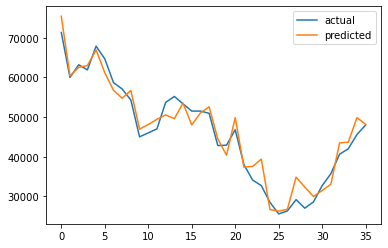

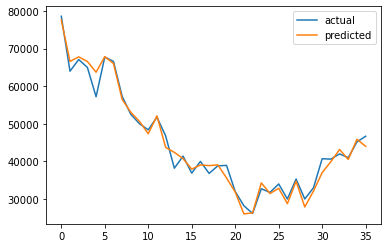

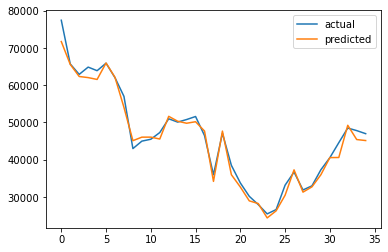

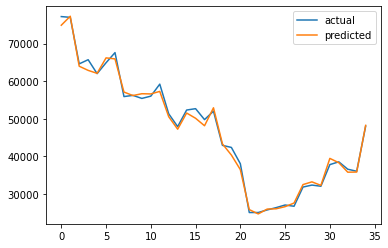

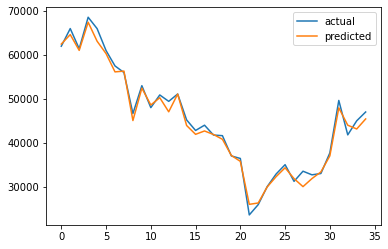

In [58]:
#Train and evaluate Cat A model with best parameters
model = create_model(preprocess.fit_transform(cat_a).shape[1])
perform_kfold_mlp(model=model, epoch=80, batch_size=2, n_splits=5, x=preprocess.fit_transform(cat_a), \
                  y=transformer.fit_transform(y_cat_a.to_numpy().reshape(-1, 1)), model_type='CAT A')

In [50]:
#CAT B Model
model = KerasRegressor(build_fn=create_model, verbose=1)

params = {
    'n_cols' : [preprocess.fit_transform(cat_b).shape[1]],
    'epochs' : [40, 60, 80],
    'batch_size' : [1, 2, 4]
}

#Due to heavy computation, we will not do grid search on network architecture (e.g. layers and neurons) =D
search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
search.fit(preprocess.fit_transform(cat_b), transformer.fit_transform(y_cat_b.to_numpy().reshape(-1, 1)))

Epoch 1/40

118/118 [==============================] - 7s 59ms/step - loss: 0.7379 - mae: 0.7379 - mse: 0.8006
Epoch 2/40

 13/118 [==>...........................] - ETA: 1s - loss: 0.6150 - mae: 0.6150 - mse: 0.6076Epoch 1/60

 83/118 [====================>.........] - ETA: 0s - loss: 0.7119 - mae: 0.7119 - mse: 0.7396Epoch 1/40

 95/118 [=======================>......] - ETA: 1s - loss: 0.7138 - mae: 0.7138 - mse: 0.7348Epoch 1/40

118/118 [==============================] - 2s 14ms/step - loss: 0.7152 - mae: 0.7152 - mse: 0.7207
Epoch 3/40

118/118 [==============================] - 9s 74ms/step - loss: 0.7198 - mae: 0.7198 - mse: 0.7355
Epoch 2/60

 91/119 [=====================>........] - ETA: 2s - loss: 0.9350 - mae: 0.9350 - mse: 1.1368


119/119 [==============================] - 9s 79ms/step - loss: 0.8217 - mae: 0.8217 - mse: 1.0296
Epoch 2/40

119/119 [==============================] - 10s 82ms/step - loss: 0.9165 - mae: 0.9165 - mse: 1.0827
Epoch 2/40

118/118 [==============================] - 1s 12ms/step - loss: 0.6888 - mae: 0.6888 - mse: 0.6144
Epoch 3/60

118/118 [==============================] - 2s 14ms/step - loss: 0.6968 - mae: 0.6968 - mse: 0.6557
Epoch 4/40

119/119 [==============================] - 2s 13ms/step - loss: 0.7084 - mae: 0.7084 - mse: 0.8528
Epoch 3/40

 84/118 [====================>.........] - ETA: 0s - loss: 0.6910 - mae: 0.6910 - mse: 0.6259


119/119 [==============================] - 1s 12ms/step - loss: 0.9066 - mae: 0.9066 - mse: 1.0579
Epoch 3/40

118/118 [==============================] - 1s 12ms/step - loss: 0.6795 - mae: 0.6795 - mse: 0.5962
Epoch 4/60

118/118 [==============================] - 1s 12ms/step - loss: 0.6899 - mae: 0.6899 - mse: 0.6324
Epoch 5/40

119/119 [==============================] - 2s 13ms/step - loss: 0.5141 - mae: 0.5141 - mse: 0.5368
Epoch 4/40

119/119 [==============================] - 1s 12ms/step - loss: 0.7644 - mae: 0.7644 - mse: 0.8058

 75/118 [==================>...........] - ETA: 0s - loss: 0.6901 - mae: 0.6901 - mse: 0.6101Epoch 4/40

118/118 [==============================] - 1s 12ms/step - loss: 0.6665 - mae: 0.6665 - mse: 0.6077
Epoch 5/60

118/118 [==============================] - 2s 13ms/step - loss: 0.6870 - mae: 0.6870 - mse: 0.6118
Epoch 6/40

116/119 [============================>.] - ETA: 0s - loss: 0.4619 - mae: 0.4619 - mse: 0.4705


119/119 [==============================] - 1s 13ms/step - loss: 0.4683 - mae: 0.4683 - mse: 0.4827
Epoch 5/40

119/119 [==============================] - 1s 12ms/step - loss: 0.5247 - mae: 0.5247 - mse: 0.4005

  8/119 [=>............................] - ETA: 1s - loss: 0.1431 - mae: 0.1431 - mse: 0.0318Epoch 5/40

118/118 [==============================] - 2s 13ms/step - loss: 0.7036 - mae: 0.7036 - mse: 0.6377
Epoch 6/60

118/118 [==============================] - 1s 12ms/step - loss: 0.6808 - mae: 0.6808 - mse: 0.5956
Epoch 7/40

 80/118 [===================>..........] - ETA: 0s - loss: 0.6910 - mae: 0.6910 - mse: 0.6120


119/119 [==============================] - 2s 15ms/step - loss: 0.4407 - mae: 0.4407 - mse: 0.4397

 93/118 [======================>.......] - ETA: 0s - loss: 0.7091 - mae: 0.7091 - mse: 0.6443Epoch 6/40

119/119 [==============================] - 2s 14ms/step - loss: 0.3997 - mae: 0.3997 - mse: 0.2438
Epoch 6/40

118/118 [==============================] - 2s 14ms/step - loss: 0.6902 - mae: 0.6902 - mse: 0.6167

 91/118 [======================>.......] - ETA: 0s - loss: 0.6097 - mae: 0.6097 - mse: 0.4979Epoch 7/60

118/118 [==============================] - 2s 16ms/step - loss: 0.6313 - mae: 0.6313 - mse: 0.5310
Epoch 8/40

119/119 [==============================] - 2s 14ms/step - loss: 0.4205 - mae: 0.4205 - mse: 0.4109

 88/118 [=====================>........] - ETA: 0s - loss: 0.6429 - mae: 0.6429 - mse: 0.5371Epoch 7/40

119/119 [==============================] - 2s 14ms/step - loss: 0.3938 - mae: 0.3938 - mse: 0.2394

  6/119 [>.............................] - ETA: 1s - loss: 0.67

119/119 [==============================] - 2s 15ms/step - loss: 0.3179 - mae: 0.3179 - mse: 0.1701

 62/118 [==============>...............] - ETA: 0s - loss: 0.3953 - mae: 0.3953 - mse: 0.2426Epoch 8/40

119/119 [==============================] - 2s 16ms/step - loss: 0.4075 - mae: 0.4075 - mse: 0.3798

 10/119 [=>............................] - ETA: 1s - loss: 0.3752 - mae: 0.3752 - mse: 0.3240Epoch 8/40

118/118 [==============================] - 2s 15ms/step - loss: 0.5905 - mae: 0.5905 - mse: 0.4822

 18/119 [===>..........................] - ETA: 1s - loss: 0.3279 - mae: 0.3279 - mse: 0.2253Epoch 9/60

118/118 [==============================] - 2s 14ms/step - loss: 0.4318 - mae: 0.4318 - mse: 0.2948
Epoch 10/40

119/119 [==============================] - 2s 15ms/step - loss: 0.3222 - mae: 0.3222 - mse: 0.1710

 93/118 [======================>.......] - ETA: 0s - loss: 0.4743 - mae: 0.4743 - mse: 0.3315Epoch 9/40

119/119 [==============================] - 2s 14ms/step - loss: 0.39

119/119 [==============================] - 2s 16ms/step - loss: 0.3008 - mae: 0.3008 - mse: 0.1515
Epoch 10/40

119/119 [==============================] - 2s 17ms/step - loss: 0.3787 - mae: 0.3787 - mse: 0.3493

 78/118 [==================>...........] - ETA: 0s - loss: 0.3028 - mae: 0.3028 - mse: 0.1353Epoch 10/40

118/118 [==============================] - 2s 14ms/step - loss: 0.4435 - mae: 0.4435 - mse: 0.2880

 82/118 [===================>..........] - ETA: 0s - loss: 0.3070 - mae: 0.3070 - mse: 0.1367Epoch 11/60

118/118 [==============================] - 2s 14ms/step - loss: 0.3035 - mae: 0.3035 - mse: 0.1408

 35/119 [=======>......................] - ETA: 1s - loss: 0.3955 - mae: 0.3955 - mse: 0.3452Epoch 12/40

119/119 [==============================] - 1s 12ms/step - loss: 0.2810 - mae: 0.2810 - mse: 0.1227
Epoch 11/40

119/119 [==============================] - 2s 13ms/step - loss: 0.3614 - mae: 0.3614 - mse: 0.3159

118/118 [==============================] - 1s 12ms/step - 

119/119 [==============================] - 2s 14ms/step - loss: 0.2745 - mae: 0.2745 - mse: 0.1160

 87/119 [====================>.........] - ETA: 0s - loss: 0.3415 - mae: 0.3415 - mse: 0.2852Epoch 12/40

118/118 [==============================] - 2s 14ms/step - loss: 0.3179 - mae: 0.3179 - mse: 0.1524
Epoch 13/60

119/119 [==============================] - 2s 15ms/step - loss: 0.3509 - mae: 0.3509 - mse: 0.2954
Epoch 12/40

118/118 [==============================] - 2s 16ms/step - loss: 0.2766 - mae: 0.2766 - mse: 0.1147
Epoch 14/40

119/119 [==============================] - 2s 14ms/step - loss: 0.2637 - mae: 0.2637 - mse: 0.1140
Epoch 13/40

 20/119 [====>.........................] - ETA: 2s - loss: 0.3447 - mae: 0.3447 - mse: 0.1766


118/118 [==============================] - 2s 18ms/step - loss: 0.2792 - mae: 0.2792 - mse: 0.1309

 42/119 [=========>....................] - ETA: 1s - loss: 0.2947 - mae: 0.2947 - mse: 0.1319Epoch 14/60

119/119 [==============================] - 2s 17ms/step - loss: 0.3197 - mae: 0.3197 - mse: 0.2497

103/118 [=========================>....] - ETA: 0s - loss: 0.2454 - mae: 0.2454 - mse: 0.0954Epoch 13/40

118/118 [==============================] - 2s 18ms/step - loss: 0.2521 - mae: 0.2521 - mse: 0.0996

 29/118 [======>.......................] - ETA: 1s - loss: 0.2186 - mae: 0.2186 - mse: 0.0812Epoch 15/40

119/119 [==============================] - 2s 16ms/step - loss: 0.2656 - mae: 0.2656 - mse: 0.1075
Epoch 14/40

118/118 [==============================] - 2s 16ms/step - loss: 0.2334 - mae: 0.2334 - mse: 0.0919

 96/119 [=======================>......] - ETA: 0s - loss: 0.3056 - mae: 0.3056 - mse: 0.2220Epoch 15/60

 53/119 [============>.................] - ETA: 1s - loss: 0.205

119/119 [==============================] - 2s 17ms/step - loss: 0.3026 - mae: 0.3026 - mse: 0.2165
Epoch 14/40

118/118 [==============================] - 2s 17ms/step - loss: 0.2337 - mae: 0.2337 - mse: 0.0870
Epoch 16/40

119/119 [==============================] - 2s 15ms/step - loss: 0.2515 - mae: 0.2515 - mse: 0.1014

 54/119 [============>.................] - ETA: 1s - loss: 0.3385 - mae: 0.3385 - mse: 0.2470Epoch 15/40

118/118 [==============================] - 2s 15ms/step - loss: 0.2285 - mae: 0.2285 - mse: 0.0834
Epoch 16/60

119/119 [==============================] - 2s 15ms/step - loss: 0.2970 - mae: 0.2970 - mse: 0.1927
Epoch 15/40

118/118 [==============================] - 2s 16ms/step - loss: 0.2113 - mae: 0.2113 - mse: 0.0745
Epoch 17/40

119/119 [==============================] - 2s 14ms/step - loss: 0.2443 - mae: 0.2443 - mse: 0.0927
Epoch 16/40

117/118 [============================>.] - ETA: 0s - loss: 0.2057 - mae: 0.2057 - mse: 0.0698


118/118 [==============================] - 2s 14ms/step - loss: 0.2054 - mae: 0.2054 - mse: 0.0695
Epoch 17/60

119/119 [==============================] - 2s 13ms/step - loss: 0.2672 - mae: 0.2672 - mse: 0.1543

 94/118 [======================>.......] - ETA: 0s - loss: 0.2273 - mae: 0.2273 - mse: 0.0792Epoch 16/40

118/118 [==============================] - 1s 13ms/step - loss: 0.2212 - mae: 0.2212 - mse: 0.0756

 93/119 [======================>.......] - ETA: 0s - loss: 0.2268 - mae: 0.2268 - mse: 0.0727Epoch 18/40

119/119 [==============================] - 1s 13ms/step - loss: 0.2345 - mae: 0.2345 - mse: 0.0811

 45/119 [==========>...................] - ETA: 1s - loss: 0.2506 - mae: 0.2506 - mse: 0.1351Epoch 17/40

118/118 [==============================] - 1s 12ms/step - loss: 0.1926 - mae: 0.1926 - mse: 0.0621
Epoch 18/60

119/119 [==============================] - 2s 13ms/step - loss: 0.2590 - mae: 0.2590 - mse: 0.1355
Epoch 17/40

118/118 [==============================] - 1s 

118/118 [==============================] - 1s 12ms/step - loss: 0.2071 - mae: 0.2071 - mse: 0.0714
Epoch 19/60

119/119 [==============================] - 2s 16ms/step - loss: 0.2394 - mae: 0.2394 - mse: 0.1129

 48/118 [===========>..................] - ETA: 1s - loss: 0.1951 - mae: 0.1951 - mse: 0.0622Epoch 18/40

118/118 [==============================] - 2s 16ms/step - loss: 0.1919 - mae: 0.1919 - mse: 0.0603
Epoch 20/40

119/119 [==============================] - 2s 16ms/step - loss: 0.2203 - mae: 0.2203 - mse: 0.0699

 80/118 [===================>..........] - ETA: 0s - loss: 0.1880 - mae: 0.1880 - mse: 0.0582Epoch 19/40

118/118 [==============================] - 2s 18ms/step - loss: 0.1911 - mae: 0.1911 - mse: 0.0572

 41/119 [=========>....................] - ETA: 1s - loss: 0.2407 - mae: 0.2407 - mse: 0.0860Epoch 20/60

119/119 [==============================] - 2s 17ms/step - loss: 0.2087 - mae: 0.2087 - mse: 0.0959
Epoch 19/40

118/118 [==============================] - 2s 

119/119 [==============================] - 2s 15ms/step - loss: 0.2095 - mae: 0.2095 - mse: 0.0808
Epoch 20/40

118/118 [==============================] - 2s 16ms/step - loss: 0.1904 - mae: 0.1904 - mse: 0.0564
Epoch 22/40

119/119 [==============================] - 2s 15ms/step - loss: 0.2346 - mae: 0.2346 - mse: 0.0805
Epoch 21/40

118/118 [==============================] - 2s 15ms/step - loss: 0.1923 - mae: 0.1923 - mse: 0.0645

 58/119 [=============>................] - ETA: 0s - loss: 0.2412 - mae: 0.2412 - mse: 0.1045Epoch 22/60

 10/118 [=>............................] - ETA: 1s - loss: 0.1026 - mae: 0.1026 - mse: 0.0214


119/119 [==============================] - 2s 16ms/step - loss: 0.2135 - mae: 0.2135 - mse: 0.0785

 97/119 [=======================>......] - ETA: 0s - loss: 0.2138 - mae: 0.2138 - mse: 0.0706Epoch 21/40

118/118 [==============================] - 2s 15ms/step - loss: 0.1828 - mae: 0.1828 - mse: 0.0538

 68/118 [================>.............] - ETA: 0s - loss: 0.1594 - mae: 0.1594 - mse: 0.0463Epoch 23/40

119/119 [==============================] - 2s 17ms/step - loss: 0.2238 - mae: 0.2238 - mse: 0.0778
Epoch 22/40

118/118 [==============================] - 2s 14ms/step - loss: 0.1644 - mae: 0.1644 - mse: 0.0488
Epoch 23/60

118/118 [==============================] - 2s 14ms/step - loss: 0.1982 - mae: 0.1982 - mse: 0.0631

 99/119 [=======================>......] - ETA: 0s - loss: 0.2352 - mae: 0.2352 - mse: 0.0863Epoch 24/40

119/119 [==============================] - 2s 15ms/step - loss: 0.2157 - mae: 0.2157 - mse: 0.0745

 83/118 [====================>.........] - ETA: 0s - loss:

118/118 [==============================] - 1s 12ms/step - loss: 0.1981 - mae: 0.1981 - mse: 0.0638

 80/118 [===================>..........] - ETA: 0s - loss: 0.1721 - mae: 0.1721 - mse: 0.0544Epoch 25/40

119/119 [==============================] - 1s 11ms/step - loss: 0.2365 - mae: 0.2365 - mse: 0.0820
Epoch 24/40

119/119 [==============================] - 2s 13ms/step - loss: 0.1888 - mae: 0.1888 - mse: 0.0609
Epoch 23/40

118/118 [==============================] - 1s 11ms/step - loss: 0.1733 - mae: 0.1733 - mse: 0.0560
Epoch 25/60

 81/119 [===================>..........] - ETA: 0s - loss: 0.2040 - mae: 0.2040 - mse: 0.0667


118/118 [==============================] - 2s 15ms/step - loss: 0.1667 - mae: 0.1667 - mse: 0.0464

107/119 [=========================>....] - ETA: 0s - loss: 0.1962 - mae: 0.1962 - mse: 0.0638Epoch 26/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1955 - mae: 0.1955 - mse: 0.0629
Epoch 25/40

119/119 [==============================] - 2s 15ms/step - loss: 0.2010 - mae: 0.2010 - mse: 0.0690

 22/118 [====>.........................] - ETA: 1s - loss: 0.1648 - mae: 0.1648 - mse: 0.0453Epoch 24/40

118/118 [==============================] - 2s 16ms/step - loss: 0.1839 - mae: 0.1839 - mse: 0.0597
Epoch 26/60

119/119 [==============================] - 2s 14ms/step - loss: 0.2043 - mae: 0.2043 - mse: 0.0630

118/118 [==============================] - 2s 15ms/step - loss: 0.1901 - mae: 0.1901 - mse: 0.0567
Epoch 27/40

 94/119 [======================>.......] - ETA: 0s - loss: 0.1678 - mae: 0.1678 - mse: 0.0486Epoch 26/40

119/119 [==============================] - 2s 

118/118 [==============================] - 2s 14ms/step - loss: 0.1587 - mae: 0.1587 - mse: 0.0476

 53/118 [============>.................] - ETA: 1s - loss: 0.1855 - mae: 0.1855 - mse: 0.0577Epoch 28/40

119/119 [==============================] - 2s 15ms/step - loss: 0.1852 - mae: 0.1852 - mse: 0.0528
Epoch 27/40

119/119 [==============================] - 2s 15ms/step - loss: 0.1785 - mae: 0.1785 - mse: 0.0589
Epoch 26/40

118/118 [==============================] - 2s 17ms/step - loss: 0.1740 - mae: 0.1740 - mse: 0.0484
Epoch 28/60

 32/118 [=======>......................] - ETA: 1s - loss: 0.1845 - mae: 0.1845 - mse: 0.0607


119/119 [==============================] - 2s 15ms/step - loss: 0.1788 - mae: 0.1788 - mse: 0.0567
Epoch 28/40

118/118 [==============================] - 2s 16ms/step - loss: 0.1620 - mae: 0.1620 - mse: 0.0417

 58/118 [=============>................] - ETA: 0s - loss: 0.1676 - mae: 0.1676 - mse: 0.0519Epoch 29/40

119/119 [==============================] - 2s 15ms/step - loss: 0.1880 - mae: 0.1880 - mse: 0.0577
Epoch 27/40

118/118 [==============================] - 2s 16ms/step - loss: 0.1606 - mae: 0.1606 - mse: 0.0442

 61/119 [==============>...............] - ETA: 0s - loss: 0.1793 - mae: 0.1793 - mse: 0.0565Epoch 29/60

119/119 [==============================] - 2s 16ms/step - loss: 0.1845 - mae: 0.1845 - mse: 0.0554

107/118 [==========================>...] - ETA: 0s - loss: 0.1542 - mae: 0.1542 - mse: 0.0400Epoch 29/40

118/118 [==============================] - 2s 17ms/step - loss: 0.1493 - mae: 0.1493 - mse: 0.0379
Epoch 30/40

119/119 [==============================] - 2s 

118/118 [==============================] - 2s 15ms/step - loss: 0.1480 - mae: 0.1480 - mse: 0.0435

 59/119 [=============>................] - ETA: 0s - loss: 0.1858 - mae: 0.1858 - mse: 0.0545Epoch 30/60

119/119 [==============================] - 1s 12ms/step - loss: 0.1962 - mae: 0.1962 - mse: 0.0593

102/118 [========================>.....] - ETA: 0s - loss: 0.1724 - mae: 0.1724 - mse: 0.0488Epoch 30/40

118/118 [==============================] - 1s 12ms/step - loss: 0.1714 - mae: 0.1714 - mse: 0.0484

  7/119 [>.............................] - ETA: 1s - loss: 0.2195 - mae: 0.2195 - mse: 0.0824Epoch 31/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1468 - mae: 0.1468 - mse: 0.0396
Epoch 29/40

118/118 [==============================] - 1s 11ms/step - loss: 0.1537 - mae: 0.1537 - mse: 0.0430
Epoch 31/60

119/119 [==============================] - 2s 15ms/step - loss: 0.1700 - mae: 0.1700 - mse: 0.0492

118/118 [==============================] - 2s 15ms/step - 

119/119 [==============================] - 2s 16ms/step - loss: 0.1346 - mae: 0.1346 - mse: 0.0295

 44/118 [==========>...................] - ETA: 0s - loss: 0.1466 - mae: 0.1466 - mse: 0.0351Epoch 30/40

118/118 [==============================] - 2s 15ms/step - loss: 0.1464 - mae: 0.1464 - mse: 0.0389
Epoch 32/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1807 - mae: 0.1807 - mse: 0.0580

118/118 [==============================] - 2s 15ms/step - loss: 0.1554 - mae: 0.1554 - mse: 0.0399

 82/118 [===================>..........] - ETA: 0s - loss: 0.1559 - mae: 0.1559 - mse: 0.0395Epoch 33/40

 13/118 [==>...........................] - ETA: 0s - loss: 0.0953 - mae: 0.0953 - mse: 0.0152Epoch 32/40

118/118 [==============================] - 2s 14ms/step - loss: 0.1507 - mae: 0.1507 - mse: 0.0386

 27/119 [=====>........................] - ETA: 1s - loss: 0.2429 - mae: 0.2429 - mse: 0.0806Epoch 33/60

119/119 [==============================] - 2s 14ms/step - loss: 

118/118 [==============================] - 2s 14ms/step - loss: 0.1450 - mae: 0.1450 - mse: 0.0345

107/119 [=========================>....] - ETA: 0s - loss: 0.1738 - mae: 0.1738 - mse: 0.0508Epoch 34/40

119/119 [==============================] - 2s 17ms/step - loss: 0.1751 - mae: 0.1751 - mse: 0.0511

 93/118 [======================>.......] - ETA: 0s - loss: 0.1399 - mae: 0.1399 - mse: 0.0342Epoch 33/40

119/119 [==============================] - 2s 15ms/step - loss: 0.1151 - mae: 0.1151 - mse: 0.0221

 23/119 [====>.........................] - ETA: 1s - loss: 0.1334 - mae: 0.1334 - mse: 0.0261Epoch 32/40

118/118 [==============================] - 2s 16ms/step - loss: 0.1515 - mae: 0.1515 - mse: 0.0406
Epoch 34/60

 80/118 [===================>..........] - ETA: 0s - loss: 0.1576 - mae: 0.1576 - mse: 0.0418


118/118 [==============================] - 2s 16ms/step - loss: 0.1552 - mae: 0.1552 - mse: 0.0398

 82/119 [===================>..........] - ETA: 0s - loss: 0.1549 - mae: 0.1549 - mse: 0.0429Epoch 35/40

119/119 [==============================] - 2s 15ms/step - loss: 0.1580 - mae: 0.1580 - mse: 0.0380
Epoch 34/40

119/119 [==============================] - 2s 16ms/step - loss: 0.1513 - mae: 0.1513 - mse: 0.0398
Epoch 33/40

118/118 [==============================] - 2s 16ms/step - loss: 0.1484 - mae: 0.1484 - mse: 0.0375

 31/118 [======>.......................] - ETA: 1s - loss: 0.1339 - mae: 0.1339 - mse: 0.0286Epoch 35/60

118/118 [==============================] - 2s 16ms/step - loss: 0.1649 - mae: 0.1649 - mse: 0.0439
Epoch 36/40

119/119 [==============================] - 2s 17ms/step - loss: 0.1694 - mae: 0.1694 - mse: 0.0476
Epoch 35/40

118/118 [==============================] - 2s 14ms/step - loss: 0.1540 - mae: 0.1540 - mse: 0.0431

119/119 [==============================]

119/119 [==============================] - 1s 11ms/step - loss: 0.1803 - mae: 0.1803 - mse: 0.0481

 95/119 [======================>.......] - ETA: 0s - loss: 0.1024 - mae: 0.1024 - mse: 0.0168Epoch 36/40

118/118 [==============================] - 2s 14ms/step - loss: 0.1469 - mae: 0.1469 - mse: 0.0364
Epoch 37/40

118/118 [==============================] - 1s 11ms/step - loss: 0.1338 - mae: 0.1338 - mse: 0.0323

 17/118 [===>..........................] - ETA: 0s - loss: 0.1427 - mae: 0.1427 - mse: 0.0424Epoch 37/60

119/119 [==============================] - 1s 13ms/step - loss: 0.1202 - mae: 0.1202 - mse: 0.0250
Epoch 35/40

118/118 [==============================] - 2s 16ms/step - loss: 0.1530 - mae: 0.1530 - mse: 0.0379

119/119 [==============================] - 2s 16ms/step - loss: 0.1778 - mae: 0.1778 - mse: 0.0511

117/119 [============================>.] - ETA: 0s - loss: 0.1392 - mae: 0.1392 - mse: 0.0304Epoch 37/40

  1/119 [..............................] - ETA: 1s - loss:

118/118 [==============================] - 2s 15ms/step - loss: 0.1461 - mae: 0.1461 - mse: 0.0380

118/118 [==============================] - 2s 16ms/step - loss: 0.1467 - mae: 0.1467 - mse: 0.0372
Epoch 39/60

112/119 [===========================>..] - ETA: 0s - loss: 0.1325 - mae: 0.1325 - mse: 0.0306Epoch 39/40

119/119 [==============================] - 2s 16ms/step - loss: 0.1321 - mae: 0.1321 - mse: 0.0306

116/119 [============================>.] - ETA: 0s - loss: 0.1609 - mae: 0.1609 - mse: 0.0449Epoch 37/40

119/119 [==============================] - 2s 17ms/step - loss: 0.1601 - mae: 0.1601 - mse: 0.0443
Epoch 38/40

118/118 [==============================] - 2s 15ms/step - loss: 0.1282 - mae: 0.1282 - mse: 0.0319

114/119 [===========================>..] - ETA: 0s - loss: 0.1615 - mae: 0.1615 - mse: 0.0418Epoch 40/60

118/118 [==============================] - 2s 16ms/step - loss: 0.1432 - mae: 0.1432 - mse: 0.0375
Epoch 40/40

119/119 [==============================] - 2s 

59/59 [==============================] - 1s 15ms/step

118/118 [==============================] - 1s 9ms/step - loss: 0.1385 - mae: 0.1385 - mse: 0.0342
Epoch 45/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1406 - mae: 0.1406 - mse: 0.0355
Epoch 46/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1409 - mae: 0.1409 - mse: 0.0340
Epoch 47/60

118/118 [==============================] - 1s 11ms/step - loss: 0.1429 - mae: 0.1429 - mse: 0.0356
Epoch 48/60

 68/118 [================>.............] - ETA: 0s - loss: 0.1422 - mae: 0.1422 - mse: 0.0361


118/118 [==============================] - 1s 8ms/step - loss: 0.1543 - mae: 0.1543 - mse: 0.0381
Epoch 49/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1320 - mae: 0.1320 - mse: 0.0345
Epoch 50/60

118/118 [==============================] - 1s 7ms/step - loss: 0.1309 - mae: 0.1309 - mse: 0.0288
Epoch 51/60

118/118 [==============================] - 1s 7ms/step - loss: 0.1330 - mae: 0.1330 - mse: 0.0314
Epoch 52/60

118/118 [==============================] - 1s 7ms/step - loss: 0.1430 - mae: 0.1430 - mse: 0.0359
Epoch 53/60

 88/118 [=====================>........] - ETA: 0s - loss: 0.1212 - mae: 0.1212 - mse: 0.0249


118/118 [==============================] - 1s 7ms/step - loss: 0.1173 - mae: 0.1173 - mse: 0.0249
Epoch 54/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1344 - mae: 0.1344 - mse: 0.0312
Epoch 55/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1373 - mae: 0.1373 - mse: 0.0303
Epoch 56/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1468 - mae: 0.1468 - mse: 0.0370
Epoch 57/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1142 - mae: 0.1142 - mse: 0.0225
Epoch 58/60

118/118 [==============================] - 1s 10ms/step - loss: 0.1331 - mae: 0.1331 - mse: 0.0311
Epoch 59/60

 27/118 [=====>........................] - ETA: 0s - loss: 0.1223 - mae: 0.1223 - mse: 0.0284


118/118 [==============================] - 1s 7ms/step - loss: 0.1173 - mae: 0.1173 - mse: 0.0262
Epoch 60/60

 17/118 [===>..........................] - ETA: 0s - loss: 0.1177 - mae: 0.1177 - mse: 0.0245Epoch 1/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1247 - mae: 0.1247 - mse: 0.0257

119/119 [==============================] - 11s 96ms/step - loss: 0.9164 - mae: 0.9164 - mse: 1.0862
Epoch 2/60

 47/119 [==========>...................] - ETA: 0s - loss: 0.9605 - mae: 0.9605 - mse: 1.1649Epoch 1/60

60/60 [==============================] - 1s 16ms/step

119/119 [==============================] - 1s 8ms/step - loss: 0.9157 - mae: 0.9157 - mse: 1.0813
Epoch 3/60

119/119 [==============================] - 12s 103ms/step - loss: 0.8517 - mae: 0.8517 - mse: 1.0719

 42/119 [=========>....................] - ETA: 0s - loss: 0.8539 - mae: 0.8539 - mse: 0.9620Epoch 2/60

 14/119 [==>...........................] - ETA: 0s - loss: 0.8388 - mae: 0.8388 - mse: 0.9934Epo

119/119 [==============================] - 1s 11ms/step - loss: 0.6651 - mae: 0.6651 - mse: 0.6322
Epoch 5/60

118/118 [==============================] - 1s 11ms/step - loss: 0.6896 - mae: 0.6896 - mse: 0.6364
Epoch 3/80

119/119 [==============================] - 1s 12ms/step - loss: 0.8287 - mae: 0.8287 - mse: 1.0347

 16/118 [===>..........................] - ETA: 0s - loss: 0.5764 - mae: 0.5764 - mse: 0.4154Epoch 4/60

119/119 [==============================] - 1s 11ms/step - loss: 0.5112 - mae: 0.5112 - mse: 0.4026

 63/119 [==============>...............] - ETA: 0s - loss: 0.7248 - mae: 0.7248 - mse: 0.8071Epoch 6/60

100/118 [========================>.....] - ETA: 0s - loss: 0.6391 - mae: 0.6391 - mse: 0.5477


118/118 [==============================] - 2s 14ms/step - loss: 0.6700 - mae: 0.6700 - mse: 0.6046

 42/119 [=========>....................] - ETA: 1s - loss: 0.4321 - mae: 0.4321 - mse: 0.3714Epoch 4/80

119/119 [==============================] - 2s 13ms/step - loss: 0.8173 - mae: 0.8173 - mse: 1.0185

  6/118 [>.............................] - ETA: 1s - loss: 0.8271 - mae: 0.8271 - mse: 0.8146Epoch 5/60

119/119 [==============================] - 2s 14ms/step - loss: 0.4731 - mae: 0.4731 - mse: 0.3763
Epoch 7/60

119/119 [==============================] - 1s 11ms/step - loss: 0.7806 - mae: 0.7806 - mse: 0.9410

118/118 [==============================] - 1s 13ms/step - loss: 0.6568 - mae: 0.6568 - mse: 0.5600

 47/119 [==========>...................] - ETA: 0s - loss: 0.3433 - mae: 0.3433 - mse: 0.1894Epoch 6/60

  1/119 [..............................] - ETA: 4s - loss: 0.4168 - mae: 0.4168 - mse: 0.1737Epoch 5/80

119/119 [==============================] - 1s 12ms/step - loss: 0.409

119/119 [==============================] - 2s 14ms/step - loss: 0.3633 - mae: 0.3633 - mse: 0.2450

 71/119 [================>.............] - ETA: 0s - loss: 0.5394 - mae: 0.5394 - mse: 0.4260Epoch 9/60

118/118 [==============================] - 2s 13ms/step - loss: 0.5092 - mae: 0.5092 - mse: 0.3585
Epoch 7/80

119/119 [==============================] - 2s 14ms/step - loss: 0.5186 - mae: 0.5186 - mse: 0.4051
Epoch 8/60

 76/118 [==================>...........] - ETA: 0s - loss: 0.4334 - mae: 0.4334 - mse: 0.2794


119/119 [==============================] - 2s 13ms/step - loss: 0.3446 - mae: 0.3446 - mse: 0.2005
Epoch 10/60

118/118 [==============================] - 1s 13ms/step - loss: 0.4159 - mae: 0.4159 - mse: 0.2585
Epoch 8/80

119/119 [==============================] - 1s 11ms/step - loss: 0.4484 - mae: 0.4484 - mse: 0.2881

 46/119 [==========>...................] - ETA: 0s - loss: 0.3253 - mae: 0.3253 - mse: 0.1756Epoch 9/60

119/119 [==============================] - 1s 12ms/step - loss: 0.3082 - mae: 0.3082 - mse: 0.1535
Epoch 11/60

118/118 [==============================] - 1s 11ms/step - loss: 0.3211 - mae: 0.3211 - mse: 0.1637
Epoch 9/80

119/119 [==============================] - 1s 11ms/step - loss: 0.3431 - mae: 0.3431 - mse: 0.1944
Epoch 10/60

119/119 [==============================] - 1s 10ms/step - loss: 0.2771 - mae: 0.2771 - mse: 0.1317
Epoch 12/60

118/118 [==============================] - 1s 10ms/step - loss: 0.3398 - mae: 0.3398 - mse: 0.1719
Epoch 10/80

119/119 [====

119/119 [==============================] - 1s 10ms/step - loss: 0.2638 - mae: 0.2638 - mse: 0.1205

 71/119 [================>.............] - ETA: 0s - loss: 0.2839 - mae: 0.2839 - mse: 0.1346Epoch 13/60

118/118 [==============================] - 1s 11ms/step - loss: 0.2803 - mae: 0.2803 - mse: 0.1253

 42/119 [=========>....................] - ETA: 0s - loss: 0.2210 - mae: 0.2210 - mse: 0.0738Epoch 11/80

119/119 [==============================] - 1s 11ms/step - loss: 0.2901 - mae: 0.2901 - mse: 0.1371

 45/119 [==========>...................] - ETA: 0s - loss: 0.2254 - mae: 0.2254 - mse: 0.0794Epoch 12/60

119/119 [==============================] - 2s 13ms/step - loss: 0.2445 - mae: 0.2445 - mse: 0.0992
Epoch 14/60

 86/118 [====================>.........] - ETA: 0s - loss: 0.2528 - mae: 0.2528 - mse: 0.1061


118/118 [==============================] - 2s 14ms/step - loss: 0.2570 - mae: 0.2570 - mse: 0.1076
Epoch 12/80

119/119 [==============================] - 2s 13ms/step - loss: 0.2685 - mae: 0.2685 - mse: 0.1103
Epoch 13/60

119/119 [==============================] - 2s 14ms/step - loss: 0.2484 - mae: 0.2484 - mse: 0.0947

 88/118 [=====================>........] - ETA: 0s - loss: 0.2329 - mae: 0.2329 - mse: 0.0830Epoch 15/60

118/118 [==============================] - 2s 14ms/step - loss: 0.2443 - mae: 0.2443 - mse: 0.0895
Epoch 13/80

119/119 [==============================] - 2s 13ms/step - loss: 0.2254 - mae: 0.2254 - mse: 0.0864

  9/118 [=>............................] - ETA: 0s - loss: 0.1702 - mae: 0.1702 - mse: 0.0551Epoch 14/60

 40/119 [=========>....................] - ETA: 1s - loss: 0.2446 - mae: 0.2446 - mse: 0.1081


119/119 [==============================] - 2s 14ms/step - loss: 0.2255 - mae: 0.2255 - mse: 0.0861
Epoch 16/60

118/118 [==============================] - 1s 12ms/step - loss: 0.2221 - mae: 0.2221 - mse: 0.0808

 18/119 [===>..........................] - ETA: 1s - loss: 0.2346 - mae: 0.2346 - mse: 0.0813Epoch 14/80

119/119 [==============================] - 2s 13ms/step - loss: 0.2284 - mae: 0.2284 - mse: 0.0831
Epoch 15/60

119/119 [==============================] - 2s 13ms/step - loss: 0.2241 - mae: 0.2241 - mse: 0.0769
Epoch 17/60

118/118 [==============================] - 1s 12ms/step - loss: 0.2214 - mae: 0.2214 - mse: 0.0743

 14/119 [==>...........................] - ETA: 1s - loss: 0.1643 - mae: 0.1643 - mse: 0.0362Epoch 15/80

119/119 [==============================] - 1s 11ms/step - loss: 0.2098 - mae: 0.2098 - mse: 0.0722
Epoch 16/60

 91/119 [=====================>........] - ETA: 0s - loss: 0.1976 - mae: 0.1976 - mse: 0.0748


119/119 [==============================] - 2s 13ms/step - loss: 0.2248 - mae: 0.2248 - mse: 0.0865

103/119 [========================>.....] - ETA: 0s - loss: 0.2091 - mae: 0.2091 - mse: 0.0785Epoch 18/60

119/119 [==============================] - 1s 12ms/step - loss: 0.1999 - mae: 0.1999 - mse: 0.0728

114/118 [===========================>..] - ETA: 0s - loss: 0.2053 - mae: 0.2053 - mse: 0.0696Epoch 17/60

118/118 [==============================] - 2s 14ms/step - loss: 0.2107 - mae: 0.2107 - mse: 0.0725
Epoch 16/80

119/119 [==============================] - 1s 10ms/step - loss: 0.2269 - mae: 0.2269 - mse: 0.0815
Epoch 18/60

119/119 [==============================] - 1s 12ms/step - loss: 0.2168 - mae: 0.2168 - mse: 0.0751

  6/119 [>.............................] - ETA: 1s - loss: 0.2306 - mae: 0.2306 - mse: 0.0675Epoch 19/60

118/118 [==============================] - 1s 11ms/step - loss: 0.2071 - mae: 0.2071 - mse: 0.0736
Epoch 17/80

119/119 [==============================] - 1s 

119/119 [==============================] - 2s 13ms/step - loss: 0.1661 - mae: 0.1661 - mse: 0.0482

109/119 [==========================>...] - ETA: 0s - loss: 0.1936 - mae: 0.1936 - mse: 0.0592Epoch 20/60

119/119 [==============================] - 2s 13ms/step - loss: 0.1948 - mae: 0.1948 - mse: 0.0600
Epoch 21/60

118/118 [==============================] - 2s 13ms/step - loss: 0.1963 - mae: 0.1963 - mse: 0.0604
Epoch 19/80

119/119 [==============================] - 2s 13ms/step - loss: 0.1891 - mae: 0.1891 - mse: 0.0606
Epoch 21/60

119/119 [==============================] - 2s 13ms/step - loss: 0.2042 - mae: 0.2042 - mse: 0.0707
Epoch 22/60

118/118 [==============================] - 2s 13ms/step - loss: 0.1883 - mae: 0.1883 - mse: 0.0536
Epoch 20/80

 45/118 [==========>...................] - ETA: 0s - loss: 0.1863 - mae: 0.1863 - mse: 0.0552


119/119 [==============================] - 1s 12ms/step - loss: 0.1929 - mae: 0.1929 - mse: 0.0566

119/119 [==============================] - 2s 13ms/step - loss: 0.1603 - mae: 0.1603 - mse: 0.0463
Epoch 22/60

  1/119 [..............................] - ETA: 0s - loss: 0.1224 - mae: 0.1224 - mse: 0.0150Epoch 23/60

118/118 [==============================] - 1s 12ms/step - loss: 0.1842 - mae: 0.1842 - mse: 0.0533
Epoch 21/80

119/119 [==============================] - 1s 12ms/step - loss: 0.1815 - mae: 0.1815 - mse: 0.0575
Epoch 24/60

119/119 [==============================] - 1s 13ms/step - loss: 0.1683 - mae: 0.1683 - mse: 0.0494
Epoch 23/60

118/118 [==============================] - 1s 13ms/step - loss: 0.1785 - mae: 0.1785 - mse: 0.0492
Epoch 22/80

119/119 [==============================] - 2s 13ms/step - loss: 0.1818 - mae: 0.1818 - mse: 0.0549
Epoch 25/60

118/118 [==============================] - 1s 12ms/step - loss: 0.1930 - mae: 0.1930 - mse: 0.0593

117/119 [=============

119/119 [==============================] - 1s 11ms/step - loss: 0.1756 - mae: 0.1756 - mse: 0.0499

119/119 [==============================] - 1s 11ms/step - loss: 0.1631 - mae: 0.1631 - mse: 0.0510
Epoch 27/60

  1/119 [..............................] - ETA: 0s - loss: 0.1392 - mae: 0.1392 - mse: 0.0194Epoch 28/60

118/118 [==============================] - 1s 12ms/step - loss: 0.1805 - mae: 0.1805 - mse: 0.0519

  9/119 [=>............................] - ETA: 2s - loss: 0.1390 - mae: 0.1390 - mse: 0.0237Epoch 26/80

119/119 [==============================] - 1s 12ms/step - loss: 0.1451 - mae: 0.1451 - mse: 0.0384

102/118 [========================>.....] - ETA: 0s - loss: 0.1754 - mae: 0.1754 - mse: 0.0474Epoch 28/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1701 - mae: 0.1701 - mse: 0.0460
Epoch 29/60

118/118 [==============================] - 2s 13ms/step - loss: 0.1788 - mae: 0.1788 - mse: 0.0490
Epoch 27/80

 21/119 [====>.........................] - ETA

 37/119 [========>.....................] - ETA: 1s - loss: 0.1470 - mae: 0.1470 - mse: 0.0366Epoch 1/80

119/119 [==============================] - 2s 14ms/step - loss: 0.1316 - mae: 0.1316 - mse: 0.0313

 89/119 [=====================>........] - ETA: 8s - loss: 0.9345 - mae: 0.9345 - mse: 1.1279 Epoch 29/60

118/118 [==============================] - 2s 14ms/step - loss: 0.1715 - mae: 0.1715 - mse: 0.0446
Epoch 28/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1665 - mae: 0.1665 - mse: 0.0448
Epoch 30/60

  7/118 [>.............................] - ETA: 3s - loss: 0.1096 - mae: 0.1096 - mse: 0.0164


119/119 [==============================] - 27s 226ms/step - loss: 0.9166 - mae: 0.9166 - mse: 1.0848
Epoch 2/80

119/119 [==============================] - 2s 16ms/step - loss: 0.1344 - mae: 0.1344 - mse: 0.0311
Epoch 30/60

118/118 [==============================] - 2s 17ms/step - loss: 0.1682 - mae: 0.1682 - mse: 0.0478

 21/119 [====>.........................] - ETA: 1s - loss: 0.1017 - mae: 0.1017 - mse: 0.0150Epoch 29/80

119/119 [==============================] - 2s 17ms/step - loss: 0.1890 - mae: 0.1890 - mse: 0.0559
Epoch 31/60

119/119 [==============================] - 2s 15ms/step - loss: 0.9123 - mae: 0.9123 - mse: 1.0647
Epoch 3/80

 45/119 [==========>...................] - ETA: 1s - loss: 0.1060 - mae: 0.1060 - mse: 0.0173


119/119 [==============================] - 2s 16ms/step - loss: 0.1378 - mae: 0.1378 - mse: 0.0318
Epoch 31/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1591 - mae: 0.1591 - mse: 0.0395
Epoch 32/60

118/118 [==============================] - 2s 15ms/step - loss: 0.1600 - mae: 0.1600 - mse: 0.0399
Epoch 30/80

119/119 [==============================] - 2s 15ms/step - loss: 0.9096 - mae: 0.9096 - mse: 1.0535
Epoch 4/80

119/119 [==============================] - 1s 12ms/step - loss: 0.1270 - mae: 0.1270 - mse: 0.0273
Epoch 32/60

119/119 [==============================] - 1s 12ms/step - loss: 0.1416 - mae: 0.1416 - mse: 0.0359

 10/119 [=>............................] - ETA: 1s - loss: 0.1236 - mae: 0.1236 - mse: 0.0201Epoch 33/60

118/118 [==============================] - 1s 12ms/step - loss: 0.1629 - mae: 0.1629 - mse: 0.0431
Epoch 31/80

119/119 [==============================] - 1s 12ms/step - loss: 0.9060 - mae: 0.9060 - mse: 1.0449

 33/119 [=======>......

119/119 [==============================] - 1s 12ms/step - loss: 0.1238 - mae: 0.1238 - mse: 0.0254
Epoch 33/60

119/119 [==============================] - 1s 12ms/step - loss: 0.1575 - mae: 0.1575 - mse: 0.0394
Epoch 34/60

118/118 [==============================] - 2s 13ms/step - loss: 0.1522 - mae: 0.1522 - mse: 0.0413
Epoch 32/80

119/119 [==============================] - 2s 14ms/step - loss: 0.7956 - mae: 0.7956 - mse: 0.8560
Epoch 6/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1328 - mae: 0.1328 - mse: 0.0284
Epoch 34/60

119/119 [==============================] - 2s 18ms/step - loss: 0.1438 - mae: 0.1438 - mse: 0.0343
Epoch 35/60

118/118 [==============================] - 2s 17ms/step - loss: 0.1584 - mae: 0.1584 - mse: 0.0377
Epoch 33/80

119/119 [==============================] - 2s 16ms/step - loss: 0.6543 - mae: 0.6543 - mse: 0.6370
Epoch 7/80

 47/119 [==========>...................] - ETA: 1s - loss: 0.1378 - mae: 0.1378 - mse: 0.0351


119/119 [==============================] - 2s 17ms/step - loss: 0.1264 - mae: 0.1264 - mse: 0.0287
Epoch 35/60

119/119 [==============================] - 2s 16ms/step - loss: 0.1515 - mae: 0.1515 - mse: 0.0407
Epoch 36/60

118/118 [==============================] - 2s 17ms/step - loss: 0.1567 - mae: 0.1567 - mse: 0.0382
Epoch 34/80

119/119 [==============================] - 2s 17ms/step - loss: 0.5185 - mae: 0.5185 - mse: 0.4481
Epoch 8/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1285 - mae: 0.1285 - mse: 0.0288
Epoch 36/60

119/119 [==============================] - 2s 16ms/step - loss: 0.1483 - mae: 0.1483 - mse: 0.0369

 27/119 [=====>........................] - ETA: 1s - loss: 0.1404 - mae: 0.1404 - mse: 0.0330Epoch 37/60

118/118 [==============================] - 2s 16ms/step - loss: 0.1699 - mae: 0.1699 - mse: 0.0443
Epoch 35/80

119/119 [==============================] - 2s 15ms/step - loss: 0.4563 - mae: 0.4563 - mse: 0.3437
Epoch 9/80

 25/118 [===

119/119 [==============================] - 2s 14ms/step - loss: 0.1386 - mae: 0.1386 - mse: 0.0313

 83/119 [===================>..........] - ETA: 0s - loss: 0.1431 - mae: 0.1431 - mse: 0.0347Epoch 37/60

119/119 [==============================] - 2s 16ms/step - loss: 0.1385 - mae: 0.1385 - mse: 0.0318

106/119 [=========================>....] - ETA: 0s - loss: 0.4627 - mae: 0.4627 - mse: 0.3349Epoch 38/60

118/118 [==============================] - 2s 16ms/step - loss: 0.1581 - mae: 0.1581 - mse: 0.0398
Epoch 36/80

119/119 [==============================] - 2s 16ms/step - loss: 0.4644 - mae: 0.4644 - mse: 0.3432

 52/119 [============>.................] - ETA: 1s - loss: 0.0896 - mae: 0.0896 - mse: 0.0152Epoch 10/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1190 - mae: 0.1190 - mse: 0.0244
Epoch 38/60

119/119 [==============================] - 1s 12ms/step - loss: 0.1847 - mae: 0.1847 - mse: 0.0539
Epoch 39/60

118/118 [==============================] - 1s 

119/119 [==============================] - 2s 16ms/step - loss: 0.3897 - mae: 0.3897 - mse: 0.2144
Epoch 12/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1250 - mae: 0.1250 - mse: 0.0276
Epoch 40/60

119/119 [==============================] - 2s 17ms/step - loss: 0.1416 - mae: 0.1416 - mse: 0.0303

112/118 [===========================>..] - ETA: 0s - loss: 0.1623 - mae: 0.1623 - mse: 0.0412Epoch 41/60

  4/119 [>.............................] - ETA: 1s - loss: 0.1208 - mae: 0.1208 - mse: 0.0192


118/118 [==============================] - 2s 17ms/step - loss: 0.1597 - mae: 0.1597 - mse: 0.0401

 26/119 [=====>........................] - ETA: 1s - loss: 0.0942 - mae: 0.0942 - mse: 0.0134Epoch 39/80

119/119 [==============================] - 2s 16ms/step - loss: 0.3152 - mae: 0.3152 - mse: 0.1627
Epoch 13/80

119/119 [==============================] - 2s 16ms/step - loss: 0.1081 - mae: 0.1081 - mse: 0.0218
Epoch 41/60

 12/119 [==>...........................] - ETA: 1s - loss: 0.1443 - mae: 0.1443 - mse: 0.0363


119/119 [==============================] - 2s 16ms/step - loss: 0.1362 - mae: 0.1362 - mse: 0.0317
Epoch 42/60

118/118 [==============================] - 2s 17ms/step - loss: 0.1596 - mae: 0.1596 - mse: 0.0423

119/119 [==============================] - 2s 17ms/step - loss: 0.3195 - mae: 0.3195 - mse: 0.1561
Epoch 40/80

  1/118 [..............................] - ETA: 1s - loss: 0.1061 - mae: 0.1061 - mse: 0.0112Epoch 14/80

119/119 [==============================] - 2s 17ms/step - loss: 0.1208 - mae: 0.1208 - mse: 0.0237

103/119 [========================>.....] - ETA: 0s - loss: 0.1444 - mae: 0.1444 - mse: 0.0350Epoch 42/60

119/119 [==============================] - 2s 16ms/step - loss: 0.1461 - mae: 0.1461 - mse: 0.0353
Epoch 43/60

108/118 [==========================>...] - ETA: 0s - loss: 0.1650 - mae: 0.1650 - mse: 0.0447


118/118 [==============================] - 2s 15ms/step - loss: 0.1673 - mae: 0.1673 - mse: 0.0452

106/119 [=========================>....] - ETA: 0s - loss: 0.2860 - mae: 0.2860 - mse: 0.1261Epoch 41/80

119/119 [==============================] - 2s 17ms/step - loss: 0.2919 - mae: 0.2919 - mse: 0.1300

  8/118 [=>............................] - ETA: 3s - loss: 0.1030 - mae: 0.1030 - mse: 0.0149Epoch 15/80

119/119 [==============================] - 2s 14ms/step - loss: 0.1235 - mae: 0.1235 - mse: 0.0263

 73/119 [=================>............] - ETA: 0s - loss: 0.2776 - mae: 0.2776 - mse: 0.1193Epoch 43/60

119/119 [==============================] - 2s 15ms/step - loss: 0.1321 - mae: 0.1321 - mse: 0.0285
Epoch 44/60

118/118 [==============================] - 2s 15ms/step - loss: 0.1400 - mae: 0.1400 - mse: 0.0343
Epoch 42/80

119/119 [==============================] - 2s 14ms/step - loss: 0.2626 - mae: 0.2626 - mse: 0.1065
Epoch 16/80

119/119 [==============================] - 2s 

118/118 [==============================] - 1s 13ms/step - loss: 0.1699 - mae: 0.1699 - mse: 0.0451

118/119 [============================>.] - ETA: 0s - loss: 0.1457 - mae: 0.1457 - mse: 0.0331Epoch 43/80

119/119 [==============================] - 2s 14ms/step - loss: 0.1474 - mae: 0.1474 - mse: 0.0339

 43/119 [=========>....................] - ETA: 0s - loss: 0.0965 - mae: 0.0965 - mse: 0.0187Epoch 45/60

119/119 [==============================] - 1s 12ms/step - loss: 0.2444 - mae: 0.2444 - mse: 0.0954

  5/118 [>.............................] - ETA: 1s - loss: 0.1260 - mae: 0.1260 - mse: 0.0207Epoch 17/80

119/119 [==============================] - 2s 14ms/step - loss: 0.1158 - mae: 0.1158 - mse: 0.0220
Epoch 45/60

118/118 [==============================] - 2s 15ms/step - loss: 0.1469 - mae: 0.1469 - mse: 0.0371
Epoch 44/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1480 - mae: 0.1480 - mse: 0.0356
Epoch 46/60

119/119 [==============================] - 2s 

118/118 [==============================] - 2s 16ms/step - loss: 0.1567 - mae: 0.1567 - mse: 0.0422

110/119 [==========================>...] - ETA: 0s - loss: 0.1390 - mae: 0.1390 - mse: 0.0322Epoch 45/80

119/119 [==============================] - 2s 16ms/step - loss: 0.1380 - mae: 0.1380 - mse: 0.0318
Epoch 47/60

119/119 [==============================] - 2s 16ms/step - loss: 0.2294 - mae: 0.2294 - mse: 0.0834

 15/118 [==>...........................] - ETA: 2s - loss: 0.1797 - mae: 0.1797 - mse: 0.0488Epoch 19/80

119/119 [==============================] - 2s 16ms/step - loss: 0.1078 - mae: 0.1078 - mse: 0.0196
Epoch 47/60

118/118 [==============================] - 2s 15ms/step - loss: 0.1699 - mae: 0.1699 - mse: 0.0439
Epoch 46/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1355 - mae: 0.1355 - mse: 0.0300
Epoch 48/60

119/119 [==============================] - 2s 16ms/step - loss: 0.2349 - mae: 0.2349 - mse: 0.0857
Epoch 20/80

 60/118 [==============>....

119/119 [==============================] - 2s 14ms/step - loss: 0.1095 - mae: 0.1095 - mse: 0.0218
Epoch 48/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1334 - mae: 0.1334 - mse: 0.0297

111/119 [==========================>...] - ETA: 0s - loss: 0.2421 - mae: 0.2421 - mse: 0.0906Epoch 49/60

118/118 [==============================] - 2s 16ms/step - loss: 0.1517 - mae: 0.1517 - mse: 0.0378
Epoch 47/80

119/119 [==============================] - 2s 13ms/step - loss: 0.2441 - mae: 0.2441 - mse: 0.0922

 44/119 [==========>...................] - ETA: 1s - loss: 0.0710 - mae: 0.0710 - mse: 0.0088Epoch 21/80

 61/119 [==============>...............] - ETA: 0s - loss: 0.2419 - mae: 0.2419 - mse: 0.0839


119/119 [==============================] - 2s 15ms/step - loss: 0.1091 - mae: 0.1091 - mse: 0.0214
Epoch 49/60

119/119 [==============================] - 2s 15ms/step - loss: 0.2292 - mae: 0.2292 - mse: 0.0795

114/118 [===========================>..] - ETA: 0s - loss: 0.1602 - mae: 0.1602 - mse: 0.0410Epoch 22/80

118/118 [==============================] - 2s 15ms/step - loss: 0.1595 - mae: 0.1595 - mse: 0.0403

116/119 [============================>.] - ETA: 0s - loss: 0.1425 - mae: 0.1425 - mse: 0.0330Epoch 48/80

119/119 [==============================] - 2s 17ms/step - loss: 0.1416 - mae: 0.1416 - mse: 0.0326

 15/118 [==>...........................] - ETA: 1s - loss: 0.1501 - mae: 0.1501 - mse: 0.0363Epoch 50/60

 51/119 [===========>..................] - ETA: 1s - loss: 0.1384 - mae: 0.1384 - mse: 0.0326


119/119 [==============================] - 2s 14ms/step - loss: 0.1278 - mae: 0.1278 - mse: 0.0261

 81/119 [===================>..........] - ETA: 0s - loss: 0.2329 - mae: 0.2329 - mse: 0.0805Epoch 50/60

119/119 [==============================] - 2s 14ms/step - loss: 0.2257 - mae: 0.2257 - mse: 0.0777
Epoch 23/80

118/118 [==============================] - 2s 14ms/step - loss: 0.1519 - mae: 0.1519 - mse: 0.0394
Epoch 49/80

119/119 [==============================] - 2s 13ms/step - loss: 0.1451 - mae: 0.1451 - mse: 0.0346

  4/119 [>.............................] - ETA: 4s - loss: 0.2266 - mae: 0.2266 - mse: 0.0755Epoch 51/60

110/119 [==========================>...] - ETA: 0s - loss: 0.1205 - mae: 0.1205 - mse: 0.0243


119/119 [==============================] - 2s 15ms/step - loss: 0.1183 - mae: 0.1183 - mse: 0.0234
Epoch 51/60

118/118 [==============================] - 2s 15ms/step - loss: 0.1612 - mae: 0.1612 - mse: 0.0402

119/119 [==============================] - 2s 16ms/step - loss: 0.2036 - mae: 0.2036 - mse: 0.0675

117/119 [============================>.] - ETA: 0s - loss: 0.1327 - mae: 0.1327 - mse: 0.0296Epoch 24/80

  1/119 [..............................] - ETA: 1s - loss: 0.0729 - mae: 0.0729 - mse: 0.0053Epoch 50/80

119/119 [==============================] - 2s 16ms/step - loss: 0.1319 - mae: 0.1319 - mse: 0.0292
Epoch 52/60

119/119 [==============================] - 2s 16ms/step - loss: 0.1068 - mae: 0.1068 - mse: 0.0206
Epoch 52/60

118/118 [==============================] - 2s 16ms/step - loss: 0.1489 - mae: 0.1489 - mse: 0.0400

 18/119 [===>..........................] - ETA: 2s - loss: 0.0713 - mae: 0.0713 - mse: 0.0083Epoch 51/80

119/119 [==============================] - 2s 

119/119 [==============================] - 2s 16ms/step - loss: 0.1436 - mae: 0.1436 - mse: 0.0321
Epoch 53/60

119/119 [==============================] - 2s 17ms/step - loss: 0.1051 - mae: 0.1051 - mse: 0.0198

 83/119 [===================>..........] - ETA: 0s - loss: 0.1135 - mae: 0.1135 - mse: 0.0231Epoch 53/60

 15/119 [==>...........................] - ETA: 1s - loss: 0.0873 - mae: 0.0873 - mse: 0.0127


118/118 [==============================] - 2s 16ms/step - loss: 0.1548 - mae: 0.1548 - mse: 0.0363
Epoch 52/80

119/119 [==============================] - 2s 16ms/step - loss: 0.2014 - mae: 0.2014 - mse: 0.0627
Epoch 26/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1197 - mae: 0.1197 - mse: 0.0247
Epoch 54/60

119/119 [==============================] - 2s 16ms/step - loss: 0.1060 - mae: 0.1060 - mse: 0.0195
Epoch 54/60



118/118 [==============================] - 2s 17ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0400
Epoch 53/80

119/119 [==============================] - 2s 17ms/step - loss: 0.2080 - mae: 0.2080 - mse: 0.0667

115/119 [===========================>..] - ETA: 0s - loss: 0.1275 - mae: 0.1275 - mse: 0.0262Epoch 27/80

119/119 [==============================] - 2s 17ms/step - loss: 0.1265 - mae: 0.1265 - mse: 0.0258
Epoch 55/60

119/119 [==============================] - 2s 13ms/step - loss: 0.0984 - mae: 0.0984 - mse: 0.0157

 64/119 [===============>..............] - ETA: 0s - loss: 0.1242 - mae: 0.1242 - mse: 0.0248Epoch 55/60

118/118 [==============================] - 2s 15ms/step - loss: 0.1599 - mae: 0.1599 - mse: 0.0435
Epoch 54/80

119/119 [==============================] - 2s 15ms/step - loss: 0.2039 - mae: 0.2039 - mse: 0.0632

 51/119 [===========>..................] - ETA: 1s - loss: 0.1032 - mae: 0.1032 - mse: 0.0167Epoch 28/80

119/119 [==============================] - 2s 

119/119 [==============================] - 2s 13ms/step - loss: 0.1894 - mae: 0.1894 - mse: 0.0595
Epoch 29/80

119/119 [==============================] - 2s 14ms/step - loss: 0.1337 - mae: 0.1337 - mse: 0.0275
Epoch 57/60

119/119 [==============================] - 2s 17ms/step - loss: 0.1116 - mae: 0.1116 - mse: 0.0242

 81/118 [===================>..........] - ETA: 0s - loss: 0.1544 - mae: 0.1544 - mse: 0.0412Epoch 57/60

112/118 [===========================>..] - ETA: 0s - loss: 0.1413 - mae: 0.1413 - mse: 0.0344


118/118 [==============================] - 2s 17ms/step - loss: 0.1451 - mae: 0.1451 - mse: 0.0358

 33/119 [=======>......................] - ETA: 1s - loss: 0.1352 - mae: 0.1352 - mse: 0.0301Epoch 56/80

119/119 [==============================] - 2s 16ms/step - loss: 0.1522 - mae: 0.1522 - mse: 0.0382

117/119 [============================>.] - ETA: 0s - loss: 0.1727 - mae: 0.1727 - mse: 0.0528Epoch 58/60

119/119 [==============================] - 2s 19ms/step - loss: 0.1750 - mae: 0.1750 - mse: 0.0537
Epoch 30/80

119/119 [==============================] - 2s 17ms/step - loss: 0.1310 - mae: 0.1310 - mse: 0.0285
Epoch 58/60

118/118 [==============================] - 2s 16ms/step - loss: 0.1646 - mae: 0.1646 - mse: 0.0427
Epoch 57/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1250 - mae: 0.1250 - mse: 0.0254

 49/119 [===========>..................] - ETA: 0s - loss: 0.1202 - mae: 0.1202 - mse: 0.0222Epoch 59/60



119/119 [==============================] - 2s 17ms/step - loss: 0.1813 - mae: 0.1813 - mse: 0.0517

 21/119 [====>.........................] - ETA: 1s - loss: 0.1060 - mae: 0.1060 - mse: 0.0248Epoch 31/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1138 - mae: 0.1138 - mse: 0.0207

 91/118 [======================>.......] - ETA: 0s - loss: 0.1515 - mae: 0.1515 - mse: 0.0381Epoch 59/60

118/118 [==============================] - 2s 15ms/step - loss: 0.1488 - mae: 0.1488 - mse: 0.0371

 93/119 [======================>.......] - ETA: 0s - loss: 0.1750 - mae: 0.1750 - mse: 0.0499Epoch 58/80

119/119 [==============================] - 2s 15ms/step - loss: 0.1195 - mae: 0.1195 - mse: 0.0247
Epoch 60/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1784 - mae: 0.1784 - mse: 0.0508

 62/119 [==============>...............] - ETA: 0s - loss: 0.0979 - mae: 0.0979 - mse: 0.0158Epoch 32/80

119/119 [==============================] - 2s 14ms/step - loss: 

59/59 [==============================] - 1s 22ms/step

59/59 [==============================] - 1s 19ms/step

118/118 [==============================] - 1s 8ms/step - loss: 0.1489 - mae: 0.1489 - mse: 0.0381
Epoch 61/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1706 - mae: 0.1706 - mse: 0.0524
Epoch 35/80

118/118 [==============================] - 1s 9ms/step - loss: 0.1491 - mae: 0.1491 - mse: 0.0361
Epoch 62/80

119/119 [==============================] - 1s 9ms/step - loss: 0.1836 - mae: 0.1836 - mse: 0.0512
Epoch 36/80

118/118 [==============================] - 1s 11ms/step - loss: 0.1326 - mae: 0.1326 - mse: 0.0321

105/119 [=========================>....] - ETA: 0s - loss: 0.1618 - mae: 0.1618 - mse: 0.0434Epoch 63/80

119/119 [==============================] - 1s 12ms/step - loss: 0.1673 - mae: 0.1673 - mse: 0.0458
Epoch 37/80

118/118 [==============================] - 1s 12ms/step - loss: 0.1486 - mae: 0.1486 - mse: 0.0375

107/119 [===================

119/119 [==============================] - 1s 11ms/step - loss: 0.1736 - mae: 0.1736 - mse: 0.0502
Epoch 38/80

118/118 [==============================] - 1s 13ms/step - loss: 0.1428 - mae: 0.1428 - mse: 0.0342

109/119 [==========================>...] - ETA: 0s - loss: 0.1604 - mae: 0.1604 - mse: 0.0459Epoch 65/80

119/119 [==============================] - 2s 13ms/step - loss: 0.1622 - mae: 0.1622 - mse: 0.0459
Epoch 39/80

118/118 [==============================] - 1s 12ms/step - loss: 0.1493 - mae: 0.1493 - mse: 0.0378
Epoch 66/80

119/119 [==============================] - 1s 11ms/step - loss: 0.1794 - mae: 0.1794 - mse: 0.0580

  8/118 [=>............................] - ETA: 0s - loss: 0.1159 - mae: 0.1159 - mse: 0.0205Epoch 40/80

 10/119 [=>............................] - ETA: 1s - loss: 0.1041 - mae: 0.1041 - mse: 0.0149


118/118 [==============================] - 1s 9ms/step - loss: 0.1438 - mae: 0.1438 - mse: 0.0338

110/119 [==========================>...] - ETA: 0s - loss: 0.1577 - mae: 0.1577 - mse: 0.0432Epoch 67/80

119/119 [==============================] - 1s 9ms/step - loss: 0.1608 - mae: 0.1608 - mse: 0.0441
Epoch 41/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1529 - mae: 0.1529 - mse: 0.0403

110/119 [==========================>...] - ETA: 0s - loss: 0.1658 - mae: 0.1658 - mse: 0.0466Epoch 68/80

119/119 [==============================] - 1s 9ms/step - loss: 0.1679 - mae: 0.1679 - mse: 0.0473
Epoch 42/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1540 - mae: 0.1540 - mse: 0.0365
Epoch 69/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1641 - mae: 0.1641 - mse: 0.0447
Epoch 43/80

 15/119 [==>...........................] - ETA: 0s - loss: 0.1313 - mae: 0.1313 - mse: 0.0317


118/118 [==============================] - 1s 8ms/step - loss: 0.1718 - mae: 0.1718 - mse: 0.0463
Epoch 70/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1547 - mae: 0.1547 - mse: 0.0408
Epoch 44/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1377 - mae: 0.1377 - mse: 0.0309
Epoch 71/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1617 - mae: 0.1617 - mse: 0.0437
Epoch 45/80

118/118 [==============================] - 1s 11ms/step - loss: 0.1346 - mae: 0.1346 - mse: 0.0312
Epoch 72/80

119/119 [==============================] - 1s 11ms/step - loss: 0.1521 - mae: 0.1521 - mse: 0.0387
Epoch 46/80

118/118 [==============================] - 1s 12ms/step - loss: 0.1415 - mae: 0.1415 - mse: 0.0337

113/119 [===========================>..] - ETA: 0s - loss: 0.1675 - mae: 0.1675 - mse: 0.0452Epoch 73/80

119/119 [==============================] - 1s 11ms/step - loss: 0.1644 - mae: 0.1644 - mse: 0.0437
Epoch 47/80

118/118 [=====

118/118 [==============================] - 1s 10ms/step - loss: 0.1367 - mae: 0.1367 - mse: 0.0329
Epoch 75/80

119/119 [==============================] - 1s 10ms/step - loss: 0.1582 - mae: 0.1582 - mse: 0.0414
Epoch 49/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1402 - mae: 0.1402 - mse: 0.0318
Epoch 76/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1555 - mae: 0.1555 - mse: 0.0396
Epoch 50/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1434 - mae: 0.1434 - mse: 0.0325
Epoch 77/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1565 - mae: 0.1565 - mse: 0.0375
Epoch 51/80

102/119 [========================>.....] - ETA: 0s - loss: 0.1661 - mae: 0.1661 - mse: 0.0466


118/118 [==============================] - 1s 8ms/step - loss: 0.1365 - mae: 0.1365 - mse: 0.0307
Epoch 78/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1782 - mae: 0.1782 - mse: 0.0541
Epoch 52/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1394 - mae: 0.1394 - mse: 0.0337
Epoch 79/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1571 - mae: 0.1571 - mse: 0.0373
Epoch 53/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1465 - mae: 0.1465 - mse: 0.0368

104/119 [=========================>....] - ETA: 0s - loss: 0.1498 - mae: 0.1498 - mse: 0.0315Epoch 80/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1467 - mae: 0.1467 - mse: 0.0300
Epoch 54/80

118/118 [==============================] - 1s 11ms/step - loss: 0.1517 - mae: 0.1517 - mse: 0.0392

119/119 [==============================] - 1s 11ms/step - loss: 0.1523 - mae: 0.1523 - mse: 0.0377
Epoch 55/80

119/119 [===================

115/119 [===========================>..] - ETA: 0s - loss: 0.1436 - mae: 0.1436 - mse: 0.0329Epoch 1/40

119/119 [==============================] - 1s 11ms/step - loss: 0.1459 - mae: 0.1459 - mse: 0.0342

102/119 [========================>.....] - ETA: 3s - loss: 0.8464 - mae: 0.8464 - mse: 1.0542Epoch 58/80

119/119 [==============================] - 19s 157ms/step - loss: 0.8307 - mae: 0.8307 - mse: 1.0463

 52/118 [============>.................] - ETA: 23s - loss: 0.6739 - mae: 0.6739 - mse: 0.7140Epoch 2/80

118/118 [==============================] - 19s 158ms/step - loss: 0.7370 - mae: 0.7370 - mse: 0.7959

 44/119 [==========>...................] - ETA: 0s - loss: 0.1506 - mae: 0.1506 - mse: 0.0369Epoch 2/40

118/118 [==============================] - 1s 6ms/step - loss: 0.7026 - mae: 0.7026 - mse: 0.6521
Epoch 3/40

119/119 [==============================] - 1s 11ms/step - loss: 0.1518 - mae: 0.1518 - mse: 0.0381
Epoch 59/80

119/119 [==============================] - 1s 10ms/s

119/119 [==============================] - 1s 10ms/step - loss: 0.6226 - mae: 0.6226 - mse: 0.7119
Epoch 4/80

118/118 [==============================] - 1s 5ms/step - loss: 0.5738 - mae: 0.5738 - mse: 0.4524

 57/119 [=============>................] - ETA: 0s - loss: 0.1256 - mae: 0.1256 - mse: 0.0313Epoch 6/40

118/118 [==============================] - 1s 5ms/step - loss: 0.5361 - mae: 0.5361 - mse: 0.4061

117/119 [============================>.] - ETA: 0s - loss: 0.1432 - mae: 0.1432 - mse: 0.0363Epoch 7/40

119/119 [==============================] - 1s 10ms/step - loss: 0.1450 - mae: 0.1450 - mse: 0.0368
Epoch 61/80

119/119 [==============================] - 1s 10ms/step - loss: 0.4991 - mae: 0.4991 - mse: 0.5115
Epoch 5/80

 32/119 [=======>......................] - ETA: 0s - loss: 0.4172 - mae: 0.4172 - mse: 0.4232


118/118 [==============================] - 1s 5ms/step - loss: 0.4899 - mae: 0.4899 - mse: 0.3323
Epoch 8/40

119/119 [==============================] - 1s 10ms/step - loss: 0.1941 - mae: 0.1941 - mse: 0.0647
Epoch 62/80

118/118 [==============================] - 1s 5ms/step - loss: 0.4272 - mae: 0.4272 - mse: 0.2629
Epoch 9/40

119/119 [==============================] - 1s 10ms/step - loss: 0.4590 - mae: 0.4590 - mse: 0.4450
Epoch 6/80

118/118 [==============================] - 1s 5ms/step - loss: 0.3772 - mae: 0.3772 - mse: 0.2152
Epoch 10/40

119/119 [==============================] - 1s 10ms/step - loss: 0.1622 - mae: 0.1622 - mse: 0.0429
Epoch 63/80

118/118 [==============================] - 1s 6ms/step - loss: 0.3360 - mae: 0.3360 - mse: 0.1789
Epoch 11/40

119/119 [==============================] - 1s 11ms/step - loss: 0.4197 - mae: 0.4197 - mse: 0.3475

 25/119 [=====>........................] - ETA: 1s - loss: 0.1187 - mae: 0.1187 - mse: 0.0193Epoch 7/80

 48/118 [=========

118/118 [==============================] - 1s 6ms/step - loss: 0.2990 - mae: 0.2990 - mse: 0.1343
Epoch 12/40

119/119 [==============================] - 2s 13ms/step - loss: 0.1549 - mae: 0.1549 - mse: 0.0380
Epoch 64/80

118/118 [==============================] - 1s 6ms/step - loss: 0.2990 - mae: 0.2990 - mse: 0.1448
Epoch 13/40

119/119 [==============================] - 2s 13ms/step - loss: 0.3118 - mae: 0.3118 - mse: 0.1691
Epoch 8/80

118/118 [==============================] - 1s 7ms/step - loss: 0.2630 - mae: 0.2630 - mse: 0.1100
Epoch 14/40

118/118 [==============================] - 1s 7ms/step - loss: 0.2817 - mae: 0.2817 - mse: 0.1227
Epoch 15/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1438 - mae: 0.1438 - mse: 0.0349
Epoch 65/80

119/119 [==============================] - 2s 15ms/step - loss: 0.2512 - mae: 0.2512 - mse: 0.0999
Epoch 9/80

 18/119 [===>..........................] - ETA: 1s - loss: 0.2442 - mae: 0.2442 - mse: 0.0841


118/118 [==============================] - 1s 7ms/step - loss: 0.2595 - mae: 0.2595 - mse: 0.1048

 32/119 [=======>......................] - ETA: 0s - loss: 0.2524 - mae: 0.2524 - mse: 0.0967Epoch 16/40

118/118 [==============================] - 1s 7ms/step - loss: 0.2373 - mae: 0.2373 - mse: 0.0886
Epoch 17/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1529 - mae: 0.1529 - mse: 0.0354
Epoch 66/80

119/119 [==============================] - 2s 14ms/step - loss: 0.2445 - mae: 0.2445 - mse: 0.0914
Epoch 10/80

118/118 [==============================] - 1s 7ms/step - loss: 0.2442 - mae: 0.2442 - mse: 0.0901

 23/119 [====>.........................] - ETA: 1s - loss: 0.1954 - mae: 0.1954 - mse: 0.0638Epoch 18/40

118/118 [==============================] - 1s 7ms/step - loss: 0.2103 - mae: 0.2103 - mse: 0.0730

 77/119 [==================>...........] - ETA: 0s - loss: 0.2049 - mae: 0.2049 - mse: 0.0694Epoch 19/40

119/119 [==============================] - 2s 14ms

118/118 [==============================] - 1s 7ms/step - loss: 0.1854 - mae: 0.1854 - mse: 0.0617
Epoch 21/40

119/119 [==============================] - 2s 15ms/step - loss: 0.1388 - mae: 0.1388 - mse: 0.0314

 24/118 [=====>........................] - ETA: 0s - loss: 0.1812 - mae: 0.1812 - mse: 0.0576Epoch 68/80

119/119 [==============================] - 2s 14ms/step - loss: 0.2044 - mae: 0.2044 - mse: 0.0673

 96/118 [=======================>......] - ETA: 0s - loss: 0.1950 - mae: 0.1950 - mse: 0.0629Epoch 12/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1996 - mae: 0.1996 - mse: 0.0677

 62/119 [==============>...............] - ETA: 0s - loss: 0.1338 - mae: 0.1338 - mse: 0.0273Epoch 22/40

119/119 [==============================] - 1s 12ms/step - loss: 0.1509 - mae: 0.1509 - mse: 0.0360

118/118 [==============================] - 1s 7ms/step - loss: 0.1822 - mae: 0.1822 - mse: 0.0574

 86/119 [====================>.........] - ETA: 0s - loss: 0.2091 - mae: 

118/118 [==============================] - 1s 6ms/step - loss: 0.2125 - mae: 0.2125 - mse: 0.0754

 59/119 [=============>................] - ETA: 0s - loss: 0.1404 - mae: 0.1404 - mse: 0.0283Epoch 26/40

118/118 [==============================] - 1s 7ms/step - loss: 0.1942 - mae: 0.1942 - mse: 0.0648
Epoch 27/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1585 - mae: 0.1585 - mse: 0.0430
Epoch 71/80

119/119 [==============================] - 2s 13ms/step - loss: 0.2020 - mae: 0.2020 - mse: 0.0630
Epoch 15/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1698 - mae: 0.1698 - mse: 0.0523
Epoch 28/40

119/119 [==============================] - 1s 12ms/step - loss: 0.1313 - mae: 0.1313 - mse: 0.0300

 97/119 [=======================>......] - ETA: 0s - loss: 0.1810 - mae: 0.1810 - mse: 0.0533Epoch 72/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1775 - mae: 0.1775 - mse: 0.0538
Epoch 29/40

119/119 [=======================

60/60 [==============================] - 2s 34ms/step

119/119 [==============================] - 1s 12ms/step - loss: 0.1339 - mae: 0.1339 - mse: 0.0302
Epoch 80/80

119/119 [==============================] - 1s 11ms/step - loss: 0.1553 - mae: 0.1553 - mse: 0.0396
Epoch 24/80

119/119 [==============================] - 2s 13ms/step - loss: 0.1376 - mae: 0.1376 - mse: 0.0305

119/119 [==============================] - 2s 13ms/step - loss: 0.1641 - mae: 0.1641 - mse: 0.0449
Epoch 25/80

 76/119 [==================>...........] - ETA: 0s - loss: 0.1522 - mae: 0.1522 - mse: 0.0373


59/59 [==============================] - 1s 17ms/step

113/119 [===========================>..] - ETA: 0s - loss: 0.1533 - mae: 0.1533 - mse: 0.0397Epoch 1/40

119/119 [==============================] - 1s 8ms/step - loss: 0.1521 - mae: 0.1521 - mse: 0.0389
Epoch 26/80

119/119 [==============================] - 26s 217ms/step - loss: 0.9163 - mae: 0.9163 - mse: 1.0852
Epoch 2/40

119/119 [==============================] - 1s 4ms/step - loss: 0.9129 - mae: 0.9129 - mse: 1.0755

101/119 [========================>.....] - ETA: 0s - loss: 0.1337 - mae: 0.1337 - mse: 0.0321Epoch 3/40

119/119 [==============================] - 1s 9ms/step - loss: 0.1382 - mae: 0.1382 - mse: 0.0349
Epoch 27/80

119/119 [==============================] - 1s 4ms/step - loss: 0.9053 - mae: 0.9053 - mse: 1.0461
Epoch 4/40

119/119 [==============================] - 1s 5ms/step - loss: 0.8257 - mae: 0.8257 - mse: 0.9116

107/119 [=========================>....] - ETA: 0s - loss: 0.1420 - mae: 0.1420 - mse: 0.032

119/119 [==============================] - 1s 5ms/step - loss: 0.5027 - mae: 0.5027 - mse: 0.3763
Epoch 7/40

119/119 [==============================] - 1s 9ms/step - loss: 0.1434 - mae: 0.1434 - mse: 0.0331
Epoch 29/80

119/119 [==============================] - 1s 7ms/step - loss: 0.4505 - mae: 0.4505 - mse: 0.3257
Epoch 8/40

119/119 [==============================] - 1s 6ms/step - loss: 0.3389 - mae: 0.3389 - mse: 0.1991
Epoch 9/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1583 - mae: 0.1583 - mse: 0.0399
Epoch 30/80

 37/119 [========>.....................] - ETA: 1s - loss: 0.1434 - mae: 0.1434 - mse: 0.0351


119/119 [==============================] - 1s 7ms/step - loss: 0.2900 - mae: 0.2900 - mse: 0.1479
Epoch 10/40

119/119 [==============================] - 1s 7ms/step - loss: 0.2780 - mae: 0.2780 - mse: 0.1253
Epoch 11/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1465 - mae: 0.1465 - mse: 0.0362

  8/119 [=>............................] - ETA: 0s - loss: 0.1724 - mae: 0.1724 - mse: 0.0523Epoch 31/80

119/119 [==============================] - 1s 7ms/step - loss: 0.2417 - mae: 0.2417 - mse: 0.0995

 67/119 [===============>..............] - ETA: 0s - loss: 0.1248 - mae: 0.1248 - mse: 0.0280Epoch 12/40

119/119 [==============================] - 1s 11ms/step - loss: 0.1377 - mae: 0.1377 - mse: 0.0316
Epoch 32/80

119/119 [==============================] - 1s 7ms/step - loss: 0.2434 - mae: 0.2434 - mse: 0.0938


Epoch 13/40

119/119 [==============================] - 1s 6ms/step - loss: 0.2237 - mae: 0.2237 - mse: 0.0783
Epoch 14/40

119/119 [==============================] - 1s 13ms/step - loss: 0.1544 - mae: 0.1544 - mse: 0.0348
Epoch 33/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1964 - mae: 0.1964 - mse: 0.0647

 32/119 [=======>......................] - ETA: 0s - loss: 0.1516 - mae: 0.1516 - mse: 0.0348Epoch 15/40

119/119 [==============================] - 1s 7ms/step - loss: 0.2063 - mae: 0.2063 - mse: 0.0672
Epoch 16/40

119/119 [==============================] - 1s 12ms/step - loss: 0.1384 - mae: 0.1384 - mse: 0.0305
Epoch 34/80

  1/119 [..............................] - ETA: 0s - loss: 0.0997 - mae: 0.0997 - mse: 0.0099


119/119 [==============================] - 1s 5ms/step - loss: 0.1944 - mae: 0.1944 - mse: 0.0629
Epoch 17/40

119/119 [==============================] - 1s 4ms/step - loss: 0.1967 - mae: 0.1967 - mse: 0.0634
Epoch 18/40

119/119 [==============================] - 1s 9ms/step - loss: 0.1440 - mae: 0.1440 - mse: 0.0353
Epoch 35/80

119/119 [==============================] - 1s 5ms/step - loss: 0.2007 - mae: 0.2007 - mse: 0.0652

 35/119 [=======>......................] - ETA: 0s - loss: 0.1277 - mae: 0.1277 - mse: 0.0297Epoch 19/40

119/119 [==============================] - 1s 5ms/step - loss: 0.1998 - mae: 0.1998 - mse: 0.0600
Epoch 20/40

119/119 [==============================] - 1s 9ms/step - loss: 0.1324 - mae: 0.1324 - mse: 0.0288
Epoch 36/80

 14/119 [==>...........................] - ETA: 0s - loss: 0.1553 - mae: 0.1553 - mse: 0.0354


119/119 [==============================] - 1s 4ms/step - loss: 0.1932 - mae: 0.1932 - mse: 0.0571

 39/119 [========>.....................] - ETA: 0s - loss: 0.1303 - mae: 0.1303 - mse: 0.0253Epoch 21/40

119/119 [==============================] - 1s 5ms/step - loss: 0.1825 - mae: 0.1825 - mse: 0.0559

103/119 [========================>.....] - ETA: 0s - loss: 0.1356 - mae: 0.1356 - mse: 0.0290Epoch 22/40

119/119 [==============================] - 1s 9ms/step - loss: 0.1339 - mae: 0.1339 - mse: 0.0280
Epoch 37/80

119/119 [==============================] - 1s 6ms/step - loss: 0.1654 - mae: 0.1654 - mse: 0.0446

 41/119 [=========>....................] - ETA: 1s - loss: 0.1193 - mae: 0.1193 - mse: 0.0222Epoch 23/40

119/119 [==============================] - 1s 6ms/step - loss: 0.1746 - mae: 0.1746 - mse: 0.0499
Epoch 24/40

119/119 [==============================] - 1s 11ms/step - loss: 0.1278 - mae: 0.1278 - mse: 0.0269
Epoch 38/80

 34/119 [=======>......................] - ETA: 0s 

119/119 [==============================] - 1s 6ms/step - loss: 0.1626 - mae: 0.1626 - mse: 0.0464
Epoch 25/40

119/119 [==============================] - 1s 5ms/step - loss: 0.1785 - mae: 0.1785 - mse: 0.0514
Epoch 26/40

119/119 [==============================] - 1s 11ms/step - loss: 0.1319 - mae: 0.1319 - mse: 0.0294
Epoch 39/80

119/119 [==============================] - 1s 6ms/step - loss: 0.1629 - mae: 0.1629 - mse: 0.0454

 60/119 [==============>...............] - ETA: 0s - loss: 0.1309 - mae: 0.1309 - mse: 0.0291Epoch 27/40

119/119 [==============================] - 1s 6ms/step - loss: 0.1660 - mae: 0.1660 - mse: 0.0460

119/119 [==============================] - 1s 12ms/step - loss: 0.1322 - mae: 0.1322 - mse: 0.0305
Epoch 28/40

  2/119 [..............................] - ETA: 0s - loss: 0.1289 - mae: 0.1289 - mse: 0.0174Epoch 40/80

  1/119 [..............................] - ETA: 1s - loss: 0.1519 - mae: 0.1519 - mse: 0.0231


119/119 [==============================] - 1s 6ms/step - loss: 0.1687 - mae: 0.1687 - mse: 0.0508
Epoch 29/40

119/119 [==============================] - 1s 12ms/step - loss: 0.1309 - mae: 0.1309 - mse: 0.0264

112/119 [===========================>..] - ETA: 0s - loss: 0.1654 - mae: 0.1654 - mse: 0.0501Epoch 41/80

119/119 [==============================] - 1s 6ms/step - loss: 0.1710 - mae: 0.1710 - mse: 0.0525
Epoch 30/40

119/119 [==============================] - 1s 6ms/step - loss: 0.1503 - mae: 0.1503 - mse: 0.0359
Epoch 31/40

109/119 [==========================>...] - ETA: 0s - loss: 0.1364 - mae: 0.1364 - mse: 0.0315


119/119 [==============================] - 1s 12ms/step - loss: 0.1345 - mae: 0.1345 - mse: 0.0303
Epoch 42/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1493 - mae: 0.1493 - mse: 0.0371
Epoch 32/40

119/119 [==============================] - 1s 5ms/step - loss: 0.1620 - mae: 0.1620 - mse: 0.0430
Epoch 33/40

119/119 [==============================] - 1s 8ms/step - loss: 0.1328 - mae: 0.1328 - mse: 0.0305
Epoch 43/80

119/119 [==============================] - 1s 4ms/step - loss: 0.1411 - mae: 0.1411 - mse: 0.0322
Epoch 34/40

119/119 [==============================] - 1s 4ms/step - loss: 0.1447 - mae: 0.1447 - mse: 0.0334

 79/119 [==================>...........] - ETA: 0s - loss: 0.1408 - mae: 0.1408 - mse: 0.0332Epoch 35/40

119/119 [==============================] - 1s 9ms/step - loss: 0.1427 - mae: 0.1427 - mse: 0.0344
Epoch 44/80

 98/119 [=======================>......] - ETA: 0s - loss: 0.1398 - mae: 0.1398 - mse: 0.0346


119/119 [==============================] - 1s 5ms/step - loss: 0.1405 - mae: 0.1405 - mse: 0.0340
Epoch 36/40

119/119 [==============================] - 1s 4ms/step - loss: 0.1281 - mae: 0.1281 - mse: 0.0291
Epoch 37/40

119/119 [==============================] - 1s 8ms/step - loss: 0.1224 - mae: 0.1224 - mse: 0.0259
Epoch 45/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1326 - mae: 0.1326 - mse: 0.0303
Epoch 38/40

119/119 [==============================] - 1s 5ms/step - loss: 0.1598 - mae: 0.1598 - mse: 0.0397
Epoch 39/40

119/119 [==============================] - 1s 11ms/step - loss: 0.1249 - mae: 0.1249 - mse: 0.0246
Epoch 46/80

 96/119 [=======================>......] - ETA: 0s - loss: 0.1395 - mae: 0.1395 - mse: 0.0324


119/119 [==============================] - 1s 6ms/step - loss: 0.1407 - mae: 0.1407 - mse: 0.0335
Epoch 40/40

119/119 [==============================] - 1s 7ms/step - loss: 0.1674 - mae: 0.1674 - mse: 0.0447

119/119 [==============================] - 1s 12ms/step - loss: 0.1111 - mae: 0.1111 - mse: 0.0224
Epoch 47/80

117/119 [============================>.] - ETA: 0s - loss: 0.1397 - mae: 0.1397 - mse: 0.0318Epoch 1/40

119/119 [==============================] - 1s 11ms/step - loss: 0.1390 - mae: 0.1390 - mse: 0.0314

 18/119 [===>..........................] - ETA: 2:00 - loss: 0.7904 - mae: 0.7904 - mse: 0.9545 Epoch 48/80

59/59 [==============================] - 2s 32ms/step

119/119 [==============================] - 22s 185ms/step - loss: 0.8443 - mae: 0.8443 - mse: 1.0623
Epoch 2/40

 69/119 [================>.............] - ETA: 0s - loss: 0.1191 - mae: 0.1191 - mse: 0.0273


119/119 [==============================] - 1s 7ms/step - loss: 0.8177 - mae: 0.8177 - mse: 1.0206

115/119 [===========================>..] - ETA: 0s - loss: 0.1241 - mae: 0.1241 - mse: 0.0261Epoch 3/40

119/119 [==============================] - 2s 13ms/step - loss: 0.1251 - mae: 0.1251 - mse: 0.0263
Epoch 49/80

119/119 [==============================] - 1s 7ms/step - loss: 0.7952 - mae: 0.7952 - mse: 0.9934
Epoch 4/40

119/119 [==============================] - 1s 7ms/step - loss: 0.7164 - mae: 0.7164 - mse: 0.8410
Epoch 5/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1211 - mae: 0.1211 - mse: 0.0249
Epoch 50/80

119/119 [==============================] - 1s 5ms/step - loss: 0.6028 - mae: 0.6028 - mse: 0.6237
Epoch 6/40

 58/119 [=============>................] - ETA: 0s - loss: 0.1163 - mae: 0.1163 - mse: 0.0213


119/119 [==============================] - 1s 5ms/step - loss: 0.5339 - mae: 0.5339 - mse: 0.5374
Epoch 7/40

119/119 [==============================] - 1s 10ms/step - loss: 0.1157 - mae: 0.1157 - mse: 0.0231

 38/119 [========>.....................] - ETA: 0s - loss: 0.6152 - mae: 0.6152 - mse: 0.7399Epoch 51/80

119/119 [==============================] - 1s 5ms/step - loss: 0.4823 - mae: 0.4823 - mse: 0.4896

 47/119 [==========>...................] - ETA: 0s - loss: 0.1199 - mae: 0.1199 - mse: 0.0226Epoch 8/40

 68/119 [================>.............] - ETA: 0s - loss: 0.4718 - mae: 0.4718 - mse: 0.4596Epoch 1/60

119/119 [==============================] - 1s 6ms/step - loss: 0.4747 - mae: 0.4747 - mse: 0.4666
Epoch 9/40

119/119 [==============================] - 1s 11ms/step - loss: 0.1131 - mae: 0.1131 - mse: 0.0229
Epoch 52/80

118/118 [==============================] - 23s 191ms/step - loss: 0.7263 - mae: 0.7263 - mse: 0.7454
Epoch 2/60

119/119 [==============================]

119/119 [==============================] - 1s 8ms/step - loss: 0.4345 - mae: 0.4345 - mse: 0.4229
Epoch 12/40

118/118 [==============================] - 1s 8ms/step - loss: 0.6640 - mae: 0.6640 - mse: 0.5863

 14/119 [==>...........................] - ETA: 1s - loss: 0.4052 - mae: 0.4052 - mse: 0.4133Epoch 5/60

119/119 [==============================] - 1s 7ms/step - loss: 0.4434 - mae: 0.4434 - mse: 0.4241

102/119 [========================>.....] - ETA: 0s - loss: 0.1168 - mae: 0.1168 - mse: 0.0251Epoch 13/40

118/118 [==============================] - 1s 6ms/step - loss: 0.6381 - mae: 0.6381 - mse: 0.5456

  8/119 [=>............................] - ETA: 0s - loss: 0.6939 - mae: 0.6939 - mse: 0.7301Epoch 6/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1266 - mae: 0.1266 - mse: 0.0284

 26/119 [=====>........................] - ETA: 0s - loss: 0.3548 - mae: 0.3548 - mse: 0.3253Epoch 54/80

 24/119 [=====>........................] - ETA: 1s - loss: 0.1599 - ma

119/119 [==============================] - 1s 8ms/step - loss: 0.4051 - mae: 0.4051 - mse: 0.3917
Epoch 14/40

118/118 [==============================] - 1s 8ms/step - loss: 0.5640 - mae: 0.5640 - mse: 0.4482
Epoch 7/60

119/119 [==============================] - 1s 6ms/step - loss: 0.3892 - mae: 0.3892 - mse: 0.3825

118/118 [==============================] - 1s 6ms/step - loss: 0.5050 - mae: 0.5050 - mse: 0.3610
Epoch 8/60

 16/118 [===>..........................] - ETA: 0s - loss: 0.4621 - mae: 0.4621 - mse: 0.2931Epoch 15/40

119/119 [==============================] - 2s 15ms/step - loss: 0.1285 - mae: 0.1285 - mse: 0.0273
Epoch 55/80

118/118 [==============================] - 1s 6ms/step - loss: 0.4263 - mae: 0.4263 - mse: 0.2580

 42/119 [=========>....................] - ETA: 0s - loss: 0.1343 - mae: 0.1343 - mse: 0.0286Epoch 9/60

119/119 [==============================] - 1s 8ms/step - loss: 0.3795 - mae: 0.3795 - mse: 0.3653
Epoch 16/40

 54/119 [============>...............

119/119 [==============================] - 1s 7ms/step - loss: 0.3732 - mae: 0.3732 - mse: 0.3604

103/119 [========================>.....] - ETA: 0s - loss: 0.1388 - mae: 0.1388 - mse: 0.0301Epoch 17/40

118/118 [==============================] - 1s 8ms/step - loss: 0.3689 - mae: 0.3689 - mse: 0.2102
Epoch 10/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1325 - mae: 0.1325 - mse: 0.0276

 54/119 [============>.................] - ETA: 0s - loss: 0.3857 - mae: 0.3857 - mse: 0.3260Epoch 56/80

118/118 [==============================] - 1s 7ms/step - loss: 0.3106 - mae: 0.3106 - mse: 0.1574

112/119 [===========================>..] - ETA: 0s - loss: 0.3917 - mae: 0.3917 - mse: 0.3579Epoch 11/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3909 - mae: 0.3909 - mse: 0.3590
Epoch 18/40

 72/119 [=================>............] - ETA: 0s - loss: 0.1132 - mae: 0.1132 - mse: 0.0224


119/119 [==============================] - 1s 8ms/step - loss: 0.3684 - mae: 0.3684 - mse: 0.3506

118/118 [==============================] - 1s 8ms/step - loss: 0.2939 - mae: 0.2939 - mse: 0.1375

101/119 [========================>.....] - ETA: 0s - loss: 0.1207 - mae: 0.1207 - mse: 0.0252Epoch 12/60

  2/118 [..............................] - ETA: 0s - loss: 0.3687 - mae: 0.3687 - mse: 0.1499Epoch 19/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1244 - mae: 0.1244 - mse: 0.0261
Epoch 57/80

119/119 [==============================] - 1s 7ms/step - loss: 0.3770 - mae: 0.3770 - mse: 0.3414

118/118 [==============================] - 1s 7ms/step - loss: 0.3123 - mae: 0.3123 - mse: 0.1539
Epoch 20/40

  2/119 [..............................] - ETA: 0s - loss: 0.0964 - mae: 0.0964 - mse: 0.0131Epoch 13/60

118/118 [==============================] - 1s 7ms/step - loss: 0.2773 - mae: 0.2773 - mse: 0.1290

116/119 [============================>.] - ETA: 0s - loss: 0.35

119/119 [==============================] - 1s 7ms/step - loss: 0.3492 - mae: 0.3492 - mse: 0.3103
Epoch 23/40

119/119 [==============================] - 2s 15ms/step - loss: 0.1351 - mae: 0.1351 - mse: 0.0291
Epoch 59/80

118/118 [==============================] - 1s 7ms/step - loss: 0.2216 - mae: 0.2216 - mse: 0.0941

 23/119 [====>.........................] - ETA: 1s - loss: 0.1110 - mae: 0.1110 - mse: 0.0233Epoch 17/60

119/119 [==============================] - 1s 8ms/step - loss: 0.3475 - mae: 0.3475 - mse: 0.3057
Epoch 24/40

118/118 [==============================] - 1s 7ms/step - loss: 0.2327 - mae: 0.2327 - mse: 0.0940
Epoch 18/60

119/119 [==============================] - 1s 6ms/step - loss: 0.3287 - mae: 0.3287 - mse: 0.2943

 32/118 [=======>......................] - ETA: 0s - loss: 0.2169 - mae: 0.2169 - mse: 0.0742Epoch 25/40

 14/119 [==>...........................] - ETA: 1s - loss: 0.3587 - mae: 0.3587 - mse: 0.3559


119/119 [==============================] - 2s 13ms/step - loss: 0.1106 - mae: 0.1106 - mse: 0.0215
Epoch 60/80

118/118 [==============================] - 1s 6ms/step - loss: 0.2284 - mae: 0.2284 - mse: 0.0869
Epoch 19/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3228 - mae: 0.3228 - mse: 0.2863
Epoch 26/40

118/118 [==============================] - 1s 8ms/step - loss: 0.2417 - mae: 0.2417 - mse: 0.0894

 77/119 [==================>...........] - ETA: 0s - loss: 0.0935 - mae: 0.0935 - mse: 0.0151Epoch 20/60

119/119 [==============================] - 1s 8ms/step - loss: 0.3263 - mae: 0.3263 - mse: 0.2878
Epoch 27/40

119/119 [==============================] - 2s 16ms/step - loss: 0.1145 - mae: 0.1145 - mse: 0.0233

 96/118 [=======================>......] - ETA: 0s - loss: 0.1999 - mae: 0.1999 - mse: 0.0679Epoch 61/80

  1/119 [..............................] - ETA: 0s - loss: 0.0177 - mae: 0.0177 - mse: 3.1229e-04


118/118 [==============================] - 1s 8ms/step - loss: 0.2163 - mae: 0.2163 - mse: 0.0783
Epoch 21/60

119/119 [==============================] - 1s 8ms/step - loss: 0.3260 - mae: 0.3260 - mse: 0.2815

 44/118 [==========>...................] - ETA: 0s - loss: 0.2158 - mae: 0.2158 - mse: 0.0802Epoch 28/40

118/118 [==============================] - 1s 7ms/step - loss: 0.2034 - mae: 0.2034 - mse: 0.0695

 78/119 [==================>...........] - ETA: 0s - loss: 0.1092 - mae: 0.1092 - mse: 0.0210Epoch 22/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3350 - mae: 0.3350 - mse: 0.2814

 48/118 [===========>..................] - ETA: 0s - loss: 0.1860 - mae: 0.1860 - mse: 0.0687Epoch 29/40

119/119 [==============================] - 2s 13ms/step - loss: 0.1166 - mae: 0.1166 - mse: 0.0229
Epoch 62/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1971 - mae: 0.1971 - mse: 0.0699

 80/119 [===================>..........] - ETA: 0s - loss: 0.30

119/119 [==============================] - 1s 8ms/step - loss: 0.3142 - mae: 0.3142 - mse: 0.2681
Epoch 30/40

118/118 [==============================] - 1s 7ms/step - loss: 0.1842 - mae: 0.1842 - mse: 0.0648

 62/119 [==============>...............] - ETA: 0s - loss: 0.2697 - mae: 0.2697 - mse: 0.2071Epoch 24/60

119/119 [==============================] - 1s 8ms/step - loss: 0.3155 - mae: 0.3155 - mse: 0.2623

101/119 [========================>.....] - ETA: 0s - loss: 0.1166 - mae: 0.1166 - mse: 0.0231Epoch 31/40

119/119 [==============================] - 2s 16ms/step - loss: 0.1147 - mae: 0.1147 - mse: 0.0216
Epoch 63/80

118/118 [==============================] - 1s 7ms/step - loss: 0.2016 - mae: 0.2016 - mse: 0.0688

 14/119 [==>...........................] - ETA: 0s - loss: 0.0883 - mae: 0.0883 - mse: 0.0135Epoch 25/60

 86/119 [====================>.........] - ETA: 0s - loss: 0.2866 - mae: 0.2866 - mse: 0.2316


119/119 [==============================] - 1s 7ms/step - loss: 0.3085 - mae: 0.3085 - mse: 0.2651
Epoch 32/40

118/118 [==============================] - 1s 8ms/step - loss: 0.2035 - mae: 0.2035 - mse: 0.0705
Epoch 26/60

119/119 [==============================] - 1s 6ms/step - loss: 0.3066 - mae: 0.3066 - mse: 0.2526
Epoch 33/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1001 - mae: 0.1001 - mse: 0.0178
Epoch 64/80

118/118 [==============================] - 1s 7ms/step - loss: 0.2285 - mae: 0.2285 - mse: 0.0800
Epoch 27/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3289 - mae: 0.3289 - mse: 0.2639
Epoch 34/40

118/118 [==============================] - 1s 7ms/step - loss: 0.2011 - mae: 0.2011 - mse: 0.0685
Epoch 28/60

119/119 [==============================] - 1s 6ms/step - loss: 0.3026 - mae: 0.3026 - mse: 0.2467
Epoch 35/40

119/119 [==============================] - 1s 12ms/step - loss: 0.1216 - mae: 0.1216 - mse: 0.0269

 88/118 [==

118/118 [==============================] - 1s 6ms/step - loss: 0.1620 - mae: 0.1620 - mse: 0.0463
Epoch 30/60

119/119 [==============================] - 1s 8ms/step - loss: 0.2902 - mae: 0.2902 - mse: 0.2315
Epoch 37/40

119/119 [==============================] - 2s 14ms/step - loss: 0.1137 - mae: 0.1137 - mse: 0.0233

106/118 [=========================>....] - ETA: 0s - loss: 0.1841 - mae: 0.1841 - mse: 0.0589Epoch 66/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1820 - mae: 0.1820 - mse: 0.0566

 40/119 [=========>....................] - ETA: 0s - loss: 0.3723 - mae: 0.3723 - mse: 0.3646Epoch 31/60

119/119 [==============================] - 1s 7ms/step - loss: 0.2786 - mae: 0.2786 - mse: 0.2245
Epoch 38/40

118/118 [==============================] - 1s 7ms/step - loss: 0.1645 - mae: 0.1645 - mse: 0.0487

 60/119 [==============>...............] - ETA: 0s - loss: 0.1126 - mae: 0.1126 - mse: 0.0197Epoch 32/60

 79/119 [==================>...........] - ETA: 0s 

119/119 [==============================] - 1s 8ms/step - loss: 0.3119 - mae: 0.3119 - mse: 0.2336
Epoch 39/40

118/118 [==============================] - 1s 6ms/step - loss: 0.1674 - mae: 0.1674 - mse: 0.0477

 34/119 [=======>......................] - ETA: 0s - loss: 0.2722 - mae: 0.2722 - mse: 0.2092Epoch 33/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1074 - mae: 0.1074 - mse: 0.0201
Epoch 67/80

119/119 [==============================] - 1s 6ms/step - loss: 0.2844 - mae: 0.2844 - mse: 0.2200

 90/118 [=====================>........] - ETA: 0s - loss: 0.1639 - mae: 0.1639 - mse: 0.0465Epoch 40/40

118/118 [==============================] - 1s 7ms/step - loss: 0.1611 - mae: 0.1611 - mse: 0.0457

 24/119 [=====>........................] - ETA: 0s - loss: 0.4047 - mae: 0.4047 - mse: 0.3813Epoch 34/60

119/119 [==============================] - 1s 6ms/step - loss: 0.2654 - mae: 0.2654 - mse: 0.2122

110/119 [==========================>...] - ETA: 0s - loss: 0.14

119/119 [==============================] - 2s 13ms/step - loss: 0.1384 - mae: 0.1384 - mse: 0.0313
Epoch 68/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1887 - mae: 0.1887 - mse: 0.0604
Epoch 35/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1872 - mae: 0.1872 - mse: 0.0530

 55/119 [============>.................] - ETA: 0s - loss: 0.1130 - mae: 0.1130 - mse: 0.0194Epoch 36/60

119/119 [==============================] - 1s 12ms/step - loss: 0.1141 - mae: 0.1141 - mse: 0.0217

118/118 [==============================] - 1s 6ms/step - loss: 0.1662 - mae: 0.1662 - mse: 0.0466
Epoch 69/80

  1/119 [..............................] - ETA: 3s - loss: 0.0286 - mae: 0.0286 - mse: 8.1581e-04Epoch 37/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1772 - mae: 0.1772 - mse: 0.0499

 63/119 [==============>...............] - ETA: 0s - loss: 0.1118 - mae: 0.1118 - mse: 0.0213Epoch 38/60

59/59 [==============================] - 2s 36

119/119 [==============================] - 1s 12ms/step - loss: 0.1141 - mae: 0.1141 - mse: 0.0220

106/118 [=========================>....] - ETA: 0s - loss: 0.1597 - mae: 0.1597 - mse: 0.0436Epoch 70/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1556 - mae: 0.1556 - mse: 0.0414
Epoch 39/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1624 - mae: 0.1624 - mse: 0.0447
Epoch 40/60

119/119 [==============================] - 1s 11ms/step - loss: 0.1293 - mae: 0.1293 - mse: 0.0293
Epoch 71/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1427 - mae: 0.1427 - mse: 0.0370
Epoch 41/60

118/118 [==============================] - 1s 4ms/step - loss: 0.1707 - mae: 0.1707 - mse: 0.0461
Epoch 42/60

 85/119 [====================>.........] - ETA: 0s - loss: 0.1223 - mae: 0.1223 - mse: 0.0231


119/119 [==============================] - 1s 9ms/step - loss: 0.1254 - mae: 0.1254 - mse: 0.0241
Epoch 72/80

118/118 [==============================] - 1s 4ms/step - loss: 0.1618 - mae: 0.1618 - mse: 0.0416

 15/119 [==>...........................] - ETA: 0s - loss: 0.0670 - mae: 0.0670 - mse: 0.0068Epoch 43/60

118/118 [==============================] - 1s 4ms/step - loss: 0.1639 - mae: 0.1639 - mse: 0.0472
Epoch 44/60

119/119 [==============================] - 1s 10ms/step - loss: 0.1153 - mae: 0.1153 - mse: 0.0225
Epoch 73/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1528 - mae: 0.1528 - mse: 0.0404
Epoch 45/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1344 - mae: 0.1344 - mse: 0.0330

 72/119 [=================>............] - ETA: 0s - loss: 0.0975 - mae: 0.0975 - mse: 0.0174Epoch 46/60

  2/118 [..............................] - ETA: 0s - loss: 0.3649 - mae: 0.3649 - mse: 0.2332


119/119 [==============================] - 1s 12ms/step - loss: 0.1022 - mae: 0.1022 - mse: 0.0193
Epoch 74/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1458 - mae: 0.1458 - mse: 0.0388
Epoch 47/60

118/118 [==============================] - 1s 7ms/step - loss: 0.1430 - mae: 0.1430 - mse: 0.0336
Epoch 48/60

119/119 [==============================] - 1s 12ms/step - loss: 0.1098 - mae: 0.1098 - mse: 0.0230

 92/118 [======================>.......] - ETA: 0s - loss: 0.1414 - mae: 0.1414 - mse: 0.0349Epoch 75/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1396 - mae: 0.1396 - mse: 0.0336
Epoch 49/60

 62/118 [==============>...............] - ETA: 0s - loss: 0.1212 - mae: 0.1212 - mse: 0.0233


 86/118 [====================>.........] - ETA: 0s - loss: 0.1246 - mae: 0.1246 - mse: 0.0272Epoch 1/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1430 - mae: 0.1430 - mse: 0.0355

 66/119 [===============>..............] - ETA: 22s - loss: 0.9151 - mae: 0.9151 - mse: 1.1071Epoch 50/60

119/119 [==============================] - 29s 241ms/step - loss: 0.8897 - mae: 0.8897 - mse: 1.0300

 60/118 [==============>...............] - ETA: 0s - loss: 0.1356 - mae: 0.1356 - mse: 0.0289Epoch 2/60

119/119 [==============================] - 2s 14ms/step - loss: 0.1203 - mae: 0.1203 - mse: 0.0233

 64/119 [===============>..............] - ETA: 0s - loss: 0.8304 - mae: 0.8304 - mse: 0.9398Epoch 76/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1430 - mae: 0.1430 - mse: 0.0345
Epoch 51/60

119/119 [==============================] - 1s 8ms/step - loss: 0.7832 - mae: 0.7832 - mse: 0.8514

 36/119 [========>.....................] - ETA: 1s - loss: 0.0876 

118/118 [==============================] - 1s 8ms/step - loss: 0.1404 - mae: 0.1404 - mse: 0.0337
Epoch 52/60

119/119 [==============================] - 1s 7ms/step - loss: 0.6655 - mae: 0.6655 - mse: 0.6790

 96/119 [=======================>......] - ETA: 0s - loss: 0.1038 - mae: 0.1038 - mse: 0.0205Epoch 4/60

119/119 [==============================] - 2s 15ms/step - loss: 0.1107 - mae: 0.1107 - mse: 0.0224
Epoch 77/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1345 - mae: 0.1345 - mse: 0.0318

 16/119 [===>..........................] - ETA: 0s - loss: 0.1002 - mae: 0.1002 - mse: 0.0151Epoch 53/60

119/119 [==============================] - 1s 7ms/step - loss: 0.5390 - mae: 0.5390 - mse: 0.4763
Epoch 5/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1421 - mae: 0.1421 - mse: 0.0353
Epoch 54/60



119/119 [==============================] - 1s 6ms/step - loss: 0.4604 - mae: 0.4604 - mse: 0.3518
Epoch 6/60

119/119 [==============================] - 1s 12ms/step - loss: 0.1009 - mae: 0.1009 - mse: 0.0177
Epoch 78/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1451 - mae: 0.1451 - mse: 0.0353
Epoch 55/60

119/119 [==============================] - 1s 6ms/step - loss: 0.3948 - mae: 0.3948 - mse: 0.2658
Epoch 7/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1375 - mae: 0.1375 - mse: 0.0319
Epoch 56/60

 84/119 [====================>.........] - ETA: 0s - loss: 0.3459 - mae: 0.3459 - mse: 0.2312


119/119 [==============================] - 1s 6ms/step - loss: 0.3749 - mae: 0.3749 - mse: 0.2548

 68/118 [================>.............] - ETA: 0s - loss: 0.1375 - mae: 0.1375 - mse: 0.0325Epoch 8/60

119/119 [==============================] - 1s 11ms/step - loss: 0.0998 - mae: 0.0998 - mse: 0.0168
Epoch 79/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1404 - mae: 0.1404 - mse: 0.0338
Epoch 57/60

119/119 [==============================] - 1s 5ms/step - loss: 0.3562 - mae: 0.3562 - mse: 0.2220
Epoch 9/60

118/118 [==============================] - 1s 6ms/step - loss: 0.1449 - mae: 0.1449 - mse: 0.0326

 62/119 [==============>...............] - ETA: 0s - loss: 0.3151 - mae: 0.3151 - mse: 0.1881Epoch 58/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3340 - mae: 0.3340 - mse: 0.1959
Epoch 10/60

 88/118 [=====================>........] - ETA: 0s - loss: 0.1444 - mae: 0.1444 - mse: 0.0347


119/119 [==============================] - 2s 13ms/step - loss: 0.1105 - mae: 0.1105 - mse: 0.0219
Epoch 80/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1550 - mae: 0.1550 - mse: 0.0389
Epoch 59/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3330 - mae: 0.3330 - mse: 0.1913
Epoch 11/60

118/118 [==============================] - 1s 8ms/step - loss: 0.1882 - mae: 0.1882 - mse: 0.0594
Epoch 60/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3317 - mae: 0.3317 - mse: 0.1829
Epoch 12/60

 10/119 [=>............................] - ETA: 0s - loss: 0.3052 - mae: 0.3052 - mse: 0.1929


119/119 [==============================] - 2s 14ms/step - loss: 0.0964 - mae: 0.0964 - mse: 0.0167

118/118 [==============================] - 1s 7ms/step - loss: 0.1332 - mae: 0.1332 - mse: 0.0290

119/119 [==============================] - 1s 6ms/step - loss: 0.3187 - mae: 0.3187 - mse: 0.1878
Epoch 13/60

119/119 [==============================] - 1s 5ms/step - loss: 0.2958 - mae: 0.2958 - mse: 0.1572
Epoch 14/60

59/59 [==============================] - 2s 27ms/step

119/119 [==============================] - 1s 5ms/step - loss: 0.2817 - mae: 0.2817 - mse: 0.1369
Epoch 15/60

60/60 [==============================] - 2s 26ms/step

119/119 [==============================] - 1s 5ms/step - loss: 0.2469 - mae: 0.2469 - mse: 0.1078
Epoch 16/60

119/119 [==============================] - 1s 6ms/step - loss: 0.2433 - mae: 0.2433 - mse: 0.0969
Epoch 17/60

119/119 [==============================] - 1s 5ms/step - loss: 0.2263 - mae: 0.2263 - mse: 0.0855
Epoch 18/60

 60/119 [==============>.

119/119 [==============================] - 0s 4ms/step - loss: 0.2231 - mae: 0.2231 - mse: 0.0791
Epoch 19/60

119/119 [==============================] - 0s 4ms/step - loss: 0.2199 - mae: 0.2199 - mse: 0.0881
Epoch 20/60

119/119 [==============================] - 0s 4ms/step - loss: 0.2102 - mae: 0.2102 - mse: 0.0749
Epoch 21/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1934 - mae: 0.1934 - mse: 0.0654
Epoch 22/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1987 - mae: 0.1987 - mse: 0.0670
Epoch 23/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1856 - mae: 0.1856 - mse: 0.0552
Epoch 24/60

119/119 [==============================] - 0s 4ms/step - loss: 0.2009 - mae: 0.2009 - mse: 0.0655
Epoch 25/60

119/119 [==============================] - 0s 4ms/step - loss: 0.2087 - mae: 0.2087 - mse: 0.0698
Epoch 26/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1728 - mae: 0.1728 - mse: 0.0471
Epoch 27/60

 

119/119 [==============================] - 1s 6ms/step - loss: 0.1662 - mae: 0.1662 - mse: 0.0430
Epoch 28/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1671 - mae: 0.1671 - mse: 0.0468
Epoch 29/60

119/119 [==============================] - 1s 5ms/step - loss: 0.1417 - mae: 0.1417 - mse: 0.0324
Epoch 30/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1634 - mae: 0.1634 - mse: 0.0435
Epoch 31/60

119/119 [==============================] - 1s 5ms/step - loss: 0.1463 - mae: 0.1463 - mse: 0.0341
Epoch 32/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1398 - mae: 0.1398 - mse: 0.0312
Epoch 33/60

119/119 [==============================] - 1s 5ms/step - loss: 0.1295 - mae: 0.1295 - mse: 0.0274
Epoch 34/60

 76/119 [==================>...........] - ETA: 0s - loss: 0.1534 - mae: 0.1534 - mse: 0.0380


119/119 [==============================] - 0s 4ms/step - loss: 0.1448 - mae: 0.1448 - mse: 0.0340
Epoch 35/60

  2/119 [..............................] - ETA: 0s - loss: 0.1731 - mae: 0.1731 - mse: 0.0337Epoch 1/60

119/119 [==============================] - 17s 146ms/step - loss: 0.8392 - mae: 0.8392 - mse: 1.0638
Epoch 2/60

119/119 [==============================] - 1s 5ms/step - loss: 0.1616 - mae: 0.1616 - mse: 0.0416

 14/119 [==>...........................] - ETA: 0s - loss: 0.6598 - mae: 0.6598 - mse: 0.6686Epoch 36/60

119/119 [==============================] - 1s 4ms/step - loss: 0.8084 - mae: 0.8084 - mse: 1.0274
Epoch 3/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1170 - mae: 0.1170 - mse: 0.0237
Epoch 37/60

119/119 [==============================] - 0s 4ms/step - loss: 0.7956 - mae: 0.7956 - mse: 1.0162
Epoch 4/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1372 - mae: 0.1372 - mse: 0.0304
Epoch 38/60

119/119 [===============

119/119 [==============================] - 0s 4ms/step - loss: 0.6092 - mae: 0.6092 - mse: 0.6569

108/119 [==========================>...] - ETA: 0s - loss: 0.1436 - mae: 0.1436 - mse: 0.0335Epoch 6/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1414 - mae: 0.1414 - mse: 0.0323
Epoch 40/60

119/119 [==============================] - 1s 4ms/step - loss: 0.5116 - mae: 0.5116 - mse: 0.4956

108/119 [==========================>...] - ETA: 0s - loss: 0.1428 - mae: 0.1428 - mse: 0.0321Epoch 7/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1385 - mae: 0.1385 - mse: 0.0302

 16/119 [===>..........................] - ETA: 0s - loss: 0.4116 - mae: 0.4116 - mse: 0.3655Epoch 41/60

119/119 [==============================] - 0s 4ms/step - loss: 0.4967 - mae: 0.4967 - mse: 0.4635
Epoch 8/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1346 - mae: 0.1346 - mse: 0.0278

 18/119 [===>..........................] - ETA: 0s - loss: 0.3901 -

119/119 [==============================] - 0s 4ms/step - loss: 0.4370 - mae: 0.4370 - mse: 0.3986
Epoch 11/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1347 - mae: 0.1347 - mse: 0.0294
Epoch 45/60

119/119 [==============================] - 0s 4ms/step - loss: 0.4318 - mae: 0.4318 - mse: 0.3801
Epoch 12/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1268 - mae: 0.1268 - mse: 0.0283
Epoch 46/60

119/119 [==============================] - 1s 6ms/step - loss: 0.4120 - mae: 0.4120 - mse: 0.3642

112/119 [===========================>..] - ETA: 0s - loss: 0.1216 - mae: 0.1216 - mse: 0.0232Epoch 13/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1216 - mae: 0.1216 - mse: 0.0229

 12/119 [==>...........................] - ETA: 0s - loss: 0.2724 - mae: 0.2724 - mse: 0.2029Epoch 47/60

119/119 [==============================] - 1s 6ms/step - loss: 0.3909 - mae: 0.3909 - mse: 0.3385
Epoch 14/60

119/119 [==========================

119/119 [==============================] - 1s 6ms/step - loss: 0.3334 - mae: 0.3334 - mse: 0.2200
Epoch 19/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1400 - mae: 0.1400 - mse: 0.0319
Epoch 53/60

119/119 [==============================] - 1s 5ms/step - loss: 0.3049 - mae: 0.3049 - mse: 0.1958
Epoch 20/60

119/119 [==============================] - 1s 5ms/step - loss: 0.1271 - mae: 0.1271 - mse: 0.0266
Epoch 54/60

119/119 [==============================] - 1s 4ms/step - loss: 0.2983 - mae: 0.2983 - mse: 0.1794

 80/119 [===================>..........] - ETA: 0s - loss: 0.1284 - mae: 0.1284 - mse: 0.0292Epoch 21/60

 14/119 [==>...........................] - ETA: 0s - loss: 0.1984 - mae: 0.1984 - mse: 0.0994Epoch 1/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1265 - mae: 0.1265 - mse: 0.0268
Epoch 55/60

118/118 [==============================] - 18s 149ms/step - loss: 0.7347 - mae: 0.7347 - mse: 0.7871
Epoch 2/80

  2/118 [.............

119/119 [==============================] - 18s 153ms/step - loss: 0.9132 - mae: 0.9132 - mse: 1.0618
Epoch 2/80

118/118 [==============================] - 1s 7ms/step - loss: 0.6996 - mae: 0.6996 - mse: 0.6676
Epoch 3/80

119/119 [==============================] - 1s 7ms/step - loss: 0.2473 - mae: 0.2473 - mse: 0.1197

 40/119 [=========>....................] - ETA: 0s - loss: 1.0044 - mae: 1.0044 - mse: 1.2143Epoch 23/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1234 - mae: 0.1234 - mse: 0.0231
Epoch 57/60

119/119 [==============================] - 1s 6ms/step - loss: 0.8999 - mae: 0.8999 - mse: 1.0355
Epoch 3/80

118/118 [==============================] - 1s 6ms/step - loss: 0.6814 - mae: 0.6814 - mse: 0.5966
Epoch 4/80

119/119 [==============================] - 1s 7ms/step - loss: 0.2555 - mae: 0.2555 - mse: 0.1188
Epoch 24/60

119/119 [==============================] - 1s 7ms/step - loss: 0.1335 - mae: 0.1335 - mse: 0.0281
Epoch 58/60

119/119 [==========

118/118 [==============================] - 1s 7ms/step - loss: 0.6383 - mae: 0.6383 - mse: 0.5340
Epoch 6/80

119/119 [==============================] - 1s 6ms/step - loss: 0.2009 - mae: 0.2009 - mse: 0.0807

 14/118 [==>...........................] - ETA: 1s - loss: 0.7298 - mae: 0.7298 - mse: 0.6914Epoch 26/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1107 - mae: 0.1107 - mse: 0.0200
Epoch 60/60

119/119 [==============================] - 1s 6ms/step - loss: 0.4816 - mae: 0.4816 - mse: 0.3921

 72/119 [=================>............] - ETA: 0s - loss: 0.2117 - mae: 0.2117 - mse: 0.0717Epoch 6/80

118/118 [==============================] - 1s 8ms/step - loss: 0.5879 - mae: 0.5879 - mse: 0.4771
Epoch 7/80

119/119 [==============================] - 1s 8ms/step - loss: 0.2166 - mae: 0.2166 - mse: 0.0857
Epoch 27/60

119/119 [==============================] - 1s 8ms/step - loss: 0.1179 - mae: 0.1179 - mse: 0.0243

119/119 [==============================] - 1s 8ms/

119/119 [==============================] - 1s 6ms/step - loss: 0.3396 - mae: 0.3396 - mse: 0.1987
Epoch 10/80

118/118 [==============================] - 1s 6ms/step - loss: 0.3721 - mae: 0.3721 - mse: 0.2110
Epoch 11/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1701 - mae: 0.1701 - mse: 0.0584
Epoch 31/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3308 - mae: 0.3308 - mse: 0.1777
Epoch 11/80

118/118 [==============================] - 1s 6ms/step - loss: 0.3579 - mae: 0.3579 - mse: 0.2138

 38/119 [========>.....................] - ETA: 0s - loss: 0.3248 - mae: 0.3248 - mse: 0.1643Epoch 12/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1596 - mae: 0.1596 - mse: 0.0484

 26/118 [=====>........................] - ETA: 0s - loss: 0.3043 - mae: 0.3043 - mse: 0.1293Epoch 32/60

119/119 [==============================] - 1s 7ms/step - loss: 0.3012 - mae: 0.3012 - mse: 0.1567
Epoch 12/80

118/118 [==========================

118/118 [==============================] - 1s 7ms/step - loss: 0.2761 - mae: 0.2761 - mse: 0.1277

104/119 [=========================>....] - ETA: 0s - loss: 0.1419 - mae: 0.1419 - mse: 0.0391Epoch 14/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1443 - mae: 0.1443 - mse: 0.0386

 12/118 [==>...........................] - ETA: 1s - loss: 0.2504 - mae: 0.2504 - mse: 0.0853Epoch 34/60

119/119 [==============================] - 1s 7ms/step - loss: 0.2418 - mae: 0.2418 - mse: 0.1099

 82/119 [===================>..........] - ETA: 0s - loss: 0.1392 - mae: 0.1392 - mse: 0.0336Epoch 14/80

118/118 [==============================] - 1s 7ms/step - loss: 0.2484 - mae: 0.2484 - mse: 0.1060

 92/119 [======================>.......] - ETA: 0s - loss: 0.1396 - mae: 0.1396 - mse: 0.0330Epoch 15/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1596 - mae: 0.1596 - mse: 0.0449
Epoch 35/60

119/119 [==============================] - 1s 6ms/step - loss: 0.2379

119/119 [==============================] - 1s 7ms/step - loss: 0.2203 - mae: 0.2203 - mse: 0.0949
Epoch 16/80

118/118 [==============================] - 1s 7ms/step - loss: 0.2473 - mae: 0.2473 - mse: 0.1060

119/119 [==============================] - 1s 7ms/step - loss: 0.1746 - mae: 0.1746 - mse: 0.0565
Epoch 17/80

  2/118 [..............................] - ETA: 0s - loss: 0.4576 - mae: 0.4576 - mse: 0.2350Epoch 37/60

119/119 [==============================] - 1s 5ms/step - loss: 0.2691 - mae: 0.2691 - mse: 0.1130

 78/118 [==================>...........] - ETA: 0s - loss: 0.2233 - mae: 0.2233 - mse: 0.0830Epoch 17/80

118/118 [==============================] - 1s 5ms/step - loss: 0.2078 - mae: 0.2078 - mse: 0.0750
Epoch 18/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1646 - mae: 0.1646 - mse: 0.0431
Epoch 38/60

119/119 [==============================] - 1s 5ms/step - loss: 0.2399 - mae: 0.2399 - mse: 0.0965
Epoch 18/80

118/118 [==========================

Epoch 39/60

119/119 [==============================] - 1s 5ms/step - loss: 0.2173 - mae: 0.2173 - mse: 0.0794

 68/118 [================>.............] - ETA: 0s - loss: 0.2293 - mae: 0.2293 - mse: 0.0802Epoch 19/80

118/118 [==============================] - 1s 5ms/step - loss: 0.2152 - mae: 0.2152 - mse: 0.0690

102/119 [========================>.....] - ETA: 0s - loss: 0.1444 - mae: 0.1444 - mse: 0.0370Epoch 20/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1499 - mae: 0.1499 - mse: 0.0384
Epoch 40/60

119/119 [==============================] - 1s 5ms/step - loss: 0.2032 - mae: 0.2032 - mse: 0.0745
Epoch 20/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1933 - mae: 0.1933 - mse: 0.0582

119/119 [==============================] - 1s 6ms/step - loss: 0.1329 - mae: 0.1329 - mse: 0.0280
Epoch 21/80

  2/118 [..............................] - ETA: 2s - loss: 0.0890 - mae: 0.0890 - mse: 0.0144Epoch 41/60

119/119 [==============================

119/119 [==============================] - 1s 7ms/step - loss: 0.1371 - mae: 0.1371 - mse: 0.0359
Epoch 43/60

119/119 [==============================] - 1s 6ms/step - loss: 0.2146 - mae: 0.2146 - mse: 0.0736

 54/118 [============>.................] - ETA: 0s - loss: 0.2241 - mae: 0.2241 - mse: 0.0846Epoch 23/80

118/118 [==============================] - 1s 6ms/step - loss: 0.2021 - mae: 0.2021 - mse: 0.0674
Epoch 24/80

119/119 [==============================] - 1s 6ms/step - loss: 0.1290 - mae: 0.1290 - mse: 0.0314
Epoch 44/60

119/119 [==============================] - 1s 6ms/step - loss: 0.2009 - mae: 0.2009 - mse: 0.0630

 28/119 [======>.......................] - ETA: 0s - loss: 0.1101 - mae: 0.1101 - mse: 0.0178Epoch 24/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1736 - mae: 0.1736 - mse: 0.0491

 98/119 [=======================>......] - ETA: 0s - loss: 0.1072 - mae: 0.1072 - mse: 0.0199Epoch 25/80

119/119 [==============================] - 1s 7ms/st

119/119 [==============================] - 1s 6ms/step - loss: 0.1193 - mae: 0.1193 - mse: 0.0232

  6/118 [>.............................] - ETA: 2s - loss: 0.1280 - mae: 0.1280 - mse: 0.0219Epoch 46/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1719 - mae: 0.1719 - mse: 0.0496
Epoch 26/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1806 - mae: 0.1806 - mse: 0.0529
Epoch 27/80

119/119 [==============================] - 1s 8ms/step - loss: 0.1187 - mae: 0.1187 - mse: 0.0227
Epoch 47/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1846 - mae: 0.1846 - mse: 0.0551
Epoch 27/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1746 - mae: 0.1746 - mse: 0.0485
Epoch 28/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1325 - mae: 0.1325 - mse: 0.0297
Epoch 48/60

119/119 [==============================] - 1s 7ms/step - loss: 0.1572 - mae: 0.1572 - mse: 0.0407

 50/118 [===========>.........

118/118 [==============================] - 1s 8ms/step - loss: 0.2110 - mae: 0.2110 - mse: 0.0743
Epoch 29/80

119/119 [==============================] - 2s 13ms/step - loss: 0.1171 - mae: 0.1171 - mse: 0.0235

119/119 [==============================] - 1s 12ms/step - loss: 0.1764 - mae: 0.1764 - mse: 0.0530
Epoch 49/60

  2/119 [..............................] - ETA: 0s - loss: 0.1649 - mae: 0.1649 - mse: 0.0276Epoch 29/80

118/118 [==============================] - 1s 11ms/step - loss: 0.1745 - mae: 0.1745 - mse: 0.0466
Epoch 30/80

119/119 [==============================] - 1s 6ms/step - loss: 0.1149 - mae: 0.1149 - mse: 0.0237
Epoch 50/60

119/119 [==============================] - 1s 7ms/step - loss: 0.1734 - mae: 0.1734 - mse: 0.0468
Epoch 30/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1635 - mae: 0.1635 - mse: 0.0427
Epoch 31/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1153 - mae: 0.1153 - mse: 0.0237

 38/118 [========>.........

 94/119 [======================>.......] - ETA: 0s - loss: 0.1500 - mae: 0.1500 - mse: 0.0366Epoch 33/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1241 - mae: 0.1241 - mse: 0.0257
Epoch 53/60

119/119 [==============================] - 1s 6ms/step - loss: 0.1487 - mae: 0.1487 - mse: 0.0383
Epoch 33/80

118/118 [==============================] - 1s 5ms/step - loss: 0.1687 - mae: 0.1687 - mse: 0.0502

 98/119 [=======================>......] - ETA: 0s - loss: 0.1508 - mae: 0.1508 - mse: 0.0372Epoch 34/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1104 - mae: 0.1104 - mse: 0.0197

116/119 [============================>.] - ETA: 0s - loss: 0.1486 - mae: 0.1486 - mse: 0.0364Epoch 54/60

119/119 [==============================] - 1s 5ms/step - loss: 0.1502 - mae: 0.1502 - mse: 0.0370

 14/119 [==>...........................] - ETA: 0s - loss: 0.1025 - mae: 0.1025 - mse: 0.0160Epoch 34/80

118/118 [==============================] - 1s 7ms/step - 

118/118 [==============================] - 1s 7ms/step - loss: 0.1658 - mae: 0.1658 - mse: 0.0458

119/119 [==============================] - 1s 6ms/step - loss: 0.1162 - mae: 0.1162 - mse: 0.0246
Epoch 37/80

 86/119 [====================>.........] - ETA: 0s - loss: 0.1278 - mae: 0.1278 - mse: 0.0298Epoch 57/60

119/119 [==============================] - 1s 7ms/step - loss: 0.1296 - mae: 0.1296 - mse: 0.0317
Epoch 37/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1724 - mae: 0.1724 - mse: 0.0465
Epoch 38/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1226 - mae: 0.1226 - mse: 0.0242
Epoch 58/60

119/119 [==============================] - 1s 7ms/step - loss: 0.1403 - mae: 0.1403 - mse: 0.0353
Epoch 38/80

119/119 [==============================] - 1s 6ms/step - loss: 0.1155 - mae: 0.1155 - mse: 0.0238

102/119 [========================>.....] - ETA: 0s - loss: 0.1289 - mae: 0.1289 - mse: 0.0299Epoch 59/60

118/118 [==========================

118/118 [==============================] - 1s 7ms/step - loss: 0.1356 - mae: 0.1356 - mse: 0.0305
Epoch 58/80

119/119 [==============================] - 1s 7ms/step - loss: 0.1092 - mae: 0.1092 - mse: 0.0187
Epoch 58/80

118/118 [==============================] - 1s 6ms/step - loss: 0.1482 - mae: 0.1482 - mse: 0.0387
Epoch 59/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1106 - mae: 0.1106 - mse: 0.0193
Epoch 59/80

118/118 [==============================] - 1s 4ms/step - loss: 0.1494 - mae: 0.1494 - mse: 0.0419

 50/119 [===========>..................] - ETA: 0s - loss: 0.1165 - mae: 0.1165 - mse: 0.0215Epoch 60/80

 14/118 [==>...........................] - ETA: 0s - loss: 0.1223 - mae: 0.1223 - mse: 0.0194Epoch 1/80

119/119 [==============================] - 1s 5ms/step - loss: 0.1164 - mae: 0.1164 - mse: 0.0219
Epoch 60/80

119/119 [==============================] - 23s 191ms/step - loss: 0.8389 - mae: 0.8389 - mse: 1.0486

118/118 [========================

119/119 [==============================] - 1s 8ms/step - loss: 0.0875 - mae: 0.0875 - mse: 0.0141
Epoch 77/80

118/118 [==============================] - 1s 8ms/step - loss: 0.1158 - mae: 0.1158 - mse: 0.0242

 64/119 [===============>..............] - ETA: 0s - loss: 0.2232 - mae: 0.2232 - mse: 0.0962Epoch 78/80

119/119 [==============================] - 1s 8ms/step - loss: 0.2230 - mae: 0.2230 - mse: 0.0932
Epoch 19/80

119/119 [==============================] - 1s 7ms/step - loss: 0.0894 - mae: 0.0894 - mse: 0.0141
Epoch 78/80

118/118 [==============================] - 1s 7ms/step - loss: 0.1197 - mae: 0.1197 - mse: 0.0245
Epoch 79/80

119/119 [==============================] - 1s 6ms/step - loss: 0.2048 - mae: 0.2048 - mse: 0.1040

 48/118 [===========>..................] - ETA: 0s - loss: 0.1325 - mae: 0.1325 - mse: 0.0324Epoch 20/80

119/119 [==============================] - 1s 5ms/step - loss: 0.0912 - mae: 0.0912 - mse: 0.0145
Epoch 79/80

118/118 [==========================

119/119 [==============================] - 0s 4ms/step - loss: 0.1513 - mae: 0.1513 - mse: 0.0421
Epoch 31/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1593 - mae: 0.1593 - mse: 0.0469
Epoch 32/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1538 - mae: 0.1538 - mse: 0.0392
Epoch 33/80

 44/119 [==========>...................] - ETA: 0s - loss: 0.1726 - mae: 0.1726 - mse: 0.0512Epoch 1/40

118/118 [==============================] - 22s 183ms/step - loss: 0.7409 - mae: 0.7409 - mse: 0.8043
Epoch 2/40

119/119 [==============================] - 1s 5ms/step - loss: 0.1519 - mae: 0.1519 - mse: 0.0407
Epoch 34/80

118/118 [==============================] - 0s 2ms/step - loss: 0.7090 - mae: 0.7090 - mse: 0.7050
Epoch 3/40

118/118 [==============================] - 0s 2ms/step - loss: 0.6810 - mae: 0.6810 - mse: 0.6231
Epoch 4/40

119/119 [==============================] - 1s 5ms/step - loss: 0.1201 - mae: 0.1201 - mse: 0.0264
Epoch 35/80

118/118

118/118 [==============================] - 0s 2ms/step - loss: 0.3992 - mae: 0.3992 - mse: 0.2402

 60/119 [==============>...............] - ETA: 0s - loss: 0.1136 - mae: 0.1136 - mse: 0.0261Epoch 12/40

118/118 [==============================] - 0s 2ms/step - loss: 0.3576 - mae: 0.3576 - mse: 0.2041
Epoch 13/40

119/119 [==============================] - 1s 4ms/step - loss: 0.1275 - mae: 0.1275 - mse: 0.0301
Epoch 39/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3553 - mae: 0.3553 - mse: 0.1835

 52/119 [============>.................] - ETA: 0s - loss: 0.1017 - mae: 0.1017 - mse: 0.0180Epoch 14/40

118/118 [==============================] - 0s 2ms/step - loss: 0.3198 - mae: 0.3198 - mse: 0.1654
Epoch 15/40

119/119 [==============================] - 1s 4ms/step - loss: 0.1403 - mae: 0.1403 - mse: 0.0355
Epoch 40/80

118/118 [==============================] - 0s 2ms/step - loss: 0.3291 - mae: 0.3291 - mse: 0.1695
Epoch 16/40

118/118 [==========================

118/118 [==============================] - 0s 3ms/step - loss: 0.2618 - mae: 0.2618 - mse: 0.1205
Epoch 23/40

119/119 [==============================] - 1s 6ms/step - loss: 0.1382 - mae: 0.1382 - mse: 0.0313

 56/118 [=============>................] - ETA: 0s - loss: 0.2315 - mae: 0.2315 - mse: 0.1063Epoch 44/80

118/118 [==============================] - 0s 3ms/step - loss: 0.2436 - mae: 0.2436 - mse: 0.1147

 42/119 [=========>....................] - ETA: 0s - loss: 0.1075 - mae: 0.1075 - mse: 0.0167Epoch 24/40

118/118 [==============================] - 0s 3ms/step - loss: 0.2571 - mae: 0.2571 - mse: 0.1174
Epoch 25/40

119/119 [==============================] - 1s 6ms/step - loss: 0.1187 - mae: 0.1187 - mse: 0.0251
Epoch 45/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2547 - mae: 0.2547 - mse: 0.1156
Epoch 26/40

118/118 [==============================] - 0s 3ms/step - loss: 0.2325 - mae: 0.2325 - mse: 0.1082

 82/119 [===================>..........] - ETA:

118/118 [==============================] - 0s 2ms/step - loss: 0.2015 - mae: 0.2015 - mse: 0.0955
Epoch 35/40

119/119 [==============================] - 0s 4ms/step - loss: 0.1145 - mae: 0.1145 - mse: 0.0239
Epoch 50/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2052 - mae: 0.2052 - mse: 0.0989
Epoch 36/40

118/118 [==============================] - 0s 2ms/step - loss: 0.1982 - mae: 0.1982 - mse: 0.0975

106/119 [=========================>....] - ETA: 0s - loss: 0.1532 - mae: 0.1532 - mse: 0.0379Epoch 37/40

119/119 [==============================] - 1s 4ms/step - loss: 0.1503 - mae: 0.1503 - mse: 0.0366

 28/118 [======>.......................] - ETA: 0s - loss: 0.2009 - mae: 0.2009 - mse: 0.1158Epoch 51/80

118/118 [==============================] - 0s 2ms/step - loss: 0.2196 - mae: 0.2196 - mse: 0.1050
Epoch 38/40

118/118 [==============================] - 0s 2ms/step - loss: 0.1911 - mae: 0.1911 - mse: 0.0925
Epoch 39/40

119/119 [==========================

119/119 [==============================] - 0s 4ms/step - loss: 0.1261 - mae: 0.1261 - mse: 0.0280
Epoch 55/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1178 - mae: 0.1178 - mse: 0.0243
Epoch 56/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1133 - mae: 0.1133 - mse: 0.0212
Epoch 57/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1247 - mae: 0.1247 - mse: 0.0244
Epoch 58/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1083 - mae: 0.1083 - mse: 0.0219
Epoch 59/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1264 - mae: 0.1264 - mse: 0.0261
Epoch 60/80

119/119 [==============================] - 1s 6ms/step - loss: 0.1092 - mae: 0.1092 - mse: 0.0185
Epoch 61/80

119/119 [==============================] - 1s 5ms/step - loss: 0.0954 - mae: 0.0954 - mse: 0.0171
Epoch 62/80

 64/119 [===============>..............] - ETA: 0s - loss: 0.0959 - mae: 0.0959 - mse: 0.0153


 72/119 [=================>............] - ETA: 0s - loss: 0.1005 - mae: 0.1005 - mse: 0.0174Epoch 1/40

119/119 [==============================] - 15s 129ms/step - loss: 0.9160 - mae: 0.9160 - mse: 1.0861
Epoch 2/40

119/119 [==============================] - 1s 7ms/step - loss: 0.0987 - mae: 0.0987 - mse: 0.0178
Epoch 63/80

119/119 [==============================] - 0s 3ms/step - loss: 0.9139 - mae: 0.9139 - mse: 1.0809
Epoch 3/40

119/119 [==============================] - 0s 3ms/step - loss: 0.9096 - mae: 0.9096 - mse: 1.0729
Epoch 4/40

119/119 [==============================] - 1s 6ms/step - loss: 0.0952 - mae: 0.0952 - mse: 0.0172
Epoch 64/80

119/119 [==============================] - 0s 3ms/step - loss: 0.8955 - mae: 0.8955 - mse: 1.0504
Epoch 5/40

 96/119 [=======================>......] - ETA: 0s - loss: 0.1043 - mae: 0.1043 - mse: 0.0179Epoch 1/40

119/119 [==============================] - 0s 4ms/step - loss: 0.8595 - mae: 0.8595 - mse: 0.9863
Epoch 6/40

119/119 [======

119/119 [==============================] - 0s 2ms/step - loss: 0.3458 - mae: 0.3458 - mse: 0.1953
Epoch 21/40

119/119 [==============================] - 0s 2ms/step - loss: 0.2369 - mae: 0.2369 - mse: 0.0934
Epoch 17/40

119/119 [==============================] - 0s 2ms/step - loss: 0.3292 - mae: 0.3292 - mse: 0.1740
Epoch 22/40

119/119 [==============================] - 1s 5ms/step - loss: 0.0968 - mae: 0.0968 - mse: 0.0163

 88/119 [=====================>........] - ETA: 0s - loss: 0.3232 - mae: 0.3232 - mse: 0.1635Epoch 73/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1831 - mae: 0.1831 - mse: 0.0519
Epoch 18/40

119/119 [==============================] - 0s 3ms/step - loss: 0.3337 - mae: 0.3337 - mse: 0.1749
Epoch 23/40

119/119 [==============================] - 0s 2ms/step - loss: 0.1971 - mae: 0.1971 - mse: 0.0598
Epoch 19/40

119/119 [==============================] - 0s 3ms/step - loss: 0.2949 - mae: 0.2949 - mse: 0.1373
Epoch 24/40

119/119 [=========

Epoch 1/60

118/118 [==============================] - 16s 134ms/step - loss: 0.7257 - mae: 0.7257 - mse: 0.7541
Epoch 2/60

118/118 [==============================] - 0s 2ms/step - loss: 0.6989 - mae: 0.6989 - mse: 0.6520
Epoch 3/60

118/118 [==============================] - 0s 2ms/step - loss: 0.6785 - mae: 0.6785 - mse: 0.5987
Epoch 4/60

118/118 [==============================] - 0s 2ms/step - loss: 0.6651 - mae: 0.6651 - mse: 0.5691
Epoch 5/60

118/118 [==============================] - 0s 2ms/step - loss: 0.6557 - mae: 0.6557 - mse: 0.5610
Epoch 6/60

118/118 [==============================] - 0s 2ms/step - loss: 0.6393 - mae: 0.6393 - mse: 0.5295
Epoch 7/60

118/118 [==============================] - 0s 3ms/step - loss: 0.6104 - mae: 0.6104 - mse: 0.5028
Epoch 8/60

118/118 [==============================] - 0s 3ms/step - loss: 0.5794 - mae: 0.5794 - mse: 0.4692
Epoch 9/60

118/118 [==============================] - 0s 3ms/step - loss: 0.5563 - mae: 0.5563 - mse: 0.4335
Epoch 1

118/118 [==============================] - 0s 2ms/step - loss: 0.3122 - mae: 0.3122 - mse: 0.1716
Epoch 22/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2562 - mae: 0.2562 - mse: 0.1277
Epoch 23/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2524 - mae: 0.2524 - mse: 0.1134
Epoch 24/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2392 - mae: 0.2392 - mse: 0.1044
Epoch 25/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2584 - mae: 0.2584 - mse: 0.1126
Epoch 26/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2354 - mae: 0.2354 - mse: 0.0988
Epoch 27/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2287 - mae: 0.2287 - mse: 0.0947
Epoch 28/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2371 - mae: 0.2371 - mse: 0.1008
Epoch 29/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2137 - mae: 0.2137 - mse: 0.0795
Epoch 30/60

1

118/118 [==============================] - 0s 2ms/step - loss: 0.2076 - mae: 0.2076 - mse: 0.0777
Epoch 40/60

118/118 [==============================] - 0s 2ms/step - loss: 0.2018 - mae: 0.2018 - mse: 0.0717
Epoch 41/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1941 - mae: 0.1941 - mse: 0.0667
Epoch 42/60

 96/118 [=======================>......] - ETA: 0s - loss: 0.1851 - mae: 0.1851 - mse: 0.0638Epoch 1/60

118/118 [==============================] - 0s 2ms/step - loss: 0.1862 - mae: 0.1862 - mse: 0.0641
Epoch 43/60

119/119 [==============================] - 11s 91ms/step - loss: 0.9145 - mae: 0.9145 - mse: 1.0794
Epoch 2/60

118/118 [==============================] - 0s 3ms/step - loss: 0.1952 - mae: 0.1952 - mse: 0.0653
Epoch 44/60

 68/119 [================>.............] - ETA: 0s - loss: 0.8970 - mae: 0.8970 - mse: 1.0503Epoch 1/60

119/119 [==============================] - 0s 2ms/step - loss: 0.9012 - mae: 0.9012 - mse: 1.0473

 68/119 [===============

119/119 [==============================] - 0s 2ms/step - loss: 0.7412 - mae: 0.7412 - mse: 0.7562
Epoch 5/60

119/119 [==============================] - 0s 3ms/step - loss: 0.7613 - mae: 0.7613 - mse: 0.9154

 20/119 [====>.........................] - ETA: 0s - loss: 0.5306 - mae: 0.5306 - mse: 0.4267Epoch 4/60

118/118 [==============================] - 0s 3ms/step - loss: 0.1932 - mae: 0.1932 - mse: 0.0674
Epoch 47/60

119/119 [==============================] - 0s 3ms/step - loss: 0.6581 - mae: 0.6581 - mse: 0.7647

 96/118 [=======================>......] - ETA: 0s - loss: 0.1831 - mae: 0.1831 - mse: 0.0611Epoch 5/60

119/119 [==============================] - 0s 4ms/step - loss: 0.5709 - mae: 0.5709 - mse: 0.5132
Epoch 6/60

118/118 [==============================] - 0s 4ms/step - loss: 0.1777 - mae: 0.1777 - mse: 0.0581
Epoch 48/60

119/119 [==============================] - 0s 2ms/step - loss: 0.5444 - mae: 0.5444 - mse: 0.4831
Epoch 7/60

119/119 [==============================]

119/119 [==============================] - 0s 4ms/step - loss: 0.4173 - mae: 0.4173 - mse: 0.4044
Epoch 11/60

118/118 [==============================] - 1s 4ms/step - loss: 0.1724 - mae: 0.1724 - mse: 0.0516
Epoch 54/60

118/118 [==============================] - 1s 5ms/step - loss: 0.6754 - mae: 0.6754 - mse: 0.5869
Epoch 6/80

119/119 [==============================] - 1s 4ms/step - loss: 0.3748 - mae: 0.3748 - mse: 0.2567

119/119 [==============================] - 0s 4ms/step - loss: 0.4138 - mae: 0.4138 - mse: 0.3905
Epoch 12/60

118/118 [==============================] - 0s 4ms/step - loss: 0.1700 - mae: 0.1700 - mse: 0.0553
Epoch 55/60

118/118 [==============================] - 0s 3ms/step - loss: 0.6716 - mae: 0.6716 - mse: 0.5838
Epoch 13/60

  4/119 [>.............................] - ETA: 2s - loss: 0.4803 - mae: 0.4803 - mse: 0.3526Epoch 7/80

119/119 [==============================] - 0s 3ms/step - loss: 0.4073 - mae: 0.4073 - mse: 0.3786
Epoch 13/60

118/118 [===========

119/119 [==============================] - 0s 4ms/step - loss: 0.3747 - mae: 0.3747 - mse: 0.3356

118/118 [==============================] - 0s 3ms/step - loss: 0.1593 - mae: 0.1593 - mse: 0.0456
Epoch 17/60

 76/118 [==================>...........] - ETA: 0s - loss: 0.4721 - mae: 0.4721 - mse: 0.3401Epoch 60/60

119/119 [==============================] - 1s 5ms/step - loss: 0.2099 - mae: 0.2099 - mse: 0.0735

 84/118 [====================>.........] - ETA: 0s - loss: 0.4576 - mae: 0.4576 - mse: 0.3205Epoch 18/60

118/118 [==============================] - 0s 4ms/step - loss: 0.4805 - mae: 0.4805 - mse: 0.3601
Epoch 12/80

119/119 [==============================] - 0s 4ms/step - loss: 0.3837 - mae: 0.3837 - mse: 0.3348
Epoch 18/60

118/118 [==============================] - 1s 5ms/step - loss: 0.1633 - mae: 0.1633 - mse: 0.0503

119/119 [==============================] - 0s 4ms/step - loss: 0.1922 - mae: 0.1922 - mse: 0.0612
Epoch 19/60

118/118 [==============================] - 0s 4

119/119 [==============================] - 0s 2ms/step - loss: 0.1529 - mae: 0.1529 - mse: 0.0374
Epoch 28/60

118/118 [==============================] - 0s 3ms/step - loss: 0.2146 - mae: 0.2146 - mse: 0.0766
Epoch 22/80

119/119 [==============================] - 0s 3ms/step - loss: 0.3351 - mae: 0.3351 - mse: 0.2433
Epoch 28/60

119/119 [==============================] - 0s 3ms/step - loss: 0.1874 - mae: 0.1874 - mse: 0.0572

118/118 [==============================] - 0s 3ms/step - loss: 0.2049 - mae: 0.2049 - mse: 0.0719
Epoch 23/80

  4/118 [>.............................] - ETA: 0s - loss: 0.1547 - mae: 0.1547 - mse: 0.0285Epoch 29/60

119/119 [==============================] - 0s 3ms/step - loss: 0.3080 - mae: 0.3080 - mse: 0.2257
Epoch 29/60

119/119 [==============================] - 0s 3ms/step - loss: 0.1622 - mae: 0.1622 - mse: 0.0433
Epoch 30/60

118/118 [==============================] - 0s 3ms/step - loss: 0.1813 - mae: 0.1813 - mse: 0.0562

119/119 [=====================

119/119 [==============================] - 0s 3ms/step - loss: 0.2714 - mae: 0.2714 - mse: 0.1529
Epoch 32/60

119/119 [==============================] - 0s 3ms/step - loss: 0.2091 - mae: 0.2091 - mse: 0.0708
Epoch 32/60

118/118 [==============================] - 0s 3ms/step - loss: 0.2209 - mae: 0.2209 - mse: 0.0797

 24/119 [=====>........................] - ETA: 0s - loss: 0.2822 - mae: 0.2822 - mse: 0.1841Epoch 26/80

119/119 [==============================] - 0s 4ms/step - loss: 0.2263 - mae: 0.2263 - mse: 0.1094
Epoch 33/60

118/118 [==============================] - 0s 4ms/step - loss: 0.1777 - mae: 0.1777 - mse: 0.0531

119/119 [==============================] - 1s 5ms/step - loss: 0.1594 - mae: 0.1594 - mse: 0.0399
Epoch 33/60

  4/119 [>.............................] - ETA: 0s - loss: 0.2217 - mae: 0.2217 - mse: 0.0518Epoch 27/80

118/118 [==============================] - 0s 4ms/step - loss: 0.1563 - mae: 0.1563 - mse: 0.0432

 96/119 [=======================>......] - ETA:

119/119 [==============================] - 0s 3ms/step - loss: 0.1441 - mae: 0.1441 - mse: 0.0343

119/119 [==============================] - 0s 4ms/step - loss: 0.1667 - mae: 0.1667 - mse: 0.0542
Epoch 37/60

  4/119 [>.............................] - ETA: 0s - loss: 0.1487 - mae: 0.1487 - mse: 0.0359Epoch 37/60

118/118 [==============================] - 0s 3ms/step - loss: 0.1499 - mae: 0.1499 - mse: 0.0389

119/119 [==============================] - 0s 3ms/step - loss: 0.1530 - mae: 0.1530 - mse: 0.0437
Epoch 38/60

  4/119 [>.............................] - ETA: 0s - loss: 0.1676 - mae: 0.1676 - mse: 0.0327Epoch 32/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1525 - mae: 0.1525 - mse: 0.0409
Epoch 38/60

118/118 [==============================] - 0s 3ms/step - loss: 0.1463 - mae: 0.1463 - mse: 0.0365
Epoch 33/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1644 - mae: 0.1644 - mse: 0.0437
Epoch 39/60

119/119 [==========================

119/119 [==============================] - 0s 2ms/step - loss: 0.1621 - mae: 0.1621 - mse: 0.0413

118/118 [==============================] - 0s 3ms/step - loss: 0.1465 - mae: 0.1465 - mse: 0.0365
Epoch 54/80

 84/119 [====================>.........] - ETA: 0s - loss: 0.1292 - mae: 0.1292 - mse: 0.0351Epoch 60/60

119/119 [==============================] - 0s 3ms/step - loss: 0.1174 - mae: 0.1174 - mse: 0.0294

 80/118 [===================>..........] - ETA: 0s - loss: 0.1123 - mae: 0.1123 - mse: 0.0261Epoch 60/60

119/119 [==============================] - 0s 4ms/step - loss: 0.1389 - mae: 0.1389 - mse: 0.0309

118/118 [==============================] - 0s 4ms/step - loss: 0.1184 - mae: 0.1184 - mse: 0.0280
Epoch 55/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1150 - mae: 0.1150 - mse: 0.0292

118/118 [==============================] - 0s 2ms/step - loss: 0.1126 - mae: 0.1126 - mse: 0.0252
Epoch 56/80

118/118 [==============================] - 0s 3ms/step - lo

118/118 [==============================] - 0s 2ms/step - loss: 0.1316 - mae: 0.1316 - mse: 0.0301
Epoch 69/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1345 - mae: 0.1345 - mse: 0.0301
Epoch 70/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1265 - mae: 0.1265 - mse: 0.0289
Epoch 71/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1124 - mae: 0.1124 - mse: 0.0236
Epoch 72/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1149 - mae: 0.1149 - mse: 0.0255
Epoch 73/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1316 - mae: 0.1316 - mse: 0.0294
Epoch 74/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1134 - mae: 0.1134 - mse: 0.0236
Epoch 75/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1129 - mae: 0.1129 - mse: 0.0234
Epoch 76/80

118/118 [==============================] - 0s 2ms/step - loss: 0.1092 - mae: 0.1092 - mse: 0.0240
Epoch 77/80

1

119/119 [==============================] - 0s 2ms/step - loss: 0.6515 - mae: 0.6515 - mse: 0.6386
Epoch 7/80

119/119 [==============================] - 0s 2ms/step - loss: 0.5818 - mae: 0.5818 - mse: 0.5171
Epoch 8/80

119/119 [==============================] - 0s 2ms/step - loss: 0.4448 - mae: 0.4448 - mse: 0.3076
Epoch 9/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3981 - mae: 0.3981 - mse: 0.2600
Epoch 10/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3335 - mae: 0.3335 - mse: 0.2012
Epoch 11/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3282 - mae: 0.3282 - mse: 0.1828
Epoch 12/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3365 - mae: 0.3365 - mse: 0.1998
Epoch 13/80

119/119 [==============================] - 0s 2ms/step - loss: 0.2945 - mae: 0.2945 - mse: 0.1567
Epoch 14/80

119/119 [==============================] - 0s 2ms/step - loss: 0.2937 - mae: 0.2937 - mse: 0.1584
Epoch 15/80

119/

119/119 [==============================] - 0s 2ms/step - loss: 0.2494 - mae: 0.2494 - mse: 0.0996
Epoch 23/80

119/119 [==============================] - 0s 2ms/step - loss: 0.2317 - mae: 0.2317 - mse: 0.0951
Epoch 24/80

  4/119 [>.............................] - ETA: 0s - loss: 0.1233 - mae: 0.1233 - mse: 0.0251Epoch 1/80

119/119 [==============================] - 7s 60ms/step - loss: 0.8501 - mae: 0.8501 - mse: 1.0692

 84/119 [====================>.........] - ETA: 0s - loss: 0.2277 - mae: 0.2277 - mse: 0.0838Epoch 2/80

119/119 [==============================] - 0s 4ms/step - loss: 0.2176 - mae: 0.2176 - mse: 0.0807
Epoch 25/80

119/119 [==============================] - 0s 2ms/step - loss: 0.8361 - mae: 0.8361 - mse: 1.0471
Epoch 3/80

119/119 [==============================] - 0s 3ms/step - loss: 0.2242 - mae: 0.2242 - mse: 0.0919

 92/119 [======================>.......] - ETA: 0s - loss: 0.8148 - mae: 0.8148 - mse: 1.0221Epoch 26/80

119/119 [==============================] -

119/119 [==============================] - 0s 2ms/step - loss: 0.2085 - mae: 0.2085 - mse: 0.0807
Epoch 30/80

119/119 [==============================] - 0s 2ms/step - loss: 0.5691 - mae: 0.5691 - mse: 0.6533
Epoch 8/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1886 - mae: 0.1886 - mse: 0.0657
Epoch 31/80

119/119 [==============================] - 0s 2ms/step - loss: 0.4802 - mae: 0.4802 - mse: 0.5175
Epoch 9/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1900 - mae: 0.1900 - mse: 0.0676
Epoch 32/80

119/119 [==============================] - 0s 2ms/step - loss: 0.4447 - mae: 0.4447 - mse: 0.4591
Epoch 10/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1968 - mae: 0.1968 - mse: 0.0682
Epoch 33/80

119/119 [==============================] - 0s 2ms/step - loss: 0.4410 - mae: 0.4410 - mse: 0.4375
Epoch 11/80

119/119 [==============================] - 0s 2ms/step - loss: 0.2049 - mae: 0.2049 - mse: 0.0734
Epoch 34/80

119

119/119 [==============================] - 0s 2ms/step - loss: 0.2181 - mae: 0.2181 - mse: 0.0775
Epoch 38/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3996 - mae: 0.3996 - mse: 0.3667
Epoch 16/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1882 - mae: 0.1882 - mse: 0.0653
Epoch 39/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3898 - mae: 0.3898 - mse: 0.3582
Epoch 17/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1747 - mae: 0.1747 - mse: 0.0577
Epoch 40/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3734 - mae: 0.3734 - mse: 0.3427
Epoch 18/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1741 - mae: 0.1741 - mse: 0.0609
Epoch 41/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3730 - mae: 0.3730 - mse: 0.3393
Epoch 19/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1783 - mae: 0.1783 - mse: 0.0613

 96/119 [====

119/119 [==============================] - 0s 2ms/step - loss: 0.1912 - mae: 0.1912 - mse: 0.0665
Epoch 46/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3299 - mae: 0.3299 - mse: 0.2474
Epoch 24/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1706 - mae: 0.1706 - mse: 0.0579
Epoch 47/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3305 - mae: 0.3305 - mse: 0.2319
Epoch 25/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1651 - mae: 0.1651 - mse: 0.0524
Epoch 48/80

119/119 [==============================] - 0s 2ms/step - loss: 0.3091 - mae: 0.3091 - mse: 0.2058
Epoch 26/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1665 - mae: 0.1665 - mse: 0.0525
Epoch 49/80

119/119 [==============================] - 0s 2ms/step - loss: 0.2951 - mae: 0.2951 - mse: 0.1796
Epoch 27/80

119/119 [==============================] - 0s 4ms/step - loss: 0.1604 - mae: 0.1604 - mse: 0.0499
Epoch 50/80

1

119/119 [==============================] - 0s 3ms/step - loss: 0.1654 - mae: 0.1654 - mse: 0.0501
Epoch 53/80

119/119 [==============================] - 0s 3ms/step - loss: 0.2186 - mae: 0.2186 - mse: 0.0986

 20/119 [====>.........................] - ETA: 0s - loss: 0.1277 - mae: 0.1277 - mse: 0.0298Epoch 31/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1618 - mae: 0.1618 - mse: 0.0512
Epoch 54/80

119/119 [==============================] - 0s 2ms/step - loss: 0.2548 - mae: 0.2548 - mse: 0.1199
Epoch 32/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1783 - mae: 0.1783 - mse: 0.0548
Epoch 55/80

119/119 [==============================] - 0s 3ms/step - loss: 0.2401 - mae: 0.2401 - mse: 0.1121
Epoch 33/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1746 - mae: 0.1746 - mse: 0.0564
Epoch 56/80

119/119 [==============================] - 0s 3ms/step - loss: 0.2011 - mae: 0.2011 - mse: 0.0860
Epoch 34/80

119/119 [=========

119/119 [==============================] - 0s 3ms/step - loss: 0.1444 - mae: 0.1444 - mse: 0.0426
Epoch 60/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1620 - mae: 0.1620 - mse: 0.0734

 56/119 [=============>................] - ETA: 0s - loss: 0.1736 - mae: 0.1736 - mse: 0.0446Epoch 38/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1592 - mae: 0.1592 - mse: 0.0460
Epoch 61/80

119/119 [==============================] - 0s 3ms/step - loss: 0.2063 - mae: 0.2063 - mse: 0.0980
Epoch 39/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1637 - mae: 0.1637 - mse: 0.0474
Epoch 62/80

119/119 [==============================] - 0s 3ms/step - loss: 0.1620 - mae: 0.1620 - mse: 0.0840
Epoch 40/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1426 - mae: 0.1426 - mse: 0.0397
Epoch 63/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1647 - mae: 0.1647 - mse: 0.0861
Epoch 41/80

119/119 [=========

119/119 [==============================] - 0s 2ms/step - loss: 0.1564 - mae: 0.1564 - mse: 0.0431
Epoch 67/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1735 - mae: 0.1735 - mse: 0.0814
Epoch 45/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1674 - mae: 0.1674 - mse: 0.0478
Epoch 68/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1748 - mae: 0.1748 - mse: 0.0841
Epoch 46/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1405 - mae: 0.1405 - mse: 0.0387
Epoch 69/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1788 - mae: 0.1788 - mse: 0.0834
Epoch 47/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1439 - mae: 0.1439 - mse: 0.0383
Epoch 70/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1746 - mae: 0.1746 - mse: 0.0865
Epoch 48/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1340 - mae: 0.1340 - mse: 0.0349
Epoch 71/80

1

119/119 [==============================] - 0s 2ms/step - loss: 0.1424 - mae: 0.1424 - mse: 0.0379

 84/119 [====================>.........] - ETA: 0s - loss: 0.1332 - mae: 0.1332 - mse: 0.0780Epoch 75/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1374 - mae: 0.1374 - mse: 0.0648
Epoch 53/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1330 - mae: 0.1330 - mse: 0.0319
Epoch 76/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1357 - mae: 0.1357 - mse: 0.0664
Epoch 54/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.1463 - mse: 0.0396

 84/119 [====================>.........] - ETA: 0s - loss: 0.1444 - mae: 0.1444 - mse: 0.0789Epoch 77/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1370 - mae: 0.1370 - mse: 0.0629
Epoch 55/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1740 - mae: 0.1740 - mse: 0.0504
Epoch 78/80

119/119 [==========================

59/59 [==============================] - 0s 5ms/step

119/119 [==============================] - 0s 2ms/step - loss: 0.1203 - mae: 0.1203 - mse: 0.0554
Epoch 61/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1191 - mae: 0.1191 - mse: 0.0483
Epoch 62/80

119/119 [==============================] - 0s 1ms/step - loss: 0.1209 - mae: 0.1209 - mse: 0.0474
Epoch 63/80

119/119 [==============================] - 0s 1ms/step - loss: 0.1202 - mae: 0.1202 - mse: 0.0460
Epoch 64/80

119/119 [==============================] - 0s 1ms/step - loss: 0.1506 - mae: 0.1506 - mse: 0.0561
Epoch 65/80

119/119 [==============================] - 0s 1ms/step - loss: 0.1324 - mae: 0.1324 - mse: 0.0466
Epoch 66/80

119/119 [==============================] - 0s 1ms/step - loss: 0.1224 - mae: 0.1224 - mse: 0.0423
Epoch 67/80

119/119 [==============================] - 0s 1ms/step - loss: 0.1081 - mae: 0.1081 - mse: 0.0389
Epoch 68/80

119/119 [==============================] - 0s 1ms/step - l

Epoch 79/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1015 - mae: 0.1015 - mse: 0.0297
Epoch 80/80

119/119 [==============================] - 0s 2ms/step - loss: 0.1011 - mae: 0.1011 - mse: 0.0232

59/59 [==============================] - 0s 8ms/step
Epoch 1/80
178/178 [==============================] - 3s 15ms/step - loss: 0.8355 - mae: 0.8355 - mse: 0.9882
Epoch 2/80
178/178 [==============================] - 1s 5ms/step - loss: 0.7378 - mae: 0.7378 - mse: 0.7845
Epoch 3/80
178/178 [==============================] - 1s 5ms/step - loss: 0.5248 - mae: 0.5248 - mse: 0.4067
Epoch 4/80
178/178 [==============================] - 1s 5ms/step - loss: 0.4858 - mae: 0.4858 - mse: 0.3403
Epoch 5/80
178/178 [==============================] - 1s 8ms/step - loss: 0.4235 - mae: 0.4235 - mse: 0.2611
Epoch 6/80
178/178 [==============================] - 1s 7ms/step - loss: 0.3055 - mae: 0.3055 - mse: 0.1426
Epoch 7/80
178/178 [==============================] - 1s 7ms/step - l

178/178 [==============================] - 1s 6ms/step - loss: 0.1553 - mae: 0.1553 - mse: 0.0396
Epoch 65/80
178/178 [==============================] - 1s 6ms/step - loss: 0.1500 - mae: 0.1500 - mse: 0.0372
Epoch 66/80
178/178 [==============================] - 1s 5ms/step - loss: 0.1748 - mae: 0.1748 - mse: 0.0529
Epoch 67/80
178/178 [==============================] - 1s 5ms/step - loss: 0.1445 - mae: 0.1445 - mse: 0.0343
Epoch 68/80
178/178 [==============================] - 1s 6ms/step - loss: 0.1597 - mae: 0.1597 - mse: 0.0412
Epoch 69/80
178/178 [==============================] - 1s 8ms/step - loss: 0.1497 - mae: 0.1497 - mse: 0.0364
Epoch 70/80
178/178 [==============================] - 1s 8ms/step - loss: 0.1405 - mae: 0.1405 - mse: 0.0315
Epoch 71/80
178/178 [==============================] - 1s 7ms/step - loss: 0.1342 - mae: 0.1342 - mse: 0.0291
Epoch 72/80
178/178 [==============================] - 1s 7ms/step - loss: 0.1575 - mae: 0.1575 - mse: 0.0399
Epoch 73/80
178/178 [=

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f96ab6f78d0>,
             n_jobs=-1,
             param_grid={'batch_size': [1, 2, 4], 'epochs': [40, 60, 80],
                         'n_cols': [29]},
             scoring='neg_mean_absolute_error')

In [51]:
print('CAT B')
print(search.best_params_)
print(search.best_score_)

CAT B
{'batch_size': 1, 'epochs': 80, 'n_cols': 29}
-0.44855094563067127



CAT B
Kfold Round 1: MAE 1964.195746527766 | RMSE 2397.2370644227913
Kfold Round 2: MAE 1999.445692274311 | RMSE 2642.3698645449163
Kfold Round 3: MAE 1564.354003906254 | RMSE 2321.2107476979536
Kfold Round 4: MAE 1981.543415178569 | RMSE 3072.43194422897
Kfold Round 5: MAE 1376.9351562499962 | RMSE 1898.035041646777
Kfold Avg MAE: 1777.2948028273793 | RMSE: 2466.2569325082814


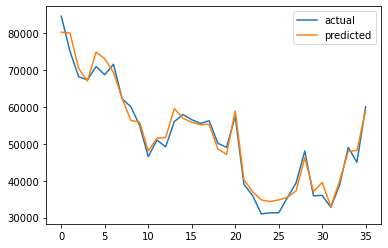

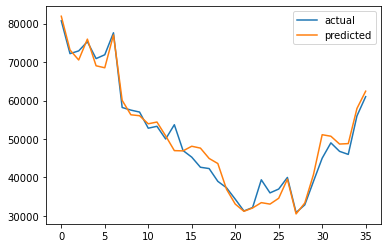

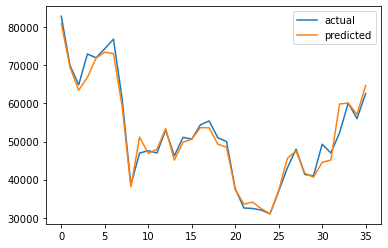

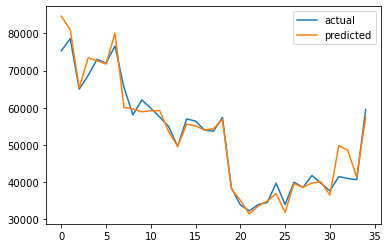

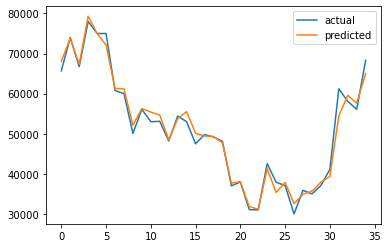

In [60]:
#Train and evaluate Cat B model with best parameters
model = create_model(preprocess.fit_transform(cat_b).shape[1])
perform_kfold_mlp(model=model, epoch=80, batch_size=1, n_splits=5, x=preprocess.fit_transform(cat_b), \
                  y=transformer.fit_transform(y_cat_b.to_numpy().reshape(-1, 1)), model_type='CAT B')

# Model Results

| Model|Unified (MAE)|Unified (RMSE)|Cat A (MAE)|Cat A (RMSE)|Cat B (MAE)|Cat B (RMSE)|
|---|---|---|---|---|---|---|
| LR            |2866|3881|2108|2633|2349|3489|
| Lasso         |2849|3845|2179|2707|2317|3478|
| Ridge         |3495|4411|2108|2633|2349|3489|
| ElasticNet    |2849|3845|2179|2707|2317|3478|
| Decision Tree |4567|6068|3403|4671|3391|4679|
| Random Forest |2532|3411|2113|2750|2352|3276|
| MLP           |**1703**|**2231**|**1432**|**1845**|**1777**|**2466**|


**Deep learning (MLP) wins!**

# Conclusion

## Limitations
1. Due to the lack of vehicle population and CPI data, the final data we have after merging all the sources starts from the year 2014


## Observations
1. Linear regression and tree-based models performance are not sensitive to scaling of inputs
2. Deriving with a model for each category seem to work better than encoding the category into the inputs, based on model performance
3. The deep learning approach (MLP) seems to be the best in terms of performance (MAE), beating other ML algorithms in all categories

## Further Works
1. It is possible to use tree-based models on sparse data inputs, it may help to improve the predictive model with more data points
2. Experiment various ML models with less features, only selected features or even dimension reduction (PCA)